<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">**Research**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0000.png)

#### <font color="blue">**LLM Study 2024**

##### <font color="blue">*Finetune LLMs*

###### *Overview*

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1704.png)

*Finetuning LLMs*

* Supervised
* RLHF
* Distillation
* deprecated: Parameter-Efficient Fine-Tuning using PEFT: https://arxiv.org/abs/2312.12148
* pending (?): Lora and QLora

https://www.analyticsvidhya.com/blog/2023/08/fine-tuning-large-language-models/

https://www.deeplearning.ai/short-courses/finetuning-large-language-models/

###### <font color="orange">*Prompt Engineering (incl. Chain-of-Thoughts - CoT)*

https://ploomber.io/blog/prompt-engineering-techniques/

https://arxiv.org/abs/2401.14423 Prompt Design and Engineering: Introduction and Advanced Methods

Prompt Engineering: Längere "Chain of Thoughts" verbessern die Leistung von Sprachmodellen

https://the-decoder.de/prompt-engineering-laengere-chain-of-thoughts-verbessern-die-leistung-von-sprachmodellen/

###### *Parameter efficient Turning (PEFT) = Lora*

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-text-models-supervised

###### *Low-Rank Adaptation (Lora and qLora)*

qLora and Lora to move from floating to integers in models (can damage a bit performance but still acceptable), but we can use then CPUs to train some of these models instead of only GPUs.

can one use qLora and Lora to move from floating to integers in LLM models in order to use CPUs to train LLMs instead of only GPUs.

Yes, qLora and Lora are techniques that can potentially enable the use of CPUs for training large language models (LLMs) by moving from floating-point to integer representations. Here's a breakdown of how this works and the considerations involved:

**Traditional LLM Training and GPUs**

* **Floating-point precision:** LLMs are typically trained using floating-point numbers (e.g., float32) because they offer a wide dynamic range necessary to represent the subtle gradients and relationships between parameters during the learning process.
* **GPU advantage:** GPUs are highly optimized for parallel computations involving floating-point numbers. This makes them significantly faster than CPUs for traditional LLM training.

**qLora and Lora for CPU Training**

* **Quantization:** qLora (quantized Lora) is a method for reducing the precision of LLM parameters. Instead of storing them as full 32-bit floating-point numbers, it's possible to represent them using lower-precision integers (e.g., 8-bit integers). This drastically reduces memory footprint and computational cost.
* **Lora:** Lora (Low-Rank Adaptation) is a technique that decomposes weight matrices in LLMs into smaller, more manageable components. This decomposition can then be exploited during quantization for efficiency.
* **CPU efficiency:**  By reducing the memory and computational requirements through quantization, it becomes feasible to train, or at least perform inference of, LLMs on CPUs, which are more generally available and cost-effective than GPUs in many scenarios.

**Challenges and Considerations**

* **Accuracy trade-off:** Quantization generally leads to a slight loss in model accuracy compared to full-precision floating-point representations. The goal is to find the right balance between quantization level and acceptable performance.
* **Optimization:** Techniques like qLora and Lora are relatively new, and ongoing research is focused on making them more efficient and minimizing the accuracy loss.
* **Deployment:**  If you aim to deploy a quantized LLM on CPUs,  you'll likely need specialized software and hardware support to ensure optimal performance.

**In Conclusion**

qLora and Lora offer a promising path towards making LLM training and inference more accessible by potentially allowing the use of CPUs. However, it's essential to be aware of the potential accuracy trade-offs and the fact that this field is still under active development.

**Let me know if you'd like more details on any specific aspect or have another related question!**


*Lora*

"𝗟𝗼𝗥𝗔, which stands for Low-Rank Adaptation, is a popular technique to finetune #llms more efficiently. Instead of adjusting all the parameters of a deep neural network, LoRA focuses on updating only a small set of low-rank matrices."

https://lightning.ai/lightning-ai/studios/code-lora-from-scratch?utm_source=tldrai

  * LoRA: Low-Rank Adaptation of Large Language Models
  * Edward J. Hu*, Yelong Shen*, Phillip Wallis, Zeyuan Allen-Zhu, Yuanzhi Li, Shean Wang, Lu Wang, Weizhu Chen
  * Paper: https://arxiv.org/abs/2106.09685
  * Video explainer: https://www.youtube.com/watch?v=DhRoTONcyZE
  * https://github.com/microsoft/LoRA

###### *Dora*

While everyone is talking about Sora, there's a potential successor to LoRA (low-rank adaptation) called DoRA. Here's a closer look at the "DoRA: Weight-Decomposed Low-Rank Adaptation" paper: https://arxiv.org/abs/2402.09353
LoRA is probably the most widely used parameter-efficient finetuning method for LLMs and vision transformers, and DoRA can be seen as an improvement or extension of LoRA that is built on top of it.

A brief LoRA recap: Assuming we have pretrained model weights W, LoRA uses low-rank matrices to approximate weight changes ΔW. I.e., in regular finetuning we have W' = W + ΔW, and in LoRA, we approximate ΔW with BA.

Now, the DoRA method first decomposes the pretrained weight matrix into a magnitude vector (m) and a directional matrix (V). Then, it takes the directional matrix V and applies standard LoRA to it, i.e., W' = m (V + ΔV)/norm = m (W + BA)/norm.

The motivation for developing this method is based on analyzing and comparing the LoRA and full finetuning learning patterns. They found that LoRA either increases or decreases magnitude and direction updates proportionally but seems to lack the capability of making only subtle directional changes as found in full finetuning. Hence, the researchers propose the decoupling of magnitude and directional components. In other words, their DoRA method aims to apply LoRA only to the directional component (while also allowing the magnitude component to be trained separably.)

Note that introducing the magnitude vector m in DoRA adds 0.01% more parameters than standard LoRA. However, across both LLM and vision transformer benchmarks, they found that DoRA even outperforms LoRA if the DoRA rank is halved, i.e., when DoRA only uses half the parameters of regular LoRA.

Overall, I am actually quite impressed by the results and need to toy with this method in practice. It should not be too big of a lift to upgrade a LoRA implementation to DoRA.

###### *Proxy-tuning*

*Proxy-tuning*

Proxy-tuning is a way to adapt LLMs without changing the model's weights. This is especially attractive if a given LLM is too resource-intensive to train or if a user doesn't have access to the LLM's weights.
Following up on the proxy-tuning paper discussion from last week, I implemented it in code and gave it a try. It actually works!

In a nutshell, it works like this:

1. Select a base LLM (e.g., an untuned 7B Llama 2 model) smaller and cheaper than the target LLM (e.g., a 10x larger, untuned 70B Llama 2 model).

2. Finetune this smaller base LLM to obtain a small finetuned LLM (e.g., instruction-finetune a 7B Llama 2 model to get a finetuned 7B model).

3. Compute the output difference between the base model (step 1) and the tuned model (step 2).

4. Add this difference in outputs to the target LLM's outputs.

5. Normalize the modified outputs from step 4, and then generate the answer.

I tried the following query:

"If I have 5 apples and eat 2, but then find 3 more on my way home, how many do I have?"

The proxy-tuned model was indeed able to answer correctly, whereas the base models failed: "You start with 5 apples and eat 2, so you have 5 - 2 = 3 apples left. Then, you find 3 more apples on your way home, so you have 3 + 3 = 6 apples in total."

Using the same approach, it was also possible to give Llama 2 13B coding abilities via CodeLlama 7B.

More details and code in my write-up and associated code Studio:

https://lightning.ai/lightning-ai/studios/improve-llms-with-proxy-tuning?view=public

While proxy-tuning and prompting have connections and some potential overlap, they are not precisely the same approach. Here's a breakdown of the differences and where they might intersect:

**Proxy-Tuning**

* **Core Focus:** Parameter-efficient fine-tuning of large language models (LLMs). The goal is to adapt a pre-trained LLM to a new task without fully fine-tuning its vast number of parameters.
* **Mechanism:** Introduces a small set of learnable "proxy" parameters. These might be:
    * Additional vectors that learn relationships between input embeddings.
    * Small adapter modules placed between layers of the LLM.
* **Advantage:** Reduces computational cost and memory footprint of fine-tuning compared to training the entire LLM.

**Prompting**

* **Core Focus:** Eliciting a desired response or behavior from an LLM by carefully crafting the input text.  Prompts include instructions, examples, or textual structures that guide the model's generation.
* **Mechanism:** No internal model parameters are directly modified.  Prompts guide the LLM to use its pre-existing knowledge and abilities to complete the task.
* **Advantage:** Highly flexible and can be applied to a wide range of tasks without fine-tuning.

**Connections and Overlaps**

* **Semantic Tuning:**  Proxy-tuning could be employed with  prompts that have rich semantic representations. This fine-tuning could refine the proxy parameters to better  align with complex queries or instructions provided in the prompts.
* **Prompt Design as Lightweight Fine-tuning:** Sometimes,  prompting involves finding prompts that essentially 'trick' the LLM into performing a task it  wasn't explicitly trained for.  This fine-grained task adaptation through crafting prompts can have a similar spirit to proxy-tuning, in the sense that both aim to modify how the LLM behaves without major internal changes.

**In Summary**

Proxy-tuning and prompting are distinct but complementary techniques. Proxy-tuning focuses on efficient internal parameter modification of LLMs. Prompting focuses on steering model output through clever input design.  There could be interesting potential in the use of these two approaches together.

###### <font color="orange">*Adapter Tuning*

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-models

https://services.google.com/fh/files/misc/adaptation_of_foundation_models_whitepaper_google_cloud.pdf

https://magazine.sebastianraschka.com/p/finetuning-llms-with-adapters

https://arxiv.org/abs/2106.03164 On the Effectiveness of Adapter-based Tuning for Pretrained Language Model Adaptation

Here's a breakdown of Adapter Tuning, its advantages, and how it works:

**What is Adapter Tuning?**

Adapter tuning is a technique used to fine-tune large language models (LLMs) for new tasks more efficiently. Here's the core idea:

* **Pre-trained Models:** Large language models have been trained on vast amounts of text data, giving them a deep understanding of language patterns.
* **Bottleneck:** Fine-tuning these massive models to a specific task (like question answering or translation) often means updating millions or billions of parameters, which is computationally expensive and time-consuming.
* **Adapters to the Rescue:** Adapter tuning introduces compact "adapter" modules (small sets of new neural network layers) within the pre-trained model's architecture.  Instead of updating the entire model, only the parameters within these adapters are trained for the new task.

**Advantages of Adapter Tuning**

* **Efficiency:** Adapter tuning greatly reduces the number of parameters needing updates, making fine-tuning significantly faster and less computationally demanding.
* **Preserving Knowledge:** By freezing most of the original model's weights, adapter tuning preserves the language knowledge the model has acquired during pre-training.
* **Multi-Task Learning:** A single pre-trained model can have multiple adapters, each trained for a different task. This allows the model to switch between tasks easily without needing to retrain the entire model.

**How Adapter Tuning Works**

1. **Pre-trained Model:** Start with a large, pre-trained language model.
2. **Insert Adapters:** Add small adapter modules (new layers) between existing layers of the pre-trained model.
3. **Freeze the Original Model:** Keep the weights of the pre-trained model frozen.
4. **Train the Adapters:** Train only the parameters of the newly added adapters on the data for the specific task at hand.

**In Summary**

Adapter tuning is a clever way to fine-tune large language models. It saves time and computing resources, maintains the model's core knowledge, and facilitates efficient multi-task capabilities.

**Let me know if you'd like a more technical explanation or examples of how adapter tuning is used!**


###### *ASPIRE*

https://blog.research.google/2024/01/introducing-aspire-for-selective.html

Yes! "Adaptation with Self-Evaluation to Improve Selective Prediction in LLMs" (ASPIRE) is primarily a framework for finetuning LLMs. Here's why:

**Focus of ASPIRE:**

* **Selective Prediction:**  ASPIRE aims to teach LLMs to evaluate their own output and decide whether to provide an answer or abstain ("I don't know"). This aligns with finetuning goals of improving model behavior rather than directly changing its architecture.
* **Self-Evaluation:** The framework trains the LLM on target-task data to learn to assess its own predictions, rather than relying on external retrieval mechanisms.

**How ASPIRE Finetunes LLMs:**

ASPIRE involves finetuning a pre-trained LLM on a portion of question-answering datasets like CoQA. During finetuning, the model learns to output both an answer and a selection score. The selection score indicates the model's confidence in its answer.  This approach directly modifies the LLM's output behavior, aligning with finetuning.

**Difference from RAG:**

RAG (Retrieval-Augmented Generation) frameworks enhance LLMs by teaching them to retrieve relevant information from external sources during answer generation.  ASPIRE, in contrast, focuses on internal self-assessment.

**ASPIRE vs. RLHF:**

While both ASPIRE and RLHF (Reinforcement Learning from Human Feedback) aim to improve the quality and reliability of LLM responses, they differ in approach:

* **RLHF:** Uses human feedback to directly reward desirable responses and penalize undesirable ones.
* **ASPIRE:** Focuses on the LLM learning to evaluate itself based on data.

**In conclusion, ASPIRE falls firmly within the domain of finetuning LLMs by teaching them the crucial skill of selective prediction.**


###### <font color="orange">*RHLF*

https://cloud.google.com/blog/products/ai-machine-learning/rlhf-on-google-cloud?hl=en

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-text-models-rlhf

**RLHF stands for "Reinforcement Learning from Human Feedback"**

* is a crucial technique for improving the performance and alignment of these models. It involves a combination of methods that leverage human feedback to refine and guide the learning process of the model.

* Here's how RLHF is applied to LLMs:

1. **Supervised Fine-Tuning (SFT)**: Initially, the language model is trained on a large dataset of text from the internet. This phase is purely supervised learning, where the model learns to predict the next word in a sequence. However, this dataset might not perfectly represent desirable outputs, as it contains a wide range of materials, including low-quality or harmful content.

2. **Reward Modeling**: After the initial training, human reviewers assess the outputs of the model, providing feedback on its responses. This feedback could be in the form of rankings, ratings, or direct corrections. This human feedback is then used to create a reward model. The reward model essentially predicts how a human would rate a given output, serving as a proxy for human judgment.

3. **Proximal Policy Optimization (PPO)**: With the reward model in place, the LLM is further trained using reinforcement learning, specifically a method called Proximal Policy Optimization. In this phase, the model learns to generate outputs that are more likely to receive higher ratings from the reward model. This step is crucial for aligning the model's outputs with human values and preferences.

4. **Iterative Refinement**: The process can be iterative, with further rounds of human feedback and model refinement. This ongoing interaction helps in continuously improving the quality and relevance of the model's responses, ensuring they align well with ethical guidelines, factual accuracy, and user expectations.

Applying RLHF to LLMs is important for several reasons:

- **Alignment with Human Values**: It helps ensure that the model's outputs are aligned with human ethical standards and societal norms.
- **Reduction of Harmful Outputs**: By training the model with human feedback, it's possible to reduce the likelihood of generating unsafe, biased, or otherwise undesirable content.
- **Enhanced Relevance and Utility**: Feedback-driven training can make the model more useful and relevant to users by focusing on generating high-quality, contextually appropriate responses.

This approach represents a significant advancement in the development of more responsible and effective AI language models.

###### *Direct Preference Optimization (DPO)*

**Direct Preference Optimization (DPO)**

Interesting article from Andrew Ng about a new research paper that proposes DPO (direct preference optimization) over RLHF. A promise is that you won‘t need to deal with a separately represented reward function -- you just need the LLM transformer -- and you can train the LLM directly and more efficiently to optimize the same objective as RLHF. Enjoy the read 🤓🙌

https://www.deeplearning.ai/the-batch/issue-231/

https://browse.arxiv.org/html/2305.18290v2

https://magazine.sebastianraschka.com/p/10-ai-research-papers-2023

and here his thoughts more ind details in case you dont want to read the paper: https://magazine.sebastianraschka.com/p/llm-training-rlhf-and-its-alternatives


Direct Preference Optimization (DPO) is pretty amazing. Surely, it can't be this straightforward to replace the whole reinforcement learning on human feedback (RLHF) phase?
1. Treat a foundational (or instruction tuned) LLM
as the reference LLM
1.    Generate pairs of outputs to prompts and have humans choose which one they like (human feedback)
2.    Add a linear layer to the LLM so that it outputs a scalar value, and tune this new model with a new loss function (compute log-ratio of scalar outputs of the reference LLM and the one being tuned, multiply by a divergence parameter ... -- very cool math insight here, but end-of-the-day this is just a new training loss function called dpo_loss or something that Keras and Pytorch will ship with)
3.    Drop the last linear layer, and you have a fine tuned LLM on human feedback
Amazing stuff. RLHF was the most dicey part of LLM training and the one that needed the most art vs science. Expect a lot of convergence between LLMs trained on the same data

---

Direct Preference Optimization (DPO) in the context of machine learning, and specifically for large language models (LLMs) like GPT-3 or GPT-4, is an approach that focuses on optimizing the model's outputs based directly on human preferences. This method is a part of the broader framework of Reinforcement Learning from Human Feedback (RLHF). Here's a closer look at how DPO works and its significance:

1. **Collecting Human Preferences**: The first step in DPO involves gathering data on human preferences. This is typically done by presenting human reviewers with pairs of outputs generated by the model in response to the same prompt or query. The reviewers are then asked to indicate which of the two responses they prefer.

2. **Training a Preference Model**: The collected preference data is used to train a preference model. This model learns to predict the likelihood of one output being preferred over another by humans. Essentially, it aims to understand and quantify what makes one response more favorable or acceptable than another.

3. **Optimizing the Language Model**: Once the preference model is trained, it is used to guide the training of the language model. The language model is optimized to generate outputs that are more likely to align with the preferences indicated by humans. This optimization can be done using various techniques, including reinforcement learning algorithms.

4. **Iterative Process**: Like other RLHF techniques, DPO is often iterative. The model's outputs can be continuously evaluated and compared by human reviewers, and the preference model can be updated based on new data. This leads to ongoing improvements in the language model's alignment with human preferences.

The significance of DPO lies in its focus on aligning the model's outputs with what humans explicitly prefer. This is particularly important for applications where the quality of an output is subjective and can vary based on context and the specific needs or values of the user.

For example, in a conversational AI, different users might have different preferences for the style, tone, and type of responses they find engaging or helpful. DPO allows the model to be tuned to these preferences, potentially leading to more personalized and satisfactory interactions.

Overall, Direct Preference Optimization represents a powerful method for increasing the alignment of AI systems with human values, preferences, and expectations, thereby enhancing their usefulness, safety, and acceptance in various applications.

###### <font color="orange">*Distillation*

https://cloud.google.com/vertex-ai/docs/generative-ai/models/distill-text-models

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-models

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-models#tune-distill

Tuning and distillation - Distillation is a good option if you have a large model that you want to make smaller without degrading its ability to do what you want. The process of distilling a model creates a new, smaller trained model that costs less to use and has lower latency than the original model

https://arxiv.org/pdf/1503.02531.pdf Distilling the Knowledge in a Neural Network

https://blog.research.google/2024/02/intervening-on-early-readouts-for.html?m=1

###### *Self-instruct*

Context - Consider a LLM use-case where we only have access to a handful of HQ few-shot examples that are not sufficient for a full fine-tuning (or even LoRA). Then, is it possible to use an LLM to generate similar examples that can then be used for fine-tuning the model?

Concerns
1) Model bias - using a model to generate examples and then fine-tuning it based on those sounds like a classic case of introducing bias.

2) Role of fine-tuning - If the model is capable of generating the additional examples, then is fine-tuning even necessary? it seems like the model is already able to generalize to the use-case quite well.

https://arxiv.org/pdf/2212.10560.pdf



---
Yes, this approach is quite effective for training.

(1).  Yes, you need to ensure you aren't entrenching existing idiosyncrasies.  Typically this is done in one of three ways: (a) Human review+annotation of machine-generated examples or (b) spending more compute time at inference to generate+filter/select only the best examples for the next round of training, and discarding the low-quality generations.

(2).  Generally, given enough time and temperature, all models are capable of generating anything (monkies on a typewriter).  The goal of additional training is always and exclusively to improve the quality of the results in a pass@1 fashion.  If you sample from pass@100, use additional compute to rank the results, and select the top 1% of generations for additional training, then you are increasingly biasing the model toward the highest quality results (which is the purpose of training).  It is true the model is already "able to generalize to the use-case quite well if given enough compute", but training is all about paying at training time in order to increase the ROI at inference time.

---
This sounds like go/datasynth. You can start with a few high quality examples and use LLMs to generate a synthetic dataset for fine-tuning. They also provide tools to mitigate bias you mentioned in #1 (e.g. diversity scores, topic visualizations, etc).  


Self-instruct is a fascinating technique in the realm of large language models (LLMs) that straddles the line between fine-tuning and augmentation. Here's what it entails:

**Core Idea**

Self-instruct aims to improve an LLM's ability to follow instructions and perform tasks by having it generate its own training data. Essentially, the LLM acts as both teacher and student.

**The Process**

1. **Task Generation:** The LLM is given a few initial examples of tasks and desired solutions. It then attempts to generate new, similar tasks itself.
2. **Solution Generation:** The LLM also tries to provide solutions or completions to the tasks it has created.
3. **Filtering:** Human experts or automated quality checks filter out poorly generated tasks and solutions.
4. **Instruction Fine-tuning:** The remaining high-quality, self-generated data is used to fine-tune the LLM using instruction-following techniques.

**Why It's Both Fine-tuning and Augmentation**

* **Fine-tuning:**  Self-instruct directly modifies the LLM's parameters based on the data it generates, just like other fine-tuning processes. This refines its ability to execute instructions.
* **Augmentation:** The main difference is that self-instruct augments the existing training process by creating a novel and customized dataset that caters specifically to the desired task format.

**Benefits**

* **Addresses Dataset Limitations:** Human-written instruction datasets are often limited in scale and diversity. Self-instruct expands these training resources.
* **Reduces Expert Effort:** Creating large datasets manually is time-consuming. Self-instruct lessens the burden on human annotators.
* **Iterative Improvement:** As the LLM becomes better at following instructions, its self-generated training data also improves, creating a positive feedback loop.

**Example**

Imagine you want the LLM to summarize articles.

* **Initial Input:**  A few articles with provided human-written summaries.
* **Self-Instruct:** The LLM generates new articles and creates summaries for them. These are filtered for quality.
* **Fine-tuning:**  The LLM is fine-tuned on the self-generated dataset to improve its summarization skills.

**Let me know if you'd like to delve into the technical details of self-instruct methods or want to explore practical applications!**


###### *Token*

*Token*

* basic unit of text representation.
* sequences of characters that are treated as individual elements in the LLM's internal representation of the input text.
* used to build up more complex language structures, such as words, phrases, and sentences.
* Tokenization is the process of breaking down a piece of text into tokens. This can be done using various methods, such as word-level tokenization, character-level tokenization, or subword tokenization. The choice of tokenization method depends on the specific task and the characteristics of the input text.
* LLMs use tokens to extract features from the input text and to generate output text. For example, when generating text, the LLM will consider the surrounding tokens to determine the most likely next word or phrase. Tokens also play a role in LLM performance evaluation. Evaluation metrics such as accuracy and F1 score are often calculated based on the similarity between predicted and ground truth tokens.
  * Text-to-text translation: When translating a sentence from one language to another, the LLM breaks down the input sentence into tokens and then uses these tokens to generate the corresponding tokens in the target language.
  * Text summarization: When summarizing a document, the LLM identifies the most important tokens in the document and then uses these tokens to generate a concise summary.
  * Question answering: When answering a question about a text, the LLM extracts the relevant tokens from the text and uses these tokens to identify the answer to the question.

I get better results with no training. See how, at https://mltblog.com/42l51rJ
Eventually, I will add training: user based (self-tuning) rather than based on algorithms. Of course, fully automated and transparent to the user.


###### *SLM (Small Language Model)*

https://the-decoder.de/microsoft-prognostiziert-drei-grosse-ki-trends-fuer-2024/



Microsoft investiert in diesen Bereich, hat bereits die SLMs Phi und Orca vorgestellt und soll seine eigenen Abteilungen auf effizientere KI-Modelle ausgerichtet haben.

https://the-decoder.de/microsofts-mini-llm-phi-2-ist-jetzt-open-source-und-angeblich-besser-als-google-gemini-nano/

https://the-decoder.de/microsofts-orca-2-ist-ein-kleines-ki-modell-mit-verbesserter-denkfaehigkeit/

https://the-decoder.de/generative-ki-ist-teuer-und-microsoft-will-die-kosten-senken/

[How to Build an LLM from Scratch | An Overview](https://www.youtube.com/watch?v=ZLbVdvOoTKM&list=WL&index=8&t=480s)

##### <font color="blue">*Augment LLMs*

###### <font color="orange">*Grounding*

**Grounding**: Out-of-the-box grounding against structured and unstructured data


*Grounding*

https://cloud.google.com/vertex-ai/docs/generative-ai/grounding/overview

Grounding in large language models (LLMs) refers to the process of connecting their responses to real-world entities and concepts. This is crucial for ensuring that LLMs generate accurate, relevant, and meaningful outputs. LLMs are trained on massive datasets of text and code, but this knowledge is often abstract and lacks specific context. Grounding allows LLMs to access and incorporate external information to make their responses more grounded in reality.

There are several different approaches to grounding LLMs, but they typically involve some combination of the following techniques:

* **Knowledge base access:** LLMs can be connected to knowledge bases, such as Wikidata or Google Search, to access information about real-world entities and concepts. This information can be used to refine and improve their responses.
* **Data retrieval:** LLMs can be used to retrieve relevant data from external sources, such as databases or web pages. This data can then be used to ground their responses in real-world context.
* **Physical interaction:** In some cases, LLMs can be directly connected to the real world through sensors and actuators. This allows them to interact with their environment and gather information directly.

Grounding is an essential part of developing reliable and useful LLMs. By grounding their responses in real-world knowledge, LLMs can be more accurate, relevant, and informative. This makes them more suitable for a wider range of applications, such as question answering, summarization, and natural language generation.

Here are some of the benefits of grounding LLMs:

* **Improved accuracy:** Grounding can help to reduce the number of factual errors in LLM responses.
* **Increased relevance:** Grounding can help to ensure that LLM responses are relevant to the context in which they are generated.
* **Enhanced creativity:** Grounding can help LLMs to generate more creative and interesting text formats.
* **Expanded capabilities:** Grounding can allow LLMs to perform tasks that require more knowledge of the real world, such as answering questions about physical entities or events.

Overall, grounding is a powerful technique for improving the performance and usefulness of large language models. As LLMs continue to develop, grounding is likely to play an even more important role in their development and application.

###### <font color="orange">*Retrieval-Augmented Generation (RAG)*

**Long tokens vs RAG**

https://blog.google/technology/ai/google-gemini-next-generation-model-february-2024

https://youtu.be/wa0MT8OwHuk?si=4DeetM9gi9yI1i-T

the demo is using a movie. That explains why the 1.5 version landed on the Multimodal part of Studio. Will that context window not apply to the text-only endpoint?

Good thing I didn't invest too much time learning about chunking strategies with RAG 😅

Apparently Deepmind tested 10M token successfully in research

I think chunking will still make sense for RAG use cases, especially if you care about latency or have significantly more than 1M tokens. But it's great to see that there are lots of improvements on the input token limit.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1710.png)

https://www.linkedin.com/posts/alexwang2911_genai-llm-technology-activity-7164438306871603200--mgt/?utm_source=share&utm_medium=member_ios

https://cloud.google.com/blog/products/ai-machine-learning/rags-powered-by-google-search-technology-part-1?hl=en

https://cloud.google.com/blog/products/ai-machine-learning/rags-powered-by-google-search-technology-part-2?hl=en

https://cloud.google.com/blog/products/ai-machine-learning/context-aware-code-generation-rag-and-vertex-ai-codey-apis?hl=en

I have a question about chatbot and RAG. Is there any good/easy approach which we can add RAG layer between data source and conversation AI app? The challenge is today we show great demo in Playbooks with cleaned data but in the reality, customers usually have more complicated/messy data source (source data against each others), so the first step of doing data retrieval is critical.  Say customer is ok to use our DFCX/Playbooks but they need to add extra RAG layer. Any experience ?


**Retrieval Augmented Generation (RAG)**: Fully managed vector database for high-scale, low latency vector search

[What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M&list=WL&index=9&t=23s)


RAG stands for **Retrieval-Augmented Generation** in the context of Large Language Models (LLMs). Here's a breakdown of what it is and why it's important:

**How LLMs Typically Work**

* Traditional LLMs are trained on massive amounts of text data. They learn to predict the next word in a sequence based on patterns they've seen during training.
* This makes them great at generating text, translating languages, etc.
* **Limitation:** LLMs can't easily access and incorporate new knowledge or information that wasn't part of their original training data.

**How RAG Solves This**

RAG combines the power of LLMs with traditional information retrieval systems:

1. **Retrieval:** When you ask a question, RAG first searches through a knowledge base (like Wikipedia, internal company documents, news articles, etc.) to find relevant passages of text.
2. **Augmentation:** This relevant text is appended to your original question, creating a richer, more informative prompt.
3. **Generation:** The LLM uses this combined information (original question + retrieved knowledge) to generate a more comprehensive and accurate answer.

**Benefits of RAG**

* **Up-to-date Information:** RAG models aren't stuck with the knowledge they were trained on. They can access and integrate fresh information on demand.
* **Factual Grounding:** Answers generated by RAG models can be linked back to the knowledge sources they are based on, providing sources or citations.
* **Domain-Specific Adaptation:** A RAG model can be customized to work well in specific fields (legal, medical, etc.) by using a knowledge base tailored to that domain.
* **Improved Accuracy:** RAG models often significantly outperform traditional LLMs on tasks that require external knowledge

**In summary:**  RAG is a technique that allows LLMs to go beyond their internal training data, access external knowledge, and provide more informed, accurate, and trustworthy responses.


*Prompting and RAG*

Prompting and RAG are equivalent to feature engineering (data augmentation to be exact) in the traditional ML paradigm, while finetuning is equivalent to model training. So, all three are needed for the best result.
* rag is more like a key point selection based on features. That's more like an attention mechanism rather than feature engineering.
* When you do RAG, you use the user's original input to find relevant pieces of external information and add them to the input you send to the model. This is by definition feature engineering.


**Retrieval-Augmented Generation (RAG)**

Retrieval-Augmented Generation (RAG) is a framework for improving the accuracy and reliability of large language models (LLMs) by incorporating external knowledge bases during the generation process. It combines the strengths of two approaches: dense retrieval and sequence-to-sequence modeling.

**Dense retrieval** is used to identify relevant documents from a knowledge base that are related to the query or prompt provided to the LLM. This ensures that the LLM has access to the most up-to-date and accurate information before generating its response.

**Sequence-to-sequence modeling** is used to generate the final output text, taking into account the retrieved documents and the original query. This allows the LLM to incorporate factual information from the knowledge base into its response while maintaining its natural language fluency and coherence.

RAG has been shown to improve the performance of LLMs on a variety of tasks, including question answering, summarization, and translation. It has also been found to be more robust to errors in the knowledge base than traditional LLM approaches.

**Benefits of RAG:**

* **Improved accuracy:** RAG can help to prevent LLMs from generating incorrect or misleading information by providing them with access to a broader range of information.

* **Reduced factual errors:** RAG can reduce the number of factual errors in LLM responses by incorporating information from a knowledge base.

* **Improved coherence:** RAG can help to improve the coherence of LLM responses by ensuring that they are consistent with the information in the knowledge base.

**Drawbacks of RAG:**

* **Increased computational complexity:** RAG is more computationally complex than traditional LLM approaches, as it requires both dense retrieval and sequence-to-sequence modeling.

* **Dependency on knowledge base:** RAG is dependent on the quality of the knowledge base that is used. If the knowledge base is inaccurate or incomplete, RAG's performance will suffer.

Despite these drawbacks, RAG is a promising approach for improving the accuracy and reliability of LLMs. As knowledge bases continue to improve, RAG is likely to become an even more valuable tool for natural language processing.

###### $\hookrightarrow$ *LLamaindex*

**LLamaindex**

Video: [Llamaindex webinar](https://youtu.be/aoLtTIYAafY?si=r2iEJC_bqTsPRlnf)

LlamaIndex is a powerful data framework designed to streamline the development of applications powered by Large Language Models (LLMs). Here's a breakdown of what it is and why it's important:

**Key Functions**

* **Data Ingestion & Management:**
    * **Diverse Formats:** Handles structured, semi-structured, and unstructured data sources (documents, PDFs, APIs, SQL databases, etc.).
    * **Organization:** Structures data in ways LLMs can easily understand and access.
* **Indexing:** Creates efficient indices (like a virtual library) of your data, allowing quick retrieval of relevant information.
* **Query Interface:** Provides a user-friendly way to interact with your data using prompts or questions. The responses are augmented with knowledge retrieved from your indexed data.

**Why It Matters (Benefits)**

* **Retrieval-Augmented Generation (RAG):** LlamaIndex is core to implementing RAG, a method where LLMs first consult an external knowledge base before generating a text response. This leads to more informed, grounded, and less likely to hallucinate answers.
* **Custom Applications:** It simplifies building a range of LLM-driven applications:
    * Question-answering systems over specific information (company docs, product manuals, etc.).
    * Sophisticated chatbots or conversational AI.
    * Intelligent tools that interact with your personal data.
* **Flexibility:** Offers both high-level APIs for easy use and low-level APIs for finer control.

**How it Works (Simplified)**

1. **Import & Structure:** You import data into LlamaIndex, where it's organized.
2. **Indexing:**  LlamaIndex creates efficient indices to speed up search within your data.
3. **Query:** You give the system a question or prompt.
4. **Retrieval:** LlamaIndex uses vector search techniques to find relevant bits of information in your data.
5. **Augmented Generation:** The LLM takes your question AND the retrieved knowledge to generate a comprehensive response.

**In Summary**

LlamaIndex offers a powerful framework for harnessing the capabilities of LLMs with your own diverse data. It simplifies the process of building LLM-based applications that rely on external knowledge sources.

###### <font color="orange">*Extensions*

**Extensions**: Integrate easily real-time data and real-world actions, e.g. Ingest internal codebases and automatically lookup evolving security threats in real time


###### <font color="orange">*Function Calling*

**Function Calling**: enables LLMs to interact with external tools, databases, and APIs or code snippets that perform specific tasks (e.g., weather lookup, math calculations, sending emails) to improve model responses

*Function Calling*

https://codelabs.developers.google.com/codelabs/gemini-function-calling#0


Here's a breakdown of the differences between function calling and extensions in the context of LLMs:

**Function Calling**

* **Focus:** Executing specific, well-defined tasks or retrieving information from external sources.
* **Nature:** Dynamic and on-demand. Functions are called in response to specific prompts and instructions.
* **Scope:** Actions are usually limited to external tools and APIs the LLM is connected to.
* **Example:** A function to look up the current temperature in a specific city.

**Extensions**

* **Focus:** Expanding the core capabilities of the LLM with new features or knowledge domains.
* **Nature:** More persistent. Extensions are installed or integrated into the model.
* **Scope:** Can fundamentally change how the LLM processes information and generates responses.
* **Example:** An extension designed for summarizing scientific papers, allowing the LLM to better understand and answer questions about complex research.

**Key Differences Table**

| Feature            | Function Calling                                    | Extensions                                                   |
|--------------------|-----------------------------------------------------|--------------------------------------------------------------|
| Purpose            | Perform external actions, retrieve real-world data  | Expand the LLM's capabilities and knowledge                   |
| Nature             | Dynamic, task-specific                              | Persistent, integrated into the LLM                           |
| Scope              | Focused on external tools the LLM can access       | Can affect the LLM's internal processing and understanding    |
| Implementation     | LLM generates code to call external functions      | Often require installing code or packages within the LLM's environment |

**In Summary**

* **Function calling** is about letting the LLM interact with the outside world to get things done.
* **Extensions** are about making the LLM itself smarter or more capable by adding new skills or knowledge.

**Let me know if you'd like more clarification or examples!**


###### *Special: Vector Retrieval / Vector Search*

Vector Retrieval / Vector Search both refer to the core process of finding similar items within a large dataset of vectors generated by an LLM. Here's how it works:

1. Embedding Generation: The LLM takes a query (e.g., a piece of text or an image) and creates a vector representation of it.
2. Vector Database: The LLM has a pre-computed database of vectors representing items like text passages, images, or code snippets.
3. Similarity Calculation: The LLM calculates the similarity (often using cosine similarity) between the query vector and all the vectors in the database.
4. Retrieval: The vectors with the highest similarity scores (closest distance to the query vector) are retrieved. These returned items are considered the most relevant matches to the original query.

Applications - Vector retrieval (a.k.a. vector search) is a powerful tool used across various LLM-based applications:

* Semantic Search: Searching for information based on meaning rather than just keywords.
* Recommendation Systems: Recommending products, content, etc. based on a user's preferences and similarity between items.
* Question Answering: Finding relevant passages in a large corpus of text to answer a question.
* Image Search: Searching for images similar to a query image.

Here's a breakdown of ANN and MMR in the context of information retrieval using LLMs:

**ANN (Approximate Nearest Neighbor)**

* **Purpose:**  ANN algorithms are designed to find items ("neighbors") in a dataset that are most similar to a given query, even in very high-dimensional spaces. In LLM retrieval, the query would be the user's input, and the items in the dataset are potential text passages containing relevant information.

* **Role in LLM Retrieval:**
    * **Efficiency:**  ANN is crucial for LLM-based retrieval because naively comparing a query to every piece of text in a large database would be extremely computationally expensive. ANN makes this process tremendously faster.
    * **Understanding Similarity:** ANN focuses on finding passages that are semantically similar to the user's query, even if they don't contain exact keyword matches. This aligns well with LLMs' ability to understand nuanced meaning.

* **Types of ANN:** Several ANN algorithms exist (e.g., HNSW, FAISS), each with trade-offs in accuracy, speed, and memory usage.

**MMR (Maximal Marginal Relevance)**

* **Purpose:** MMR is a ranking algorithm used to ensure diversity and avoid redundancy in search results. In LLM retrieval, it works after ANN has identified potential relevant passages.

* **Role in LLM Retrieval:**
    * **Diversification of Results:** MMR aims to prevent the top results from all being too similar to each other. Instead, it promotes including passages that, while relevant, also cover different aspects or perspectives related to the query.
    * **Improving User Experience:** This diversification helps the LLM provide a more comprehensive and informative set of responses to the user, reducing the likelihood of receiving repetitive information.

**How ANN and MMR Work Together**

1. **User Query:** The user enters a query or question.
2. **ANN Retrieval:** Using the ANN algorithm, a set of potentially relevant passages is efficiently retrieved from a large text corpus.
3. **MMR Ranking:** MMR analyzes the retrieved passages and reranks them, prioritizing both relevance to the query and diversity within the results.
4. **Return to LLM:** The top-ranked passages may be fed back into the LLM for further processing, allowing the LLM to generate a more informed and helpful response.

**Let me know if you'd like more details on the technical aspects of specific ANN algorithms or how MMR calculates diversity!**


Your favorite cloud data warehouse now supports vector search and vector indexes, see https://lnkd.in/g3ztYWWy. How cool is that? BigQuery vector search lets you find semantically similar items in a table using by comparing the distance of  vector embeddings. Find similar customers, articles, products, locations. This is super useful for integrating LLMs with your data and validating LLM output. The best thing is that you don't need another product to do it.

 are announcing the Public Preview of BigQuery Vector Search. This functionality, also commonly referred to as approximate nearest-neighbor search, is key to empowering numerous new data and AI use cases such as semantic search, similarity detection, and retrieval-augmented generation (RAG) with a large language model (LLM).

Vector search is often performed on high-dimensional numeric vectors, a.k.a. embeddings, which incorporate a semantic representation for an entity and can be generated from numerous sources, including text, image, or video. BigQuery vector search relies on an index to optimize the lookups and distance computations required to identify closely matching embeddings.

Our framework supports multiple Vector Index types, with the first implemented type (IVF) combining (a) an optimized [BQML](https://cloud.google.com/bigquery/docs/bqml-introduction) KMeans clustering model with (b) an inverted row locator, which is automatically updated as the underlying table data mutates (similar to [BigSearch](https://cloud.google.com/bigquery/docs/search-index)). It works with BigQuery’s embedding-generation capabilities, notably via LLM-based or pre-trained models. Yet the generic interface allows users to use embeddings generated via other means as well.

New optimizations, features, index types, and the GA launch are expected in Q2/Q3 2024.

Public Launch Material
* Launch blog: https://cloud.google.com/blog/products/data-analytics/introducing-new-vector-search-capabilities-in-bigquery?hl=en
* Public documentation: https://cloud.google.com/bigquery/docs/vector-search-intro
* Tutorial 1 for using with existing embeddings: https://cloud.google.com/bigquery/docs/vector-search
* Tutorial 2 for combining with embedding generation and RAG: https://cloud.google.com/bigquery/docs/vector-index-text-search-tutorial
* LangChain integration: https://python.langchain.com/docs/integrations/vectorstores/bigquery_vector_search

What does the introduced syntax and usage look like?
1. Create Vector Index
CREATE OR REPLACE VECTOR INDEX <my_index> ON <my_table>(embedding_col)
OPTIONS (distance_type="COSINE", index_type="IVF");
2. Vector SearchSELECT <columns> FROM VECTOR_SEARCH (TABLE <my_table>, 'embedding_col', (SELECT embedding_col FROM <test_table> WHERE <>));

3. (Optional) Monitor Indexing Progress AnytimeSELECT table_name, index_name, coverage_percentage, unindexed_row_count
FROM `<myproject.mydataset>.INFORMATION_SCHEMA.VECTOR_INDEXES` WHERE index_status = 'ACTIVE';
4. Example RAG query, combining embedding generation, vector search, and LLM text generation:SELECT ml_generate_text_llm_result AS generated, prompt
FROM ML.GENERATE_TEXT(
   MODEL `<LLM_text_generation_model>`,
   (SELECT CONCAT('Propose some project ideas to improve user password security using the context below: ', STRING_AGG(FORMAT("patent title: %s, patent abstract: %s", base.title, base.abstract), ',\n')) AS prompt, FROM VECTOR_SEARCH(
         TABLE `<patents_my_embeddings_table>`, 'text_embedding',
         (SELECT text_embedding, content AS query
           FROM ML.GENERATE_TEXT_EMBEDDING(
               MODEL `<LLM_embedding_model>`,
               (SELECT 'improving password security' AS content))), top_k => 5)
   ), STRUCT(0.4 AS temperature, 300 AS max_output_tokens, 0.5 AS top_p, 5 AS top_k, TRUE AS flatten_json_output));


*Vector Retrieval*

https://arxiv.org/abs/2401.09350: Foundations of Vector Retrieval

###### *Special: Knowledge Graph*

https://neo4j.com/labs/genai-ecosystem/

##### <font color="blue">*Evaluate LLMs*

*Evaluation*

**Automatic Side-by-Side (AutoSxS)**

https://cloud.google.com/vertex-ai/docs/generative-ai/models/side-by-side-eval

**Metrics-based evaluation**

https://cloud.google.com/vertex-ai/docs/generative-ai/models/evaluate-models

**Vertex AI Model Evaluation**

Vertex AI Model Evaluation provides a comprehensive framework for evaluating LLMs across a wide range of tasks, including natural language understanding (NLU), natural language generation (NLG), and question answering. It allows you to define custom evaluation metrics and compare performance over time.



##### <font color="blue">*Google*

###### *Google Products*

Vertex AI! 🎉

🔎 You can now query an index from the Vector Search console, making it even easier to validate your retrievals.

🌻 New models have been added to the Model Garden, including Stable Diffusion XL LCM, LLaVA 1.5, PyTorch-ZipNeRF, WizardLM, and more.

🎥 Multimodal Embeddings video support went GA, giving you the possibility to extend your AI applications.

✨ Vertex AI Gemini 1.0 Pro and Gemini 1.0 Pro Vision multimodal language models also went GA!

Overview of multimodal models
https://cloud.google.com/vertex-ai/docs/generative-ai/multimodal/overview

Multimodal video embeddings
https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-multimodal-embeddings#vid-img-txt-request

Vertex AI Vector search
https://cloud.google.com/vertex-ai/docs/vector-search/create-manage-index

https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview

https://www.linkedin.com/in/deltorobarba/recent-activity/reactions/

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1699.jpeg)

book: Official Google Cloud Certified Professional Machine Learning Engineer Study Guide, https://www.amazon.com/dp/1119944465?ref_=cm_sw_r_mwn_dp_QEQREW6ES28470H5333A&language=en-US

https://www.linkedin.com/pulse/use-mistral-llms-locally-your-computer-lm-studio-windows-molina-ldmje

https://www.linkedin.com/pulse/gemini-look-my-food-give-me-new-ideas-filipe-gracio-phd-tl4be

*Lumiere*

The first generative video goodness of 2024 is in: Lumiere. A text-to-video, image-to-video, and stylized video generation model from Google Research.

Lumiere demonstrates state-of-the-art video generation results with a new model design that facilitates a wide range of content creation tasks such as video editing, video in-painting, and stylized generation.

While existing video models first synthesize distant keyframes then apply temporal super-resolution to make videos look temporally consistent, Lumiere generates the entire temporal duration of the video at once, through a single pass in the model. This makes the videos look more realistic.

Paper: https://lnkd.in/dvcWNCtp
Video: https://lnkd.in/deQHkxFj

###### *MLOps*

Excited to share that a new tutorial on Ray on Vertex AI is now available! 🔥

This tutorial will take you through the process of distributing PyTorch model training using Ray on Vertex AI and deploying it to Vertex AI Endpoint.

To learn more, you can find the notebook link on GitHub 👇 . And if you have any ideas for more Ray on Vertex AI content you'd like to see, let me know.

Get started with PyTorch on Ray on Vertex AI
https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/ray_on_vertex_ai/get_started_with_pytorch_rov.ipynb

https://medium.com/google-cloud/machine-learning-pipeline-development-on-google-cloud-5cba36819058

https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning

https://cloud.google.com/vertex-ai/docs/start/introduction-mlops

###### *Appendix: Models*

*Differentiable Programming and Probabilistic Programming*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1701.jpg)

https://www.lokad.com/blog/2024/1/29/probabilistic-exponential-smoothing-for-explainable-ai-in-supply-chain/

#### <font color="blue">**Quantum 2024**

##### <font color="blue">*Accelerator*

###### *Flow of Compilation in Programming Languages*

**Flow of Compilation in Programming Languages**

* **First generation (1GL)**:
  * Machine code (binary befehle), written in binary code
  * machine-specific = each language designed for a specific type of computer

* **Second generation (2GL)**:
  * Assembly Language, mit [Hexadezimalsystem](https://de.m.wikipedia.org/wiki/Hexadezimalsystem), wie Intel x86, still machine-specific, but easier to write and read than binary code. Assembly languages used mnemonics (=abbreviations for machine instructions)
  * Shell: command-line interpreter to control operating system (automate tasks). Book: [Assembler-Programmierung für x86-Prozessoren
  ](https://de.m.wikibooks.org/wiki/Assembler-Programmierung_für_x86-Prozessoren/_Druckversion)

* **Third generation (3GL)**:
  * high-mid level progamming language, like BASIC, COBOL, FORTRAN, Pascal, C, Python, C++, Java, Perl
  * (high-mid level progamming language):
  * were a major breakthrough in programming: 3GL languages were not machine-specific anymore
  * 3GL languages also used English-like keywords = easier to learn and use than assembly languages

* **Fourth generation (4GL)**:
  * SQL, PL/SQL, Visual Basic, PowerBuilder, TensorFlow
  * also known as non-procedural languages, were designed to make programming even easier.
  4GL languages use natural language statements to describe what the program should do, rather than how to do it. This makes 4GL languages ideal for business applications.

* **Fifth generation (5GL)**:
  * [Prolog](https://en.m.wikipedia.org/wiki/Prolog), OPS5, Mercury
  * also known as logic programming languages, are based on AI: use logic to solve problems, rather than traditional programming techniques
  * 5GL languages are still in their early stages of development

**Modern flow of compilation involves following steps**:

1. **Preprocessing:** This step removes comments and other non-essential text from the source code.
2. **Lexical analysis:** This step breaks the source code into tokens, which are the basic building blocks of the language.
3. **Parsing:** This step constructs a parse tree, which is a graphical representation of the syntactic structure of the source code.
4. **Semantic analysis:** This step checks the source code for errors in its meaning.
5. **Code generation:** This step generates machine code from the parse tree.
6. **Optimization:** This step can improve the performance of the machine code by removing unnecessary instructions or by rearranging the instructions in a more efficient order.

###### *Transistors*

Transistor: [New Microchip Breakthrough: New Era in Electronics?](https://youtu.be/wGzBuspS9JI?si=AxNQFBEttoOzeSDX)


**Chips und Transistoren**

https://www.heise.de/news/Intel-und-TSMC-arbeiten-an-Transistoren-der-Zukunft-9568367.html

https://www.golem.de/news/smic-3-nm-prozessoren-aus-china-auch-ohne-westliche-unterstuetzung-2312-180619.amp.html

https://www.pcgameshardware.de/CPU-CPU-154106/News/Doppelte-Dichte-TSMC-CFET-Fertigung-90-Prozent-Yield-1436998/

https://www.tomshardware.com/tech-industry/semiconductors/intels-ceo-says-moores-law-is-slowing-to-a-three-year-cadence-but-its-not-dead-yet


**Physical Limits of Moore's Law**

https://www.derstandard.de/story/3000000201716/auf-dem-weg-zu-graphen-chips-der-zukunft

https://www.derstandard.at/story/2000143050519/chipherstellung-2d-kristalle-sollen-moores-law-zurueckbringen

* [Moore's Law](https://en.m.wikipedia.org/wiki/Moore%27s_law), *Keywords: Wafer, semiconductor, microchips, silicon, transistors*

* We have 1000x1000x1000 atoms distance. for quantum tunneling we would need 10x10x10

* exponential improvement is the result of 1000 innovations at the same time

* [Jim Keller: Moore's Law, Microprocessors, and First Principles | Lex Fridman Podcast #70](https://www.youtube.com/watch?v=Nb2tebYAaOA)

* **Silicium** ist [Halbleiter](https://www.halbleiter.org/waferherstellung/silicium/): Leitfähigkeit zwischen der von Leitern und Nichtleitern. [Mikroelektronik](https://de.m.wikipedia.org/wiki/Mikroelektronik) und [Computerchips](https://de.m.wikipedia.org/wiki/Integrierter_Schaltkreis). Reinheitsgrade elementares Silicium: **Sieg** (electronic grade, Halbleitersilicium, Verunreinigungen kleiner 10^−9).

* **Alternative: 2D waferswith molten sodium molybdate salt (Na₂MoO₄)** [Source (dt)](https://efahrer.chip.de/news/china-entwickelt-ultraduenne-halbleiter-revolution-in-der-technologiebranche_1014836) & [Source (en)](https://www.scmp.com/news/china/science/article/3232116/revolutionising-semiconductor-industry-chinese-scientists-unveil-12-inch-wafer-groundbreaking-2d)
  * Ultra-thin 2D semiconductor: thickness is hardly higher than **thickness of an atom**. The layer is almost two-dimensional.
  * succeeded in making 12-inch wafers (300 millimeters in diameter) from the material (standard measure for wafers in semiconductors).
  * "When silicon transistors become thinner, control of voltage deteriorates. Electricity flows even when device is not working. This brings additional energy costs and heat development"
  * For 2D wafers: molten sodium molybdate salt (Na2MoO4) - makes easier to control tension.

* ***The size of today's transistors and microchips is measured in nanometers (nm). As of 2023, the smallest transistors that have been produced are around 5nm in size. This means that 5 billion transistors can fit on a single square millimeter of chip.***

* The size of microchips is measured in square millimeters (mm2). The largest microchips that are currently being produced are around 1,000mm2 in size. These chips can contain tens of billions of transistors.

* Moore's law states that the number of transistors on a microchip doubles every two years. This has held true for over 50 years, but there are signs that it is starting to slow down. This is because it is becoming increasingly difficult to manufacture transistors that are smaller and smaller.



* ***How many atoms distance have today‘s smallest transistors?***

* The smallest transistors that have been produced as of 2023 are around 5nm in size. A silicon atom is about 0.117nm in diameter. This means that the smallest transistors are about 43 atoms wide.

* However, it is important to note that the gate length of a transistor is not the only factor that determines its size. The transistor also has other components, such as the source, drain, and body. These components also take up space.

* As a result, the actual size of a transistor is typically larger than the gate length. For example, a 5nm transistor might actually be 10nm or more in width.

* This means that the smallest transistors today are made up of hundreds or even thousands of atoms.

* It is also important to note that the size of transistors is constantly shrinking. Researchers are working on developing new materials and manufacturing techniques that will allow them to produce even smaller transistors.

* So, the answer to the question of how many atoms distance today's smallest transistors have is that it depends on how you measure it. If you measure the gate length, then the smallest transistors are about 43 atoms wide. However, if you measure the overall size of the transistor, then the smallest transistors are made up of hundreds or even thousands of atoms.

* ***And is it true that transistors need a distance of 10 atoms ao that for quantum tunneling takes effect and limits further shrinking physically?***

* Yes, it is true that transistors need a distance of about 10 atoms in order for quantum tunneling to take effect and limit further shrinking physically.

* Quantum tunneling is a phenomenon in which particles can pass through barriers that they would not be able to overcome classically. This is because particles have a wave-like nature, and they can have a certain probability of being found on the other side of a barrier, even if they do not have enough energy to overcome it.

* In the case of transistors, quantum tunneling can cause electrons to leak from the source to the drain, even when the transistor is turned off. This can lead to increased power consumption and reduced performance.

* The distance at which quantum tunneling becomes a problem depends on a number of factors, including the height of the barrier and the energy of the particles. However, it is generally believed that quantum tunneling becomes a significant problem when the distance between the source and drain is less than about 10 atoms.

* This means that the smallest transistors that can be made using current technology are around 10nm in size. However, researchers are working on new materials and manufacturing techniques that could allow them to produce even smaller transistors in the future.

* One way to reduce the effects of quantum tunneling is to use new materials that have a higher bandgap. The bandgap is the energy difference between the valence band and the conduction band. Electrons in the valence band are bound to atoms, while electrons in the conduction band are free to move around. The higher the bandgap, the more energy it takes for an electron to move from the valence band to the conduction band.

* Another way to reduce the effects of quantum tunneling is to use new manufacturing techniques that create sharper interfaces between the different layers of the transistor. This helps to create a higher barrier that electrons need to tunnel through.

* Researchers are also investigating new transistor designs that are less susceptible to quantum tunneling. For example, some researchers are developing transistors that use vertical channels instead of horizontal channels. Vertical channels are more difficult for electrons to tunnel through than horizontal channels.

* It is still too early to say when or if transistors that are smaller than 10nm will be possible to manufacture. However, the research that is being done in this area is very promising.



**Physical Limits of CPU-Clockspeed**
* There are a few reasons why CPU clock speed is not increasing anymore. See article: [why-cpu-clock-speed-isnt-increasing](https://www.maketecheasier.com/why-cpu-clock-speed-isnt-increasing/)
* **The physical limits of transistors.** Transistors are the basic building blocks of a CPU, and they can only switch so fast. As transistors get smaller, they also get slower. This is because the distance between the transistors gets smaller, and the electrons have to travel a shorter distance to switch them on and off.
* **The power consumption of CPUs.** As the clock speed of a CPU increases, so does its power consumption. This is because the transistors have to switch more often, and this requires more energy.
* **The heat generated by CPUs.** When a CPU consumes more power, it also generates more heat. This heat can cause the CPU to throttle its clock speed, or even shut down, to prevent damage.
* As a result of these factors, CPU manufacturers have shifted their focus to other ways to improve CPU performance, such as increasing the number of cores and using new technologies like multithreading.
* Here are some of the ways that CPU manufacturers are increasing performance without increasing clock speed:

  * **Adding more cores.** A CPU with multiple cores can run multiple tasks at the same time, which can significantly improve performance.
  * **Using multithreading.** Multithreading allows a single core to run multiple tasks by dividing each task into smaller parts that can be executed independently.
  * **Using new technologies.** New technologies such as 3D stacking and chiplets are allowing CPU manufacturers to pack more transistors into a smaller space, which can improve performance without increasing clock speed.


**Zero power computing**:
* a perfect fredkin gate doesnt cost energy! (Information theory & Entropy Limits) [How to Perform Calculations Using Zero Power](https://medium.com/hackernoon/zero-power-computing-how-to-perform-calculations-using-zero-power-e2b4bfcd4d7e).
* **What costs the energy is not the computation itself, but‘s the raising information**. Take a look at this original Fredkin/Toffoli paper on the subject, section 5 (**nondissipative computation**): https://cqi.inf.usi.ch/qic/82_Fredkin.pdf.
* Fredkin: 3 in 3 out, reversable?[Fredkin gate](https://www.wikiwand.com/en/Fredkin_gate). Stackexchange: [Why are reversible gates not used?](https://cs.stackexchange.com/questions/38049/why-are-reversible-gates-not-used/38053#38053).
* Science: [A quantum Fredkin gate](https://www.science.org/doi/10.1126/sciadv.1501531). Paper: Thermodynamic [The Cost of computation](https://arxiv.org/abs/1905.05669).




###### *ALU and Processors*

So sortieren Prozessoren Befehle um
Algorithmus des Monats
Ohne Out-of-Order-Execution wären Prozessoren deutlich langsamer. Der grundlegende Algorithmus dazu ist über 50 Jahre alt – wir erklären, wie er funktioniert.

https://de.m.wikipedia.org/wiki/Out-of-order_execution

https://www.golem.de/specials/cpu/

https://www.golem.de/specials/adm/

**Special: Pre-electronic computing machines (why are we working with binary?)**
- Greece: [Antikythera](https://de.m.wikipedia.org/wiki/Mechanismus_von_Antikythera) to predict solar esclipses
- Charles Babbage and [Difference engine and Analytical Engine](https://de.m.wikipedia.org/wiki/Analytical_Engine)
- Fur Dezimalsystem: kann man ein Mechanisches Zahnrad erstellen, zehn Zähne schleifen and jeweils equal distances apart um genau zu rechnen?
- But Charles had complains from their gear cutters. He had to pay a lot, because manufacturing wasn’t advance at that time yet (no large-scale automation in manufacturing).
- Later: electro-mechanical era of relays
- Then: early electronic era (1930/40s): the first electronic logic elements. you talked about [thermionic valves (Röhrencomputer)](https://de.m.wikipedia.org/wiki/Röhrencomputer)
    -  Röhrenrechner stellen den Übergang zwischen den [Analogrechnern](https://de.m.wikipedia.org/wiki/Analogrechner) (=Berechnungen mit Hilfe von kontinuierlichen mechanischen oder elektrischen Vorgängen) zu den auf [Halbleitertechnik](https://de.m.wikipedia.org/wiki/Halbleitertechnik) basierenden [Minirechnern](https://de.m.wikipedia.org/wiki/Minirechner) dar.
- How they works: vacuum tubes as a logic element on and off. Cathode with boils off electrons and anode with a big voltage on it, sucking off the electrons up, and in the middle there is a grid. By putting a bias voltage on the grid. If you put a heavy negative voltage on the grid, it repelled the electrons back to the cathode plate and didn’t let them through. So you switched it off. But you needed heaters to boil the electrons off the cathode. Heaters, power consumption was huge.
- One reason to use binary was that it’s perfect for the logic. They are simpler to build!
- But: For decimal you need fewer digits (binary is a lot longer)
- How many more circuitry and components do you need if you go for a binary computing than if you go for a decimal one (how many more digits we need?): log_2 10 = 3.322 (= you need 3.3 times as much binary circuitry if you did binary)
    - e.g. how many bits do you need to represent 99 in binary?
    - 8 bits = 256, 7 = 128. So 99 requires 7 bits
    - Taking 99 in decimal are 2 bits, using the formula above: 2 x 3.322 = 6.644 ~ 7 bits
- Alternaive approach in 1930s: bi-quinary: base 5 ([“Colossus”](https://de.m.wikipedia.org/wiki/Colossus))
- [Why Use Binary? - Computerphile](https://www.youtube.com/watch?v=thrx3SBEpL8) by [Tommy Flowers](https://de.m.wikipedia.org/wiki/Tommy_Flowers)

*Warum sind 8 Bit 1 Byte?*
* Bit = Datentransferrate (Geschwindigkeit).
* Byte = Speichergröße (Kapazität)
* 1 Byte in Bits umgerechnet sind 8 Bits.
* 1 Byte kann somit 2^8 (256 Bits) verschiedene Zustände darstellen. Somit ist 1 Byte meist die kleinste, adressierbare Speichereinheit, um Zeichen wie einen Buchstaben abzubilden.

###### *GPUs*

Feature Sparsity: https://www.golem.de/news/sparsity-erklaert-wie-ki-beschleuniger-ihre-rechenleistung-vervielfachen-2312-180480.html

**Matrix Multiplication on Classical Computers**

Video 1: [How do GPUs speed up Neural Network training?](https://www.youtube.com/watch?v=EKD1kEMNeeU&list=WL&index=27)

Video 2: [EE5332 L11.3 - Matrix Multiplication on NVidia GPUs](https://www.youtube.com/watch?v=fpwq5zDBO2o&list=WL&index=28&t=362s)

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1633.png)

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1634.png)

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1635.png)

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1636.png)

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1637.png)

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1638.png)

###### *TPU*

https://www.golem.de/news/google-erklaert-tpu-v4-ki-supercomputer-mit-flexiblem-optischen-netz-2304-173234.html

https://cloud.google.com/tpu/docs/run-calculation-jax?hl=de

https://cloud.google.com/tpu/docs/run-calculation-tensorflow?hl=en

TPUs

Distributive linear algebra system for TPUs (tensor contraction engine)

Mammals: write a couple can them routines, > Guifre

Not a lot of money in comp chemistry, not much spent

10 engineers necessary (2 months ago), we couldn’t find someone in google 3 to take over the repo

Gas research , reports mike o Brenner , bifrost called, they took over.

No production level support for com them on TPUs

3 Mio

Electronic structure in general in hardware acceptors, quan chem through JAX

Customer needs to challengers:
- on paper good for physcaosiimualtion
- Everything is at half precision, going to double precision is 11x slow down
- Savings grace at TPUs is memory, but 10x slow down is bad
- Very good theoretical chemist
- qNumeric from Nvidia, sophistic knowledge of JAX (but many bugs)
- Distributed memory model is other problem: you need to have acid with distributed generation what you want to multiply, have an engine that does tensor contraction, we have something , but JAX internal, at least a year to go public by this team
- Also they are very expensive, some cases cost 50 bucks sin physical simulation: that’s the benchmark. Accelerates SCF on GPU to density fitting type generation, into jam operations one after the other. You fron load operations, no commutation of integrals anymore. There aren’t any codes you can go and buy this.
- Split operator for nonlinear wave equation (FFT, inverse FFT) maybe (Vincent) - mostly toy examples.
- weather: PDE operations recently implemented , c2 engine
- Largest matrix to decompose on latest TPU (eigenvalues): TPUs don’t use Egenvalues thesmselv, aj oeprations and then matrix decompsion (QR), here comes qubic over n comes from. Efficiently use it, put terabyte of data, MPI code stream in in distributed fashion, every second terabyte of data
- ML models for chemistry it’s more interesting you can get away with single precision, or deep minds paper for cohn sham potential where you can use single precision enough (deepmind 21), https://www.deepmind.com/blog/simulating-matter-on-the-quantum-scale-with-ai
- For JAX version 6 TPUs: double precision still not part (next 4-5 years not yet probably, also not easy)
- Get close enough with TPU as an initial condition /rough estimate: metals: starting with single precision and finishing with double is not possible. Some say it’s possible for others. Tough call.
- Nick focuses on DFT and ML problems in chemistry with TPU
- ——

Discussion with qsimulate  


###### *HPC*

https://www.pcgameshardware.de/Hardware-Thema-130320/News/Jupiter-Deutscher-Exascalerechner-Nvidia-Technik-staerkster-KI-Supercomputer-1439199/

###### *Distributed Training*

https://www.youtube.com/watch?v=NbID_AqdZXM

https://www.youtube.com/watch?v=S1tN9a4Proc

https://www.tensorflow.org/guide/distributed_training

https://www.tensorflow.org/guide/keras/distributed_training

https://www.tensorflow.org/tutorials/distribute/keras

##### <font color="blue">*Programming*

###### *Quantum Libraries*

**Qualtran**

https://github.com/quantumlib/Qualtran/blob/main/qualtran/surface_code/magic_state_factory.py

https://github.com/quantumlib/Qualtran/tree/main/qualtran

**QuTip**

https://qutip.org/qutip-tutorials/#visualizations

https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v4/visualization/bloch_sphere_with_colorbar.ipynb

###### *JAX*

https://jax.readthedocs.io/en/latest/jax-101/index.html

https://jax.readthedocs.io/en/latest/notebooks/quickstart.html

https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html

###### *Linux*

https://www.digitalocean.com/community/tutorials/linux-commands

* ls - The most frequently used command in Linux to list directories
* pwd - Print working directory command in Linux
* cd - Linux command to navigate through directories
* mkdir - Command used to create directories in Linux
* mv - Move or rename files in Linux
* cp - Similar usage as mv but for copying files in Linux
* rm - Delete files or directories
* touch - Create blank/empty files
* ln - Create symbolic links (shortcuts) to other files
* cat - Display file contents on the terminal
* clear - Clear the terminal display
* echo - Print any text that follows the command
* less - Linux command to display paged outputs in the terminal
* man - Access manual pages for all Linux commands
* uname - Linux command to get basic information about the OS
* whoami - Get the active username
* tar - Command to extract and compress files in Linux
* grep - Search for a string within an output
* head - Return the specified number of lines from the top
* ail - Return the specified number of lines from the bottom
* diff - Find the difference between two files
* cmp - Allows you to check if two files are identical
* comm - Combines the functionality of diff and cmp
* sort - Linux command to sort the content of a file while outputting
* export - Export environment variables in Linux
* zip - Zip files in Linux
* unzip - Unzip files in Linux
* ssh - Secure Shell command in Linux
* service - Linux command to start and stop services
* ps - Display active processes
* kill and killall - Kill active processes by process ID or name
* df - Display disk filesystem information
* mount - Mount file systems in Linux
* chmod - Command to change file permissions
* chown - Command for granting ownership of files or folders
* ifconfig - Display network interfaces and IP addresses
* traceroute - Trace all the network hops to reach the destination
* wget - Direct download files from the internet
* ufw - Firewall command
* iptables - Base firewall for all other firewall utilities to interface with
* apt, pacman, yum, rpm - Package managers depending on the distro
* sudo - Command to escalate privileges in Linux
* cal - View a command-line calendar
* alias - Create custom shortcuts for your regularly used commands
* dd - Majorly used for creating bootable USB sticks
* whereis - Locate the binary, source, and manual pages for a command
* whatis - Find what a command is used for
* top - View active processes live with their system usage
* useradd and usermod - Add new user or change existing users data
* passwd - Create or update passwords for existing users

###### *Python*

**For (Loop)**

In [ ]:
# Compute n^3

example_list = [1,4,9]
cube_list = []

for value in example_list:
    cube_list.append(value**3)

print(cube_list)

[1, 64, 729]


**Range**

https://www.freecodecamp.org/news/python-for-loop-for-i-in-range-example/

In [ ]:
for i in range(6):
  print(i)

0
1
2
3
4


In [ ]:
for i in range(0,6,2): # Start, Stop, Steps
  print(i)

0
2
4


*Now outsource one value to get generic function:*

In [ ]:
def my_function(x):
  for i in range(0,x,2): # Start, Stop, Steps
    print(i)

x = 10
my_function(x)

0
2
4
6
8


**While** (Loop)

* while = as long as: *While Loop (simplest loop): is given a condition, and executes the loop until the condition is false. (If the condition is false, it does nothing.)*

* https://www.w3schools.com/python/python_while_loops.asp


In [ ]:
# Berechne den Restwert in der Modulurechnung

# Setup Variables
modulus = 51 # moduland
modulo = 7

# Compute Modulus
while modulus > modulo:
    modulus = modulus - modulo

# Show Restwert
print(modulus)

2


**Break**

*Break escapes the current loop, and moves on after it. This is mostly used for searching for particular values - iterating until something happens.*

In [ ]:
for i in range(100):
  if i==5:
    break
print(i)

**Else** (Rekursion)

*It is a better pattern than while loops for high intensity computing because of your easy ability to set an upper limit for loop length. But if the calculation fails, you need a way to determine it: fortunately, for supports an else clause which triggers if and only if the loop exists without hitting a break statement.*

In [ ]:
n = 101

for i in range(100):
  if i==n:
    break
else:
  print("Unable to find" + str(n))

print(i)

**Continue**

*Break only breaks out of the closest loop. There is no way to easily break out of a higher loop just using break. Continue works similarly, but instead of escaping the loop, it starts the next iteration immediately. This is great for discarding cases, and is a common task in the algorithm:*

In [ ]:
for i in range(10):
  if i==5:
    continue
  print(i)

0
1
2
3
4
6
7
8
9


In [ ]:
# != means not equal
# i%3 means
# Restwerte berechnen in Modulo hiermit: 51%7
# \leq means ≤, so less than or equal to ..

for i in range(10):
  if i%3 != i%2:
    continue
  print(i)

**Print and Return**

* Return keeps value

* [More about print statement](https://realpython.com/python-print/#printing-in-a-nutshell)

**Flow Control: Conditionals**

In [ ]:
x=3
if x>10:
    print("x is big.")
if x<= 10:
    print("x is small.")

In [ ]:
x=3
if x>10:
    print("x is big.")
elif x>0:
    print("x is small.")
else:
    print("x is not positive.")

**Yield**

* Generators: like yield: https://www.python-kurs.eu/generatoren.php

* there is one reason we must bring them up; you cannot create tuples with a comprehension directly; they instead create a generator.

* You can think of generators as single-use lists. This makes them considerably faster, and with a lower memory footprint, in many use cases. We have already talked about a few generators - in Python 3, range is a generator.

* These can be used as arguments without the enclosing. For example, you could construct a string containing the integers with:

In [ ]:
def fibonacci(n):
    """Ein Fibonacci-Zahlen-Generator"""
    a, b, counter = 0, 1, 0
    while True:
        if (counter > n): return
        yield a
        a, b = b, a + b
        counter += 1
f = fibonacci(5)
for x in f:
  print x,
print

SyntaxError: ignored

In [ ]:
def firstn(g, n):
	for i in range(n):
		yield g.next()


firstn(5, 100)

<generator object firstn at 0x7f162b6846d0>

https://www.python-kurs.eu/generatoren.php

**Enumerate** (Aufzählen)

* https://en.m.wikipedia.org/wiki/Enumeration

* https://realpython.com/python-enumerate/

In [ ]:
values = ["a", "b", "c"]
for count, value in enumerate(values):
  print(count, value)

0 a
1 b
2 c


**Miscellaneous**

In [ ]:
a = 10
a += 5
a

5

**Basic Functions in Maths & Physics I (Def)**

https://www.w3schools.com/python/python_functions.asp

http://www-personal.umich.edu/~mejn/computational-physics/

In [ ]:
def my_function(x):
  return x + 2

my_function(4)

6

In [ ]:
def my_function(x):
  for i in range(1,x):
    print(i**2)

my_function(10)

1
4
9
16
25
36
49
64
81


In [ ]:
def isqrt(n):
  return int(math.sqrt(n))

n = 100
isqrt(n)

10

In [ ]:
def my_function(n):
  if n = (1):
    return 1,
  else:
    return alg2d(n-1) + n

alg2d(3)

In [ ]:
def my_function(x):
  return 5 * x

print(my_function(3))
print(my_function(5))
print(my_function(9))

15
25
45


In [ ]:
def selectionsort(seq):
  for i in range(len(seq) - 1):
    k = i
    for j in range(i, len(seq)):
      if seq[j] < seq[k]:
        k = j
    seq[i], seq[k] = seq[k], seq[i]

result = selectionsort([1, 3, 5, 2, 4])
result

In [ ]:
def function(input):
  for i in range(len(input) + 1):

function([1, 2, 4])

In [ ]:
# Print out the Fibonacci numbers up to 1000
f1,f2 = 1,1
while f2<1000:
    print(f2)
    f1,f2 = f2,f1+f2

1
2
3
5
8
13
21
34
55
89
144
233
377
610
987


In [ ]:
# Print out the wavelengths of hydrogen lines
R = 1.097e-2
for m in range(1,4):
    print("Series for m =",m)
    for n in range(m+1,m+6):
        invlambda = R*(1/m**2-1/n**2)
        print("  ",1/invlambda,"nm")

Series for m = 1
   121.5436037678517 nm
   102.55241567912488 nm
   97.23488301428137 nm
   94.95594044363415 nm
   93.76220862091418 nm
Series for m = 2
   656.3354603463993 nm
   486.1744150714068 nm
   434.084299170899 nm
   410.2096627164995 nm
   397.04243897498225 nm
Series for m = 3
   1875.2441724182836 nm
   1281.9051959890612 nm
   1093.8924339106654 nm
   1005.013673655424 nm
   954.6697605038536 nm


In [ ]:
# Calculate the internal energy of a quantum simple harmonic oscillator at temperature T
from math import exp

terms = 1000
beta = 1/100
S = 0.0
Z = 0.0
for n in range(terms):
    E = n + 0.5
    weight = exp(-beta*E)
    S += weight*E
    Z += weight

print(S/Z)

99.95543134093475


In [ ]:
def find_5():
  for i in range(100):
    for j in range(20):
      if i == 5:
        return i
  print("Couldn't find 5.")

In [ ]:
def natural_language(message):
    print(message)

message = "Hello World"
natural_language(message)

Hello World


**Basic Functions in Maths & Physics II (Class)**

[Video: Methoden in Klassen](https://www.youtube.com/watch?v=58IjjwHs_4A)

In [ ]:
class Tweet:
  def __init__(self):
    print('Hi')

result = Tweet()

Hi


In [ ]:
# Define class and function / self is referring to the instances below
class Tweet:
  def __init__(self, message):
    self.x = message

# Define messages (instances)
a = Tweet('Hello 42')
b = Tweet('Hello 88')

# Call messages
print('a is ' + a.x)
print('b is ' + b.x)

In [ ]:
# Define class and function
class Tweet:
  def __init__(self, message):
    self.message = message
  def print_tweet(self):
    print(self.message)

# Define messages (objects?)
c = Tweet('Hello 100')

# Call messages
c.print_tweet()

In [ ]:
class Car():

    # init method or constructor
    # (these are not functions, because functions have no self and also within class they are called methods)
    def __init__(self, model, color):
        self.model = model
        self.color = color

    def show(self):
        print("Model is", self.model )
        print("color is", self.color )

# both objects have different self which
# contain their attributes
audi = Car("audi a4", "blue")
ferrari = Car("ferrari 488", "green")

audi.show()     # same output as car.show(audi)
ferrari.show()  # same output as car.show(ferrari)

# Behind the scene, in every instance method
# call, python sends the instances also with
# that method call like car.show(audi)

self parameter: https://www.youtube.com/watch?v=CLoK-_qNTnU

klassen und objekte: https://www.youtube.com/watch?v=XxCZrT7Z3G4

methoden: https://www.youtube.com/watch?v=58IjjwHs_4A

**Visualization of Functions**

https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html

In [ ]:
sns.set(rc={'figure.figsize':(10, 6), "lines.linewidth": 1.0})

# 100 linearly spaced numbers
x = np.linspace(0,10,10)

# the function
y = x**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
#plt.plot(x,y, 'g')
plt.plot(x,y, 'b', label='y=sin(x)')

# show the plot
plt.show()

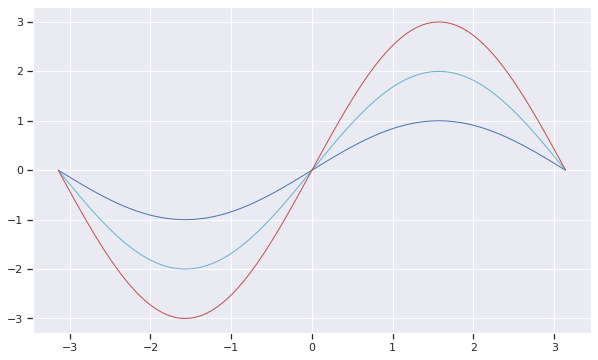

In [ ]:
sns.set(rc={'figure.figsize':(10, 6), "lines.linewidth": 1.0})


# 100 linearly spaced numbers
x = np.linspace(0,1,100)
x = np.linspace(-np.pi,np.pi,100)

# the function
y = x**20
y = np.sin(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
#plt.plot(x,y, 'g')
plt.plot(x,y, 'b', label='y=sin(x)')
plt.plot(x,2*y, 'c', label='y=2sin(x)')
plt.plot(x,3*y, 'r', label='y=3sin(x)')

# show the plot
plt.show()

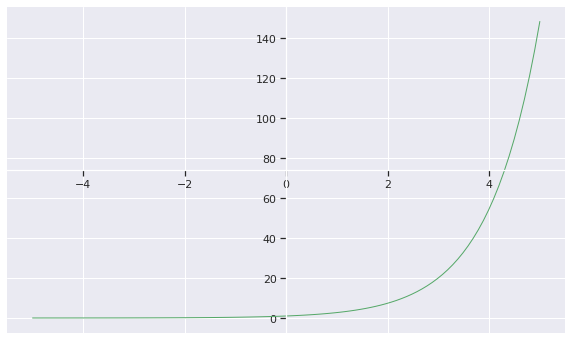

In [ ]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^3 here
y = x**2
y = np.exp(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

##### <font color="orange">*2024 Quantum Study*

*Locally flat distributions*

https://www.nature.com/articles/s41598-023-43404-3

we use a robust local minima problem to compare state-of-the-art local optimizers (SLSQP, COBYLA, L-BFGS-B and SPSA) against DE using the Variational Quantum Eigensolver algorithm.

https://docs.quantum.ibm.com/api/qiskit/qiskit.algorithms.optimizers.SLSQP

**what is so interesting aboiut Locally flat distributions and Paulis on quantum computers?**

Here's what's interesting about locally flat distributions and Paulis (Pauli operators) in the context of quantum computers, and why they matter:

**Locally Flat Distributions**

* **Noise Representation:** Locally flat distributions are used to model a particular type of noise in quantum circuits. This noise has the property that small errors become much more likely than large errors. Locally flat distributions capture this behavior.
* **Error Correction and Threshold Theorems:** Understanding the properties of locally flat distributions plays a role in the development of quantum error correction codes.  Importantly, they are connected to the idea of fault-tolerance thresholds – limits on error rates below which quantum computation can be made reliable.
* **Simulation and Analysis:** Studying locally flat distributions helps researchers design and analyze quantum algorithms that are robust to this specific type of noise.

**Paulis (Pauli Operators)**

* **Fundamental Building Blocks:** The Pauli operators (X, Y, Z) together with the identity operator (I) form a basis for the space of operators on a single qubit.  This means any operation on a single qubit can be expressed as a combination of Paulis.
* **Error Representation:** Many common quantum errors can be represented as combinations of Pauli operators acting on qubits. This makes them convenient for describing noise processes
* **Qubit Control:**  Pauli operators are used as quantum gates to manipulate the state of qubits, forming the essential toolkit for quantum computation.

**Where They Intersect**

* **Describing Noise with Paulis:** Locally flat noise distributions can often be well-described in terms of probabilistic combinations of Pauli errors.  This connection helps analyze how such noise affects quantum circuits.
* **Error Correction Tailored to Paulis:** Quantum error-correcting codes can be specifically designed to combat Pauli errors, which are a common type of noise. Understanding the relationship between Paulis and noise distributions helps in creating more effective codes.
* **Efficient Simulation:** Certain simulation techniques, such as stabilizer circuit simulations, heavily exploit the structure of Pauli operators to efficiently simulate specific classes of quantum circuits.

**In Summary**

Locally flat distributions and Paulis provide a framework to model, analyze, and mitigate the effects of noise in quantum computers. Understanding their connection enables the design of more resilient quantum algorithms and the development of robust error-correction schemes that are crucial for the advancement of practical quantum computing.

**Let me know if you'd like to dive deeper into any of these aspects, such as quantum error correction codes, noise modeling, or stabilizer circuits!**


**what is low degree truncation in quantum computing?**

Here's an explanation of low-degree truncation in quantum computing, its uses, and its significance:

**What is Low-Degree Truncation?**

Low-degree truncation is a technique used in quantum computing to simplify calculations involving complex quantum systems. It involves approximating a system's Hamiltonian (the operator that describes its energy) by keeping only the terms with low-degree polynomials.

**How It Works**

1. **Hamiltonian Representation:**  The Hamiltonian of a quantum system can often be expressed as a sum of terms involving products of Pauli operators (X, Y, Z).  Each term has a degree determined by the number of Pauli operators in the product (e.g., the term XY has degree 2).

2. **Truncation:** In low-degree truncation, you keep only the terms in the Hamiltonian up to a certain degree and discard the higher-degree terms. This simplifies the representation and makes calculations more manageable.

**Why Use Low-Degree Truncation**

* **Computational Complexity:** Simulating complex quantum systems on classical computers can be extremely computationally expensive. The number of terms in the Hamiltonian grows exponentially with the size of the system. Low-degree truncation reduces this complexity.
* **Focus on Essential Interactions:** In many systems, the essential physics is often captured by the low-order interactions. Truncating higher-order terms may introduce some error but often provides a good approximation while significantly simplifying the calculations.
* **Resource Limitations:** Quantum computers themselves have a limited number of qubits and limited gate depth they can apply. Low-degree truncation can make problems more amenable to simulation on near-term quantum devices.

**Applications**

* **Quantum Chemistry Simulations:** Low-degree truncation is used in simulating the electronic structure of molecules. This helps understand chemical reactions and design new materials.
* **Material Science:**  It's used in simulations of materials to predict their properties, aiding in the discovery of new materials with tailored characteristics.
* **Quantum Optimization:**  Some quantum optimization algorithms are amenable to low-degree truncation, making it possible to approximate solutions to complex optimization problems.

**Significance**

Low-degree truncation is a powerful tool for making quantum simulations more tractable, especially when dealing with large or complex systems. However, there's a trade-off:

* **Accuracy vs. Efficiency:**  Truncation introduces errors, so it's important to balance accuracy requirements with computational efficiency when choosing the degree of truncation.

**Example**

Consider a Hamiltonian with terms like X, Y, Z, XY, XZ, YZ, XYZ.  A low-degree truncation at degree 2 would only keep the terms X, Y, Z, XY, XZ, and YZ, and discard the XYZ term.

**Let me know if you would like to explore any specific application of low-degree truncation in more detail!**


**what is the Depolarizing channel in each qubit?**

Here's a breakdown of the depolarizing channel in quantum computing, including how it works and its significance:

**What is the Depolarizing Channel?**

* **Definition:** The depolarizing channel is a type of quantum channel (a mathematical model of how quantum states evolve) that introduces noise into a qubit (the basic unit of quantum information).  It does this by effectively shrinking the Bloch sphere representation of the qubit's state.
* **Behavior:** With a probability `p`, the depolarizing channel replaces the input qubit with the completely mixed state (a state of maximum uncertainty). With the remaining probability `(1-p)`, the qubit is left unchanged.
* **Effect:** The depolarizing channel introduces randomness, making it harder to reliably store and process quantum information.

**Mathematical Representation**

The depolarizing channel can be represented mathematically using the Kraus operator-sum representation:

```
ℰ(ρ) = (1-p) ρ + p/3 (XρX + YρY + ZρZ)
```

Where:

* `ρ` is the input density matrix (representing the qubit's state).
* `p` is the depolarization probability.
* `X`, `Y`, and `Z` are the Pauli matrices (basic quantum gates).

**Geometric Interpretation**

The depolarizing channel can be visualized as shrinking the Bloch sphere (a geometric representation of a qubit's state):

* The completely mixed state is represented by the center of the Bloch sphere.
* The depolarizing channel moves the qubit's state closer to the center, shrinking its representation on the Bloch sphere.
* The stronger the depolarization (higher `p`), the more the Bloch sphere shrinks.

**Significance**

* **Modeling Noise:** The depolarizing channel is a useful model for representing realistic noise in quantum systems.  Real-world qubits interact with their environment, leading to decoherence that is often well-approximated by a depolarizing channel.
* **Error Correction:** Understanding the depolarizing channel is crucial for designing quantum error correction codes. These codes help protect quantum information from the effects of noise.
* **Capacity Limits:** The depolarizing channel affects the capacity of a quantum communication channel, which limits the amount of information that can be reliably transmitted.

**Example**

Suppose you have a qubit in the pure state |0⟩. If it passes through a depolarizing channel with probability `p = 0.25`, the output state would be:

```
(1 - 0.25) |0⟩⟨0| + 0.25/3 (I/2) = 0.75 |0⟩⟨0| + 0.083 I
```

This is a mixed state, indicating a loss of quantum information.

**Let me know if you would like a deeper dive into any of these aspects or have a specific application in mind!**


[Quantum hadamrd test](https://youtu.be/F98jpHBQPys?si=_pH2ozWfJjwL7Ap5)

[Algebra of pauli matrices](https://youtu.be/Gj9iezP89Dk?si=w_6P8vH3ONLq1a8L)



https://phys-org.cdn.ampproject.org/c/s/phys.org/news/2024-02-magnesium-tantalum-material-qubits.amp

https://www-insidequantumtechnology-com.cdn.ampproject.org/c/s/www.insidequantumtechnology.com/news-archive/news-from-infleqtion-inertial-sensors-atomic-clocks-rf-receivers-oh-and-1600-qubits-by-brian-siegelwax/amp/

https://thequantuminsider.com/2024/02/07/quantum-matters-quantum-ai-early-days-for-a-killer-combination/

https://arxiv.org/abs/2402.03871: Geometric quantum machine learning of BQP^A protocols and latent graph classifiers

https://www.spektrum.de/news/revolutioniert-die-fusion-von-ki-und-quantenphysik-die-wissenschaft/2203074

[Daniel Sank: The superconducting transmon qubit as a microwave resonator](https://www.youtube.com/watch?v=dKTNBN99xLw&list=WL&index=7&t=2329s)

[Quantum Industry Talks: Quantum computing hardware](https://www.youtube.com/watch?v=eyICn3KCUPI&list=WL&index=6&t=2000s)

[Course 3: How to build a quantum network/ Hardware perspective](https://youtu.be/iGdbROJfmiw?si=v7Bi6FIfY01Dobrd)

[Course 4: How to build a quantum network/ Theory perspective](https://youtu.be/pZJVU_60Gd8?si=LLIgpDalf4eLx_ps)

Hamiltonian simulation and Trotterization: https://vtomole.com/blog/2019/04/07/trotter

https://www.golem.de/news/militaer-erfolgreiche-demonstration-von-quanten-funkkommunikation-2401-181120.amp.html

**Pending:**

* [Robert Huang: Fundamental aspects of solving quantum problems with machine learning
](https://www.youtube.com/watch?v=VazUK13iwpQ&list=WL&index=5&t=936s)

* [Vedran Dunjko - Building the case for Quantum Machine Learning](https://www.youtube.com/watch?v=td3jfKxT5TI&list=WL&index=7&t=2795s)

* [Vedran Dunjko - Exponential separations between classical and quantum learners - IPAM at UCLA](https://www.youtube.com/watch?v=IlEixl4mq0o&list=WL&index=5&t=163s)

* [Markus Müller - Topological Quantum Error Correction: From Theoretical Concepts to Experiments](https://www.youtube.com/watch?v=tbrTOemjxow&t=11s)

* [Xanadu PennyLane Quantum Computing Training - 2023 NUG Annual Meeting](https://www.youtube.com/watch?v=gJUBBZIq8zo&list=WL&index=4&t=4450s)

*Applied Reviews*

* [A Look Back at 2023 and Quantum Predictions for 2024](https://www.youtube.com/watch?v=ORhwzlDHdy8&list=PLBn8lN0DcvpmcGQ1H_9YMFPew1ZsP_8Sj&index=3&t=2742s)

**NISQ and LISQ**

https://dabacon.org/pontiff/2024/01/03/acronyms-beyond-nisq/

https://www.linkedin.com/pulse/bye-nisq-hello-lisq-simone-severini-ybkmc

**Block Encoding and QSVT**

* [Pennylane: Intro to QSVT](https://pennylane.ai/qml/demos/tutorial_intro_qsvt/#transforming-matrices-encoded-in-matrices)



**Experimental advantage in learning with noisy Quantum memory - Quantum Summer Symposium 2021**

* Video: [Experimental advantage in learning with noisy Quantum memory - Quantum Summer Symposium 2021](https://www.youtube.com/watch?v=GEgJkqQNwvQ&list=WL&index=1)

*details used for QML book

> $f(x)=\left\langle 0\left|U_0^{\dagger}(x)   U_0(x)\right| 0\right\rangle=\left\langle x| x\right\rangle$

The given expression $f(x)=\left\langle 0\left|U_0^{\dagger}(x)   U_0(x)\right| 0\right\rangle=\left\langle x|x\right\rangle$ represents the **squared norm of the quantum state |x⟩**. The squared norm of a quantum state is a measure of its overall size or amplitude. It is calculated by taking the inner product of the state with itself.

Let's break down the expression:

* **⟨0|:** This denotes the inner product of the vacuum state |0⟩ with itself. The vacuum state is the state with no particles, and it has unit norm.

* **U_0^{\dagger}(x):** This is the conjugate transpose of the identity operator I0, which is a unitary operator that acts as the identity on the vacuum state. The conjugate transpose is a common operation in quantum mechanics, and it relates the action of an operator on a quantum state to its action on the dual state.

* **U_0(x):** This is the identity operator I0. The identity operator is a unitary operator that does not change the state of a quantum system. It is the simplest and most fundamental unitary operator.

* **|0⟩:** This is the vacuum state |0⟩. The vacuum state is the state with no particles, and it has unit norm.

* **⟨x|x⟩:** This denotes the inner product of the state |x⟩ with itself. The inner product of two quantum states is a measure of their overlap. It is calculated by taking the dot product of their corresponding complex vectors.

Putting everything together, the expression $f(x)=\left\langle 0\left|U_0^{\dagger}(x)   U_0(x)\right| 0\right\rangle=\left\langle x|x\right\rangle$ represents the squared norm of the quantum state |x⟩. It is a scalar quantity that indicates the overall size or amplitude of the state.


**Variational Circuits and Parameter-Shift Rule - Part 1**

* Video: [Parameter--Shift Rule Derivation — Part 1 | PennyLane Tutorial](https://www.youtube.com/watch?v=crgmwXBogx4&list=PLzgi0kRtN5sO8dkomgshjSGDabnjtjBiA&index=5)
* https://pennylane.ai/qml/glossary/parameter_shift/#gaussian-gate-example-
* Also see: [Automatic Differentiation of Quantum Circuits](https://www.youtube.com/watch?v=McgBeSVIGus&t=1s)
* Also see: [Parameter Shift Rule for calculation of Gradients in Quantum Variational Circuits](https://www.youtube.com/watch?v=yJriVOy5l_8&list=WL&index=1&t=6s)
* Represent certain expectation values with Fourier series, important to derive some parameter shift rules in order to compute quantum gradients
* Fourier representation is also useful to expressivity of certain quantum models
* **We are computing the expectation value <font color="green">$E(x)$</font> of operator <font color="red">$B$</font> such that we have a quantum state $\psi$ which is evolved by some unitary <font color="blue">$U(x)$</font>**

> <font color="green">$E(x)$</font> $=\langle\psi|$ <font color="blue">$U^{\dagger}(x)$</font> <font color="red">$B$</font> <font color="blue">$U(x)$</font> $| \psi\rangle$

This kind of expression is common in quantum computing and quantum mechanics, **where it's used to calculate the expected outcomes of various quantum operations**, which are critical for understanding how quantum algorithms will behave.

**How to solve this? $E(x) =\langle\psi| U^{\dagger}(x) B U(x) | \psi\rangle$**

* Two main approaches to calculating the eigenvalues of a Hermitian operator B:
  1. **Diagonalization:** This method involves finding an orthonormal basis of eigenvectors of B. The eigenvalues of B are then the corresponding eigenvalues of the Hermitian matrix representing B in this basis.
  2. **Eigenvalue Solvers:** There are various numerical methods for calculating eigenvalues of Hermitian operators, such as the Rayleigh-Ritz quotient, the Lanczos algorithm, and the Arnoldi algorithm. These methods can be used to calculate eigenvalues for large Hermitian matrices that cannot be diagonalized directly.
* In the case of $E(x) =\langle\psi| U^{\dagger}(x) B U(x) | \psi\rangle$, the observable B is sandwiched between the unitary operator $U(x)$ and its conjugate transpose $U^{\dagger}(x)$.
* This means that $B$ can be expressed as a combination of powers of $U(x)$ and $U^{\dagger}(x)$. **If we can find the eigenvalues of this combination of operators $U(x)$ and $U^{\dagger}(x)$, then we can calculate the eigenvalues of $E(x)$**.
  * One way to achieve this is to use a diagonalization method - accurate and but computational expensive. This involves finding a suitable basis for the Hilbert space of quantum states, and representing U(x) and U^{\dagger}(x) in this basis. The eigenvalues of B can then be calculated by diagonalizing the matrix representing B in this basis.
  * Another approach is to use an eigenvalue solver - efficient, but not super accurate. This involves choosing an appropriate numerical method, and applying it to the matrix representing B in the basis defined by U(x) and U^{\dagger}(x). The eigenvalues of B can then be calculated by using the numerical method.










**Variational Circuits and Parameter-Shift Rule - Part 2**

(same video, continuation, [Parameter--Shift Rule Derivation — Part 1 | PennyLane Tutorial](https://www.youtube.com/watch?v=crgmwXBogx4&list=PLzgi0kRtN5sO8dkomgshjSGDabnjtjBiA&index=5)
)

* <font color="blue">$U(x) = e^{ixG}$</font>
* <font color="orange">$G$</font> = hermitian operator <font color="orange">$G^{\dagger}$ = $G$</font> is called the **generator** of the operator $U$ (e.g. the generator of a Y rotation gate is the Pauli Y gate with a factor of $-\frac{1}{2}$

Eigenvalues and Eigenstates of <font color="orange">$G$</font>, denoted by some $\omega_j$. We create set out of these eigenvalues, ordered in non-descending order. j is from e, which is defined as set of positive integers from 1 to d

> Eigenvalue: <font color="orange">$\left\{\omega_j\right\}_{j \in[d]}$ $\quad$ with $[d]:=\{1, \cdots, d\}$

> Eigenequation: <font color="orange">$G\left|\varphi_j\right\rangle=\omega_j\left|\varphi_j\right\rangle$

Eigenvalues and Eigenstates of <font color="blue">$U(x)$</font>:

> Eigenvalue: <font color="blue">$\left\{e^{i x \omega_j}\right\}_{j \in[d]}$ $\quad$ with $[d]:=\{1, \cdots, d\}$

> Eigenstate: <font color="blue">$|\varphi_j\rangle_{j \in[d]}$

> Eigenequation: <font color="blue">$U(x)\left|\varphi_j\right\rangle=e^{i x \omega_j}\left|\varphi_j\right\rangle$

Two more definitions:

> $\psi_j := \left\langle\varphi_j \mid \psi\right\rangle$

> $b_{j k} := \left\langle\varphi_j|B| \varphi_k\right\rangle$ with $j, k \in[d]$

Now we can re-express the expectation value <font color="green">$E(x)$</font> by expanding each of these terms in the multiplication in the Eigenbasis of the unitary <font color="blue">$U(x)$</font>:

> $\begin{gathered}E(x)=\sum_{j, k=1}^d \psi_j^*\left[e^{i x \omega_j}\right]^* b_{j k} e^{i x \omega_k} \psi_k \\ \psi_j=\left\langle\varphi_j \mid \psi\right\rangle \\ b_{j k}=\left\langle\varphi_j|B| \varphi_k\right\rangle\end{gathered}$

**Variational Circuits and Parameter-Shift Rule - Part 3**

Video: [QHack 2021: Maria Schuld—Quantum Differentiable Programming](https://www.youtube.com/watch?v=cwiINWkMOvA)

Are there QML problems that are proven to be superior to CML? - Yes, there are certain problems superior on QML, but none are useful. Useful QML problems with exponential separation to CML are still an open question.

What model class is QML? How can it generalize? Let's describe what it is, before we look into concrete cases with only exponential speedups.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1685.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1686.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1687.png)


**Quantum Chemistry**
* Video: [Introduction to Quantum Chemistry | PennyLane Tutorial](https://www.youtube.com/watch?v=khC0CCjxB7k&list=WL&index=11)
* See also: [Aurora Clark (3/10/20): Topology in chemistry applications](https://www.youtube.com/watch?v=qSJeynJbmqU&list=WL&index=12&t=1252s)
* Predict properties of materials
* What chemical reactions can happen under certain circumstances
* Molecular orbitals of electrons: how to represent them with qubits? With Jordan Wigner representation
* Hamiltonian operator (all interactions and movements) important to know the energy levels occupied by the electrons in order to predict accurately the chemical properties of the molecules
* Hamiltonian operator = all interactions and movements -> too complicated, so we approximate: Hartree Fock approximation
    * Calculates molecular geometry (positions where the atomic nuclei are)
    * Then calculate hamiltonian
* **Jordan Wigner representation**
  * https://learn.microsoft.com/en-us/azure/quantum/user-guide/libraries/chemistry/concepts/jordan-wigner
  * https://en.m.wikipedia.org/wiki/Jordan–Wigner_transformation
  * https://www.cond-mat.de/events/correl21/manuscripts/koch.pdf

**Variational Quantum Algorithms**
* Video: [Variational Quantum Algorithms](https://www.youtube.com/watch?v=YtepXvx5zdI&t=21s)
* Contains **Great images of model types etc)**
* https://pennylane.ai/qml/glossary/variational_circuit/
* Also known as: parametrized quantum circuits, quantum neural networks
* example: VQE (variational quantum eigensolver) for chemistry problems or QAOA for optimization and many more
* Variational quantum circuits are already hybrid models

**Hybrid Quantum-Classical Machine Learning**
* Video: [Hybrid Quantum-Classical Machine Learning](https://www.youtube.com/watch?v=t9ytqPTij7k)
* * Variational quantum circuits are already hybrid models
* Backprop:
  * treat the quantum circuit as a basic atomic individual step in the computation graph.  
  * the expectation value of a quantum circuit is a differentiable function.
  * So if we treat that single expectation value as a single step, we can use the parameter shift rule to determine the gradient of that same function.
  * Means: we can feed that to the backprop algorithm.

**Optimizing a quantum circuit with PennyLane | PennyLane Tutorial**
* Quantum circuit is a function. Think of quantum circuit as cost function and measurement will be the cost -> useful for finding minimum in optimization or ground state in chemistry.
* Video: [Optimizing a quantum circuit with PennyLane | PennyLane Tutorial](https://www.youtube.com/watch?v=42aa-Ve5WmI)
* https://docs.pennylane.ai/en/stable/introduction/interfaces.html


**Beyond-classical computing, Sergio Boixo**
* Video: [Beyond-classical computing, Sergio Boixo](https://www.youtube.com/watch?v=cGaULUQuu1A&list=WL&index=1&t=1147s)
* Sample problem, approximate from a sample distribution
* Experimental Random Circuit Sampling (RCS)

**How to solve the QUBO problem | PennyLane Tutorial**

* Video: [How to solve the QUBO problem | PennyLane Tutorial](https://www.youtube.com/watch?v=LhbDMv3iA9s&t=212s)

**The Haar Measure | PennyLane Tutorial**

* Video: [The Haar Measure | PennyLane Tutorial](https://www.youtube.com/watch?v=d4tdGeqcEZs)


**Physical simulation through a quantum computational lens, Jarrod McClean**

* Video: [Physical simulation through a quantum computational lens, Jarrod McClean](https://www.youtube.com/watch?v=-8fYbDwLAug&list=WL&index=2&t=383s)

* What we mean with quantum chemistry simulation: we want some amount of understanding if the system. Like learn interesting things, like will a system absorb light and why? How often will it show up?

* The predictive power of (free) energies: Can all physically interesting questions be answered by some reduced model? Recent, but there are undecidable, there can't be an algorithm that determines the answer:
  * Does a system thermalize?
  * Does a system have an electronic gap?
  * Will molecule X ever form from constituents Y?

* qualitative changes that can't be predicted ahead of time: proteins, RNA/DNA

* Physical undecidability - as the system evolves in time, there are sudden, qualitative changes that cannot be predicted in any way except evolving forward in time and seeing if it happened, and no answer in finite time can indicate if it will never happen (for all systems).

> Undecidability formally broken by advice in some cases - and data is a restricted form of advice!

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1688.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1689.png)





**Jarrod McClean - The role of data, precomputation, and communication in a quantum learning landscape**

* Video: [Jarrod McClean - The role of data, precomputation, and communication in a quantum learning landscape](https://www.youtube.com/watch?v=dOUppTONVDM&list=WL&index=8&t=819s)

* Quantum data is interesting for future discovery of the universe (recall the impact of CCD cameras on telescopes - see
"The Perfect Theory"), but most data we work with today, even from quantum systems, seems classical.

* There are a few pieces of evidence that QC might help for classical data (sampling hard distributions, learning problems based on discrete log, linear algebra routines, ...) but a lot of pieces of evidence that it will be hard to achieve in practice

* Question - What is the full class of uniquely quantum pre-computations we can do to accelerate time to solution?

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1690.png)


##### <font color="orange">*Computational Learning*

###### *Model vs Circuit Capacity (Complexity / Expressivity)*

*Model vs Circuit Capacity (Complexity / Expressivity)*

- What is meant by: In neural networks the differentiation rules, that we use, scale linearly with the number of parameters. In variational circuits the differentiation rules, that we use, scale quadratically with the number of parameters.
- Automatic differentiation is based on recycling values of gradients, so that not for every parameter they have to run the whole network again, forwards and backwards.
- Challenge: Just guessing an ansatz (expressive)
- Adding more layers = Increase the frequency of the cosine kernel?? - Min 27: [QML Meetup: Dr Maria Schuld, Taking stock of quantum machine learning - a critical perspective](https://youtu.be/8bfUMdj0-x4), then just repeating these layers of encoding would be better. In many cases making an embedding and then repeating it makes the model class richer.
- Quantum advantage for learning is currently still ill-posed.
- What is meant by quantum speedup? Different concepts. It’s always relative to something.
- And what do you mean by ‘more powerful’: learning or speedup? Etc.

> How can I prove that my ansatz is classically intractable? versus **What is an ansatz design that allows gradient-descent to scale as efficient as it does when training neural networks?**

> How can I show that QML is more powerful? versus **How can I understand what QML is doing?**

https://www.youtube.com/watch?v=8bfUMdj0-x4&t=1621s

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1609.png)

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1610.png)

###### *Concept and Hypothesis*

[Jens Eisert - Do quantum computers have application in machine learning & combinatorial optimization](https://www.youtube.com/watch?v=DgCNmk4kvVs&list=WL&index=11&t=827s)

Hypothesis class = Function Family I'm considering for learning

Concept class = true relationship between data and labels

**Concept class**

A concept class in computational learning theory is a set of target concepts or functions that a learning algorithm is trying to learn. For example, a concept class could be the set of all Boolean functions, or the set of all linear functions.

Concept class refers to the set of all possible concepts or functions that the learner is trying to learn or approximate. It represents the underlying target concept that the learner is trying to capture.


**Hypothesis**

A hypothesis in computational learning theory is a candidate solution to a learning problem. For example, a hypothesis for learning a Boolean function could be a decision tree, or a neural network.

Hypothesis is a subset of the concept class that the learner uses to approximate or represent the target concept. It's the set of functions or models that the learner considers as potential solutions to the learning problem.


**Learner**

A learner in computational learning theory is an algorithm that takes training examples as input and outputs a hypothesis. The goal of the learner is to find a hypothesis that is consistent with the training data and that will generalize well to new data.

The learner is the algorithm or method used to search through the hypothesis space and select the best hypothesis that approximates the target concept based on available training data.


Here are some specific examples of concept classes, hypotheses, and learners in computational learning theory:

Example 1:

* **Concept class:** The set of all Boolean functions
* **Hypothesis:** A decision tree
* **Learner:** The ID3 algorithm

Example 2:

* **Concept class:** The set of all linear functions
* **Hypothesis:** A linear regression model
* **Learner:** The least squares algorithm

Example 3:

* **Concept class:** The set of all images of cats
* **Hypothesis:** A convolutional neural network
* **Learner:** The Adam optimizer

Other examples:

* **Concept class:**
  * Equivalently, a concept c is a subset of {0,1}n, namely {x : c(x) = 1}. Let C ⊆ {f : {0,1}n → {0,1}} be a concept class. This could for example be the class of functions computed by disjunctive normal form (DNF) formulas of a certain size, or Boolean circuits or decision trees of a certain depth. https://arxiv.org/pdf/1607.00932.pdf
  * Set of all Boolean functions: If you are dealing with a problem where the underlying target concept or function you want to learn is inherently Boolean in nature (i.e., it maps inputs to binary outputs, such as 0 or 1), then Boolean functions can be the concept class.
  * set of all linear functions: Linear functions can be considered the concept class when the underlying target concept is believed to be a linear relationship between inputs and outputs. In this case, the concept class consists of all possible linear functions that could describe the target concept. Example: If you are working on a regression problem where you want to predict a numerical value based on input features, and you believe that the relationship is linear, the concept class could be all possible linear functions.
  * Unitary transformations
  * Example: In a binary classification problem where you want to distinguish between spam and non-spam emails, the concept class could be the set of all possible decision boundaries that separate spam emails from non-spam emails in the feature space. Each decision boundary represents a different concept in the concept class.
  * For agnostic learner:  In the case of binary classification (e.g., spam vs. non-spam email classification), the agnostic concept class might represent all possible ways to separate the two classes in the feature space without assuming any specific data distribution. It could include various decision boundaries, non-linear separations, or complex relationships between features and labels.
  * Gibbs states, also known as Gibbs distributions or Gibbs measures, are mathematical constructs from statistical physics and probability theory. They are used to model the probability distributions of physical systems consisting of multiple interacting components (particles, spins, etc.). In the context of computational learning theory, Gibbs states can be considered as a concept class when they are used to model or represent the set of all possible probability distributions over a space of random variables. Concept classes represent the set of all possible underlying target concepts or functions that the learner is trying to learn or approximate. In this case, Gibbs states represent a class of possible probability distributions.
* **Hypothesis:**
  * Boolean functions: Boolean functions can also be used as the hypothesis set, representing the set of candidate models or classifiers that the learner considers as potential solutions to the problem. In this case, you are considering Boolean functions as candidate hypotheses for approximating the target concept. Example: In binary classification tasks, you might consider simple Boolean functions (e.g., "If feature A is true and feature B is false, output 1; otherwise, output 0") as potential hypotheses for classifying data points.
  * Linear functions: Linear functions can also be used as the hypothesis set when you are considering linear models as potential hypotheses for approximating the target concept. In this case, you are using linear functions as candidate models to fit the data and learn the mapping between inputs and outputs. Example: Linear regression models, which use linear functions to model relationships between features and outcomes, can be considered as hypotheses in a regression problem.
  * decision tree with regularization
  * linear regression model with regularization
  * neural network: As a hypothesis, a neural network can be used to represent a specific function or concept. For example, a neural network could be trained to represent the function that maps an image to a probability distribution over different categories. e.g.: convolutional neural network with regularization
  * Example: In the context of linear classification, the hypothesis space could be the set of all possible linear classifiers (e.g., support vector machines, logistic regression). Each linear classifier within this space is a hypothesis used to approximate the target concept.
  * For agnostic learner: The agnostic hypothesis set could include various types of models, such as decision trees, support vector machines, neural networks, or any other model that can be used for binary classification. These models are chosen based on their flexibility and general applicability, allowing the learner to explore a wide range of possibilities without being tied to specific distributional assumptions.
* **Learner:**
  * agnostic learner, and examples of agnostic learners:
    * Support vector machines
    * Random forests
    * Neural networks: As a learner, a neural network can be used to learn a wide variety of functions and concepts. This is because neural networks are able to approximate any continuous function to arbitrary accuracy, given enough neurons and hidden layers. In practice, neural networks are typically used as learners. This is because neural networks are able to learn from data without being given any prior knowledge about the function or concept that they are trying to learn.
    * A perceptron is a type of artificial neuron that is used in machine learning. It is the simplest type of artificial neuron and is the building block of more complex neural networks.
  * proper learner
  * online learner (spam filter, stock trading algorithm, recommendation system)
  * active learner
  * Example: For supervised learning tasks, a learner could be a decision tree algorithm, a neural network, or a k-nearest neighbors classifier. The learner's role is to use the training data to find the hypothesis (model) that minimizes a certain loss function or error measure.


*It is important to note that a learning algorithm may use different hypotheses for different concept classes. For example, the ID3 algorithm can be used to learn decision trees for any concept class, but the least squares algorithm can only be used to learn linear functions.*






**Problems / Use Cases (and representations of states and operations):**
* **Hamiltonian learning**: is the process of learning the Hamiltonian of a quantum system. The Hamiltonian is a mathematical object that describes the energy of a quantum system. Knowing the Hamiltonian of a quantum system allows us to predict its behavior and to design experiments to control it.
  * Designing quantum computers to perform specific tasks
  * Developing new quantum algorithms
  * Understanding the fundamental properties of quantum matter
  * The main difference between Hamiltonian learning and learning unitary dynamics is that Hamiltonian learning is more general. By learning the Hamiltonian of a quantum system, we can learn its unitary evolution, as well as other properties of the system. However, learning the unitary evolution of a quantum system does not necessarily tell us anything about the Hamiltonian of the system.
  * Another difference between Hamiltonian learning and learning unitary dynamics is that Hamiltonian learning is typically more difficult. This is because the Hamiltonian of a quantum system is typically a complex function of many parameters. In contrast, the unitary evolution of a quantum system can often be described by a simpler mathematical object, such as a matrix.
  * Hamiltonian learning is a process of learning the Hamiltonian of a quantum system. The Hamiltonian of a quantum system is a mathematical object that describes the energy of the system. Knowing the Hamiltonian of a quantum system allows us to predict its behavior and to design experiments to control it.
  * Hamiltonian learning can be used to learn a variety of quantum concepts and functions. For example, Hamiltonian learning can be used to learn the ground state of a quantum system, the energy levels of a quantum system, and the unitary evolution of a quantum system.
* **Learning unitary dynamics**: is the process of learning the unitary evolution of a quantum system. The unitary evolution of a quantum system describes how the state of the system changes over time. Knowing the unitary evolution of a quantum system allows us to design experiments to perform specific tasks, such as quantum computing and quantum teleportation.
  * Controlling quantum systems to perform specific tasks, such as quantum teleportation and quantum cryptography
  * Developing new quantum measurement techniques
  * Understanding the dynamics of complex quantum systems
* **Learning unknown element U of the Clifford group on n qubits**
  * learning a Clifford element U is a special case of both Hamiltonian learning and learning unitary dynamics.
  * The Clifford group is a subset of the unitary group, which is the group of all unitary transformations on n qubits. This means that every Clifford element U can be represented by a unitary matrix. Therefore, learning a Clifford element U is equivalent to learning a unitary transformation.
  * The Hamiltonian of a quantum system is a unitary operator. This means that the evolution of a quantum system over time can be described by a unitary transformation. Therefore, learning the Hamiltonian of a quantum system is equivalent to learning a unitary transformation.
* **Gibbs state**
  * Gibbs states are a type of probability distribution over the states of a physical system. They are typically used in statistical physics to model the behavior of systems at equilibrium.
  * Gibbs states can be used to learn about the properties of a physical system. For example, we can use Gibbs states to learn about the energy levels of a system, or the phase transitions that the system can undergo.
* **Tomography, both quantum state tomography (QST) and quantum shadow tomography (QST)**
* **DNF formulas** themselves are not hypotheses or learners. They are simply a way of representing Boolean functions.
* **Bell sampling**:
  * Bell sampling is a technique for measuring the correlations between pairs of qubits. It can be used to learn about the properties of quantum states, but it is not a learner in the traditional sense.
  * Bell sampling does not take training examples as input. Instead, it takes measurements of a quantum state as input.
  * Bell sampling does not output a hypothesis. Instead, it outputs a set of correlation measurements.
  * However, Bell sampling can be used as part of a learning algorithm. For example, Bell sampling can be used to learn the Hamiltonian of a quantum system.
* **stabilizer state** can be a concept class or hypothesis:
  * Stabilizer states as a concept class
    * A stabilizer state is a quantum state that is invariant under the action of a set of Pauli operators. Pauli operators are unitary operators that act on individual qubits.
    * Stabilizer states are a useful concept in quantum computing because they can be efficiently prepared and manipulated.
    * Stabilizer states can be used to represent a wide variety of quantum concepts and functions. For example, stabilizer states can be used to represent Boolean functions, linear functions, and unitary transformations.
    * Therefore, stabilizer states can be used to define a concept class in computational learning theory.
  * Stabilizer states as a hypothesis
    * A stabilizer state can also be used as a hypothesis for learning a quantum concept or function.
    * For example, we can use a quantum algorithm to learn a stabilizer state that represents a Boolean function.
    * Once we have learned the stabilizer state, we can use it to evaluate the Boolean function on any input.
    * Therefore, stabilizer states can be used as hypotheses in computational learning theory.
* **Thermal state learning**:
  * Thermal state learning is a technique for learning the thermal state of a quantum system. The thermal state of a quantum system is the state that the system will eventually reach if it is allowed to interact with its environment for a long time.
  * Thermal state learning can be used to learn about the properties of quantum systems. However, it is not a concept class, hypothesis, or learner in the traditional sense.

**Learning classical functions (through quantum encoding)**


* **Boolean functions**: [Boolean functions](https://de.m.wikipedia.org/wiki/Boolesche_Funktion): Fourier analysis of functions on the Boolean cube, [Boolesche_Algebra](https://de.m.wikipedia.org/wiki/Boolesche_Algebra), [Boolean_circuit](https://en.m.wikipedia.org/wiki/Boolean_circuit) and [Analysis_of_Boolean_functions](https://en.m.wikipedia.org/wiki/Analysis_of_Boolean_functions): A concept c : {0,1}$^n$ → {0,1} by its N-bit truth-table (with N = 2$^n$), hence C ⊆ {0,1}$^N$

  * An **N-bit truth table is a truth table that has N rows**, where each row represents one possible combination of truth values for the N input variables. The output variable is listed in the last column of the truth table.
  
  * For example, a **2-bit truth table would have 2 rows**, representing the two possible combinations of truth values for the two input variables. The output variable would be listed in the third column.
  
  * Below is an example of a 2-bit truth table for the logical function AND.

> ```
Input 1 | Input 2  | Output
------- | -------- | --------
0       | 0        | 0
0       | 1        | 0
1       | 0        | 0
1       | 1        | 1
```


* **Parities**: The concept classes consisting of parities

* **DNF formulas** [(Disjunctive Normal Form)](https://de.m.wikipedia.org/wiki/Disjunktive_Normalform)

  * it is not known whether DNF is PAC-learnable

* **Juntas**: Special case of DNF: (log n) juntas.

  * A k-junta is a Boolean function that depends on at most k variables. In other words, a k-junta is a function f : {0, 1}^n → {0, 1} such that there exists a set S ⊆ [n] of size |S| ≤ k such that f(x) = f(y) for all x, y ∈ {0, 1}^n such that x and y agree on all variables in S.

  * K-juntas are a natural class of functions to study in computational learning theory because they are relatively simple to learn. In fact, it is known that k-juntas can be learned in time polynomial in n and k. In circuit complexity, k-juntas can be used to lower bound the complexity of certain problems. Here are some examples of k-juntas:

    * The function f(x) = x1 AND x2 AND x3 is a 3-junta.
    * The function f(x) = x1 OR x2 OR x3 is not a 3-junta, because it depends on all 3 variables.
    * The function f(x) = ¬x1 is a 1-junta.

* **Sparse functions**, can be learned under the uniform distribution in the QSQ model.

**Learning physical quantum states (through quantum encoding)** with classical or quantum computers

* **Quantum state identification problem**: *Fully learning arbitrary quantum states could require exponentially many copies of the unknown state. But: Look at physical subclasses of quantum states which can be learned using polynomially many copies. So what classes of quantum states are learnable efficiently and why some classes of states are hard to learn? (Source: Survey on the complexity of learning quantum states)*
* Learning **Quantum k-uniform states**
* Learning **Stabilizer states** (Clifford gates)
* Learning **Gibbs states**
* Learning **States from Clifford hierarchy** and **Distributions induced by Clifford circuits** (*can be learned in the QSQ framework, however, if we add a single T gate, then classical SQ learning the output distribution is as hard as learning parities with noise*)
* Learning **Circuits with non-Clifford gates**
* Learning **Phase states**
* Learning **Matrix Product States**
* Learning **Product States**



**Concept Class and Hypothesis Class** - What can be learnt?

The [Concept Class](https://en.m.wikipedia.org/wiki/Concept_class) (=limited by our use case) contains the true relationships (all possible things) we want to learn = Linear and non-linear functions for a spam filter.
  * The "true" function or the actual relationship might be unknown to us. Our goal in learning is to approximate it.
  * A concept class is a set of **all possible concepts that can be learned**. A concept is a set of inputs that produce the same output. For example, the concept class is the set of all possible images of cats and dogs. The hypothesis class is the set of all possible neural networks with 3 layers. The learner is the gradient descent algorithm.
  * See also [Concept learning](https://en.m.wikipedia.org/wiki/Concept_learning)

The [Hypothesis Class](https://en.m.wikipedia.org/wiki/Hypothesis_Theory) (=limited by our learner from space of concept classes, used to approximate a concept) (e.g. neural network or ID3 decision tree) : While the concept class denotes the true relationships, the hypothesis class is the set of functions that a learning algorithm considers when trying to produce a model from dat
  * = Set of models we consider based on our chosen learning method (set of all possible ways we can represent the things we want to learn). Set of models or functions that our chosen learning algorithm can possibly produce = only linear functions (This might miss out on some true nonlinear relationships present in the concept class).
  * goal of a learning algorithm (the learner) is to probably approximate some unknown target concept c ∈ C from random labeled examples (from "Optimal Quantum Sample Complexity of Learning Algorithms")
  * An ideal situation is when our chosen hypothesis class contains the true function (from the concept class). However, this is not always the case, which is why choosing the right type of model (and thereby the right hypothesis class) is crucial in machine learning.
  * Hypothesis Class: In classification in general, the hypothesis class is the **set of possible (classification) functions** you're considering; the **learning algorithm picks a function from the hypothesis class**. For a decision tree learner, the hypothesis class would just be the set of all possible decision trees. [Source](https://stats.stackexchange.com/questions/270324/what-is-a-hypothesis-class-in-svm)
  * Example: **A quantum PAC learner is given copies of the quantum example state, performs a POVM (where each outcome of the POVM is associated with an hypothesis) and outputs the resulting hypothesis.** *from: Survey on the complexity of learning quantum states,page 20*

**Differentiate:** [Induktive_Verzerrung](https://de.wikipedia.org/wiki/Induktive_Verzerrung), [Hypothesenraum](https://de.wikipedia.org/wiki/Hypothesenraum), [Versionsraum](https://de.wikipedia.org/wiki/Versionsraum) und [Sample_space (Ergebnisraum)](https://en.m.wikipedia.org/wiki/Sample_space)

**Concept class**

A concept class in computational learning theory is a set of target concepts or functions that a learning algorithm is trying to learn. For example, a concept class could be the set of all Boolean functions, or the set of all linear functions.

**Hypothesis**

A hypothesis in computational learning theory is a candidate solution to a learning problem. For example, a hypothesis for learning a Boolean function could be a decision tree, or a neural network.

**Learner**

A learner in computational learning theory is an algorithm that takes training examples as input and outputs a hypothesis. The goal of the learner is to find a hypothesis that is consistent with the training data and that will generalize well to new data.

Here are some specific examples of concept classes, hypotheses, and learners in computational learning theory:

**Concept class:** The set of all Boolean functions
**Hypothesis:** A decision tree
**Learner:** The ID3 algorithm

**Concept class:** The set of all linear functions
**Hypothesis:** A linear regression model
**Learner:** The least squares algorithm

**Concept class:** The set of all images of cats
**Hypothesis:** A convolutional neural network
**Learner:** The Adam optimizer

It is important to note that a learning algorithm may use different hypotheses for different concept classes. For example, the ID3 algorithm can be used to learn decision trees for any concept class, but the least squares algorithm can only be used to learn linear functions.

**Conclusion**

Concept classes, hypotheses, and learners are the fundamental building blocks of computational learning theory. By understanding these concepts, we can better understand how machine learning algorithms work and how to choose the right algorithm for a particular problem.

In computational learning theory, there are three fundamental components: concept class, hypothesis, and learner. Let's define each of these concepts and provide examples:

1. Concept Class:
   - Concept class refers to the set of all possible concepts or functions that the learner is trying to learn or approximate. It represents the underlying target concept that the learner is trying to capture.
   - Example: In a binary classification problem where you want to distinguish between spam and non-spam emails, the concept class could be the set of all possible decision boundaries that separate spam emails from non-spam emails in the feature space. Each decision boundary represents a different concept in the concept class.

2. Hypothesis:
   - Hypothesis is a subset of the concept class that the learner uses to approximate or represent the target concept. It's the set of functions or models that the learner considers as potential solutions to the learning problem.
   - Example: In the context of linear classification, the hypothesis space could be the set of all possible linear classifiers (e.g., support vector machines, logistic regression). Each linear classifier within this space is a hypothesis used to approximate the target concept.

3. Learner:
   - The learner is the algorithm or method used to search through the hypothesis space and select the best hypothesis that approximates the target concept based on available training data.
   - Example: For supervised learning tasks, a learner could be a decision tree algorithm, a neural network, or a k-nearest neighbors classifier. The learner's role is to use the training data to find the hypothesis (model) that minimizes a certain loss function or error measure.

To summarize with an example:
Suppose you have a binary classification problem of identifying whether an email is spam or not. The concept class includes all possible ways to separate spam and non-spam emails in the feature space. Hypotheses within this class might include different decision trees, support vector machines with various kernel functions, or neural network architectures. The learner is the specific algorithm you choose to train on your labeled data, like a decision tree learning algorithm or a neural network training algorithm. The learner's job is to select the best hypothesis (e.g., the best decision tree or neural network parameters) to approximate the underlying concept of distinguishing spam from non-spam emails.

**Learning [quantum circuit complexity](https://en.m.wikipedia.org/wiki/Circuit_complexity)**

*For example Minimum Circuit Size Problem (MCSP), a Meta-Complexity problem*

> [Linear growth of quantum circuit complexity](https://arxiv.org/abs/2106.05305): Consider constructing deeper and deeper circuits for an n-qubit system, by applying random two-qubit gates. At what rate does the circuit complexity increase?

> [The geometry of quantum computation](https://arxiv.org/abs/quant-ph/0701004): Determining the quantum circuit complexity of a unitary operation is closely related to the problem of finding minimal length paths in a particular curved geometry.

* [Quantum Computation as Geometry](https://arxiv.org/abs/quant-ph/0603161)


* [Linear growth of quantum circuit complexity](https://www.nature.com/articles/s41567-022-01539-6)

* [On the average-case complexity of learning output distributions of quantum circuits](https://arxiv.org/abs/2305.05765)

* [Quantum circuit complexity](https://en.m.wikipedia.org/wiki/Quantum_complexity_theory)

**Undecidability of Learnability (Learnability = Computable?)**
* https://arxiv.org/abs/2106.01382
* However, there is no known general-purpose procedure for rigorously evaluating whether newly proposed models indeed successfully learn from data. We show that such a procedure cannot exist.
* For PAC binary classification, uniform and universal online learning, and exact learning through teacher-learner interactions, learnability is in general undecidable, both in the sense of independence of the axioms in a formal system and in the sense of uncomputability.
* Our proofs proceed via computable constructions of function classes that encode the consistency problem for formal systems and the halting problem for Turing machines into complexity measures that characterize learnability.
* Our work shows that undecidability appears in the theoretical foundations of machine learning: There is no one-size-fits-all algorithm for deciding whether a machine learning model can be successful. **We cannot in general automatize the process of assessing new learning models.**
* Figure 1: A depiction of our line of reasoning. “Complexity” is to be understood in terms of VC-dimension, teaching dimension, Littlestone dimension, or Littlestone trees, depending on the learning model. To conclude undecidability, we use G ̈odel’s second incompleteness theorem and the uncomputability of the halting problem, respectively.
* [Lat96] made an early investigation into the relationship between computability and learnability. The main question in [Lat96] is whether and under which notions of “learnability” one can consider an uncomputable problem to be learnable. More precisely, [Lat96] considered the task of learning the halting problem relative to an oracle.

*Learning unitary dynamics, which is a fundamental primitive for a range of QML algorithms (from: Out-of-distribution generalization for learning quantum dynamics)*

* **Quantum dynamics learning**: At its simplest, the target unitary could be the unknown dynamics of an experimental quantum system. For this case, which has close links with quantum sensing [26] and Hamiltonian learning [27– 29], the aim is essentially to learn a digitalization of an analog quantum process.
* **Quantum compilation learning**: Alternatively, the target unitary could take the form of a known gate sequence that one seeks to compile into a shorter depth circuit or a particular structured form

The compilation could be performed either on a quantum computer, see Fig. 1c), or entirely classically, see Fig. 1d)


**Classical Shadows to Learn Quantum States**

* Machine Learning Aids Classical Modeling of Quantum Systems. By using “classical shadows,” ordinary computers can beat quantum computers at the tricky task of understanding quantum behaviors.

* By combining a new way of modeling quantum systems with increasingly sophisticated machine learning algorithms, researchers have established a method for classical machines to model and predict quantum behavior.

https://www.quantamagazine.org/machine-learning-aids-classical-modeling-of-quantum-systems-20230914/

###### *Learner (Model)*

*The Learner or learning algorithm (e.g. gradient descent, logic regression, linear regression, decision trees and random forests) is **the algorithm that produces a specific model from the hypothesis class using data** - the learner is the algorithm that **chooses the best hypothesis from the hypothesis class** given the training data.*

**PAC learning**

* **PAC Learning**: is a method to measure sample complexity. The Probably Approximately Correct (PAC) learning framework provides a formal definition of learning and can be used to derive bounds on the sample complexity needed to learn a function to a given degree of accuracy with a certain probability.

* PAC learning is a framework in computational learning theory where an algorithm aims to learn a target function based on samples such that it performs well on unseen data with high probability.

* **For linear regression to be a PAC learner, the following conditions are typically required:**

  * The true relationship between the variables is (approximately) linear.
  * The noise in the data is bounded.
  * The features (input data) have a bounded range.

* Under these conditions, with a sufficiently large sample size, the linear regression model can be shown to generalize well to unseen data with high probability, thereby satisfying the PAC learning criteria.

> **However, if the true underlying relationship is non-linear or if the noise is unbounded, then linear regression might not be a PAC learner.**

* Several algorithms and models in machine learning can be considered PAC learners under appropriate conditions. Here are some examples:

  1. **Decision Trees**: Decision tree algorithms, like ID3, C4.5, and CART, can be PAC learners under certain conditions. They can approximate discrete-valued functions well given a sufficient number of samples.

  2. **Finite Automata Learning**: Algorithms that learn regular languages, like the L* algorithm, can be seen as PAC learners for certain classes of regular languages.

  3. **Neural Networks**: Under certain assumptions, feed-forward neural networks with a fixed number of hidden layers can be PAC learners. However, their sample complexity can be high, especially as the size of the network grows.

  4. **k-Nearest Neighbors (k-NN)**: Under certain conditions, the k-NN algorithm can be a PAC learner, particularly when the data is uniformly distributed.

  5. **Support Vector Machines (SVM)**: SVMs can be considered PAC learners when the margin between classes is reasonably large.

  6. **Boosting Algorithms**: Algorithms like AdaBoost, which combine multiple weak learners to create a strong learner, can be seen as PAC learners under the right conditions.

  7. **Monotone DNF**: Algorithms that learn disjunctive normal form (DNF) expressions where all literals are positive can be PAC learners.

* It's worth noting that for any learning algorithm to be a PAC learner, it must be able to produce hypotheses that generalize well to unseen data with high probability, given polynomially many samples in the size of the concept/class, the error bound, and the confidence level. The specific conditions under which these algorithms are PAC learnable can vary based on the complexity of the model, the nature of the data, and the distribution from which the data is drawn.

*Under which conditions is a neural network or a k-Nearest Neighbors (k-NN) not a PAC learner?*

* Both neural networks and k-Nearest Neighbors (k-NN) have conditions under which they might not be PAC learners:

  1. **Neural Networks**:

   - **Complexity and Overfitting**: If the neural network is too complex (e.g., too many layers or neurons) relative to the amount of training data available, it can overfit. Overfitting means the network memorizes the training data rather than generalizing from it, leading to poor performance on unseen data.
   
   - **Non-IID Data**: Neural networks assume that data is identically and independently distributed (IID). If there's a temporal or spatial structure in the data, without appropriate handling, a standard neural network might not generalize well.
   
   - **Unbounded Activation Functions**: Activation functions that aren't bounded might lead to weights that grow indefinitely, causing issues with learning.
   
   - **Unsuitable Data Distribution**: If the data distribution is not well-suited for the neural network's assumptions or if it changes over time (non-stationary), the network might not be a PAC learner for that distribution.

  2. **k-Nearest Neighbors (k-NN)**:

   - **Curse of Dimensionality**: As the dimensionality of the dataset increases, the volume of the space increases exponentially, and data becomes sparse. k-NN suffers in high-dimensional spaces because the notion of "nearness" becomes less meaningful. This can cause k-NN to be a poor learner in high dimensions unless the dataset is exceptionally large.
   
   - **Non-uniform Feature Scales**: If features have different scales and aren't normalized, the distance measure used by k-NN can be dominated by certain features, making it a poor learner.
   
   - **Noisy Data**: k-NN is sensitive to noise in the dataset. If a significant portion of the data has errors or misclassifications, k-NN's performance can degrade, and it may not be a PAC learner for very noisy datasets.
   
   - **Variable Densities**: If some regions of the input space are densely populated and others are sparse, k-NN might not generalize well across all regions.

* For both neural networks and k-NN, it's important to note that being a PAC learner is about the ability to generalize to unseen data with high probability given a polynomial number of samples. If either model fails to meet this criterion under certain conditions, it's not considered a PAC learner under those conditions.

*Why is a query learner not a PAC learner?*

* A query learner and a PAC learner are not inherently mutually exclusive. They are two different frameworks within computational learning theory that describe the manner and conditions under which learning happens. However, the methods by which they acquire data and their learning objectives are what differentiate them:

  1. **Data Acquisition**:
   - **Query Learner**: The learner can actively ask an oracle about specific inputs or hypotheses. The types of questions might include membership queries (asking if a specific instance belongs to the target concept) and equivalence queries (proposing a hypothesis and asking if it's correct). There might be other types of queries as well.
   - **PAC Learner**: The learner passively receives random samples drawn from a distribution. It doesn't get to choose specific examples it wants to learn from.

  2. **Learning Objective**:
   - **Query Learner**: Depending on the model, the goal might be exact learning, where the learner tries to find a hypothesis that exactly matches the target concept. This is often the objective in models that use equivalence queries.
   - **PAC Learner**: The goal is to find a hypothesis that is probably approximately correct. That is, with high probability, the hypothesis should be approximately accurate on new, unseen examples drawn from the same distribution.

* Given these distinctions, a learning algorithm could theoretically be both a query learner and a PAC learner under different circumstances or with different assumptions. For instance, one might imagine a scenario where a learner uses queries to gather information and then ensures that its hypothesis is probably approximately correct for a given distribution.

* However, the traditional definitions of these models focus on their distinct characteristics, which is why they are often treated as separate learning paradigms in computational learning theory.


*Leslie Valiant’s Probably Approximately Correct (PAC) model gives a precise complexity- theoretic definition of what it means for a concept class to be (efficiently) learnable. - Source: Optimal Quantum Sample Complexity of Learning Algorithms (2017)*

* [PAC Learning](https://en.m.wikipedia.org/wiki/Error_tolerance_(PAC_learning)): learner is evaluated on its predictive power of a test set.

  * Dimensionality measures are important tools in machine learning because they can be used to bound the sample complexity of learning algorithms. For example, the following theorem provides an upper bound on the sample complexity of PAC learning in terms of the VC dimension:

  * **Theorem:** Let H be a hypothesis class with VC dimension d. Then, the sample complexity of PAC learning H is given by:

  * $n >= O(d / ε^2 * ln(1/δ))$

  * where ε is the desired error tolerance and δ is the desired confidence level.

  * This theorem tells us that if we know the VC dimension of a hypothesis class, then we can bound the number of training examples needed to learn a hypothesis in that class with high probability.
  
  * In general, the VC dimension is the most widely used dimensionality measure in PAC learning. It is simple to compute and easy to interpret. However, there are other dimensionality measures that can be more effective for certain types of learning problems.
  
* [PAC learning](https://en.m.wikipedia.org/wiki/Probably_approximate) (Probably approximate learner): A PAC learner is a machine learning algorithm that can learn a function from a set of labeled examples with high accuracy. The PAC learner is given a set of labeled examples, where each example is a pair of an input and its corresponding output. The PAC learner then learns a function that maps from inputs to outputs. The function learned by the PAC learner should have high accuracy, meaning that it should output the correct output for most inputs.

* Hypothesis class is finite and labeling function is consistent with some hypothesis in the hypothesis class. Ideal for more simpler applications like Classification, regression, clustering.

* PAC learning (Probably Approximately Correct learning) is a framework for machine learning that allows us to measure the accuracy of a learning algorithm. In PAC learning, we assume that the learner has access to a training set of labeled examples, and the goal is to learn a hypothesis that predicts the label of new, unseen examples with high accuracy.

* **Proper quantum PAC learner** with optimal sample complexity, i.e., one whose output hypothesis lies in C itself

* ps: sample complexity for the PAC and agnostic models, quantum examples do not provide an advantage (*Survey of Quantum Learning Theory*)

* „quantum sample complexity of PAC learning“ versus „sample complexity of PAC learning n-qubit quantum states“?

  * The quantum sample complexity of PAC learning refers to the number of quantum examples needed to learn a concept class with probability 1-delta, where each example is a coherent quantum state.

  * The sample complexity of PAC learning n-qubit quantum states refers to the number of classical examples needed to learn a concept class of n-qubit quantum states, where each example is a classical description of an n-qubit quantum state.

  * In general, the quantum sample complexity of PAC learning is lower than the sample complexity of PAC learning n-qubit quantum states. This is because quantum examples can contain more information than classical examples.

  * For example, consider the task of learning a concept class of binary functions. A classical example of a binary function is a pair of inputs (x, y), where x is a binary number and y is the output of the function on x. A quantum example of a binary function is a quantum state |ψ⟩ that encodes the function. **It can be shown that the quantum sample complexity of PAC learning binary functions is O(log(d)/ε), where d is the VC dimension of the concept class and ε is the error tolerance. The classical sample complexity of PAC learning binary functions is O(d/ε), which is larger than the quantum sample complexity.**

  * This shows that quantum examples can be more powerful than classical examples for some learning tasks. However, it is important to note that the quantum sample complexity of PAC learning is still an active area of research, and there are many open questions.

*Linear regression is an example of a PAC learner. A PAC learner is a type of machine learning algorithm that can learn a concept class with high probability, given a sufficient number of training examples. The concept class is the set of all possible functions that the learner is trying to learn. In the case of linear regression, the concept class is the set of all linear functions.*

* Linear regression has been shown to be PAC learnable under a variety of different conditions. For example, if the training data is drawn from a distribution where the target values are generated by a linear function, then linear regression can learn the correct function with high probability, given a sufficient number of training examples.

* However, it is important to note that the PAC learnability of linear regression depends on the specific hypothesis class that is being used. For example, if the hypothesis class includes all possible linear functions, then linear regression is not PAC learnable. This is because there are infinitely many linear functions, and it is not possible to learn any infinite hypothesis class with a finite number of training examples.

* In practice, linear regression is often used with a restricted hypothesis class. For example, the hypothesis class might be restricted to only include linear functions that have a certain number of parameters. This makes the problem of learning the correct function more feasible, and linear regression can often be used to learn the correct function with a relatively small number of training examples.

* Here is an example of how linear regression can be used as a PAC learner:

* Suppose we want to learn a linear function that predicts the weight of a person based on their height. We can collect a training dataset of people's heights and weights. Then, we can use a linear regression algorithm to learn a linear function that fits the training data.

* The PAC learnability of linear regression tells us that, if the training data is drawn from a distribution where the weights are generated by a linear function of height, then the linear regression algorithm will learn the correct function with high probability, given a sufficient number of training examples.

* Of course, we cannot guarantee that the linear regression algorithm will always learn the correct function. However, the PAC learnability of linear regression tells us that the algorithm will learn the correct function with high probability, if the training data is sampled from the correct distribution.

Yes, a PAC learner would be a learner in computational learning theory. A PAC learner is a machine learning algorithm that can learn a hypothesis that generalizes well to new examples, with high probability.

The PAC model is a theoretical framework for evaluating the performance of learning algorithms. In the PAC model, the learner is given a set of training examples and is asked to learn a hypothesis that generalizes well to new examples. The hypothesis is a function that maps from inputs to outputs, and the learner's goal is to find a hypothesis that is close to the target function, which is the unknown function that generated the training examples.

A PAC learner is a learner that can learn a hypothesis that generalizes well to new examples, with high probability. This means that the learner can learn a hypothesis that will make few mistakes on new examples, most of the time.

PAC learners are important because they provide a way to evaluate the performance of learning algorithms in a rigorous way. The PAC model is also useful for understanding the theoretical limitations of learning algorithms.

Here are some examples of PAC learners:

* Linear regression
* Logistic regression
* Decision trees
* Support vector machines
* Neural networks

These algorithms can all be used to learn hypotheses that generalize well to new examples, with high probability.

It is important to note that the PAC model is a theoretical framework, and it is not always possible to find a PAC learner that works well in all practical settings. However, the PAC model provides a useful way to think about the problem of learning and to evaluate the performance of learning algorithms.

ARIMA stands for AutoRegressive Integrated Moving Average, and it is a statistical model that is used to forecast time series data. ARIMA models are based on the assumption that the future values of a time series can be predicted from its past values.

In the context of computational learning theory, ARIMA can be considered a learner, but it is a special type of learner that is designed for time series forecasting. ARIMA models learn a hypothesis that maps from past time series values to future time series values. The hypothesis is a linear function of the past values, and it is estimated using a statistical procedure called maximum likelihood estimation.

ARIMA models are widely used in a variety of applications, such as forecasting sales, stock prices, and weather patterns. They are relatively simple to implement and interpret, and they can be used to generate accurate forecasts for a variety of time series data.

Here is an example of how ARIMA could be used as a learner in computational learning theory:

Suppose we have a time series of daily sales data for a particular product. We want to learn a hypothesis that can be used to predict future sales. We can use an ARIMA model to learn this hypothesis.

First, we would need to identify the order of the ARIMA model. The order of the model determines how many past values of the time series are used to predict future values. We can use a statistical procedure called autocorrelation to help us identify the order of the model.

Once we have identified the order of the model, we can estimate the parameters of the model using maximum likelihood estimation. This procedure will give us a hypothesis that is the best fit to the training data.

We can then use the hypothesis to predict future sales. To do this, we would simply plug the past values of the time series into the hypothesis. The output of the hypothesis will be the predicted value for the next time step.

ARIMA models are a powerful tool for time series forecasting, and they can be used as learners in computational learning theory. However, it is important to note that ARIMA models are only suitable for forecasting time series data that is stationary. Stationary time series data is data that has a constant mean, variance, and autocorrelation over time. If the time series data is not stationary, then it may be necessary to transform the data before using an ARIMA model.

In the PAC model, the learner is given a set of training examples and is asked to learn a hypothesis that generalizes well to new examples. The hypothesis is a function that maps from inputs to outputs, and the learner's goal is to find a hypothesis that is close to the target function, which is the unknown function that generated the training examples.

The PAC model is used to measure the generalization error of a learning algorithm. The generalization error is the probability that the hypothesis will make a mistake on a new example. The PAC model guarantees that, with high probability, the learning algorithm will output a hypothesis with low generalization error.

And what would be an example of a learner in this context?

An example of a learner in the context of computational learning theory is a machine learning algorithm, such as linear regression, decision trees, or support vector machines. These algorithms are given a set of training examples and are asked to learn a hypothesis that generalizes well to new examples.

For example, a linear regression algorithm could be used to learn a hypothesis that predicts the price of a house based on its square footage, number of bedrooms, and other features. The algorithm is given a set of training examples, which are houses with known prices and features. The algorithm then learns a linear function that best fits the training data. This function can then be used to predict the price of a new house, given its features.

Another example of a learner is a decision tree algorithm. Decision tree algorithms learn a hypothesis by constructing a tree structure, where each node in the tree represents a decision and each leaf node represents a prediction. The algorithm is given a set of training examples, and it constructs a tree that best separates the positive examples from the negative examples. The tree can then be used to predict the class of a new example by traversing the tree from the root node to a leaf node.

These are just two examples of learners in computational learning theory. There are many other machine learning algorithms that can be used as learners in this context.

It is important to note that the PAC model is a theoretical framework, and it is not always possible to find a learning algorithm that works well in all practical settings. However, the PAC model provides a useful way to think about the problem of learning and to evaluate the performance of learning algorithms.

One example of a quantum PAC learner is the Grover's algorithm. Grover's algorithm is a quantum search algorithm that can search through a database of unsorted items in polynomial time, whereas classical search algorithms require exponential time.

Grover's algorithm can be used to implement a quantum PAC learner by using it to search through the space of all possible hypotheses to find one that is consistent with the training data. This can be done by constructing a quantum oracle that takes a hypothesis as input and outputs 1 if the hypothesis is consistent with the training data and 0 otherwise.

Once the oracle is constructed, Grover's algorithm can be used to search for a hypothesis that outputs 1. Grover's algorithm will find such a hypothesis in polynomial time, even if the space of all possible hypotheses is very large.

Another example of a quantum PAC learner is the HHL algorithm. The HHL algorithm is a quantum algorithm for solving linear systems of equations. It can be used to implement a quantum PAC learner by using it to solve the linear system of equations that represents the training data.

Once the linear system of equations is solved, the coefficients of the solution can be interpreted as the weights of a hypothesis. This hypothesis can then be used to predict the labels of new examples.

Both Grover's algorithm and the HHL algorithm have been shown to achieve polynomial speedups over classical PAC learners for certain types of concepts. However, it is important to note that these algorithms are still in their early stages of development, and it is not yet clear how well they will perform on real-world problems.

Here is a simple example of how Grover's algorithm could be used to implement a quantum PAC learner:


1. Initialize a quantum register to be in the superposition of all possible hypotheses.
2. Apply the quantum oracle to the quantum register.
3. Measure the quantum register.
4. If the measurement result is 1, then the hypothesis is consistent with the training data and the algorithm terminates.
5. Otherwise, apply the Grover diffusion operator to the quantum register and repeat steps 2-4.


The Grover diffusion operator is a quantum operator that amplifies the probability of measuring the correct hypothesis. After a few iterations of the Grover algorithm, the probability of measuring the correct hypothesis will be very high.

I hope this helps!

**Agnostic learning**:

  * Hypothesis class is finite but labeling function is not assumed to be consistent with any hypothesis in the hypothesis class. Ideal for more general applications, such as natural language processing and computer vision.
  * The PAC model assumes that the labeled examples are generated according to a target concept c ∈ C . However, in many learning situations that is not a realistic assumption, for example when the examples are noisy in some way or when we have no reason to believe there is an underlying target concept at all. The agnostic model of learning, introduced by Haussler [Hau92] and Kearns et al. [KSS94], takes this into account (Optimal Quantum Sample Complexity of Learning Algorithms).

  * Agnostic learning is a more general concept than PAC learning. PAC learning is a framework for machine learning that guarantees that a learner can find a hypothesis that is approximately correct with high probability, given a finite amount of training data. The learner does this by making two assumptions:

    1. The hypothesis class is finite.
    2. The labeling function is consistent with some hypothesis in the hypothesis class.

  * Agnostic learning relaxes the second assumption. In agnostic learning, the learner does not assume that the labeling function is consistent with any hypothesis in the hypothesis class. This makes agnostic learning a more challenging problem, but it also allows the learner to learn more complex concepts.

  * In other words, PAC learning is a special case of agnostic learning where the labeling function is consistent with some hypothesis in the hypothesis class.

**Online learning**
  * The online model can be viewed as a variant of tomography and PAC learning (Survey on the complexity of learning quantum states, page 15)
  * [PAC Learning and Online Learning](https://courses.corelab.ntua.gr/pluginfile.php/7949/course/section/925/lecture2.pdf)

**Active Learning**

* Semi-supervised learning problems include active learning, where the algorithm can ask for labels to specifically chosen inputs in order to reduce the cost of obtaining many labels.

**Exact learning** (uses queries, not sample!)

* This is a specific type of query learning where the objective is to learn the target concept exactly.

* Exact learning is a part of PAC learning. Exact learning is a special case of PAC learning where the learner is guaranteed to learn the correct hypothesis with certainty, given enough training examples. This is in contrast to PAC learning, where the learner is only guaranteed to learn a hypothesis that is accurate with high probability.
* **Query complexity of exact learning**. In quantum computational learning theory, exact learning is typically studied in the context of Probably Approximately Correct (PAC) learning, where the learner is given a set of labeled examples, and is asked to learn a hypothesis that classifies new examples with high accuracy.
* There are a number of different ways to perform exact learning in quantum computational learning theory. One approach is to use quantum algorithms to perform tomography on the target function. However, this approach is often inefficient, as it requires a large number of measurements.
* Another approach is to use quantum algorithms to perform machine learning directly, without the need for tomography. This approach is more promising, as it can be more efficient. However, it is still a relatively new area of research, and there are many open problems.
* (N,M)-quantum query complexity of exact learning. Page 8 under "4.1 Query complexity of exact learning" notation: **{s ∈ S : s_i = 0}** in this [paper](https://arxiv.org/abs/1701.06806)

  * The notation {s ∈ S : s_i = 0} is a set comprehension notation that selects all elements s in a set S such that the ith index of s is equal to 0. In other words, it is the set of all elements in S whose ith digit is 0.
    * For example, if S is the set {1, 2, 3, 4, 5}, then the set {s ∈ S : s_i = 0} is the set {0, 2, 4}.
    * Compare in binary: 0 : **00**, 1 : **01**, 2: **10**, 3: **11**, 4 : **100**, 5: **101** (look at the last digit, the ith digit)

  * The (N,M)-quantum query complexity of exact learning is **the minimum number of queries to an oracle that a quantum algorithm needs to make in order to learn a Boolean function f : {0, 1}^n → {0, 1} with error probability at most 1/M, where N is the number of input variables and M is a positive integer**.

  * In other words, the (N,M)-quantum query complexity is the quantum analogue of the (N,M)-classical query complexity, which is the minimum number of queries to an oracle that a classical algorithm needs to make in order to learn f with error probability at most 1/M.

  * The (N,M)-quantum query complexity of exact learning is a difficult problem to study, and it is not known for many functions f. However, there are some functions for which the (N,M)-quantum query complexity is known to be better than the (N,M)-classical query complexity.

  * For example, it is known that the (N,M)-quantum query complexity of learning a k-junta with error probability at most 1/M is O(n(log n)/k) queries, while the (N,M)-classical query complexity is Ω(n^k/k^2) queries. This means that a quantum algorithm can learn a k-junta with fewer queries than a classical algorithm, if M is sufficiently large.

*Exact Learning with Membership and Equivalence Queries: In this model, the learner tries to identify a target concept exactly (not approximately) by asking two types of queries:*

  * Membership Queries: The learner poses an input and asks the oracle if it belongs to the target concept.
  * Equivalence Queries: The learner proposes a hypothesis and asks the oracle if it's equivalent to the target concept. If not, the oracle provides a counterexample.

**Query Learning**

* This is a broader category where the learner has access to an oracle (similar to the membership and equivalence query model) but may have various types of queries at its disposal. The nature of the queries and the information that can be extracted determine the learnability of the target concept.

* both query learning and exact learning involve the use of queries. However, the distinction lies in the objective of the learning and the broader context in which the terms are used.

  1. **Objective**:
   - **Query Learning**: The term "query learning" refers broadly to any learning model where the learner can actively query an oracle about the target concept. The queries might include membership queries, equivalence queries, and potentially other types of queries. The goal is not necessarily to learn the target concept exactly—it could be approximate or within certain bounds.
   - **Exact Learning**: This is a specific type of query learning where the objective is to learn the target concept exactly. Exact learning often involves equivalence queries, where the learner proposes a hypothesis and asks the oracle if it exactly matches the target concept. If not, the oracle provides a counterexample.

  2. **Types of Queries**:
   - **Query Learning**: Can encompass various types of queries, depending on the specific learning model.
   - **Exact Learning**: Primarily uses equivalence queries but may also use membership queries to refine its hypothesis based on the counterexamples received.

3. **Context**:
   - **Query Learning**: This is a broader term in computational learning theory, covering any model that uses some form of queries to gather information about the target concept.
   - **Exact Learning**: This is a more specific model under the umbrella of query learning. It represents a subset of query learning models where the objective is to pinpoint the target concept without any approximation.

In essence, all exact learning can be considered a form of query learning, but not all query learning aims for exact learning. Some query learning models might be content with approximate solutions or may have other objectives beyond exactness.


**Empirical Risk Minimization (ERM)**

* Bounding the sample complexity of empirical risk minimization (ERM): ERM is a popular machine learning algorithm that learns a function by minimizing the empirical risk, which is the average loss on the training data.

* Concentration inequalities can be used to show that ERM learns a function with a small generalization error with high probability, given a sufficient number of training samples.

**Occam learning**

* [Occam learning](https://en.m.wikipedia.org/wiki/Occam_learning): the objective of the learner is to output a succinct representation of received training data.
* Though Occam and PAC learnability are equivalent, the Occam framework can be used to produce tighter bounds on the sample complexity of classical problems including conjunctions, conjunctions with few relevant variables and decision lists.
* Occam algorithms have also been shown to be successful for PAC learning in the presence of errors, probabilistic concepts, function learning and Markovian non-independent examples.

**Random Fourier features and Classical Surrogates for QML**

* [Potential and limitations of random Fourier features for dequantizing quantum machine learning](https://scirate.com/arxiv/2309.11647): we establish necessary and sufficient conditions under which RFF does indeed provide an efficient dequantization of variational quantum machine learning for regression. We build on these insights to make concrete suggestions for PQC architecture design, and to identify structures which are necessary for a regression problem to admit a potential quantum advantage via PQC based optimization. On a higher level, this work contributes to delineating the boundary between quantum and classical processes.

* [Classical Surrogates for Quantum Learning Models](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.131.100803)

**Quantum statistical query model (QSQ)**
  * e.g. quantum example oracle
  * QSQ (Quantum statistical query model) is a model of quantum machine learning that allows us to ask queries about the distribution of a quantum state. In QSQ, the learner has access to a quantum oracle that can answer queries about the distribution of a quantum state, and the goal is to learn a hypothesis that predicts the output of the oracle with high accuracy.
  * A quantum example oracle is a black box that takes a quantum state as input and gives a quantum state as output. The quantum example oracle is not accessible to the user, and the user only knows how to interact with it through a specific set of operations.
  * The main difference between a quantum example oracle and a PAC learner is that a quantum example oracle provides the learner with quantum states, while a PAC learner provides the learner with labeled examples. Quantum states are more powerful than labeled examples (from PAC), because they can represent a superposition of multiple inputs and outputs. This means that a quantum example oracle can provide the learner with more information about the function being learned. ***As a result, quantum example oracles can be used to learn functions that are more difficult to learn with classical PAC learners.*** For example, it has been shown that DNF formulas can be learned efficiently with a quantum example oracle, but they are not known to be efficiently learnable with a classical PAC learner.
  * Another example of a quantum oracle is the Deutsch-Jozsa algorithm. This algorithm takes a function f:{0,1}^n->{0,1} as input, and determines whether f is constant or balanced. A constant function is one that always outputs the same value, regardless of its input. A balanced function is one that outputs 1 half of the time and 0 half of the time. The Deutsch-Jozsa algorithm works by first creating a superposition of all possible inputs to f. It then applies the oracle to this superposition. If f is constant, then the oracle will not change the superposition. However, if f is balanced, then the oracle will flip the phase of half of the states in the superposition. Finally, the algorithm measures the superposition. If the measurement result is 0, then f is constant. If the measurement result is 1, then f is balanced.


**Tomography**
  * **Quantum state tomography (QST)**:
    * State tomography is an alternative to boolean functions in quantum computational learning.
    * To solve shadow tomography, the goal is to find a quantum state σ that satisfies Tr(σEi) ≈ Tr(ρEi) for all i (the trace distance is almost zero, the states are identical). Further, one would like to minimize the number of copies of ρ, suggesting that σ should be no more informative than matching the above expectations.
    * In state tomography, the complete state vector or density matrix of the quantum state is reconstructed. This requires measuring the state in a complete set of bases, which can be exponentially many bases for a large quantum state.
  * **shadow tomography**:
    * In shadow tomography, only a subset of the bases is measured. This allows the state to be reconstructed with fewer copies of the state, but the reconstructed state may not be as accurate as the state reconstructed using state tomography.
    * The main difference between state tomography and shadow tomography is the number of copies of the quantum state that are needed to reconstruct the state.
  * **alternate algorithm for shadow tomography**: Max-entropy principle and Matrix Multiplicative Weight Update.

**Other Learners**
* [Communication complexity models](https://en.m.wikipedia.org/wiki/Communication_complexity)
* The perceptron algorithm.
* The ID3 algorithm.
* The backpropagation algorithm

**Special: Backpropagation and Barren Plateaus (Overparametrization) in Quantum Machine Learning**

*Why can backpropagation not easily scale in quantum machine learning?*

1. **Non-commutativity of operators**: Quantum operations, unlike classical ones, are represented by operators that generally do not commute, meaning the order in which they are applied matters. This non-commutativity makes the computation of gradients more complex than in the classical case.

2. **Measurement**: In quantum mechanics, obtaining information about the state of a system involves measurement, which is a probabilistic process that collapses the state of the system. The inherent randomness of measurement makes the direct application of backpropagation problematic.

3. **Complexity of quantum states**: Quantum states live in a complex vector space and can exist in a superposition of multiple states simultaneously, further complicating the process of backpropagation.

4. **Barren plateaus**: In the context of variational quantum algorithms, it's been found that the cost function landscape often suffers from the problem of "barren plateaus", where the function is flat almost everywhere. This makes it difficult for gradient-based methods like backpropagation to find a direction to move in to improve the function.

*Are Barren Plateaus a sign for Overparametrization and too high capacity of my quantum machine learning model?*

* Yes, barren plateaus can be a sign of overparametrization and too high capacity of a quantum machine learning model. Overparametrization occurs when a model has more parameters than it needs to learn the task at hand. This can lead to the model fitting the training data too well, which can cause it to perform poorly on new data.

* When a model is overparametrized, the cost function landscape can become very flat. This means that there are many different parameter settings that give the same or very similar cost values. As a result, the optimization algorithm can get stuck in a local minimum, where the cost function is not very low. This is what is known as a barren plateau.

* There are a few things that can be done to mitigate the problem of barren plateaus:

  * Reduce the number of parameters in the model. This can be done by simplifying the model architecture or by using regularization techniques.
  
  * Use a more robust optimization algorithm. Some optimization algorithms are more resistant to getting stuck in local minima than others.

  * Use a more informative cost function. A more informative cost function can help the optimization algorithm find a better solution.

* Here are some additional resources that you may find helpful:

  * Avoiding Barren Plateaus in Variational Quantum Algorithms: https://arxiv.org/abs/2204.13751
  * Barren Plateaus in Quantum Neural Network Training Landscapes: https://www.nature.com/articles/s41467-018-07090-4
  * Solving 'barren plateaus' is the key to quantum machine learning: https://discover.lanl.gov/news/0319-barren-plateaus/

*Techniques for improving gradient scaling and thus learning in quantum machine learning systems include:*

1. **Variational Quantum Algorithms:** In the field of quantum machine learning, Variational Quantum Algorithms (VQAs) like the Variational Quantum Eigensolver (VQE) or Quantum Approximate Optimization Algorithm (QAOA) are commonly used. These algorithms employ a hybrid quantum-classical approach, which allows classical optimization techniques to be used in the learning process. This means classical techniques for managing gradient scaling, like batch normalization or gradient clipping, can still be applicable in this quantum setting.

2. **Parameter Shift Rule:** The parameter-shift rule is a method for computing gradients in quantum circuits, which is particularly important for variational quantum algorithms. The rule ensures that for certain types of quantum gates (those that generate rotations), the gradient of the expectation value of a quantum circuit with respect to a parameter can be computed exactly, regardless of the number of qubits or the complexity of the circuit. This rule allows the derivative of a quantum circuit output with respect to its parameters to be computed in terms of circuit evaluations. Given a parameterized quantum gate (say, a rotation gate), the derivative of the expectation value of an observable with respect to the parameter can be computed as the difference between the expectation values of the observable for two slightly different values of the parameter. These "shifted" parameter values are typically chosen to be a small positive or negative shift from the original parameter value. The parameter-shift rule is powerful because it allows us to compute exact gradients using only additional evaluations of the quantum circuit, with no need for complex computations involving the inner workings of the quantum operations.

3. **Adjoint method**: The adjoint method, also known as the reverse-mode differentiation, is a technique borrowed from classical automatic differentiation, generalized to the context of quantum circuits. It involves running the quantum circuit forward, storing the state at each step, and then running a modified version of the circuit backward to calculate the derivatives. This method is efficient in terms of the number of quantum operations required, especially for circuits with many parameters but a single output (as is common in quantum machine learning models). However, it requires the ability to run quantum operations in reverse, as well as the ability to store quantum states, which can be challenging to implement on near-term quantum devices.

4. **Randomized Layerwise Training:** Another strategy suggested for training deep quantum circuits involves training one layer at a time with a random initialization for the rest of the circuit, a technique inspired by classical machine learning strategies. This approach can help to alleviate barren plateaus -- regions in the cost function landscape where the variance of the gradients vanishes exponentially with increasing system size.

5. **Natural Gradient Descent:** There have been some initial studies into quantum natural gradient descent, which is an analogue to the classical natural gradient descent algorithm and is believed to be more robust to issues with gradient scaling.

6. **Quantum-aware optimizers:**
  * shot-frugal optimizers [51–54] can employ stochastic gradient descent while adapting the number of shots (or measurements)
  * Quantum natural gradi- ent [55, 56] adjusts the step size according to the local geometry of the landscape (based on the quantum Fisher information metric).

7. **New Research: Use unbounded objective function**

  * Other barren plateaus also don't apply for unbounded objective function. Almost all of QML uses bounded operators.
  * **KL divergence** in classical, would be quantum relativ entropy, but that's too hard to compute. **better: Maximal Quantum Rényi Divergence**
  * compute with Extended swap test (Generalizes swap test and Hadamard test)
  * Learning thermal states: Generative algorithm to thermal state learning,Access to LCU decomposition of the Hamiltonian
  * Abstract [Quantum Generative Training Using Rényi Divergences](https://arxiv.org/abs/2106.09567): Quantum neural networks (QNNs) are a framework for creating quantum algorithms that promises to combine the speedups of quantum computation with the widespread successes of machine learning. A major challenge in QNN development is a concentration of measure phenomenon known as a barren plateau that leads to exponentially small gradients for a range of QNNs models.
  * In this work, **we examine the assumptions that give rise to barren plateaus and show that an unbounded loss function can circumvent the existing no-go results**. We propose a training algorithm that minimizes the maximal **Renyi divergence** of order two and present techniques for gradient computation. We compute the closed form of the gradients for Unitary QNNs and Quantum Boltzmann Machines and **provide sufficient conditions for the absence of barren plateaus in these models**. We demonstrate our approach in two use cases: thermal state learning and Hamiltonian learning. In our numerical experiments, we observed rapid convergence of our training loss function and frequently archived a 99% average fidelity in fewer than 100 epochs.
  * Video: [Maria Kieferova - Training quantum neural networks with an unbounded loss function - IPAM at UCLA](https://www.youtube.com/watch?v=01xvtDu94jM&list=WL&index=4&t=352s)

8. **New Research: Algebraic solution to solve Barren Plateaus (overparametrization = too much capacity)**

  * How can we measure if a Barren plateau (overparametrization) will occur before running the quantum neural network? - With Lie algebra! - **Overparamerization (too much capacity)** arises when the quantum Fischer information matrices (QFIM) simultaneously saturate their achievable rank. More parameter aren’t needed anymore.

  * Link to Lie algebra: And the maximum rank of each QFIM is upper bounded by the dimension of the Lie algebra g. Lie Algebra: tells me where do I get when I start at a given state

  * From: [QHack 2022: Marco Cerezo —Barren plateaus and overparametrization in quantum neural networks](https://www.youtube.com/watch?v=rErONNdHbjg)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1401.png)

  * *Exponentiate Lie algebra to get lie groups:*

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1400.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1402.png)


*What is backpropagation scaling?*

"Backpropagation scaling" usually refers to techniques that manage the magnitudes of gradients during the process of backpropagation, which is used to train neural networks. Proper scaling is important because it can impact the speed and effectiveness of learning.

Here are two common scaling issues that may arise during backpropagation:

1. **Vanishing gradients:** When deep neural networks are trained, gradients of the loss function can become very small. As a result, weight updates during training become insignificant, and the network takes a very long time to learn, if it can learn at all. This problem is particularly common with activation functions like the sigmoid or hyperbolic tangent, which squish a large input space into a small output range.

2. **Exploding gradients:** Conversely, gradients can also become very large, leading to large updates to the weights and causing the model to oscillate around the optimal solution, or even to diverge entirely. This is often a problem in recurrent neural networks (RNNs).

Various techniques have been proposed to mitigate these issues:

1. **Gradient clipping:** This is a common technique to prevent exploding gradients. If the norm of the gradient exceeds a certain threshold, we scale it back to prevent it from getting too large.

2. **Weight initialization:** Properly initializing the weights can prevent gradients from vanishing or exploding too quickly. For example, Xavier/Glorot and He initialization are strategies that consider the sizes of the input and output layers.

3. **Choice of activation function:** The choice of activation function can help alleviate the vanishing gradients problem. For example, ReLU (Rectified Linear Unit) and its variants (like Leaky ReLU and Parametric ReLU) are commonly used because they do not saturate for positive inputs.

4. **Batch normalization:** This technique normalizes the activations of each layer to prevent the distribution of inputs to each layer from changing too much during training, which can help mitigate both vanishing and exploding gradients.

5. **Use of optimizers:** Certain optimization algorithms like RMSProp, Adam, and Nadam can adaptively scale learning rates to mitigate both exploding and vanishing gradients.

In summary, backpropagation scaling techniques are important to ensure that the magnitude of updates during training is appropriate and to prevent issues related to vanishing or exploding gradients.


*Expectation Value and Backpropagation*

The average value (expectation value) of the measurement result is given by the
Born rule:

> $\langle B\rangle=\left\langle\psi\left|U^{\dagger}(\theta) B U(\theta)\right| \psi\right\rangle$

Just linear algebra! Every step is a matrix-vector or matrix-matrix multiplication

Expectation values depend continuously on the gate parameters

*Backpropagating Through Quantum Circuits*

However, as long as we don't "zoom in" to what is happening in the quantum circuit, backpropagation can treat the quantum circuit as a single indivisible function

The expectation value of a quantum circuit is a differentiable function

> $
f(\theta)=\left\langle\psi\left|U^{\dagger}(\theta) B U(\theta)\right| \psi\right\rangle=\langle B\rangle$

Running on hardware and using the parameter-shift rule, we can provide both ingredients needed by backpropagation

> $
\left(\langle B\rangle, \frac{\partial}{\partial \theta}\langle B\rangle\right)
$

[Automatic Differentiation of Quantum Circuits](https://youtu.be/McgBeSVIGus)

[Variational Quantum Algorithms](https://youtu.be/YtepXvx5zdI)

[Hybrid Quantum-Classical Machine Learning](https://youtu.be/t9ytqPTij7k)

**Algebraic solution to solve Barren Plateaus (overparametrization = too much capacity)**


* How can we measure if a Barren plateau (overparametrization) will occur before running the quantum neural network? - With Lie algebra! - **Overparamerization (too much capacity)** arises when the quantum Fischer information matrices (QFIM) simultaneously saturate their achievable rank. More parameter aren’t needed anymore.

* Link to Lie algebra: And the maximum rank of each QFIM is upper bounded by the dimension of the Lie algebra g. Lie Algebra: tells me where do I get when I start at a given state

* From: [QHack 2022: Marco Cerezo —Barren plateaus and overparametrization in quantum neural networks](https://www.youtube.com/watch?v=rErONNdHbjg)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1401.png)

*Exponentiate Lie algebra to get lie groups:*

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1400.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1402.png)

###### ***$\hookrightarrow$ Model Complexity***

[Jarrod McClean - The role of data, precomputation, and communication in a quantum learning landscape](https://youtu.be/dOUppTONVDM?t=2744)

[Expressibility of Parametrized Quantum Circuits & Classification Accuracy of Quantum Neural Networks](https://www.youtube.com/watch?v=Igxr1HLhdrM&list=WL&index=6)

[QHack 2022: Zoe Holmes —Expressibility & trainability: balancing the ingredients of an effective VQA](https://www.youtube.com/watch?v=RO3g7B0-IKA&list=WL&index=5&t=65s)

[Google Random circuit sampling: "Quantum Computational Supremacy" lecture by Scott Aaronson](https://www.youtube.com/watch?v=XazjgK3yQB8&list=WL&index=4&t=3535s)

[]()

[]()

> How complex a model needs to be to accurately learn from data without overfitting? - Derive bounds on the generalization error of a learning algorithm (e.g. Inequality: bound probability of random variable deviating from its expected value / bounds probability of estimator deviating from its expected value by a certain amount = provide guarantees on accuracy of estimator).

**Expressibility (Expressiveness or Representational Capacity)**:
* Expressibility refers to the ability of a learning model or algorithm to represent a wide variety of functions or concepts. It's about the richness of the hypothesis space that the model can capture.
* For example, a neural network with more layers and nodes has higher expressibility because it can represent more complex functions compared to a simpler network.
* Expressibility is closely related to the concepts like VC dimension or Rademacher complexity, which measure the capacity of a model class to fit data.

**In order to solve a specific problem, one has to find a model with sufficient capacity, but not too much, and an according sample size to the model?**


Sufficient Capacity: The model should have enough capacity (or complexity) to capture the underlying patterns or relationships in the data. If the model's capacity is too low, it will underfit, meaning it cannot capture the complexity of the data.

Avoiding Excess Capacity: On the other hand, if the model's capacity is too high, it risks overfitting, where it starts to learn the noise and random fluctuations in the training data as if they were meaningful patterns. This leads to poor generalization to new, unseen data.

**Model Complexity I: Model Capacity / Power / Expressivity (for Generalization)**

> Model complexity is the size or complexity of the function that an algorithm can learn.Bounding model complexity of learning algorithms: showing that the algorithm is unlikely to learn a function that is too complex, given a sufficient number of training samples. This helps us to prevent the algorithm from overfitting the training data. e.g. **Bounding the model complexity of neural networks**:  Concentration inequalities can be used to show that neural networks are unlikely to learn a function that is too complex, given a sufficient number of training samples and a suitable regularization scheme.

* **Capacity** = **depth of functions** (for Generalization): complex functions (can be wide or narrow), also called model power or expressivity. Masure of how many possible hypotheses a learning algorithm can consider (e.g. number of parameters in ML model). Complex models can learn more complex functions, but also more likely to overfit training data and not generalize well to new data.

  * (attention, double check this) It is important to distinguish between model capacity and expressivity. Capacity refers to the ability of a model to learn any function, while expressivity refers to the ability of a model to learn a specific class of functions. For example, a neural network with a large number of parameters may have high capacity, but it may not be expressive enough to learn a complex function such as the XOR function.

* **Objective of Measuring Model Complexity: understanding how well model can generalize on dataset (prediction error)**
  * No overfitting on training (high capacity networks, number of possible hypothesis not too small, but also not too large), not too high variance.
  * **Determine bounds** on smallest possible variance, which is ultimately achievable precision, and on shattered (separated) points.
  * Generalization (Prediction error) depends on both the training error as well as the complexity of the trained model. The prediction error is small only if training error is itself small and the **complexity of trained model is moderate** (i.e., sufficiently smaller than training data size).

* Paper: [On the expressivity of embedding quantum kernels](https://arxiv.org/abs/2309.14419)

*There is a relationship between Generalization and capacity (max capacity is not necessarily what we want):*

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1399.png)

* [Neural network capacity](https://en.m.wikipedia.org/wiki/Artificial_neural_network#Capacity): A model's "capacity" property corresponds to its ability to model any given function. It is related to the amount of information that can be stored in the network and to the notion of complexity.

* **Model capacity**: complexity of the patterns a model is capable of learning from the data. Is often associated with size or complexity of model — a model with more parameters (like a deep neural network) has a higher capacity than one with fewer parameters (like a simple linear regression).
  * A higher capacity model is theoretically able to learn more complex relationships in the data, but this also opens up the risk of overfitting, where the model learns the noise or specific quirks of the training data instead of the general underlying patterns.

* **Expressivity**: how well a model can approximate a wide variety of functions? A neural network with a higher number of layers and neurons would be considered more expressive than a network with fewer layers and neurons because it can theoretically approximate a greater variety of functions [Source](https://www.youtube.com/watch?v=ETxQNIR6dAg&t=684s).


![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1602.png)

**Metrics for Model Complexity (Measuring Bounds)**

*Different measures (metrics) of model capacity and their usefulness (ED: effective dimension):*

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1644.png)

*Model Complexity - Measure Metrics*
* VC dimension
* Rademacher complexity
* Fisher-Rao norm, Fisher Information and Quantum Cramér-Rao Bound
* Covering number
* Fat-Shattering Dimension
* Effective dimensions
* Frobenius norm
* Spectral norm

*Model Complexity of classical deep learning*

* the expressive power of a model is used to bound the generalization error
* Vapnik-Chervoneniks (VC) dimension [26]. Besides, Rademacher complexity and Gaussian complexity [8, 12] are also used to mea- sure model complexity of logistic regression models
* Comparing to VC dimension, Rademacher complexity takes data distribution into consideration and therefore reflects finer-grained model complexity.
* suggest that model complexity of logistic regression models is related to the number of distinguishable distributions that can be rep- resented by the models.
* Bulso et al. [21] define a complexity measure of logistic regression models based on the determinant of the Fisher Information matrix.
* Spiegelhater et al. [93] define a model complexity measure by the number of effective parameters. Using the information theoretic argument, they show that this complexity measure can be estimated by the difference between the posterior mean of the deviance and the deviance at the posterior estimates of the parameters of interest, and is approximately the trace of the product of Fisher’s information [33] and the posterior covariance matrix.
* Complexity measures are often model specific and complexity measures of different model frameworks cannot be compared
* Expressibility: A notion to capture hypothesis space complexity is Rademacher complexity [12], which measures the degree to which a hypothesis space can fit random noise. Another notion is VC dimen- sion [26], which reflects the size of the largest set that can be shattered by the hypothesis space. Exploring expressive capacity helps to obtain the guarantee of learnability of deep models and derive generalization bounds
* Page 11: The comparison of deep and shallow sum- product networks representing the same function indicates that, to represent the same functions, the number of neurons in a shallow network has to grow exponentially but only a linear growth is needed for deep networks.
* Page 26: First, based on the piecewise linear property, Novak et al. [81] propose the Jacobian norm to measure the local sensitivity under the assumption that the input is perturbed within the same linear region. (Includes Frobenius norm)
* To approach the generalization problem of deep learning models, Liang et al. [60] introduce a new notion of model complexity measure, the Fisher-Rao norm.
* In statistical learning theory, expressive capacity (i.e., hypothesis space com- plexity) is used to bound generalization error [69]
* Page 33: Based on these desiderata, Neyshabur et al. [76] investigate several complex- ity measures including norms [79], robustness [97], and sharpness [50]. They show that, these measures can meet some of the above requirements, but not all.
* Novak et al. [81] define two complexity measures from the perspective of model sensitivity, and identify an empirical correlation between the complexity measures and model generalization capability. They show that operations that lead to poor generalization, such as full batch training, correspond to high sen- sitivity, and in turn imply high effective model complexity. Similarly, operations that lead to good generalization, such as data augmentation, correspond to low sensitivity, and thus imply low effective model complexity.
* In other words, many different parameterizations may lead to the same prediction. Thus, the specific parameterization of deep models should not affect the generalization and the complexity measure. They show that the Fisher-Rao norm honors this invari- ance property and thus is able to explain the generalization capability of deep learning models.
* On one hand, making predictions with high accuracy is the essential goal of learning a model [69]. A model is expected to be able to capture the underlying patterns hidden in the training data and achieve predictions of accuracy as high as possible. In order to represent a large amount of knowledge and obtain high accuracy, a model with a high expressive capacity, a large degree of freedom and a large training set is required [13]. To this extent, a model with more parameters and higher complexity is favored.
    * On the other hand, an overly complex model may be difficult to train and may incur unnecessary resource consumption, such as storage, computation and time cost [72]. Unnecessary resource consumption should be avoided particularly in practical large scale applications [42]. To this extent, a simpler model with comparable accuracy is preferred than a more complicated one.
* Can we obtain a lower bound of expressive capacity of deep learning models that are sufficient for a given task? Does a narrow layer limit the expressive capacity of a model even if the model itself has a large number of parameters?








**Model Complexity II: Model Expressibility (Trainability)**

* **Expressibility** = **width of functions** (for trainability): wide array of functions (can be complex or shallow)

* Expressibility of circuits: Learning an unknown unitary

* **Expressibility & trainability is a tradeoff!!**

* Expressibility generally refers to the ease with which a model can be trained to approximate a desired function.

* Zoe Holmes: reduce expressibility to increase trainability. Find ansatz that fits the use case problem.

* https://pennylane.ai/qml/demos/tutorial_haar_measure.html

* Barren plateaus, and hence expressibility issues, are not so much in classical ML, because vanishing cost gradients are not so much of an issue in classical ML because we don‘t have precision limitations in the same way.  You don‘t have to evauluate your cost function using many many shots, or is so resource intensive to get gradients.
* In quantum ML: you can use ideas from control theory to try to assess whether or not your ansatz is gonna be trainable or not in advance. Thats an important strategy.
* The other approach: use symmetries of your problem / you gonna have to use physics to come up with whats a good ansatz. ZB: use VGQ for some system with various (particle number conserving) translational symmetries, you want to build all of those symmetries into your ansatz and hence reduce expressibility while capturing some of the solution space.

* Maria schuld paper: how expressive are circuits? You can distribute circuits and how flexible are they? - identity gate maps to one point only. If you have a couple of more gates it maps to more points.

https://arxiv.org/abs/1905.10876: Expressibility and entangling capability of parameterized quantum circuits for hybrid quantum-classical algorithms

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1408.png)

Is expressivity even important? (maria schuld) https://www.youtube.com/watch?v=8bfUMdj0-x4&t=1384s

*Model Complexity in Deep Learning:*

* **Expressive capacity**: model complexity may refer to capacity of deep models in expressing or approximating complicated distribution functions (seems to be **expressibility** = width, wide array of functions, complex or shallow)
* **Effective complexity**: describes how complicated the distribution functions are with some parameterized deep models (seems to be **capacity** = depth, complex functions, wide or narrow)

**There cases where expressibility is high and capacity is small and vice versa:**

* You can have High expressibility, small capacity (shallow neural nets), but unlikely to have Low expressibility, high capacity.

* **High expressibility, small capacity**: This could potentially occur in situations where a model has a wide range of different functions it can represent (high expressibility) but is limited in the complexity of those functions (small capacity). For example, a shallow neural network (only a few layers deep) can represent a wide variety of different functions, but it may struggle to accurately represent highly complex functions or patterns (like those present in high-dimensional data or complex tasks). This is because it lacks the depth necessary for creating intricate compositional representations.

* **Low expressibility, high capacity**: This situation might be harder to come by, but one could imagine a scenario where a model has the potential to represent very complex functions (high capacity) but is restricted in the variety of functions it can actually express due to constraints on its parameters (low expressibility). An example could be a deep neural network with high capacity but with parameters constrained in such a way that it can only express a narrow range of functions. However, such a situation might be considered somewhat artificial.

*Expressibility generally refers to the ease with which a model can be trained to approximate a desired function. Here some methods give you a more targeted approach to evaluating and measure model expressibility! It remains a nuanced topic with many factors at play:*

1. **Training Convergence**: You can monitor the training convergence of the model, i.e., how quickly and reliably it reaches a minimum of the loss function during training.

2. **Gradient-Based Metrics**: Examine the gradients during training, since the behavior of gradients (like vanishing or exploding gradients) can affect the expressibility of the model.

3. **Loss Landscape Analysis**: Analyze the loss landscape of the model using techniques such as visualization of loss landscapes to understand the complexity and the potential difficulties in training the model.

4. **Hessian-Based Analysis**: Use Hessian-based analysis to study the second-order properties of the loss function, which can provide insights into the local curvature of the loss landscape and potentially the expressibility of the model.

5. **Optimization Trajectory**: Study the optimization trajectory of the model during training. Some models may have smoother, more predictable trajectories that suggest better expressibility.

6. **Sensitivity to Initialization**: Investigate how the model's performance varies with different initialization strategies. A model that can train effectively from a wide range of initializations might be said to have good expressibility.

7. **Sensitivity to Hyperparameters**: Analyze the sensitivity of the model to hyperparameter settings. If a model can only be trained effectively with a very narrow range of hyperparameter settings, it might have limited expressibility.

8. **Generalization Gap**: Study the generalization gap, which is the difference between training error and test error. A smaller generalization gap might indicate better expressibility, as it suggests that the model is able to learn a more useful representation of the data.

9. **Empirical Studies**: Conduct empirical studies where you train the model on a range of different tasks and datasets to see how easily it can adapt to different kinds of data and problem structures.

10. **Computational Resources**: Evaluate the computational resources (time, memory) required to train the model. A model that requires less computational resources to reach a certain level of performance might be said to have better expressibility.


**Myths Buster in study of complexity notions**

https://www.inference.vc/generalization-and-the-fisher-rao-norm-2/

*Myth #1: Current theory is lacking because deep neural networks have too many parameters*

* P. Bartlett, “The Sample Complexity of Pattern Classification with Neural Networks: The Size of the Weights is More Important than the Size of the Network,” 1998
* Margin theory was developed to address this very problem for Boosting and NN (e.g. Koltchinskii & Panchenko ’02 and references therein)
* Example: linear classifiers $\left\{x \mapsto \operatorname{sign}(\langle w, x\rangle):\|w\|_2 \leq 1\right\}$ and assume margin. Then dimension of $w$ (num. of params in 1-layer NN) nevel appears in generalization bounds (and can be infinite). This observation already appears in the 60 's.
* In Statistics, one often deals with infinite-dimensional models
* Number of parameters is rarely the right notion of complexity (true, in classical statistics still the case for linear regression or simple models)
* VC dimension is known to be a loose quantity (distribution-free, only an upper bound)
* Our own (arguably incomplete) take on this problem:
T. Liang, T. Poggio, J. Stokes, A.R. “Fisher-Rao Metric, Geometry, and Complexity of Neural Networks,” 2017.
  * Fisher local norm as a common starting point for many measures of complexity currently studied in the literature (see work of Srebro’s group and Bartlett et al).
  * Information Geometry suggests Natural Gradient as the optimization method. Appears to resolve ill-conditioned problems in Shalev-Shwartz et al ’17.

*Myth #2: To prove good out-of-sample performance, we need to show uniform convergence (a la Vapnik) over some class*

* The oldest counter-example: Cover and Hart, “Nearest neighbor pattern classification,” 1967.
* Second (related) issue: uniform vs universal consistency.
* **Uniform Consistency**: There exists a sequence $\left\{\hat{y}_t\right\}_{t=1}^{\infty}$ of estimators, such that for any $\epsilon>0$, there exists $n_e$ such that for any distribution $P \in \mathcal{P}$ and $n \geq n_e$, $
\mathbb{E} L\left(\widehat{y}_n\right)-\inf L(f) \leq \epsilon
$
* **Universal Consistency**: There exists a sequence $\left\{\widehat{y}_t\right\}_{t=1}^{\infty}$ of estimators, such that for any distribution $P \in \mathcal{P}$ and any $\epsilon>0$, there exists $n_e$ such that for $n \geq n_e(P)$, $
\mathbb{E} L\left(\widehat{y}_n\right)-\inf L(f) \leq \epsilon
$
* Importantly, can interpolate between the two notions using penalization. A few more approaches (e.g. use bracketing entropy)

*Myth #3: Sample complexity of neural nets scales exponentially with depth*

* A common pitfall of making conclusions based on (possibly loose) upper bounds. Mostly resolved: N. Golowich, A.R., O. Shamir, “Size-Independent Sample Complexity of Neural Networks,” 2017
* From $2^{\mathrm{d}}$ to $\sqrt{\mathrm{d}}$ dependence was simply a technical issue. From $\sqrt{\mathrm{d}}$ to $O(1)$ requires more work.

*Myth #4: If we can fit any set of labels, then Rademacher complexity is too large and, hence, nothing useful can be concluded*

* Related to Myth #2, but let’s illustrate with a slightly di↵erent technique. Bottom line: we can have a very large overall model, but performance depends on a **posteriori** complexity of the **obtained** solution.
* Most trivial example: take a large $\mathcal{F}=\cup_k \mathcal{F}_k$, where $\mathcal{F}_k=\left\{f: \operatorname{compl}_n(f) \leq k\right\}$ and for simplicity assume $\operatorname{compl}_n(f)$ is positive homogenous. Suppose (this is standard) we have that with high probability
  * $
\forall f \in \mathcal{F}_1, \quad \mathbb{E f}-\widehat{\mathbb{E}} \mathrm{f} \lesssim \widehat{\mathscr{R}}\left(\mathcal{F}_1\right)+\ldots
$
* where $\widehat{\mathscr{R}}\left(\mathcal{F}_1\right)$ is empirical Rademacher. Then with same probability
  * $
\forall f \in \mathcal{F}, \quad \mathbb{E} f-\widehat{\mathbb{E}} f \lesssim \operatorname{compl}_n(f) \cdot \widehat{\mathscr{R}}\left(\mathcal{F}_1\right)+\ldots
$
* Conclusion: an a posteriori data-dependent guarantee for all $\mathrm{f}$ based on complexity of $f$, yet $\widehat{\mathscr{R}}(\mathcal{F})$ never appears (huge or infinite). If complexity is not positive homogenous, use union bound instead.

*Is there anything left to do? Yes, tons. Perhaps need to ask different questions*
* What are the properties of solutions that optimization methods find in a nonconvex landscape? Is there “implicit regularization” that we can isolate? - a nice line of work by Srebro and co-authors
* What are the salient features of the random landscape? Uniform deviations for gradients and Hessians? - nice work by Montanari and co-authors
* How can one exploit randomness to make conclusions about optimization solutions? (e.g. see the SGLD work of Raginsky et al, as well as papers on escaping saddles)
* What geometric notions can be associated to multi-layer neural nets? How can this geometry be exploited in optimization methods and be reflected in sample complexity?
* Theoretical understanding of adversarial examples. etc.

###### ***$\hookrightarrow$ Sample and Query Complexity***

* [Sample Complexity](https://en.m.wikipedia.org/wiki/Sample_complexity): number of training examples that the most efficient learning algorithm needs to see in order to **learn a concept with a certain accuracy** (an arbitrarily small error of best possible function, with probability arbitrarily close to 1)
 - It's a measure of how data-efficient a learning algorithm is.
  * A high sample complexity means that a large amount of data is needed to ensure good generalization.
  * a learning algorithm with low sample complexity can achieve good performance with less data.

* estimate how large a sample size is needed to ensure that the empirical average of a random variable is close to its true mean with high probability (especially relevant in scenarios like empirical risk minimization, where one seeks to minimize the discrepancy between the empirical risk (based on finite samples) and the true risk)

* Bounding sample complexity:
  * showing that output of learning algorithm is close to its expected value with high probability, given a sufficient number of training samples. Allows us to set a confidence bound on  accuracy of the algorithm, even if we have only seen a small number of training samples.
  * e.g. **Bounding sample complexity of empirical risk minimization (ERM) or online learning**: (ERM=average loss on the training data). Concentration inequalities can show that ERM learns a function with a small generalization error with high probability, given a sufficient number of training samples.
  * For only particular class of target functions (e.g. linear functions) sample complexity is finite and depends linearly on [VC dimension](https://en.m.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_dimension) on class of target functions. Sample complexity of C is tightly determined by a combinatorial parameter called the VC dimension of C.

* Factors that affect sample complexity of learning a target function:
  * Size of hypothesis space: Large space = more samples
  * Error tolerance (desired level of accuracy and confidence): Smaller error tolerance = more samples
  * Noise: Higher noise = more samples
  * Complexity of target function or concept to be learned: More complex target function = more samples

* Difference:
  * sample complexity focuses on the data requirements for learning,
  * model complexity deals with the representational power of the model.

* Trade-Offs:
  * models with higher complexity (capacity) can represent more complex functions but may require more data (higher sample complexity) to generalize well and avoid overfitting.
  * Conversely, simpler models might generalize better with less data but are limited in the complexity of functions they can learn.

**Sample Complexity - Measure Metrics** (bounds and distances)

* [Rademacher Complexity](https://en.m.wikipedia.org/wiki/Rademacher_complexity): upper bound on sample complexity = on learnability of function classes (deriving generalization bounds). Measures ability of functions in class to fit to random noise. [Rademacher Complexity PDF](https://www.cs.cmu.edu/~ninamf/ML11/lect1117.pdf). When the Rademacher complexity is small, it is possible to learn the hypothesis class H using [empirical risk minimization](https://en.m.wikipedia.org/wiki/Empirical_risk_minimization).

* [Cauchy–Schwarz inequality](https://en.m.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality). Cauchy-Schwarz inequality used to bound sum of squared residuals (cost function for linear regression) by the sum of the squared predicted values and the sum of the squared actual values. Used in *A Survey of Quantum Learning Theory* page 11 to compute upper bounds of learning algorithm.

* [Cramér–Rao bound](https://en.m.wikipedia.org/wiki/Cram%C3%A9r%E2%80%93Rao_bound): lower bound (min value) on variance of an unbiased estimator (but cannot tell about probability of deviation) - this value is inverse of [Fisher information](https://de.m.wikipedia.org/wiki/Fisher-Information#Verwendung)(how much information data provides about parameters being estimated). Used to design estimators that are as efficient as possible.

* Metric entropy

* Covering number


...

* Haar measure: Quantum learning algorithm: define **average complexity** by sampling a unitary matrix from the Haar measure and then measuring sample complexity of the algorithm on the resulting quantum state. Average complexity is then the expected value of the sample complexity over all possible unitary matrices. Train machine learning models on quantum data: can be done by sampling a large number of random unitary operations and applying them to the data. The Haar measure ensures that all possible unitary operations have an equal chance of being sampled.
* VC dimension, Rademacher complexity and Kullback Leibler divergence can all be used to measure the **worst-case complexity** (sample complexity of algorithm on worst possible quantum state).

**"Up to constant factors" in sample complexity**

* two quantities are equal, with an error that is bounded by a constant (= error is always within a certain range, regardless of input, e.g. absolute value of error will never be greater than 1)

* useful to make statements about performance or complexity of algorithms, without having to worry about the exact values of the constants (exact sample complexity of learning problem often difficult to determine)

* If sample complexity of learning a concept is up to constant factors $c$, then any two learning algorithms that learn concept must use number of samples that is within a factor of $c$ of each other.

* e.g. PAC learning model guarantees that any concept that can be PAC-learned can be learned with a sample complexity that is polynomial in the size of the hypothesis space and logarithmic in the inverse of the desired error rate. This means that the sample complexity is "up to constant factors" of the logarithm of the inverse of the error rate.



**Query Complexity**

* PAC and agnostic learning: sample complexities. Exact learning: query complexity.

* QSQ: query to learn about quantum state of system (measure expectation value of observable, or extract information about entanglement of state)

* Diagonal-QSQ is way of restricting types of QSQs that can be used to learn the output distributions of constant-depth circuits.

  * only QSQs that can be expressed in terms of diagonal elements of density matrix of state can be used
  
  * How many QSQs are required to learn the output distributions of the circuits with a certain accuracy? - difficult to solve (no known general upper bounds on QSQ complexity, and best known lower bounds are exponential in number of qubits in circuits)

  * Use QML to learn output distributions of these circuits with fewer QSQs.


##### <font color="orange">*Complexity Measures*

###### *Introduction*

Cramer rao bound amd Cauchy–Schwarz inequality, Frobeniusnorm:
variance ideal for quantum Hilbert space?

How much is a loss function concentrated around its mean (not partial derivative concentration)?


**Currently: how to study Parametrized Quantum Circuits (PQCs)?**

* Expressivity / Capacity
* Trainability
  * subset of computational complexity and circuit complexity?
* Generalization > which model or algorithm to choose best?
* Sample complexity

**Generalization in Machine Learning:**

* Generalization refers to the ability of an algorithm to **perform accurately on new, unseen data after being trained on a sample dataset**. The goal is to learn patterns that are not just specific to the training data but also applicable to new data.

* Uniform Generalization Bounds: These bounds provide a measure of how well the learned model will generalize across all possible data distributions, not just the one it was trained on. They are called 'uniform' because they provide a guarantee that holds uniformly over a class of functions or models.

* Role of Sample Size: One key aspect of these bounds is that they typically improve with an increase in the size of the training sample. As more data is used to train the model, we can be more confident that the model will generalize well.

* Complexity of the Hypothesis Class: **The bounds are also influenced by the complexity of the hypothesis class** (the set of models being considered). More complex classes, such as those with a large number of parameters, typically have **looser bounds, meaning they need more data to ensure good generalization**.

* Mathematical Formulation: **The bounds are often derived using tools from probability and statistics, such as concentration inequalities (like Hoeffding’s inequality or McDiarmid's inequality)**. These tools help quantify the likelihood that the observed performance of a model on a sample is close to its true performance on the entire population.

* Practical Implication: In practical terms, **uniform generalization bounds help in understanding and choosing models and algorithms**. They provide a theoretical foundation for preferring certain models over others based on their generalization capabilities, given a finite amount of data.

**Besides model complexity, sample complexity and computational complexity, are there more dimension that need to be considered on computational learning theory?**

Yes, besides model complexity, sample complexity, and computational complexity, there are several other dimensions and factors that are important in computational learning theory:

1. **Algorithmic Stability**:
    - This refers to how sensitive a learning algorithm is to small changes in the training set. Algorithms that are more stable are generally better at generalizing, as they don't overfit to the noise or specific details in the training data.

2. **Noise Tolerance**:
    - The ability of a learning algorithm to perform well in the presence of noise (errors or randomness in the training data) is crucial. This includes dealing with mislabeled data or data with measurement errors.

3. **Robustness**:
    - Robustness is the ability of the model to maintain performance when faced with input data that differs from the training data. This includes handling adversarial examples, where small, intentional changes to input data can mislead the model.

4. **Learning Rate and Convergence**:
    - This pertains to how quickly a learning algorithm converges to a good solution. Fast convergence is desirable for efficiency, but it's also important that the convergence leads to a solution that generalizes well.

5. **Bias-Variance Tradeoff**:
    - A fundamental concept in statistical learning, the bias-variance tradeoff involves balancing underfitting (bias) and overfitting (variance). It's about finding the right level of model complexity that neither oversimplifies (high bias) nor overcomplicates (high variance) the problem.

6. **Data Distribution**:
    - The nature of the data distribution, including how representative the training data is of the real-world scenarios the model will encounter, plays a crucial role in the effectiveness of learning.

7. **Feature Representation**:
    - The way data is represented or pre-processed can significantly impact the performance of a learning algorithm. Good feature representation can ease the learning process and improve generalization.

8. **Scalability**:
    - Scalability refers to how well a learning algorithm or model can handle increasing amounts of data or more complex problems. This is particularly important in big data applications.

9. **Ethical and Social Considerations**:
    - This includes considerations of fairness, privacy, and transparency. It's essential to ensure that learning algorithms do not perpetuate or exacerbate biases and are respectful of privacy and ethical norms.

10. **Transferability and Adaptability**:
    - This refers to the ability of a model to adapt to new tasks or transfer learned knowledge to different but related problems. It's a key aspect of research in areas like transfer learning and domain adaptation.

11. **Interpretability and Explainability**:
    - The ability to understand and interpret the decisions made by a model is increasingly important, especially for applications in sensitive areas like healthcare or finance.

Each of these dimensions adds complexity to the design and evaluation of learning algorithms, and they are often interrelated. Balancing these factors is a key challenge in developing effective and responsible machine learning systems.

**What are standard scientific methods to measure model complexity, sample complexity and computational complexity?**

Measuring model complexity, sample complexity, and computational complexity in machine learning involves a blend of theoretical analysis and empirical evaluation. Each type of complexity has standard scientific methods associated with it:

*1. Model Complexity*
Model complexity refers to the ability of a model to fit a wide range of functions. It's often associated with the flexibility of the model to adapt to the underlying data structure.

**Standard Methods to Measure:**
- **VC Dimension**: For classification models, the Vapnik-Chervonenkis (VC) dimension is a theoretical measure of model capacity. It's the size of the largest set of points that the model can shatter.
- **Number of Parameters**: In many models, such as neural networks, the number of trainable parameters is a direct measure of complexity.
- **Model Depth and Architecture**: For neural networks, depth (number of layers) and architecture details (like types of layers and connections) indicate complexity.
- **Information Criteria**: Metrics like AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are used in statistical modeling to balance model fit and complexity.

- Number of Parameters: One of the most common measures of model complexity is the number of parameters. This is a simple and intuitive measure, as it directly reflects the number of degrees of freedom in the model. However, it is not always the most informative measure, as it does not take into account the structure of the model or the relationships between its parameters.

- Effective Number of Parameters: A more sophisticated measure of model complexity is the effective number of parameters. This measure takes into account the fact that some parameters may be more important than others, and it can be used to compare models with different numbers of parameters.

- VC Dimension: The VC dimension is a theoretical measure of model complexity that is based on the concept of shattering. A shattered set of points is a set of points that can be perfectly classified by a hypothesis class in all possible ways. The VC dimension of a hypothesis class is the maximum size of a shattered set. A higher VC dimension indicates a more complex hypothesis class.

- Kolmogorov Complexity: Kolmogorov complexity is a measure of the information content of an object. It is based on the idea that the complexity of an object is the shortest possible program that can generate it. Kolmogorov complexity can be used to measure the complexity of models, as well as the complexity of data.

*2. Sample Complexity*
Sample complexity relates to the amount of data required for a model to achieve a certain level of performance.

**Standard Methods to Measure:**
- **Empirical Evaluation**: Experimentally determining how model performance varies with different training set sizes. This often involves plotting learning curves.
- **PAC Learning Framework**: Probably Approximately Correct (PAC) learning provides theoretical bounds on the number of samples needed for a model to learn a concept within a certain error margin and confidence level.
- **Cross-validation**: Techniques like k-fold cross-validation can help assess how well a model with certain complexity performs with the available data.

- Learning Curves: Learning curves are a simple and effective way to measure sample complexity. A learning curve is a plot of the training and generalization error of a model as a function of the number of training examples. A steeper learning curve indicates that the model is more sensitive to the number of training examples and therefore has higher sample complexity.

- Error Bounds: Error bounds are a more theoretical way to measure sample complexity. Error bounds provide an upper bound on the generalization error of a model with a given level of confidence. A smaller error bound indicates lower sample complexity.

- Rademacher Complexity: Rademacher complexity is a measure of the generalization error of a model that is based on the concept of Rademacher averages. Rademacher averages are a type of random average that is used to control for the randomness of the training data. A smaller Rademacher complexity indicates lower sample complexity.

*3. Computational Complexity*
Computational complexity is about the resources (time, memory) required to train or use a model.

**Standard Methods to Measure:**
- **Big O Notation**: Theoretical analysis of algorithms in terms of time and space complexity (e.g., O(n), O(n^2)) is standard.
- **Time Profiling**: Empirically measuring the actual time taken to train models on datasets of varying sizes.
- **Space Profiling**: Measuring the memory requirements of a model during training and inference.
- **Algorithm Analysis**: Analyzing the specific steps of an algorithm to determine their computational requirements.

- Time Complexity: Time complexity is a measure of the amount of time that an algorithm takes to run as a function of the input size. Time complexity is typically expressed using Big O notation, which provides an upper bound on the worst-case performance of the algorithm.

- Space Complexity: Space complexity is a measure of the amount of memory that an algorithm requires to run as a function of the input size. Space complexity is also typically expressed using Big O notation.

- Scalability: Scalability is a measure of how well an algorithm can handle increasing input sizes. An algorithm is said to be scalable if its time and space complexity grow sublinearly with the input size.

*Integrating Theoretical and Empirical Approaches*
In practice, a combination of these methods is often used. Theoretical measures provide a guideline or a framework, while empirical methods offer practical insights based on real-world data and computing environments. The choice of method depends on the specific model, the nature of the task, and the available resources. For example, in deep learning, empirical evaluation is heavily relied upon due to the complexity and non-linearity of the models, while in more traditional machine learning or statistical models, theoretical measures might be more prominently used.

###### <font color="orange">*Dimension</font> (VC, Fat-shattering, Pseudo, Effective, Hausdorff)*

**Dimensions**

[Dimension](https://en.m.wikipedia.org/wiki/Dimension).Dimensionality measures are used to quantify the complexity of a set of points or a function class. They are often used in machine learning to bound the sample complexity of learning algorithms.
* in mathematics, is a particular way of describing the size of an object (contrasting with measure and other, different, notions of size). Dimensionality measures are also used to study the relationships between different complexity classes. For example, it is known that the complexity class PSPACE is contained in the complexity class EXPTIME. This can be shown using the following theorem: Theorem: The metric entropy of any hypothesis class with VC dimension d is at most d. This theorem tells us that the complexity class PSPACE, which contains all problems that can be solved by a polynomial space Turing machine, is contained in the complexity class EXPTIME, which contains all problems that can be solved by an exponential time Turing machine. Dimensionality measures are a powerful tool for studying the complexity of computational problems. They can be used to bound the resource requirements of algorithms, and to study the relationships between different complexity classes.

*Examples:*

* [Effective dimension](https://en.m.wikipedia.org/wiki/Effective_dimension) is a modification of Hausdorff dimension and other fractal dimensions that places it in a computability theory setting. There are several variations (various notions of effective dimension) of which the most common is effective Hausdorff dimension.

  * effective dimension is a modification of Hausdorff dimension and other fractal dimensions that places it in a computability theory setting

  * to measure power / capacity of a model [Source](https://www.youtube.com/watch?v=fDIGmkq9xNE&t=2067s)

  ![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1398.png)

* [Hausdorff dimension](https://en.m.wikipedia.org/wiki/Hausdorff_dimension) generalizes the well-known integer dimensions assigned to points, lines, planes, etc. by allowing one to distinguish between objects of intermediate size between these integer-dimensional objects.

* [Intrinsic dimension](https://en.m.wikipedia.org/wiki/Intrinsic_dimension): The intrinsic dimension of a set of points is the smallest number of parameters needed to represent the points accurately.

* [Fractal dimension](https://en.m.wikipedia.org/wiki/Fractal_dimension) provides a rational statistical index of complexity detail in a pattern. A fractal pattern changes with the scale at which it is measured. It is also a measure of the space-filling capacity of a pattern, and it tells how a fractal scales differently, in a fractal (non-integer) dimension.

* [Lebesgue covering dimension](https://en.m.wikipedia.org/wiki/Lebesgue_covering_dimension) or topological dimension of a topological space is one of several different ways of defining the dimension of the space in a topologically invariant way

* [Krull dimension](https://en.m.wikipedia.org/wiki/Krull_dimension)

* [Inductive dimension](https://en.m.wikipedia.org/wiki/Inductive_dimension)

* [Minkowski–Bouligand dimension](https://en.m.wikipedia.org/wiki/Minkowski–Bouligand_dimension) also known as Minkowski dimension or box-counting dimension, is a way of determining the fractal dimension of a set S in a Euclidean space $\mathbb {R} ^{n}$, or more generally in a metric space (X,d).

* [Information dimension](https://en.m.wikipedia.org/wiki/Information_dimension) is a measure of the fractal dimension of a probability distribution. It characterizes the growth rate of the Shannon entropy given by successively finer discretizations of the space.

  * In 2010, Wu and Verdú gave an operational characterization of [Rényi information dimension = Rényi entropy](https://en.m.wikipedia.org/wiki/Rényi_entropy) as the fundamental limit of almost lossless data compression for analog sources under various regularity constraints of the encoder/decoder.

  * Enge Verbindung zwischen Entropy und Dimension measures.

* [Correlation dimension](https://en.m.wikipedia.org/wiki/Correlation_dimension) is a measure of the dimensionality of the space occupied by a set of random points, often referred to as a type of fractal dimension.

* [Packing dimension](https://en.m.wikipedia.org/wiki/Packing_dimension)

* [Equilateral dimension](https://en.m.wikipedia.org/wiki/Equilateral_dimension)

* [Dimensions of commutative algebra](https://en.m.wikipedia.org/wiki/Glossary_of_commutative_algebra#dimension), like Embedding dimension

*Vapnik-Chervonenkis, Pseudo- and Fat-Shattering Dimensions are three distinct notions of “dimension”. The phrase “dimension” is rather unfortunate, as the three “dimensions” have nothing to do with the dimension of a vector space, except in very special situations. Rather, these “dimensions” are combinatorial parameters that measure the “richness” of concept classes or function classes.*

* [Vapnik–Chervonenkis dimension](https://en.m.wikipedia.org/wiki/Vapnik–Chervonenkis_dimension)
  * It quantifies the expressive power or complexity of a hypothesis class in terms of its ability to "shatter" sets of points. It's a scalar value that provides insight into the capacity of a class of functions or models.
  * A hypothesis class is said to "shatter" a set of points if, for every possible labeling of the points, there exists a hypothesis in the class that can perfectly classify those points according to that labeling. VC dimension is defined in terms of shattering.
  * It is the most widely used complexity metric in PAC learning, and it has been used to prove a number of important theoretical results.
  * However, the VC dimension is not a perfect metric for the complexity of a hypothesis class. For example, the VC dimension of the class of all linear classifiers is infinite, even though linear classifiers can be learned efficiently from a small number of training examples.
  * In PAC learning: Let H be a hypothesis class with VC dimension d. Then, the sample complexity of PAC learning H is given by: $n >= O(d / ε^2 * ln(1/δ))$, where ε is the desired error tolerance and δ is the desired confidence level.
  
  * [*Bias-Variance Tradeoff*](https://en.m.wikipedia.org/wiki/Bias–variance_tradeoff): This is a key principle in statistical learning that helps to understand the tradeoff between model complexity and the risk of overfitting, which impacts the number of samples needed for learning.

  * Higher VC-dimension of a class = more samples are required to learn that class. Bounds on sample complexity using VC-dimension are often given in the form, where d is the VC-dimension:

  * $m \geq \frac{8}{\epsilon} \ln \left(\frac{4}{\delta}\right)+\frac{4}{\epsilon} d \ln \left(\frac{2 e m}{d}\right)$

  * measure of the capacity: The more complex the hypothesis space, the more likely it is that the learning algorithm will overfit the training data and make errors on new data (-that was assumed for neural nets).

  * The VC dimension can be used to choose a hypothesis space that is not too complex, so that the learning algorithm can generalize well to new data. sample complexity of C is tightly determined by a combinatorial parameter called the VC dimension of C. measure of the capacity of a hypothesis space, which is the set of all possible hypotheses that can be learned by a machine learning algorithm.

  * A hypothesis space with a higher VC dimension can learn more complex functions, but it will also be more likely to overfit the training data. The VC Dimension can provide an **upper bound on the sample complexity in terms of the size of the hypothesis class**, the desired error rate, and the confidence level.

  ![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1397.png)

  * *Shatter points = separate points: how these functions can separate or "shatter" sets of points. If you can find large sets of points that can be arbitrarily labeled (i.e., "shattered") by functions in your class, then the class has high complexity. - Shattered:  A set of points is shattered by H if for every possible labeling of the points, there exists a hypothesis in H that agrees with that labeling.*

  * One of the most fundamental results in learning theory is that the sample complexity of C is tightly determined by a combinatorial parameter called the VC dimension of C (Source: Optimal Quantum Sample Complexity of Learning Algorithms)

  ![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1643.png)

  * VC dimension is still a useful concept in machine learning. It can be used to understand the complexity of a neural network and to choose a neural network that is not too complex, so that it can generalize well to new data.

  * Limitations of the VC dimension (VC dimension theorem would seem to imply that large neural networks would overfit very badly and never generalize well):
    * The VC dimension is only a theoretical bound, and it is not always accurate in practice. The VC dimension theorem assumes that the training data is drawn from an i.i.d. (independent and identically distributed) distribution. However, in practice, the training data is often not i.i.d., and this can make the VC dimension theorem less accurate.
    * The VC dimension does not take into account the complexity of the target function. The VC dimension is only a bound on the generalization error. It is possible for a neural network to have a large VC dimension and still generalize well, if the training data is large enough.
    * The VC dimension does not take into account the optimization algorithm used to train the neural network. There are a number of techniques that can be used to prevent neural networks from overfitting, such as regularization and dropout. These techniques can help to reduce the complexity of the neural network and make it more likely to generalize well.

  * https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_VC_Dimension_Shatter.php

  * Code example: https://www.geeksforgeeks.org/vapnik-chervonenkis-dimension/

  * Video: https://youtu.be/puDzy2XmR5c?si=FTPneApRNiWQkJey

  * VC dimension is a method to measure model complexity. It is a measure of the capacity of a hypothesis space, which is the set of all possible hypotheses that can be learned by a machine learning algorithm. A hypothesis space with a higher VC dimension can learn more complex functions, but it will also be more likely to overfit the training data.

  * The VC Dimension can provide an upper bound on the sample complexity in terms of the size of the hypothesis class, the desired error rate, and the confidence level.

  * In [Vapnik–Chervonenkis theory](https://en.m.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_theory), the [Vapnik–Chervonenkis (VC) dimension](v) is a **measure of the capacity (complexity, expressive power, richness, or flexibility)** of a set of functions that can be learned by a statistical binary classification algorithm.

  * It is defined as the cardinality of the largest set of points that the algorithm can [shatter](https://en.m.wikipedia.org/wiki/Shattered_set), which means the algorithm can always learn a perfect classifier for any labeling of at least one configuration of those data points.

  * Relationship:	The VC dimension can be used to derive bounds on the sample complexity.	The sample complexity can be used to estimate the VC dimension.

  * The VC dimension of a set of functions can be used to bound the generalization error of a learning algorithm. The generalization error is the error that a learning algorithm makes on new data that it has not seen before. The VC dimension theorem states that the generalization error of a learning algorithm is bounded by the VC dimension of the hypothesis space divided by the number of training examples. In other words, **the more complex the hypothesis space, the more likely it is that the learning algorithm will overfit the training data and make errors on new data** (-that was assumed for neural nets). The VC dimension can be used to choose a hypothesis space that is not too complex, so that the learning algorithm can generalize well to new data.

* [Sauer's Lemma (or Sauer–Shelah Lemma)](https://en.wikipedia.org/wiki/Sauer%E2%80%93Shelah_lemma): A combinatorial bound that relates the growth function to the VC dimension and the number of data points. It says that if a hypothesis class has a VC dimension \( d \) and does not shatter any set of \( d+1 \) points, then the number of dichotomies it can produce on any set of \( n \) points is bounded by the sum of binomial coefficients from \( i = 0 \) to \( d \).

* [Natarajan dimension](https://en.m.wikipedia.org/wiki/Natarajan_dimension): An extension of VC dimension to multiclass classification problems.

* **Fat-shattering dimension**:

  * An extension of the VC dimension that considers the ability of a hypothesis class to shatter sets of points with margins. It's useful for analyzing algorithms that make use of margins, like Support Vector Machines. / [Fat-shattering dimension](https://mlweb.loria.fr/book/en/fatshattering.html) at a certain scale of a function class is defined as the maximal number of points that can be fat-shattered by this function class at that scale. It can be bounded for popular function classes such as for the set of linear functions.

  * https://mathoverflow.net/questions/307201/vc-dimension-fat-shattering-dimension-and-other-complexity-measures-of-a-clas

  * Covering Numbers and Fat-Shattering Dimension: measures of complexity of function classes that can be used to **derive upper bounds on sample complexity** (bounds on expressivity of class of CPTP maps (or unitaries) that a quantum machine learning model (QMLM) can implement in terms of number of trainable elements)

  * **fat-shattering dimension and VC dimension (Vapnik-Chervonenkis dimension)** fat-shattering dimension is not an example of an inequality. It is a measure of the complexity of a function class. A function class with a small fat-shattering dimension is said to be easy to learn, while a function class with a large fat-shattering dimension is said to be difficult to learn.

  * The fat-shattering dimension is a complexity measure used in statistical learning theory. It's one way of quantifying the **complexity or expressive power of a class of functions, and it's used to derive bounds on the generalization error** of a learning algorithm.

  * The formal definition of the fat-shattering dimension is a bit technical, but here's the general idea: suppose you have a class of functions, and you want to understand how complex this class is. One way of doing this is to look at how these functions can separate or "shatter" sets of points. If you can find large sets of points that can be arbitrarily labeled (i.e., "shattered") by functions in your class, then the class has high complexity.

  * **Now, for the fat-shattering dimension, you add an additional constraint: you require a certain margin (the "fatness") between points that are labeled differently**. The largest set of points that can be shattered with a given margin is used to define the fat-shattering dimension of the function class.

  * The fat-shattering dimension is related to the VC dimension (Vapnik-Chervonenkis dimension), another complexity measure that is widely used in statistical learning theory. However, **while the VC dimension only considers exact separation of points, the fat-shattering dimension takes into account this idea of a margin, which makes it more suitable for dealing with "noisy" or non-separable data.**

  * the concept of the fat-shattering dimension is often used in the analysis of machine learning algorithms, particularly those based on empirical risk minimization. It can help to understand the trade-off between the expressive power of a function class (which often corresponds to the complexity of a learning algorithm) and the ability of the algorithm to generalize well to unseen data.

* **Pseudo-Dimension**: Similar in spirit to the VC dimension but adapted for real-valued function classes rather than binary classifiers. / [Pseudo-dimension](https://link.springer.com/chapter/10.1007/978-1-4471-3748-1_4), also Pollard dimension, is a generalization of the VC-dimension to real-valued functions. The fat-shattering dimension, unlike the Pseudo-dimension, is a “scale-sensitive” measure of richness.


###### <font color="orange">*Inequality (bound, complexity)</font> (Cramér–Rao, Trace , Cauchy-Schwarz, Rademacher, Hoeffding's)*

[**Concentration inequalities**](https://en.m.wikipedia.org/wiki/Concentration_inequality) = bounds probability of estimator deviating from its expected value by a certain amount = provide guarantees on accuracy of estimator. Inequalities above just bound magnitude of deviation, bound probability. Will a learning algorithm converge to correct hypothesis with high probability, even if data is noisy or incomplete? Concentration inequalities can be used to bound VC dimension of hypothesis space to design ML algorithms that are guaranteed to generalize well to new data. And in regularization (to control complexity of ML models): analyze effects of regularization on generalization performance of ML models. Concentration inequalities don't guarantee learning a function with small error, but provide high degree of confidence that algorithm is likely to learn a good function, given a sufficient number of training samples and a suitable regularization scheme.

* Matrix concentration inequalities: use by Ewin tang for dequantization, see also: https://arxiv.org/abs/1501.01571 - An Introduction to Matrix Concentration Inequalities. Some common matrix concentration inequalities that might appear in Tang's work include:

  * Matrix Bernstein Inequality: Provides bounds on the deviation of the sum of random matrices from its expectation. It has variants tailored to handling sums of matrices that aren't independent.
  * Matrix Hoeffding Inequality: Generalizes Hoeffding's inequality (which is for sums of random variables) to the matrix setting.
  * Matrix Chernoff Bound: Gives tail bounds on how much a random matrix might deviate from its mean.


* [Markov's inequality](https://en.m.wikipedia.org/wiki/Markov%27s_inequality): simplest concentration inequality. Bounds probability that random variable deviates from its expected value by a certain amount = bounds probability of errors in statistical estimators, proves convergence of learning algorithms, analyzes performance of randomized algorithms.

* [Hoeffding's inequality](https://en.m.wikipedia.org/wiki/Hoeffding%27s_inequality):
  * We want to guarantee that a hypothesis with a small training error will have good accuracy on unseen examples, and one way to do so is with Hoeffding bounds. This characterizes the deviation between the true probability of some event and its observed frequency over m independent trails. [Source](https://www.cis.upenn.edu/~danroth/Teaching/CS446-17/LectureNotesNew/colt/main.pdf)
  * states that probability that average of a number of independent and identically distributed random variables deviates from its expected value by more than a certain amount is exponentially small in number of random variables.
  * average of n independent random variables deviates from its expected value by more than ε at most $2e^{(-2nε^2)}$ probability and decays exponentially with number of random variables -> Probability of deviation becomes very small as number of random variables increases. **This inequality bounds generalization error of a learning algorithm, regardless of the model complexity or the sample complexity. Can show that sample complexity of learning a linear regression model with a certain level of accuracy is proportional to logarithm of number of features.**  
  * Hoeffding's inequality is a **special case of the Azuma–Hoeffding inequality and McDiarmid's inequality**. It is **similar to the Chernoff bound**, but tends to be less sharp, in particular when the variance of the random variables is small. It is **similar to, but incomparable with, one of Bernstein's inequalities**.
  * Example: bound sample complexity of online learning algorithm (with perceptron):
    * $X_1, X_2, ..., X_n$ be independent random variables with mean $\mu$ and variance $\sigma^2$.
    * For any $\delta > 0$, $P(\bar{X} - \mu > \delta) \leq \exp(-\delta^2 n / 2 \sigma^2)$ where $\bar{X}$ is average of $X_i$.
    * $L_i$ be loss of Perceptron on $i$th training sample. Average loss of Perceptron on training data is: $\bar{L} = \frac{1}{n} \sum_{i=1}^n L_i$.
    * Objective: Use concentration inequality to show that average loss of Perceptron on training data is close to its expected value with high probability, given a sufficient number of training samples: $P(\bar{L} - \mu > \delta) \leq \exp(-\delta^2 n / 2 \sigma^2)$ where $\mu$ is expected loss of Perceptron on training data.
    * With probability at least $1 - \exp(-\delta^2 n / 2 \sigma^2)$, average loss of Perceptron on training data is within $\delta$ of its expected value.
    * Set $\delta$ to be a small value, such as $0.01$, to ensure that average loss of Perceptron on training data is very close to its expected value with high probability.
    * Hoeffdings inequality bounds sample complexity: $n \geq \frac{2 \sigma^2 \ln(1 / \delta)}{\delta^2}$ tells us that if we have $n$ training samples, then average loss of Perceptron on training data is within $\delta$ of its expected value with probability at least $1 - \exp(-\delta^2 n / 2 \sigma^2)$.

* [Azuma's inequality](https://en.m.wikipedia.org/wiki/Azuma%27s_inequality)

* [Chernoff bounds](https://en.m.wikipedia.org/wiki/Chernoff_bound): Bound probability of sum of independent random variables deviating from its expected value by more than a certain amount, even if the random variables are not identically distributed. Generalization of Hoeffding's inequality, used to bound tails of probability distributions.

* [Bernstein's inequality](https://en.m.wikipedia.org/wiki/Bernstein_inequalities_(probability_theory)): generalization of Chernoff bounds. Bounds probability, even if the random variables are not identically distributed and have non-identical variances (used to bound tails of sub-Gaussian distributions).

* [McDiarmid's inequality](https://en.m.wikipedia.org/wiki/McDiarmid%27s_inequality): bounds deviation between sampled value and expected value of certain functions (= functions that satisfy a bounded differences property, meaning that replacing a single argument to the function while leaving all other arguments unchanged cannot cause too large of a change in the value of the function) when they are evaluated on independent random variables.

* [Bennett's inequality](https://en.m.wikipedia.org/wiki/Bennett%27s_inequality): provides an upper bound on the probability that the sum of independent random variables deviates from its expected value by more than any specified amount. **Can be used to: Bound the generalization error of learning algorithms.**

* [(Bienaymé–) Chebyshev's inequality](https://en.m.wikipedia.org/wiki/Chebyshev%27s_inequality): provide upper bounds on the probability that a random variable deviates from its expected value by more than a certain amount. Chebyshev's inequality is particularly useful for bounding the deviations of random variables with finite mean and variance. One way to think about Chebyshev's inequality is that it provides a measure of how concentrated the probability distribution of a random variable is around its expected value. The more concentrated the probability distribution is, the lower the probability is that the random variable will deviate from its expected value by more than a certain amount. **Can be used to: Bound the probability of rare events**. Design confidence intervals for population parameters. Develop efficient algorithms for statistical testing.

* [Vysochanskij–Petunin inequality](https://en.m.wikipedia.org/wiki/Vysochanskij%E2%80%93Petunin_inequality):  It is a refinement of Chebyshev's inequality that provides tighter bounds on the probability that a random variable deviates from its expected value by more than a certain amount, especially for random variables with unimodal distributions.

**[Inequality (complexities)](https://en.m.wikipedia.org/wiki/Inequality_(mathematics)): bound probability of random variable deviating from its expected value. Analyze reliability and stability of algorithm. Computational complexity: analysis of randomized algorithms to bound error probabilities.** See [Inequalities in information theory](https://en.m.wikipedia.org/wiki/Inequalities_in_information_theory), [Information geometry](https://en.m.wikipedia.org/wiki/Information_geometry), [Information projection](https://en.m.wikipedia.org/wiki/Information_projection), and [Confidence Interval](https://en.m.wikipedia.org/wiki/Confidence_interval).

Evaluate performance of estimators: bounds on Prediction Errors, Sample Complexity, Model complexity, and Deviation of Estimators. By bounding error: ensure that model is not too far from optimal solution (Regularize models by bounding complexity of model: L1 norm to bound number of parameters, L2 norm to bound sum of squared parameters).

* [Triangle inequality](https://en.m.wikipedia.org/wiki/Triangle_inequality). K-means clustering: cost function is sum of squared distances between data points and cluster centroids. Squared distances can be bounded by triangle inequality.

* [Cramér–Rao bound](https://en.m.wikipedia.org/wiki/Cram%C3%A9r%E2%80%93Rao_bound): lower bound (min value) on variance of an unbiased estimator (but cannot tell about probability of deviation) - this value is inverse of [Fisher information](https://de.m.wikipedia.org/wiki/Fisher-Information#Verwendung)(how much information data provides about parameters being estimated). Used to design estimators that are as efficient as possible.

  * [*Quantum Cramér-Rao Bound*](https://en.m.wikipedia.org/wiki/Quantum_Cramér–Rao_bound)

  * QFIM and Quantum Cramér-Rao Bound used in quantum metrology to **quantify ultimate limit to precision** that can be achieved in estimating parameters (CRB (derived from FIM) tells us smallest possible variance (or covariance in the multivariate case) that we can expect from an unbiased estimator. Fisher Information is a measure of how much information a random variable provides about an unknown parameter).

  * Is an inequality: bound probability of random variable deviating from its expected value. Analyze reliability and stability of algorithm. Computational complexity: analysis of randomized algorithms to bound error probabilities.

  * The Cramér-Rao bound (CRB) belongs to **model complexity** = Bounds on Precision of Estimator. It gives a measure of the best possible precision that can be achieved when estimating that parameter from a given set of data. The **quantum Cramér-Rao bound provides a limit on the precision with which these properties can be estimated, given the inherent uncertainties of quantum mechanics**.

  * It provides a lower bound on the covariance matrix of any unbiased quantum estimator (The covariance matrix determines the uncertainty or precision of the estimated parameter). It characterizes the best possible precision that can be achieved in estimating a parameter of interest from quantum measurements.

  * The quantum Cramér-Rao bound serves as a powerful tool for understanding the fundamental limits of precision in quantum state estimation (without consoidering noise, imperfections etc).

  * The quantum Cramér-Rao bound is given by the inverse of the **Fisher information matrix**, which in the quantum case is calculated using the quantum state and the POVM (Positive Operator-Valued Measure) elements describing the measurements. It can provide insights into the optimal measurement strategies for estimating the parameters of a quantum state, and can help guide the design of quantum sensors and other quantum technologies.

  * The basic formula for calculating the quantum Cramér-Rao bound (QCRB) for parameter estimation:

  * $QCRB = Tr(F^{-1} M)$

  * where:

    - QCRB is the quantum Cramér-Rao bound, which provides a lower bound on the covariance matrix of any unbiased estimator.
    - $F$ is the Fisher information matrix, which quantifies the amount of information provided by the measurements about the parameter of interest.
    - $M$ is the symmetric, positive semidefinite matrix representing the measurement operators' influence on the parameter estimation.

  * To calculate the QCRB, you'll need to obtain the Fisher information matrix (F) and the measurement matrix (M) for the chosen estimation strategy. The Fisher information matrix can be computed based on the measurement operators and the quantum state being measured.

  * Cramér-Rao is a lower bound on the variance of any unbiased estimator of a parameter, given a fixed model. The CRB depends on the Fisher information, which is a measure of how much information the data provides about the parameter. A higher Fisher information means that the data is more informative about the parameter, and therefore the CRB is lower.

  * In general, the CRB is a more fundamental concept than the sample complexity. It is used to understand the fundamental limits of parameter estimation, regardless of the amount of data available. The sample complexity, on the other hand, is more practical, as it tells us how much data we need to achieve a certain level of accuracy.

  * In machine learning, the Cramér-Rao Bound (CRB) is often used as a tool for **understanding the fundamental limits of learning algorithms, particularly in the field of parameter estimation and model selection**. Here are some specific applications:

    1. Variance Estimation: Similar to financial economics, the CRB provides a theoretical lower limit for the variance of an unbiased estimator. This can help understand how well a learning algorithm might perform in terms of parameter estimation, given a certain amount of data.

    2. Model Complexity: The CRB can provide insights into how model complexity affects estimation accuracy. A model with too many parameters may have a higher CRB (i.e., higher variance for the best possible estimator), indicating that it could be more prone to overfitting.

    3. Algorithm Evaluation: Researchers might use the CRB to evaluate and compare the performance of different learning algorithms. If an algorithm's performance is close to the CRB, it might be deemed near-optimal.

    4. Designing Neural Networks: In the design of neural networks, the CRB can be used to understand the limit of what the network can learn from the data, which can help in making decisions about network architecture and training strategies.

* [Trace_inequality](https://en.m.wikipedia.org/wiki/Trace_inequality) bounds the trace of a matrix by the sum of the traces of its eigenvalues. Trace inequality, also known as the triangle inequality for the trace distance, states that for any three quantum states ρ, σ, and τ, the following inequality holds:
  * $δ(ρ, σ) + δ(σ, τ) ≥ δ(ρ, τ)$
  * where δ(ρ, σ) is the trace distance between ρ and σ.
  * Bounding the error of quantum learning algorithms: The trace inequality can be used to derive upper bounds on the error of quantum learning algorithms. This is useful for understanding the performance of quantum learning algorithms and for comparing them to classical learning algorithms.
  *  The trace inequality can be used to derive bounds on the error of a wide variety of quantum learning algorithms, including algorithms for learning linear classifiers, support vector machines, and neural networks.
  * It is important to note that the bounds derived using the trace inequality are often loose. This is because the trace inequality is a very general tool, and it does not take into account the specific structure of the quantum learning algorithm or the training data. However, the trace inequality can still be used to get a rough estimate of the error of a quantum learning algorithm.

* [Bohnenblust-Hille inequality](https://en.m.wikipedia.org/wiki/Littlewood%27s_4/3_inequality):

  * The Bohnenblust-Hille inequality says that the $\ell^{\frac{2 m}{m+1}}$-norm of the coefficients of an $m$-homogeneous polynomial $P$ on $\mathbb{C}^n$ is bounded by $\|P\|_{\infty}$ times a constant independent of $n$, where $\|\cdot\|_{\infty}$ denotes the supremum norm on the polydisc $\mathbb{D}^n$. [Source](https://annals.math.princeton.edu/wp-content/uploads/annals-v174-n1-p13-s.pdf)


* [Littlewood's 4/3 inequality](https://en.m.wikipedia.org/wiki/Littlewood%27s_4/3_inequality)

  * is a norm inequality for multilinear forms and polynomials. It is used to study the behavior of random variables and multilinear forms. Can be used to derive concentration inequalities in some cases. For example, it can be used to prove that the coefficients of a random homogeneous polynomial are concentrated around their expected values. This can then be used to prove concentration inequalities for other random variables, such as the output of a neural network. Used in "Learning to predict arbitrary quantum processes".


* [Golden–Thompson inequality](https://en.m.wikipedia.org/wiki/Golden%E2%80%93Thompson_inequality) bounds difference between logarithm of trace of a matrix and sum of logarithms of its eigenvalues. Used in 'A survey on the complexity of learning quantum states' page 17 - difference between real state and shadow tomography state)

* [Cauchy–Schwarz inequality](https://en.m.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality). Cauchy-Schwarz inequality used to bound sum of squared residuals (cost function for linear regression) by the sum of the squared predicted values and the sum of the squared actual values. Used in *A Survey of Quantum Learning Theory* page 11 to compute upper bounds of learning algorithm.

* [Chebyshev's inequality](https://en.m.wikipedia.org/wiki/Chebyshev%27s_inequality) bounds probability that a random variable deviates from its expected value by more than a certain amount (k standard deviations at most 1/k^2).

* [Rademacher Complexity](https://en.m.wikipedia.org/wiki/Rademacher_complexity):
  * upper bound on sample complexity = on learnability of function classes (deriving generalization bounds). Measures ability of functions in class to fit to random noise. [Rademacher Complexity PDF](https://www.cs.cmu.edu/~ninamf/ML11/lect1117.pdf).
  * When the Rademacher complexity is small, it is possible to learn the hypothesis class H using [empirical risk minimization](https://en.m.wikipedia.org/wiki/Empirical_risk_minimization).

* [Gaussian complexity](https://en.m.wikipedia.org/wiki/Rademacher_complexity#Gaussian_complexity):  similar complexity to Rademacher. Can be obtained from Rademacher using random variables $g_i$ instead of $\sigma_i$, where $g_i$ are Gaussian i.i.d. random variables with zero-mean and variance 1, i.e. $g_i \sim \mathcal{N}(0,1)$. Gaussian and Rademacher are equivalent up to logarithmic factors.

* [Fano's inequality](https://en.m.wikipedia.org/wiki/Fano%27s_inequality): is a lower bound on the average probability of error in a multiple hypothesis testing problem. It states that the average probability of error in a multiple hypothesis testing problem is at least as high as the entropy of the hypothesis distribution divided by the natural logarithm of two. It can be used to: Design efficient multiple hypothesis testing algorithms. Lower bound the generalization error of learning algorithms. Develop new algorithms for information compression and transmission. Fano's inequality is a powerful tool for analyzing the performance of multiple hypothesis testing algorithms and other machine learning algorithms.

* [Data processing inequality](https://en.m.wikipedia.org/wiki/Data_processing_inequality): is a concept that states that the information content of a signal cannot be increased via a local physical operation. This can be expressed concisely as 'post-processing cannot increase information'. It is an inequality that relates the mutual information between two random variables before and after a data processing channel. It states that the mutual information between two random variables after a data processing channel cannot be greater than the mutual information between the two random variables before the channel. It can be used to: prove that certain learning problems are impossible to solve perfectly.
Design efficient algorithms for information compression and transmission. It is a powerful tool for analyzing the flow of information through systems.

A norm inequality (like Bohnenblust-Hille inequalities) is an inequality that involves the norms of vectors and matrices. Norms are functions that measure the size of vectors and matrices. There are many different types of norms, but some of the most common include the Euclidean norm, the $p$-norm, and the Frobenius norm.

Norm inequalities are useful in many different areas of mathematics, including functional analysis, numerical linear algebra, and machine learning. For example, norm inequalities can be used to prove bounds on the error of numerical algorithms, to design efficient machine learning algorithms, and to analyze the stability of differential equations.

Here are some examples of norm inequalities:

* **Triangle inequality:** $\|x + y\| \leq \|x\| + \|y\|$ for all vectors $x$ and $y$.
* **Cauchy-Schwarz inequality:** $\|⟨x, y⟩\| \leq \|x\| \|y\|$ for all vectors $x$ and $y$.
* **Hölder's inequality:** $\left\| \sum_{i=1}^n a_i b_i \right\| \leq \left\| \sum_{i=1}^n |a_i|^p \right\|^{1/p} \left\| \sum_{i=1}^n |b_i|^q \right\|^{1/q}$, where $p$ and $q$ are conjugate exponents (i.e., $1/p + 1/q = 1$).
* **Submultiplicativity of the Frobenius norm:** $\|AB\|_F \leq \|A\|_F \|B\|_F$ for all matrices $A$ and $B$.

Norm inequalities can be used to prove many other important results in mathematics. For example, the triangle inequality can be used to prove the existence and uniqueness of solutions to differential equations. The Cauchy-Schwarz inequality can be used to prove the Bessel inequality, which is a fundamental result in Fourier analysis. Hölder's inequality can be used to prove the Minkowski inequality, which is another important result in functional analysis.

Norm inequalities are a powerful tool in mathematics, and they have many applications in science and engineering.

*Yes, the triangle inequality is a norm inequality. The triangle inequality states that the norm of the sum of two vectors is less than or equal to the sum of the norms of the two vectors. In other words, for any two vectors $x$ and $y$, we have:*

```
||x + y|| <= ||x|| + ||y||
```

This inequality holds for any norm, including the Euclidean norm, the $p$-norm, and the Frobenius norm.

The triangle inequality is a fundamental property of norms, and it has many important consequences. For example, the triangle inequality can be used to prove the existence and uniqueness of solutions to differential equations, and it can also be used to design efficient machine learning algorithms.

The triangle inequality is also related to the triangle inequality in Euclidean geometry. The triangle inequality in Euclidean geometry states that the sum of the lengths of any two sides of a triangle must be greater than or equal to the length of the third side. This inequality can be proven using the triangle inequality for norms.

In conclusion, the triangle inequality is a norm inequality that has many important applications in mathematics, science, and engineering.

**what means that a generalization bound is uniform?**

A generalization bound is said to be uniform if it holds for all hypotheses in a given hypothesis class, rather than just for a specific hypothesis. This is important because it allows us to make guarantees about the performance of our learning algorithm on any new data, regardless of the specific hypothesis that it learns.

Uniform generalization bounds are typically derived using a technique called **Rademacher complexity**. Rademacher complexity is a measure of the complexity of a hypothesis class, and it can be used to bound the generalization error of any learning algorithm that uses that hypothesis class.

Uniform generalization bounds are particularly useful for complex hypothesis classes, such as the class of all neural networks. These hypothesis classes have infinite VC-dimension, which makes it difficult to derive generalization bounds using traditional methods. However, uniform generalization bounds based on Rademacher complexity can be applied to any hypothesis class, regardless of its VC-dimension.

Some examples of uniform generalization bounds include:

* The generalization bound for uniformly stable learning algorithms
* The generalization bound for overparameterized neural networks in kernel regimes

Uniform generalization bounds are an important tool for understanding and analyzing the performance of machine learning algorithms. They allow us to make guarantees about the ability of our algorithms to generalize to new data, even when the hypothesis class is complex.

Here is a simple analogy to help understand uniform generalization bounds:

Imagine that you are trying to train a model to predict whether a given email is spam or not. You have a dataset of labeled emails, and you use this dataset to train a machine learning algorithm.

Once the algorithm is trained, you want to be able to use it to predict the spam/ham label of any new email, even if that email is not in the training dataset.

A uniform generalization bound tells you that the probability that your algorithm will make a mistake on any new email is less than a certain threshold. This threshold is independent of the specific email that you are trying to predict.

In other words, a uniform generalization bound guarantees that your algorithm will generalize well to any new data, even if that data is very different from the training data.

###### <font color="orange">*Norm</font> (Frobenius, Jacobian, Spectral, Trace)*

**[Norm](https://de.wikipedia.org/wiki/Norm_(Mathematik)) measure size or length of vectors**. Compute error of model or regularize models. Analyze complexity of algorithms in terms of space or time. A norm-based measure of complexity in computational learning theory is a **measure that quantifies the difficulty of learning a function based on the norm of the function**. The norm of a function is a measure of the size or magnitude of the function.
* Both the Frobenius norm and the spectral norm can be used to derive generalization bounds for machine learning algorithms. **Norm-based generalization bounds provide a strong theoretical guarantee on the performance of a machine learning algorithm on unseen data.**
* Specific machine learning task require specific norm-based measure of complexity. All norm-based measures of complexity provide a useful way to quantify the difficulty of learning a function.
* Norm kann von [Skalarprodukt](https://de.wikipedia.org/wiki/Skalarprodukt) abgeleitet werden (['Skalarproduktnorm'](https://de.m.wikipedia.org/wiki/Skalarproduktnorm)). In diesem Fall: norm of vector is square root of inner product of vector by itself. Complete space with an inner product is called a [Hilbert space](https://de.m.wikipedia.org/wiki/Hilbertraum).
* In optimization: define objective function and constraints. Computer science: define complexity of algorithms.
* Classical vs Quantum probability theory:
  * classical probability theory: 1-Norm: ∑ pi = ∑ | p | = || p || 1 = 1
  * quantum probabiliyt theory: 2-Norm: || | ψ > || ^2 = 1
* Reeller Vektor für 1-, 2-, 3- und $\infty$-Normen des Vektors $x=(3,-2,6)$:
  * $
\begin{aligned}
& \|x\|_1=|3|+|-2|+|6|=11 \\
& \|x\|_2=\sqrt{|3|^2+|-2|^2+|6|^2}=\sqrt{49}=7 \\
& \|x\|_{\infty}=\max \{|3|,|-2|,|6|\}=6
\end{aligned}
$
* Komplexer Vektor für 1-, 2-, 3- und $\infty$-Normen des Vektors $x=(3-4 i,-2 i)$:
  * $
\begin{aligned}
& \|x\|_1=|3-4 i|+|-2 i|=5+2=7 \\
& \|x\|_2=\sqrt{|3-4 i|^2+|-2 i|^2}=\sqrt{5^2+2^2}=\sqrt{29} \approx 5,385 \\
& \|x\|_{\infty}=\max \{|3-4 i|,|-2 i|\}=\max \{5,2\}=5
\end{aligned}$

[*Normen auf endlichdimensionalen Vektorräumen*](https://de.m.wikipedia.org/wiki/Norm_(Mathematik)#Normen_auf_endlichdimensionalen_Vektorr%C3%A4umen)
* [Zahlnorm](https://de.m.wikipedia.org/wiki/Norm_(Mathematik)#Zahlnormen): zB [Betragsnorm](https://de.m.wikipedia.org/wiki/Betragsfunktion)
* [Vektornormen](https://de.m.wikipedia.org/wiki/Norm_(Mathematik)#Vektornormen):
  * zB [$p$ -Normen](https://de.m.wikipedia.org/wiki/P-Norm) $\|x\|_{p}:=\left(\sum_{i=1}^{n}\left|x_{i}\right|^{p}\right)^{1 / p}$.
  * [Summennorm](https://de.m.wikipedia.org/wiki/Summennorm) ,
  * Euklidische Norm und [Maximumsnorm](https://de.m.wikipedia.org/wiki/Maximumsnorm). L2 norm more robust to outliers than L1 norm.
* [Matrixnorm](https://de.m.wikipedia.org/wiki/Matrixnorm):
  * Matrix norm is a function that measures the size of a matrix. It must satisfy the following properties:
    * ||A|| ≥ 0 for all matrices A.
    * ||A|| = 0 if and only if A is the zero matrix.
    * ||cA|| = |c| ||A|| for all scalars c and all matrices A.
    * ||A + B|| ≤ ||A|| + ||B|| for all matrices A and B.
  * **The trace norm is a matrix norm**, but it is not the only one. **Other examples of matrix norms include the Frobenius norm and the spectral norm**.
  * [Natürliche Matrixnorm](https://de.m.wikipedia.org/wiki/Nat%C3%BCrliche_Matrixnorm): größtmöglicher Streckungsfaktor, der durch Matrix auf Vektor entsteht. [Spektralnorm](https://de.m.wikipedia.org/wiki/Spektralnorm): größtmöglicher Streckungsfaktor, der durch Matrix auf Vektor der Länge Eins entsteht = maximalen Singulärwert, [Singulärwertzerlegung](https://de.m.wikipedia.org/wiki/Singul%C3%A4rwertzerlegung)
  * Various matrix norms provide different ways to quantify the size or complexity of matrices. While the Fisher Information Matrix is not a matrix norm, it's still a matrix, and depending upon the application, different matrix norms might be used to analyze its properties.
* $\hookrightarrow$ [Frobenius norm](https://de.m.wikipedia.org/wiki/Frobeniusnorm):
  * special case of matrix norm. Frobenius norm of a matrix is the square root of the sum of the squares of all the elements of the matrix. Relatively easy to compute. Used in quantum state tomography (see *A Survey of Quantum Learning Theory* page 15. [interesting article](https://www.inference.vc/generalization-and-the-fisher-rao-norm-2/).
  * E.g. Learn linear regression model from set of training data. One way: use ordinary least squares (OLS) algorithm (minimizes sum of squared residuals to find model). Frobenius norm: derive generalization bound for OLS algorithm that guarantees that probability of OLS algorithm making a large mistake on unseen data is small.
* $\hookrightarrow$ [Schatten p-Norm](https://en.m.wikipedia.org/wiki/Schatten_norm):
  * The Schatten norm of the difference between the unitary matrices generated by the circuit and a target unitary operation can be used as a measure of the expressivity. Smaller values of the Schatten norm indicate higher expressivity. Useful measure of complexity for learning linear models and neural networks.
  * Schatten norm is a class of matrix norms that includes the trace norm as a special case. The Schatten norm of order p, denoted by ||A||_p, is defined as the pth root of the sum of the pth powers of the singular values of A.
* $\hookrightarrow$ **Jacobian norm**
  * is the maximum norm of the Jacobian matrix of a function. It is a measure of how the function changes with respect to its inputs.
  * Jacobian norm is a useful tool for measuring the sensitivity of a function to its inputs and for designing robust control systems.
  * The Jacobian matrix represents how changes in input affect changes in output in a vector-valued function. The Fisher Information matrix can sometimes be expressed in terms of derivatives (like the Jacobian), particularly when trying to understand how parameter changes influence the model's predictive distribution.
* $\hookrightarrow$ **Spectral norm**
  * special case of matrix norm
  * spectral morm of a matrix is the largest singular value of the matrix. Spectral norm is a more restrictive measure of complexity than the Frobenius norm, and more difficult to compute.
  * This measures the largest singular value of a matrix. In the context of neural networks, it has been used to understand the smoothness of the loss landscape, which can be somewhat related to Fisher Information by providing insights into how parameters changes impact the output.
  * Spectral norm is a useful tool for analyzing the stability of numerical algorithms and for studying the behavior of dynamical systems.
  * The spectral norm of the Jacobian matrix of a function is an upper bound on the Jacobian norm of the function itself. This means that the spectral norm of the Jacobian matrix can be used to measure the maximum amount by which the function can change with respect to its inputs. Here is a simple example: Consider the following function: f(x) = x^2
    * The Jacobian matrix of this function is simply the matrix [2x]. The spectral norm of the Jacobian matrix is 2x, and the Jacobian norm of the function is simply |2x|.
    * If we set x = 1, then the spectral norm of the Jacobian matrix is 2, and the Jacobian norm of the function is also 2. However, if we set x = 10, then the spectral norm of the Jacobian matrix is 20, but the Jacobian norm of the function is still 2.
    * This shows that the spectral norm of the Jacobian matrix is an upper bound on the Jacobian norm of the function itself.
* $\hookrightarrow$ [Trace norm (Nuclear norm)](https://en.m.wikipedia.org/wiki/Matrix_norm#Schatten_norms):
  * It is sum of singular values of a matrix. Useful measure of complexity for learning linear models and neural networks. Special case of the Schatten norm, which is a class of matrix norms.
  * Common distance measures in quantum information theory: here, "distance measure" is used in an informal sense, only three of the quantities introduced below are actual "distances" in the sense of a metric. First, and maybe most naturally, we can equip the set $\mathcal{S}\left(\mathbb{C}^d\right)$ with the (for convenience scaled) trace norm $I_i / 2$. This allows us to measure the difference between two quantum states $\rho, \sigma \in$ $S\left(\mathbb{C}^d\right)$ via the trace distance $\left.\left.\|\rho-\sigma\|_1 / 2=\operatorname{tr} \| \rho-\sigma\right]\right] / 2$. In fact, this distance is not only intuitive from a mathematical perspective, it also has an operational interpretation: The maximal success probability in distinghuishing $\rho, \sigma \in \mathcal{S}\left(\mathbb{C}^d\right)$, assuming that either of the two is prepared with probability $1 / 2$, by performing a 2-outcome measurement on a single copy of the unknown state is given by $\sup _{E \in \mathcal{E}(\mathrm{C})} \operatorname{tr}[E(\rho-\sigma)]+\frac{1}{2}=\frac{\|\rho-\sigma\|_1+1}{2}$ (see, e.g., $[17$, Chapter 9$]$ for a derivation).
  * The trace distance is defined as half of the trace norm of the difference of the matrices
  * The trace norm (also known as the nuclear norm) is a specific case of Schatten p-norm when p=1. It's the sum of singular values of a matrix. Sometimes, in the context of regularizing machine learning models, these norms are considered to constrain the learning capacity of the model. The trace of the Fisher Information Matrix can give a measure of the average sensitivity of the log-likelihood to parameter changes.
* **Basis-path norm**: https://arxiv.org/abs/1809.07122


[*Normen auf unendlichdimensionalen Vektorräumen*](https://de.m.wikipedia.org/wiki/Norm_(Mathematik)#Normen_auf_unendlichdimensionalen_Vektorräumen)
* [Folgennormen](https://de.m.wikipedia.org/wiki/Norm_(Mathematik)#Folgennormen): $\ell^{p}$ -Normen Verallgemeinerung der $p$ -Normen auf Folgenräume: $\left\|\left(a_{n}\right)\right\|_{\ell^{p}}=\left(\sum_{n=1}^{\infty}\left|a_{n}\right|^{p}\right)^{1 / p}$. Mit Normen werden $\ell$ - Räume zu vollständigen normierten Räumen.
* [Supremumsnorm](https://de.m.wikipedia.org/wiki/Supremumsnorm): Für Grenzwert $p \rightarrow \infty$ ergibt sich Raum der beschränkten Folgen $\ell^{\infty}$
* [Funktionennormen](https://de.m.wikipedia.org/wiki/Norm_(Mathematik)#Funktionennormen) im Funktionenraum, L-p-Raum.  $\mathcal{L}^{p}$ -Normen definiert als $\|f\|_{\mathcal{L}^{P}(\Omega)}=\left(\int_{\Omega}|f(x)|^{p} d x\right)^{1 / p}$ (Summe durch Integral ersetzt).
* [Diamond norm](https://en.m.wikipedia.org/wiki/Diamond_norm) (completely bounded trace norm) a measure defined between two quantum operations (two linear maps between operator spaces). Captures max difference between effects of two quantum operations.

[*Normed Vector Spaces*](https://en.m.wikipedia.org/wiki/Normed_vector_space)
* [L<sup>p</sup>-space](https://de.m.wikipedia.org/wiki/Lp-Raum) (Lebesgue Space) bestehen aus p-fach integrierbaren Funktionen. Für jede Zahl $0 < p \leq \infty$ ist $L^{p}$ -Raum definiert.
* [Banach space](https://de.wikipedia.org/wiki/Banachraum): $\mathbb{R}$<sup>n</sup> together with p-norm = vollständiger normierter Vektorraum (Lp-space over R^n). Viele Folgenräume $\ell$ oder Funktionenräume $L$ sind unendlichdimensionale Banachräume.
* [Hilbert space](https://de.wikipedia.org/wiki/Hilbertraum): Banachraum, dessen Norm durch Skalarprodukt induziert ist (p2-Norm, aber nicht p1 -> Prähilbertraum).
* [Hardy space](https://de.m.wikipedia.org/wiki/Hardy-Raum): Untersucht man statt messbarer Funktionen nur holomorphe und harmonische Funktionen auf Integrierbarkeit im $L^{p}$-Raum
* [F-space](https://en.m.wikipedia.org/wiki/F-space): for Lp-space 0 < p < 1. Admits complete translation-invariant metric with respect to which vector space operations are continuous.
* [Fréchet space](https://en.m.wikipedia.org/wiki/Fr%C3%A9chet_space): locally convex F-spaces.
* [Sobolev space](https://de.wikipedia.org/wiki/Sobolev-Raum): Funktionenraum von schwach differenzierbaren Funktionen. Variationsrechnung: zur Lösungstheorie partieller Differentialgleichungen

**[Inner Product](https://de.wikipedia.org/wiki/Skalarprodukt) (auch Dot Product / Scalar Product / Skalarprodukt) ordnet zwei Vektoren eine Zahl (Skalar) zu, die die Ähnlichkeit messen** (über Länge, Winkel von Vektoren, oder ob diese senkrecht zueinander stehen)
  * Skalarprodukt zweier Vektoren: $\vec{a} \cdot \vec{b}=|\vec{a}||\vec{b}| \cos \alpha(\vec{a}, \vec{b})$. Wenn $\vec{a} \cdot \vec{b}= 0$, dann stehen orthogonal zueinander.
  * [Dot product](https://en.m.wikipedia.org/wiki/Dot_product) or scalar product (special case): dot a ⋅ b.
  * The [determinant](https://en.wikipedia.org/wiki/Determinant) is a scalar value that can be computed from the elements of a **square matrix** and encodes certain properties of the linear transformation described by the matrix. Geometrically can be viewed as volume scaling factor of linear transformation described by matrix.
  * "Inner Product of Functions" says how similar two functions are (used in Fourier Transform): if they are orthogonal, then zero. if they are very similar, then they have a large inner product: $\langle f(x), g(x)\rangle=\int_{a}^{b} f(x) g(x) d x$
  * Take samples from functions - Up to infinity, you get integral (Riemann approximation of continuuos integral above): $\langle f, g\rangle=g^{\top} {f}$ = $\langle f, g \rangle \Delta x=\sum_{k=1}^{n} f\left(x_{n}\right) g\left(x_{n}\right) \Delta x$
  * [Inner Product Space](https://en.m.wikipedia.org/wiki/Inner_product_space) (Prähilbertraum bzw. Skalarproduktraum) generalize Euclidean spaces (in which inner product is dot product = scalar product) to vector spaces of any (possibly infinite) dimension.

###### <font color="orange">*Entropy</font> (Metric, Relative, Conditional, Cross)*

Paper: [The Entropy-Based Quantum Metric](https://www.mdpi.com/1099-4300/16/7/3878)

**[Entropy](https://en.m.wikipedia.org/wiki/Entropy_(information_theory) measures uncertainty or information content of random variable, randomness (of a quantum state). For feature selection, information retrieval, and anomaly detection, & analysis of informational complexity of algorithms, mMeasuring amount of information that can be stored in quantum system, determining security of quantum communication protocols**
* [Shannon entropy](https://en.m.wikipedia.org/wiki/Entropy_(information_theory)): Measure of randomness, disorder, average unpredictability, expected value of information, complexity of dataset - Shannon entropy is a probabilistic measure of average unpredictability in data (stochastic random process).
* [Von Neumann entropy](https://en.m.wikipedia.org/wiki/Von_Neumann_entropy): most commonly entropy function. Is a measure of the mixedness of a quantum state. It is defined as the von Neumann entropy of the density matrix of the state. Defined as Shannon entropy of eigenvalues of density matrix of quantum state (=probabilities of finding the system in the corresponding eigenstates). - Entanglement = von neumann entropy?
  * The von Neumann entropy can be used to characterize the amount of information present in a quantum state. For a pure state, the von Neumann entropy is zero, indicating that the state is completely known. For a mixed state, the von Neumann entropy is greater than zero, indicating that the state is not fully known.
  * The von Neumann entropy can also be used to quantify the amount of entanglement between two quantum systems. Entanglement is a non-local correlation between two quantum systems, such that the state of one system cannot be fully described without knowing the state of the other system. The von Neumann entropy of entanglement is defined as the difference between the von Neumann entropy of the joint system and the sum of the von Neumann entropies of the individual systems. A higher von Neumann entropy of entanglement indicates a stronger entanglement between the two systems.
  * Example: Consider two qubits, A and B, which are entangled in the Bell state: $|Bell_{00}> = \frac{1}{\sqrt{2}} (|00> + |11>)$. The von Neumann entropy of this state is zero, indicating that it is a pure state. However, if we measure the state of qubit A, we will collapse the state of qubit B to either |0> or |1>, depending on the outcome of the measurement. This means that the state of qubit B is not fully known until we measure qubit A.The von Neumann entropy of entanglement between qubit A and qubit B is 1 bit, indicating that they are maximally entangled. This means that the correlation between the two qubits is as strong as possible.

* [Gibbs entropy](https://en.m.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)#Gibbs_entropy_formula): the Gibbs entropy expression of the statistical entropy is a discretized version of Shannon entropy. The von Neumann entropy formula is an extension of the Gibbs entropy formula to the quantum mechanical case.
* [Tsallis divergence (entropy)](https://en.m.wikipedia.org/wiki/Tsallis_entropy): Generalization of Shannon entropy, allows for wider range of values / different degrees of non-linearity.
* [Renyi entropy](https://en.m.wikipedia.org/wiki/R%C3%A9nyi_entropy): Generalization of Shannon entropy. It is defined as $S_\alpha(\rho) = \frac{1}{1-\alpha} \log \left( \sum_i p_i^\alpha \right)$, where $p_i$ are the eigenvalues of the density matrix $\rho$ and $\alpha$ is a real number.
  * [(Max) Quantum Rényi Divergence](https://de.m.wikipedia.org/wiki/R%C3%A9nyi-Entropie): KL divergence in classical, would be quantum relativ entropy, but too hard to compute. Better: Maximal Quantum Rényi Divergence. arxiv.org/abs/2106.09567 and [video](https://www.youtube.com/watch?v=01xvtDu94jM&list=WL&index=4&t=352s)

* [Quantum relative entropy](https://en.m.wikipedia.org/wiki/Quantum_relative_entropy): Despite there being many other useful ways of determining distances between quantum states, we only discuss one more, namely the quantum relative entropy.
  * The relative entropy H (P|Q) can, in some sense, be thought of as a measure of how much P and Q “resemble” each other. 72. Indeed, it takes its maximum value (i.e. 0) if and only if P = Q; it may become −∞ if P and Q have disjoint support, (i.e. when P (y)Q (y) = 0 for all y ∈ Y .)
  * The quantum relative entropy between two quantum states $\rho, \sigma \in \mathcal{S}\left(\mathbb{C}^d\right)$ that satisfy $\operatorname{supp}(\rho) \cap \operatorname{ker}(\sigma)=\emptyset$ is defined to be $D(\rho \| \sigma):=\operatorname{tr}[\rho \log (\rho)]-\operatorname{tr}[\rho \log (\sigma)]$. Here, the logarithm is taken with base 2 . We can rewrite the relative entropy using the von Neumann entropy $S(\rho)$, which is defined as $S(\rho):=-\operatorname{tr}[\rho \log (\rho)]$.
  * With this, the relative entropy becomes $D(\rho \| \sigma)=-\operatorname{tr}[\rho \log (\sigma)]-S(\rho)$. If $\operatorname{supp}(\rho) \cap \operatorname{ker}(\sigma) \neq \emptyset$, then we define $D(\rho \| \sigma):=+\infty$. A useful result in quantum information is the non-negativity of the relative entropy, i.e., that $D(\rho \| \sigma) \geq 0$ holds for any two quantum states $\rho, \sigma \in \mathcal{S}\left(\mathbb{C}^d\right)$. Moreover, for $\rho, \sigma \in \mathcal{S}\left(\mathbb{C}^d\right), D(\rho \| \sigma)=0$ implies $\rho=\sigma$ (see, e.g., [17, Theorem 11.7] for a proof).
  * **However, the quantum relative entropy is neither symmetric nor does it satisfy a triangle inequality, so it does not define a metric**. Nevertheless, it is an important tool for comparing two quantum states. For example, when comparing a bipartite state $\rho_{A B} \in \mathcal{S}\left(\mathbb{C}^{d_A} \otimes \mathbb{C}^{d_B}\right)$ to $\rho_A \otimes \rho_B$, the tensor product of its reduced density matrices, we obtain a measure for the correlation between the $A$ - and the $B$-system in the state $\rho_{A B}$. This defines the quantum mutual information $I(A: B)_\rho:=D\left(\rho_{A B} \| \rho_A \otimes \rho_B\right)$.


* [Kolmogov complexity](https://en.m.wikipedia.org/wiki/Kolmogorov_complexity): Measure randomness, disorder, or complexity in dataset - from algorithmic information theory to measure of computational resources needed to reproduce a piece of data, string etc. (length of shortest possible description of string, not computable, but gives absolute complexity of string independently of any specific probability distribution)
* [Conditional entropy](https://en.m.wikipedia.org/wiki/Conditional_entropy): measures uncertainty of quantum state given knowledge of another quantum state. It is defined as $S(A|B) = S(\rho_{AB}) - S(\rho_B)$, where $\rho_{AB}$ is the joint density matrix of the two quantum states, $\rho_B$ is density matrix of second quantum state, and $S(\rho)$ is entropy of density matrix $\rho$.
* Relative entropy: measures distinguishability between two quantum states. It is defined as $D(\rho \| \sigma) = Tr (\rho \log \rho) - Tr (\rho \log \sigma)$, where $\rho$ and $\sigma$ are two quantum states.
* [Metric entropy](https://en.m.wikipedia.org/wiki/Measure-preserving_dynamical_system#Measure-theoretic_entropy) measure of complexity of metric space. It is defined as the logarithm of the minimum number of open balls of radius δ needed to cover the space. Space with high metric entropy is more difficult to compress than a space with low metric entropy. Additionally, metric entropy can be used to estimate rate of convergence of certain algorithms. See [here](https://mathoverflow.net/questions/307201/vc-dimension-fat-shattering-dimension-and-other-complexity-measures-of-a-clas) metric entropy named under model complexity metrics
* [Mutual information](https://en.m.wikipedia.org/wiki/Mutual_information) measures amount of information that one random variable X shares about another random variable Y. This information can be used to reduce amount of information required to describe X.
* [Holevo's theorem](https://en.m.wikipedia.org/wiki/Holevo%27s_theorem) (Holevo's bound) upper limit on amount of classical information that can be extracted from quantum system: single qubit can exist in superposition of states with infinite amount of information, when we measure that qubit, we can extract at most 1 bit of classical information. Clear distinction between information capacity of quantum states and accessible information via measurements.
* [Cross entropy](https://en.m.wikipedia.org/wiki/Cross_entropy) between two probability distributions over same underlying set of events measures average number of bits needed to identify an event drawn from set if a coding scheme used for set is optimized for an estimated probability distribution rather than true distribution. Cross-entropy will calculate a score that summarizes average difference between actual and predicted probability distributions for all classes. The score is minimized and a perfect cross-entropy value is 0.

* [Binary entropy](https://en.m.wikipedia.org/wiki/Binary_entropy_function): is defined as the entropy of a Bernoulli process with probability p of one of two values

###### <font color="orange">*Metrics</font> (Fisher information, Trace distance, Minkowski, Manhattan)*

**Metrics: generally used to define a distance between two points in a metric space. Häufig wird auch eine Metrik als [Distanzfunktion](https://de.m.wikipedia.org/wiki/Distanzfunktion). See [more](https://franknielsen.github.io/Divergence/index.html). Properties:**
  1. Positive Definitheit (**positive definiteness**):
    * $d(x, y) \geq 0$ (**non-negativity**)
    * $d(x, y)=0$ if and only if $x=y$ (Gleichheit gilt genau dann, wenn $x=y$, **identity of indiscernibles**) für alle $x, y \in M$.
  2. $d(x, y)=d(y, x)$ (**symmetry**)
  3. $d(x, z) \leq d(x, y)+d(y, z)$ (**Dreiecksungleichung / subadditivity / triangle inequality**) $\forall x, y, z \in M$
  * Divergence fullfills property of positive definiteness (1). Distance (pseudometric) fullfills property of positive definiteness and symmetrie (1 + 2, but not 3 triangle inequality. Metrics and Norms fullfill property of positive definiteness, symmetrie and triangle inequality (1 + 2 + 3).

*Aus Normen erzeugte Metriken:*
* [Minkowski metrik / distance](https://en.m.wikipedia.org/wiki/Minkowski_distance) (L<sup>p</sup> Distances): aus einer $p$ -Norm abgeleitet (but p cannot be less than 1, because otherwise the triangle inequality does not hold). Wichtige Spezialfälle sind: Manhattan, Euclidean, Chebyshev.
* [Manhattan-Metrik](https://de.m.wikipedia.org/wiki/Manhattan-Metrik) zu $p=1$,
* [Euklidische Metrik (Euclidean distance)](https://en.m.wikipedia.org/wiki/Euclidean_distance) zu $p=2$. The Euclidean distance is often used in classification problems because it is a natural measure of similarity between two vectors.
* [Maximum-Metrik (Chebyshev distance)](https://en.m.wikipedia.org/wiki/Chebyshev_distance) zu $p=\infty$
* der eindimensionale Raum der reellen oder komplexen Zahlen mit dem absoluten Betrag als Norm (mit beliebigem $p$ ) und der dadurch gegebenen **Betragsmetrik** $d(x, y)=|x-y|$
* [Mahalanobis distance](https://de.m.wikipedia.org/wiki/Mahalanobis-Abstand) (see under 'Distances') is useful when dealing with variables measured in different scales (so the units of measure become standardized) and also, in order to avoid correlation issues between these variables.

* [Fréchet-Metrik](https://de.m.wikipedia.org/wiki/Fréchet-Metrik) wird gelegentlich eine Metrik $d(x, y)=\rho(x-y)$ bezeichnet, die von einer Funktion $\rho$ induziert wird, welche die meisten Eigenschaften einer Norm besitzt, aber nicht homogen ist. Sie stellt eine Verbindung zwischen Metrik und Norm her.
* [Cayley–Klein metric](https://en.m.wikipedia.org/wiki/Cayley%E2%80%93Klein_metric) is used in a variety of mathematical applications, including geometry, physics, and computer science. For example, it is used to define the distance between two points on the Poincaré disk, which is a model of the hyperbolic plane. It is an example of [Left- / right-/ bi-invariant Riemann metric](https://ncatlab.org/nlab/show/invariant+metric). Used in [The geometry of quantum computation](https://arxiv.org/abs/quant-ph/0701004).

*Nicht aus Normen erzeugte Metriken:*
* [Riemannsche Mannigfaltigkeit (Metrik)](https://en.m.wikipedia.org/wiki/Riemannian_manifold), zB  Die kürzesten Strecken zwischen unterschiedlichen Punkten (die sogenannten Geodäten) sind nicht zwingend Geradenstücke, sondern können gekrümmte Kurven sein. Die Winkelsumme von Dreiecken kann, im Gegensatz zur Ebene, auch größer (z. B. Kugel) oder kleiner (hyperbolische Räume) als 180° sein.
* [Hausdorff-Metrik](https://de.m.wikipedia.org/wiki/Hausdorff-Metrik) misst den **Abstand zwischen Teilmengen, nicht Elementen, eines metrischen Raums**; man könnte sie als Metrik zweiten Grades bezeichnen, denn sie greift auf eine Metrik ersten Grades zwischen den Elementen des metrischen Raums zurück.
* [Fisher information metric](https://en.m.wikipedia.org/wiki/Fisher_information_metric):
  * also: Fisher-Rao norm: as a common starting point for many measures of complexity currently studied in the literature (see work of Srebro’s group and Bartlett et al). https://www.mit.edu/~rakhlin/papers/myths.pdf, Tengyuan Liang, Tomaso Poggio, Alexander Rakhlin, James Stokes (2017) Fisher-Rao Metric, Geometry, and Complexity of Neural Networks, https://arxiv.org/abs/1711.01530
  * Fisher-Rao norm (or Fisher Information Metric) measures distance in the space of probability distributions, and it is defined in the context of information geometry. It is not a matrix norm per se
  * The Fisher information metric is not a norm-induced metric. A norm-induced metric is a metric that can be defined from a norm on a vector space. The Fisher information metric is defined on a statistical manifold, which is a more general object than a vector space.
  * To see why the Fisher information metric is not a norm-induced metric, consider the following. A norm-induced metric satisfies the triangle inequality, which states that the distance between two points is less than or equal to the sum of the distances between each point and a third point. However, the Fisher information metric does not satisfy the triangle inequality in general.
  * For example, consider the statistical manifold of all Gaussian distributions with mean zero and variance one. The Fisher information metric on this manifold is given by the metric tensor $I^{-1}$, where $I$ is the Fisher information matrix. The Fisher information matrix for a Gaussian distribution with mean zero and variance one is given by $I = \frac{1}{\sigma^2}$, where $\sigma$ is the standard deviation.
  * Now, consider the following three points on this statistical manifold:
    * $p_1$: The Gaussian distribution with mean zero and variance one.
    * $p_2$: The Gaussian distribution with mean zero and variance two.
    * $p_3$: The Gaussian distribution with mean zero and variance three.
  * The Fisher information metric distances between these points are given by:
    * $d(p_1, p_2) = \sqrt{2}$
    * $d(p_2, p_3) = \sqrt{2}$
    * $d(p_1, p_3) = \sqrt{6}$
  * We can see that the triangle inequality is not satisfied, since $\sqrt{2} + \sqrt{2} < \sqrt{6}$. Therefore, the Fisher information metric is not a norm-induced metric.
  * Although the Fisher information metric is not a norm-induced metric, it is still a useful metric for measuring the distance between points on a statistical manifold. It is often used in machine learning and statistics to quantify the amount of information that a set of data contains about a parameter.
  * **The topic information geometry uses this to connect [Fisher information](https://en.m.wikipedia.org/wiki/Fisher_information) to differential geometry, and in that context, this metric is known as the Fisher information metric.**
  * Fisher information is expected value of second derivative of log likelihood function. Fisher information measures how much the log likelihood function changes when the parameters of the distribution are changed (a measure of the sensitivity of the log likelihood function to changes in the parameters. The larger the Fisher information, the more sensitive the log likelihood function is to changes in the parameters).
  * The Quantum Fisher Information Matrix (QFIM) is an extension of the concept of Fisher Information Matrix from classical statistics to quantum mechanics. It measures the amount of information that a quantum state carries about an unknown parameter. This parameter might be related to some aspect of the quantum state or a transformation applied to it.
  * The Fisher Information Matrix (FIM) is a matrix whose entries are the expected values of the squared derivatives of the log-likelihood with respect to the parameters. The inverse of the FIM gives the Cramér-Rao Bound, which provides a lower limit on the covariance of any unbiased estimator. In other words, **the CRB (derived from the FIM) tells us the smallest possible variance (or covariance in the multivariate case) that we can expect from an unbiased estimator.**
  * **Fisher Information is a measure of how much information a random variable provides about an unknown parameter**. The Fisher information is defined as the expected value of the squared derivative of the log-likelihood function with respect to the parameter.
  * The Fisher information can be used to construct confidence intervals and hypothesis tests for the parameter. It can also be used to derive the asymptotic properties of maximum likelihood estimators.
  * The Fisher information is a non-negative quantity. A random variable that provides no information about the parameter has a Fisher information of 0.
  * Measure of redundancy. How much of model is active vs inactive.
  * Fisher information: Sensitivity of my parameters to my model space --> measure of model capacity (?), see video from amira qhack 2022
  * Fisher information is the expected value of the second derivative of the log likelihood function
  * Given a parameterized quantum state ρ(θ), where θ is the parameter vector we are interested in, the QFIM is defined in terms of the symmetric logarithmic derivative (SLD), which is a Hermitian operator L(θ) that satisfies a particular equation related to the derivative of the state ρ(θ).
  * The entries of the QFIM, denoted as H(θ), are given by:
  * $H_ij(θ) = \frac{1}{2} Tr [ρ(θ) {L_i(θ), L_j(θ)}]$
  * where $L_i$ and $L_j$ are the SLDs corresponding to the parameters $θ_i$ and $θ_j$, respectively, and { , } denotes the anticommutator.
  * Like the classical Fisher Information Matrix, the QFIM can be used to define a lower bound on the variance of an unbiased estimator for the parameters θ. This is the Quantum Cramér-Rao Bound.
  * In practical terms, the QFIM and Quantum Cramér-Rao Bound are used in quantum metrology to quantify the ultimate limit to precision that can be achieved in estimating parameters, such as phase shifts or magnetic fields, based on quantum mechanical measurements.
  * **Yes, the Fisher-Rao norm, or Fisher Information Metric**, is indeed a metric in the sense that it defines a distance function on the space of probability distributions. Specifically, it provides a way to measure the distance between different probability distributions in a manner that takes into account their geometrical structure.
  * Mathematically, for a parametric family of probability distributions $\( P_\theta \)$, the Fisher Information Metric $\( g_{\theta \theta'} \)$ is defined by taking the expectation of the outer product of the score (the gradient of the log-likelihood) with respect to the parameters $\( \theta \)$ and $\( \theta' \)$.
  * $\[ g_{\theta \theta'}(\theta) = \mathbb{E}\left[ \left( \frac{\partial \log P_\theta(X)}{\partial \theta} \right) \left( \frac{\partial \log P_\theta(X)}{\partial \theta'} \right) \right] \]$
  * Where the expectation is taken with respect to the distribution $\( P_\theta(X) \)$.
  * This matrix gives a Riemannian metric on the parameter space, defining a geometry that reflects how changes in parameters change the distributions. Consequently, it provides a natural distance measure between distributions (or models) that are nearby in parameter space.
  * However, it's worth noting that while it's a "metric" in a geometrical sense, the Fisher Information Metric doesn’t satisfy all properties of a metric in the strict mathematical sense (like the triangle inequality). It does not measure "distance" in the conventional sense but quantifies the similarity or dissimilarity between statistical models or distributions based on their parametrizations. This concept and its implications are explored in the field of information geometry.
* *what is a degenerate Fisher information matrix?*
  * A degenerate Fisher information matrix is a Fisher information matrix that is not full rank. This means that there is at least one direction in which the Fisher information is zero. This can happen for a number of reasons, such as:
    * When the model is overparameterized, meaning that there are more parameters than necessary to describe the data.
    * When the parameters are not identifiable, meaning that there are multiple sets of parameters that can produce the same data.
    * When the data is not informative enough to estimate all of the parameters.
  * When the Fisher information matrix is degenerate, it means that there is some uncertainty in the estimation of the parameters that cannot be reduced by increasing the sample size. This is because the Fisher information matrix is a measure of the amount of information that the data contains about the parameters.
  * Degenerate Fisher information matrices can be a problem in statistical inference, as they can lead to biased and inefficient estimates of the parameters. However, there are a number of ways to deal with degenerate Fisher information matrices, such as:
    * Using regularization techniques to reduce the number of parameters in the model.
    * Using constraints on the parameters to make them identifiable.
    * Using Bayesian methods to estimate the parameters.
  * It is important to note that a degenerate Fisher information matrix does not necessarily mean that the model is wrong. It is possible for a model to be correct even if the Fisher information matrix is degenerate. However, it is important to be aware of the potential problems that can arise from degenerate Fisher information matrices when interpreting the results of statistical analyses.
  * Here are some examples of models that can have degenerate Fisher information matrices:
    * A linear regression model with more predictors than observations.
    * A logistic regression model with a constant predictor.
    * A time series model with a seasonal component that is not identified.
* [Trace distance](https://en.m.wikipedia.org/wiki/Trace_distance) is a **metric** on the space of density matrices and gives a measure of the distinguishability between two states. In quantum mechanics, the trace distance is used to measure the distinguishability between two quantum states. It is the quantum generalization of the Kolmogorov distance for classical probability distributions.
  * The trace distance is defined as half of the [trace norm](https://en.m.wikipedia.org/wiki/Matrix_norm#Schatten_norms) of the difference of the matrices ${\displaystyle T(\rho ,\sigma ):={\frac {1}{2}}\|\rho -\sigma \|_{1}={\frac {1}{2}}\mathrm {Tr} \left[{\sqrt {(\rho -\sigma )^{\dagger }(\rho -\sigma )}}\right],}$
  * Trace distance is a measure of the distinguishability between two quantum states. It is defined as half of the L1 norm of the difference between the density matrices of the two states:
  * $δ(ρ, σ) = 1/2 ||ρ - σ||_1$
  * where ||ρ - σ||_1 is the trace norm of ρ - σ.
  * Trace distance is a metric on the space of density matrices, meaning that it satisfies the following properties:
    * δ(ρ, σ) ≥ 0 for all ρ, σ
    * δ(ρ, σ) = 0 if and only if ρ = σ
    * δ(ρ, σ) = δ(σ, ρ)
    * δ(ρ, τ) ≤ δ(ρ, σ) + δ(σ, τ) for all ρ, σ, τ
  * The trace distance is a more general measure of distinguishability than the trace inequality. The trace inequality only states that the trace distance between two quantum states is at least as large as the sum of the trace distances between each state and a third state. The trace distance, on the other hand, can be used to measure the distinguishability between any two quantum states, regardless of whether there is a third state involved.
  * Here is an example of how the trace distance can be used to measure the distinguishability between two quantum states: Suppose we have two quantum states ρ and σ that are represented by the following density matrices:
    * $ρ = |0 > < 0| + | 1 > < 1|$
    * $σ = | 0 > < 0| + 0.5 | 1 > <1|$
  * The trace distance between ρ and σ can be calculated as follows:
    * δ(ρ, σ) = 1/2 ||ρ - σ||_1
    * = 1/2 ||(|0><0| + |1><1|) - (|0><0| + 0.5 |1><1|)||_1
    * = 1/2 ||0.5 |1><1|)||_1
    * = 1/2 * 0.5
    * = 1/4
  * This means that the two states ρ and σ are indistinguishable with a probability of 1/4.
  * The trace distance is a powerful tool for analyzing quantum information processing protocols and for studying the effects of noise and decoherence on quantum systems. It is also used in quantum machine learning and quantum algorithms.
  * the trace distance is a metric because:
    * Non-negativity: The distance between two points is always non-negative.
    * Identity: The distance between two identical points is zero.
    * Symmetry: The distance between two points is the same as the distance between the points in the opposite order.
    * Triangle inequality: The distance between two points is less than or equal to the sum of the distances between each point and a third point.
* [Fubini–Study metric](https://en.m.wikipedia.org/wiki/Fubini–Study_metric): When extended to complex projective Hilbert space, the Fisher information metric becomes the Fubini–Study metric
* [Bures metric](https://en.m.wikipedia.org/wiki/Bures_metric): when written in terms of mixed states, the Fisher information mettic is the quantum Bures metric. The Bures metric can be seen as the quantum equivalent of the Fisher information metric
* [Französische Eisenbahnmetrik](https://de.m.wikipedia.org/wiki/Französische_Eisenbahnmetrik).
* [Hamming-Abstand](https://de.m.wikipedia.org/wiki/Hamming-Abstand) Code space metric: gibt Unterschiedlichkeit von (gleich langen) Zeichenketten an (number of items that are different between two subsets).
* [Levenshetin Distance](https://de.m.wikipedia.org/wiki/Levenshtein-Distanz) Extension of Hamming-Abstands. Die Levenshtein-Distanz kann als Sonderform der [Dynamic Time Warpening](https://de.m.wikipedia.org/wiki/Dynamic-Time-Warping) (DTW) betrachtet werden. Siehe auch [Lee distance](https://en.m.wikipedia.org/wiki/Lee_distance), [Jaro–Winkler distance](https://en.m.wikipedia.org/wiki/Jaro–Winkler_distance) & [Edit Distance](https://en.m.wikipedia.org/wiki/Edit_distance).
* More [nicht aus Normen erzeugten Metriken](https://de.m.wikipedia.org/wiki/Metrischer_Raum#Nicht_durch_Normen_erzeugte_Metriken)

###### <font color="orange">*Measure</font> (Haar, Dirac, Radon, Hausdorff, Lebesgue)*

**Measures**

A measure provides a description for how things are distributed in a mathematical set or space. From Video: [The Haar Measure | PennyLane Tutorial](https://www.youtube.com/watch?v=d4tdGeqcEZs&list=PLzgi0kRtN5sO8dkomgshjSGDabnjtjBiA&index=3)

[Measure](https://de.m.wikipedia.org/wiki/Ma%C3%9F_(Mathematik)): Funktion, die Teilmengen einer Grundmenge Zahlen zuordnet, die als „Maß“ für die Größe dieser Mengen interpretiert werden können. In Stochastik werden Wahrscheinlichkeitsmaße verwendet, um zufälligen Ereignissen, die als Teilmengen eines Ergebnisraums aufgefasst werden, Wahrscheinlichkeiten zuzuordnen.

  * See also [Geometric measure theory](https://en.m.wikipedia.org/wiki/Geometric_measure_theory) and [outer measure](https://en.m.wikipedia.org/wiki/Outer_measure).

* [Lebesgue measure](https://en.m.wikipedia.org/wiki/Lebesgue_measure): is the standard way of assigning a measure to subsets of n-dimensional Euclidean space. For n = 1, 2, or 3, it coincides with the standard measure of length, area, or volume. In general, it is also called n-dimensional volume, n-volume, or simply volume.

  * [Hausdorff measure](https://en.m.wikipedia.org/wiki/Hausdorff_measure) is a generalization of the traditional notions of area and volume to non-integer dimensions, specifically fractals and their Hausdorff dimensions. It is a type of outer measure that assigns number in [0,∞] to each set in $\mathbb {R} ^{n}$ or, more generally, in any metric space.

  * [Jordan measure](https://en.m.wikipedia.org/wiki/Jordan_measure) is an extension of the notion of size (length, area, volume) to shapes more complicated than, for example, a triangle, disk, or parallelepiped.

* [Radon measure](https://en.m.wikipedia.org/wiki/Radon_measure)

* [Wiener measure](https://en.wikipedia.org/wiki/Wiener_process) zur Beschreibung des Wiener-Prozesses (Brownsche Bewegung). It is the probability law on the space of continuous functions g, with g(0) = 0, induced by the Wiener process.

* [Random measure](https://en.m.wikipedia.org/wiki/Random_measure) is a measure-valued random element, for example used in the theory of random processes, where they form many important point processes such as Poisson point processes and Cox processes.

* [Vector measure](https://en.m.wikipedia.org/wiki/Vector_measure) eine Verallgemeinerung des Maßbegriffes dar: Das Maß ist nicht mehr reellwertig, sondern vektorwertig. Vektormaße werden unter anderem in der Funktionalanalysis benutzt (Spektralmaß).

  * [Projection-valued measure (Spektralmaß)](https://en.m.wikipedia.org/wiki/Projection-valued_measure) ist eine Abbildung, die gewissen Teilmengen einer fest gewählten Menge orthogonale Projektionen eines Hilbertraums zuordnet. Spektralmaße werden verwendet, um Ergebnisse in der Spektraltheorie linearer Operatoren zu formulieren, wie z. B. den Spektralsatz für normale Operatoren.

  * [Complex measure](https://en.m.wikipedia.org/wiki/Complex_measure)

  * [Signed measure](https://en.m.wikipedia.org/wiki/Signed_measure)

* [Moment measure](https://en.m.wikipedia.org/wiki/Moment_measure)

* [Dirac measure](https://en.m.wikipedia.org/wiki/Dirac_measure) assigns a size to a set based solely on whether it contains a fixed element x or not. It is one way of formalizing the idea of the Dirac delta function.

* [Discrete measure](https://en.m.wikipedia.org/wiki/Discrete_measure) is similar to the Dirac measure, except that it is concentrated at countably many points instead of a single point. More formally, a measure on the real line is called a discrete measure (in respect to the Lebesgue measure) if its support is at most a countable set.

* [Poisson random measure](https://en.m.wikipedia.org/wiki/Poisson_random_measure) and [Poisson-type random measure](https://en.m.wikipedia.org/wiki/Poisson-type_random_measure)

* [Haar measure](https://en.m.wikipedia.org/wiki/Haar_measure) assigns invariant volume (left- and right-invariant = (bi-)invariant measure). Generalization of Lebesgue measure. Sample unitary matrix uniformly at random according to Haar measure, and then apply it to another unitary matrix, the resulting unitary matrix will also be sampled uniformly at random according to Haar measure.
  
  * **Define expectation value of an observable = average value of the observable** over all possible quantum states. e.g. in QML: define <u>**average complexity**</u> by sampling a random unitary matrix (who represent quantum operations, like gates and channels) from Haar measure (= unitary matrix that is chosen with equal probability from all possible unitary matrices), **and then measuring sample complexity of algorithm on the resulting quantum state**. Average complexity is expected value of sample complexity over all possible unitary matrices. (*Train QML on quantum data: sampling large number of random unitary operations and applying them to data. Haar measure ensures that all possible unitary operations have an equal chance of being sampled.*)

  * VC dimension, Rademacher complexity and Kullback Leibler divergence can all be used to measure the <u>**worst-case complexity**</u> (sample complexity of algorithm on worst possible quantum state).

  * Sample unitary matrices according to Haar measure: Metropolis-Hastings algorithm iteratively proposes new unitary matrix and accepts or rejects proposal based on probability distribution (chosen that it converges to sampling from Haar measure)

* Gibbs measure




###### <font color="orange">*Set Complexity</font> (Covering number, Maximal packing nets)*

**Set Complexity**

* [Covering problems](https://en.m.wikipedia.org/wiki/Covering_problems)

* [Covering number](https://en.m.wikipedia.org/wiki/Covering_number): smallest number of sets that can be used to cover a given set with a certain tolerance.
  * Covering number of a set with respect to a metric quantifies how many balls of a specified radius are needed to cover the set. In learning theory, covering numbers can be used to analyze the complexity of function classes in certain metric spaces. [Covering number](https://en.m.wikipedia.org/wiki/Covering_number): helps in understanding the capacity of a hypothesis class, which can be crucial in understanding generalization errors and the learnability of a class. Specifically, it can provide bounds on the number of samples required to learn a target function to a desired accuracy. Covering numbers are from [Combinatorial (discrete) geometry](https://en.m.wikipedia.org/wiki/Discrete_geometry), like [Kissing number](https://en.m.wikipedia.org/wiki/Kissing_number) (Newton number or Contact number) and [Polygon number](https://en.m.wikipedia.org/wiki/Polygon_covering).
  * Measure of the complexity of a set: Bound sample complexity of learning algorithms (meanwhile Lebesgue covering dimension is used to bound generalization error of learning algorithms. eg Covering number tells how many sets we need to cover unit circle, while Lebesgue covering dimension tells how many dimensions we need to represent unit circle). Covering number is more directly related to sample complexity and generalization error of learning algorithms.
  * How can one calculate the covering number bounds for the space of pure output states of polynomial-size quantum circuits? **Lower bound** on covering number is number of pure states that can be represented by a polynomial-size quantum circuit: given by $2^{n_q}$, where $n_q$ is number of qubits in circuit. Lower bound is number of states that a polynomial-size quantum circuit can represent, and upper bound is number of states that any quantum circuit can represent.

  * Covering numbers are a measure of the complexity of a set (in sample complexity). A set with a small covering number is said to be easy to cover, while a set with a large covering number is said to be difficult to cover

  * Example: *we provide bounds on the expressivity of the class of CPTP maps (or unitaries) that a quantum machine learning model (QMLM) can implement in terms of the number of trainable elements used in the architecture. As a measure of expressivity, we choose covering numbers and metric entropies w.r.t. (the metric induced by) the diamond norm.* (from: Generalization in quantum machine learning from few training data)

  * [The Most Important Concept in Topology and Analysis | Compactness](https://youtu.be/td7Nz9ATyWY)

* [Kissing number](https://en.m.wikipedia.org/wiki/Kissing_number)

* [Polygon covering](https://en.m.wikipedia.org/wiki/Polygon_covering)

* [Spherical code](https://en.m.wikipedia.org/wiki/Spherical_code)

* [Equilateral dimension](https://en.m.wikipedia.org/wiki/Equilateral_dimension)

* [Packing problems](https://en.m.wikipedia.org/wiki/Packing_problems)

  * **Maximal packing nets** - used in "Information-theoretic bounds on quantum advantage in machine learning". See (https://en.m.wikipedia.org/wiki/Close-packing_of_equal_spheres) and (https://en.m.wikipedia.org/wiki/Packing_density)
  * "measures the cardinality of a maximal packing net that depends on the input distribution"

###### <font color="orange">*Divergence</font> (Kullback Leibler, Jensen-Shannon, Hellinger, Bregman, f, Bhattacharyya)*

**[Divergence](https://en.m.wikipedia.org/wiki/Divergence_(statistics)) is a (contrast) function which measure the difference between two probability distributions (statistical manifolds). Is a weaker notion than that of the distance (not symmetric, no triangle inequality).**

* [Kullback Leibler](https://en.m.wikipedia.org/wiki/Kullback–Leibler_divergence) (relative entropy): measure of how one probability distribution (not only Gaussian) differs from a baseline distribution or amount of information lost when one distribution is converted to another. Equivalent to multi-class cross-entropy in multi-class classification, but used to approximate more complex function, e.g. autoencoder for learning a dense feature representation. Minimizing KL divergence (+ squared Euclidean distance) is main way to solve linear inverse problem, via principle of max entropy & least squares (logistic + linear regression). Used in clustering, feature selection (find features that minimize KL divergence between model's distribution and  true distribution when features are excluded), anomaly detection, GANs (similarity between real and generated data). Fisher information is expected value of second derivative of log likelihood function. KL divergence is quadratic form whose coefficients are given by elements of Fisher information matrix. FIM defines local curvature of KL divergence. Fisher information can be used to estimate the KL divergence between two distributions.
  

* [Jensen-Shannon divergence](https://en.m.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence): smoothed version of KLd = symmetrization of KL divergence and with finite values. Symmetric means that does not matter which distribution is source and which is target. More robust to noise than other measures of similarity like KLd. JSD is also non-parametric: does not make any assumptions about underlying distribution of data. Square root of Jensen–Shannon divergence is Jensen-Shannon distance. Used in dimensionality reduction, GAN, clustering, anomaly detection, novelty detection.

* [Hellinger distance](https://en.m.wikipedia.org/wiki/Hellinger_distance) (closely related to Bhattacharyya) quantifies similarity between two probability distributions. Type of f-divergence. Hellinger distance is good choice when goal is to measure difference between the cumulative distribution functions of two distributions.

* [f-Divergence](https://en.m.wikipedia.org/wiki/F-divergence): Probabilistic models are often trained by maximum likelihood, which corresponds to minimizing a specific f-divergence between model and data distribution.

* [Bregman divergences](https://en.m.wikipedia.org/wiki/Bregman_divergence): calculate bi-tempered logistic loss, performing better than softmax function with noisy datasets. The Mahalanobis distance is an example of Bregman, and Squared (Euclidean) distance is a special case for Bregman.
  
* [Squared Euclidean distance](https://en.m.wikipedia.org/wiki/Euclidean_distance#Squared_Euclidean_distance): special case of Bregman (corresponding to function x<sup>2</sup>) for certain choice of generating function when generating convex function is quadratic - represents measure of divergence between two points in space. The cost function for K-means clustering is sum of squared distances between data points and cluster centroids. Squared distances are more sensitive to large errors than absolute distances.

* [Bhattacharyya distance](https://en.m.wikipedia.org/wiki/Bhattacharyya_distance): determine relative closeness of two samples. Measure separability of classes in classification and more reliable than Mahalanobis when standard deviations of classes are same. When two classes have similar means but different standard deviations, Mahalanobis would tend to zero, whereas Bhattacharyya grows depending on difference between standard deviations.

* Maximal Quantum Rényi Divergence: see under entropy

###### <font color="orange">*Distances</font> (Wasserstein, Mahalanobis, Manhattan)*

https://en.m.wikipedia.org/wiki/Statistical_distance

https://en.m.wikipedia.org/wiki/Total_variation_distance_of_probability_measures

from: https://en.m.wikipedia.org/wiki/Trace_distance

**[Distances](https://en.m.wikipedia.org/wiki/Distance), especially [Statistical distances](https://en.m.wikipedia.org/wiki/Statistical_distance): quantify separation between two elements. Can be defined on a wider variety of spaces than metrics and are often more interpretable than metrics. Distances can be more flexible than metrics: can be defined on a wider variety of spaces when data is not Euclidean (no natural notion of distance like in text, images, or graphs), data is noisy (more robust), or data is imbalanced. Is a weaker notion than that of the metric (there is no triangle inequality).**

* [Manhattan distance (taxicab)](https://en.m.wikipedia.org/wiki/Taxicab_geometry): defined as sum of absolute values of the differences between the corresponding components of two vectors. The Manhattan distance is not symmetric, which means that the distance between two points is not the same as the distance between the reverse of the two points.
* [Chebyshev distance](https://en.m.wikipedia.org/wiki/Chebyshev_distance): maximum absolute difference between corresponding components of two vectors. The Chebyshev distance is not symmetric, and it does not satisfy the triangle inequality.
* [Jaccard distance](https://en.m.wikipedia.org/wiki/Jaccard_index): size of intersection of two sets divided by size of the union of the two sets. The Jaccard distance is not a metric because it does not satisfy the triangle inequality. The Jaccard distance is used for text classification tasks. It is defined as the size of the intersection of two sets divided by the size of the union of the two sets.
* [Left- / right-/ bi-invariant Riemann metric](https://ncatlab.org/nlab/show/invariant+metric). Used in [The geometry of quantum computation](https://arxiv.org/abs/quant-ph/0701004). Example in discrete space: [Kendall tau distance](https://en.m.wikipedia.org/wiki/Kendall_tau_distance): is a measure of the similarity between two rankings of a set of objects. It is defined as the number of pairs of objects that are ranked in opposite order in the two rankings, divided by the total number of pairs of objects. The Kendall tau distance is not a metric because it does not satisfy the triangle inequality.
* Lp-norm defined as the pth root of sum of the pth powers of the differences between the corresponding components of two vectors. The Lp norm is not a metric for p < 1.
* [Wasserstein distance](https://en.m.wikipedia.org/wiki/Wasserstein_metric) (Earth Mover’s Distance): comparing probability distributions. The Wasserstein distance is not a metric for comparing vectors. Depending on the order parameter \( p \), it might not satisfy the triangle inequality property. When \( p = 1 \), it is a metric, but for other values of \( p \), it might not be. Is used for image segmentation tasks. It is defined as the minimum amount of work required to move one set of pixels to another set of pixels.  The Wasserstein distance is used where the data is represented as probability distributions. It is defined as the minimum cost of transporting one distribution to another.
* Squared Euclidean distance is also a distance measure in a broader sense, as it quantifies the separation between two points in a Euclidean space. Squared Euclidean distance is also a divergence, specifically a special case of a Bregman divergence for a certain choice of generating function when the generating convex function is a quadratic function -  In this context, it represents a measure of divergence between two points in the space.
* [Bhattacharyya distance](https://en.m.wikipedia.org/wiki/Bhattacharyya_distance)
* [Mahalanobis distance](https://en.m.wikipedia.org/wiki/Mahalanobis_distance) is a measure of the distance between a point P and a distribution D, used in multivariate anomaly detection, classification on highly imbalanced datasets and one-class classification. If each of these axes is re-scaled to have unit variance, then the Mahalanobis distance corresponds to standard Euclidean distance in the transformed space. The Mahalanobis distance is thus unitless and scale-invariant, and takes into account the correlations of the data set. In statistics, the covariance matrix of the data is sometimes used to define a distance metric called Mahalanobis distance. The Mahalanobis distance does not satisfy the triangle inequality because it can be zero even if the two points are not the same. This can happen if the covariance matrix is singular. It is often used in multivariate anomaly detection, classification, and regression. [Mahalanobis distance](https://en.m.wikipedia.org/wiki/Mahalanobis_distance) is useful when dealing with variables measured in different scales (so the units of measure become standardized) and also, in order to avoid correlation issues between these variables.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/mahalanobis.jpg)


###### <font color="orange">*Topological Invariants</font> (Homology Groups, Betti numbers, Characteristic classes)*

Exploiting topological properties of the loss landscape of symmetry-machine-learning (in the data and problem) as a preprocessing step to reduce Barren plateaus - How do topological properties of the loss landscape vary in a QML algorithm that learns symmetries of data and problems
https://pennylane.ai/qml/demos/tutorial_geometric_qml/

**Topological Invariants** (Distanz- und Ähnlichkeitsmaß um topologische Räumen / Objekte zu differenzieren)
* **What is it used for?**: Similarity metrics for topology: A topological invariant is a property or characteristic of a space that remains unchanged under homeomorphisms, which are continuous transformations of the space that can be continuously undone. Topological invariants are used in:
  * **Mathematics:** study properties of topological spaces and manifolds (Euler characteristic of surface to distinguish between different surfaces, such as spheres and tori)
  * **Physics:** study the properties of quantum systems (Chern class of band insulator to determine whether the insulator is topological or not. also classify different types of insulators and superconductors)
  * **Chemistry:** study properties of molecules and materials (winding number of a molecule to determine whether molecule is chiral or not. In materials science, to design new materials with desired properties, such as high strength and conductivity, or new drugs and catalysts)
  * **Computer science:** study properties of algorithms and data structures ( genus of a graph to determine how difficult it is to color the graph)
  * **Machine learning:** develop new machine learning algorithms more robust to noise and perturbations(TDA to extract features from data that are invariant to certain transformations)

* **Topologische Räume:** Das einfachste Beispiel eines topologischen Raumes ist die Menge der reellen Zahlen. Dabei ist die Topologie, also das System der offenen Teilmengen so erklärt, dass wir eine Menge  Ω  C  R  offen nennen, wenn sie sich als Vereinigung von offenen Intervallen darstellen lässt. * [Separation Axioms](https://en.m.wikipedia.org/wiki/History_of_the_separation_axioms): Topologische Räume können klassifiziert werden nach Kolmogorov:
  * Frechet Räume: sind Vektorräume von glatten Funktionen (unendlich oft differenzierbar, stetig). Diese Räume lassen sich zwar mit verschiedenen Normen ausstatten, sind aber bezüglich keiner Norm vollständig, also keine Banachräume. Man kann auf ihnen aber eine Topologie definieren, sodass viele Sätze, die in Banachräumen gelten, ihre Gültigkeit behalten.
  * Uniforme Räume: erlauben es zwar nicht Abstände einzuführen, aber Begriffe wie gleichmäßige Stetigkeit, Cauchy-Folgen, Vollständigkeit und Vervollständigung zu definieren

* **Basic topological invariants** (more "Geometric" or foundational / fundamental than the more algebraic invariants mentioned after)
  * Connectedness: A space is connected if it cannot be divided into two disjoint non-empty open sets. This property is preserved under continuous maps, making it a topological invariant. There are several related notions as well, such as path-connectedness (there is a path connecting any two points in the space).
  * Compactness: A space is compact if every open cover has a finite subcover. Like connectedness, this property is preserved under continuous functions, marking it as a topological invariant.

* **Homotopy Invariants**
These invariants are primarily concerned with the study of continuous deformations of topological spaces. Allows for classification of spaces based on their loop structures and offering a way to distinguish between different topological spaces
  * **Fundamental Group (π₁)**, including the [fundamental group](https://en.m.wikipedia.org/wiki/Fundamental_group) (also known as the first homotopy group). It gives information about the loops in the space, essentially characterizing how one can loop around one point and come back to the same point.
  * **Higher Homotopy Groups (π₂, π₃, ...)**: These groups generalize the concept of the fundamental group to higher dimensions, providing information about surfaces and higher-dimensional "holes" in a space.

* **Homology and Cohomology**
These invariants are associated with algebraic structures that help quantify various aspects of topological spaces.
  * **Homology Groups** (including singular homology, simplicial homology, etc.)
  * **Cohomology Groups** (including singular cohomology, sheaf cohomology, etc.)
  * **Euler Characteristic** (can also be derived from homology)
  * **Betti Numbers** (related to homology groups)

* **[Characteristic class](https://en.m.wikipedia.org/wiki/Characteristic_class)**
These are cohomology classes which help to study and classify fibred spaces and vector bundles (Higher dimensional invariants) are defined on vector bundles)
  * [Chern classes](https://en.m.wikipedia.org/wiki/Chern_class) ( characteristic classes of complex vector bundles. To study complex geometry of manifolds.)
  * [Chern Numbers](https://en.m.wikipedia.org/wiki/Chern_class#Chern_numbers) (they are associated with Chern classes, and give global information about the structure of a bundle)
  * [Stiefel-Whitney classes](https://en.m.wikipedia.org/wiki/Stiefel%E2%80%93Whitney_class) (for real vector bundles, characteristic classes of principal bundles. Study the topology of manifolds)
  * [Pontriagyn classes](https://en.m.wikipedia.org/wiki/Pontryagin_class) (characteristic classes of real vector bundles, particularly oriented ones. Study the real geometry of manifolds)
  * [Segre classes](https://en.m.wikipedia.org/wiki/Segre_class): study of cones, a generalization of vector bundles (total Segre class is inverse to total Chern class, advantage of Segre class: it generalizes to more general cones, while Chern class does not)
  * [Euler characteristic](https://en.m.wikipedia.org/wiki/Euler_characteristic) (a type of characteristic class associated with real vector bundles). It can be used to distinguish between orientable and non-orientable manifolds. It can distinguish between spheres and tori.
  * Background: Characteristic classes are vector bundle invariants, while Betti numbers are defined on topological spaces.
    * This means that **Betti numbers can only distinguish between topological spaces that are not homeomorphic, while characteristic classes can also distinguish between topological spaces that are homeomorphic but have different vector bundles**.
    * For example, the sphere and the torus are homeomorphic, but they have different Euler classes. This means that the Betti numbers of the two spaces are the same, but they can be distinguished using characteristic classes.
    * Characteristic classes can also be used to study the relationships between different manifolds and fiber bundles. For example, the Gysin homomorphism is a map between the cohomology groups of two manifolds that is defined using characteristic classes.
    * Characteristic classes are global invariants, meaning that they do not change under local deformations of a manifold or fiber bundle. This makes them useful for classifying and differentiating topological spaces.

* [Knot Invariants](https://en.m.wikipedia.org/wiki/Knot_invariant)
These invariants are specific to the study of knots in three-dimensional space.
  * [Jones Polynomial](https://de.m.wikipedia.org/wiki/Jones-Polynom)
  * [Alexander Polynomial](https://de.m.wikipedia.org/wiki/Alexander-Polynom)
  * [Winding Number](https://en.m.wikipedia.org/wiki/Winding_number)

* **Differential Topology**
These are invariants in the study of smooth manifolds and their properties.
  * **De Rham Cohomology**
  * **Differential Forms**

* **Other Invariants Related to Manifold Geometry**
  * **Genus** (related to the classification of surfaces)
  * **Sectional Curvature**, **Ricci Curvature**, **Scalar Curvature** (these are invariants in Riemannian geometry, a field closely related to algebraic topology)






#### <font color="blue">**Algorithms**

##### <font color="blue">*Basics*

In [ ]:
!pip install cirq -q

In [ ]:
import cirq
import random
import matplotlib.pyplot as plt
import numpy as np

###### *Simple Addition & Multiplication with Qubits*

https://summerofcode.withgoogle.com/programs/2022/projects/bYQLcqgf

**Task 1: Addition of 1 + 0 + 0 = 1 (01 in binary): We flip q0 and q1 from 0 to 1 with Pauli-X**

**Task 2: Addition of 1 + 1 + 0 = 2 (10 in binary): We flip q0 and q1 from 0 to 1 with Pauli-X**

**Task 3: Addition of 1 + 1 + 1 = 3 (11 in binary): We flip q0, q1 and q2 from 0 to 1 with Pauli-X**

https://qiskit.org/textbook/ch-states/atoms-computation.html#adder

0+0 = 00 (in decimal, this is 0+0=0)

0+1 = 01 (in decimal, this is 0+1=1)

1+0 = 01 (in decimal, this is 1+0=1)

1+1 = 10 (in decimal, this is 1+1=2)

This is called a half adder. If our computer can implement this, and if it can chain many of them together, it can add anything.



In [ ]:
# Create Circuit object
circuit = cirq.Circuit()

# Define 2 qubits - They start with 0 (if you measure no, you'll see a 0 in both)
(q0, q1, q2, q3) = cirq.LineQubit.range(4)



## Set up calculation:

# We flip q0 from 0 to 1 with Pauli-X
circuit.append([cirq.X(q0)])

# We flip q1 from 0 to 1 with Pauli-X
#circuit.append([cirq.X(q1)])

# We flip q2 from 0 to 1 with Pauli-X
#circuit.append([cirq.X(q2)])



# CNOT (Controlled Pauli X) for input q2 and target q0 (0 is same, 1 if different for target)
# since q2 is 0 and q0 is 1, result will stay 1
circuit.append([cirq.CNOT(q0, q2)])

# CNOT (Controlled Pauli X) for input q2 and target q1 (0 is same, 1 if different for target)
# since q2 is 0 and q1 is 1, result will stay 1
circuit.append([cirq.CNOT(q1, q2)])

# Toffoli (CCNOT) gate on q3 (if both inputs are equal, write 1, else 0) (perform a NOT on target qubit when both controls are in state 1)
circuit.append([cirq.CCX(q0, q1, q3)])

# Measure output quantum bits q2 and q3
circuit.append([cirq.measure(q2), cirq.measure(q3)])

# See what circuit has been produced (optional)
print(circuit)

                  ┌──┐
0: ───X───@────────@─────────
          │        │
1: ───────┼───@────@─────────
          │   │    │
2: ───────X───X────┼M────────
                   │
3: ────────────────X─────M───
                  └──┘


In [ ]:
# Step 6: Perform simulation of the circuit and read out result
sim = cirq.Simulator()
results = sim.run(circuit, repetitions=10)
print(results)

2=1111111111
3=0000000000


> Read from rightmost qubit first (q3) and then next left (q2): result is 10 (binary) = 2 in decimal

<font color="blue">**Simple Multiplication with Qubits**

https://csferrie.medium.com/the-stupidest-most-technologically-and-resource-inefficient-way-to-multiply-by-two-fd6d0290f7b6

###### *Superdense Coding (Bell State): 1 Qubit - Tensor Product of two Parallel Gates (Superposition in Multiple Qubits)*

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

The tensor product (or Kronecker product) of two quantum gates is the gate that is equal to the two gates in parallel.

In [ ]:
# Define operations
ops=[cirq.Y(a), # Superposition
     cirq.X(b), # Entanglement
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───Y───M───
          │
b: ───X───M───


*Two gates $Y$ and $X$ in parallel is equivalent to the gate $Y\otimes X$*

![ggg](https://upload.wikimedia.org/wikipedia/commons/d/d5/Parallel_quantum_logic_gates.png)

If we, as in the picture, combine the Pauli-Y gate with the Pauli-X gate in parallel, then this can be written as:

> $C=Y \otimes X=\left[\begin{array}{cc}0 & -i \\ i & 0\end{array}\right] \otimes\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=\left[\begin{array}{ll}0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & -i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] \\ i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & 0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]\end{array}\right]=\left[\begin{array}{cccc}0 & 0 & 0 & -i \\ 0 & 0 & -i & 0 \\ 0 & i & 0 & 0 \\ i & 0 & 0 & 0\end{array}\right]$

Both the Pauli-X and the Pauli-Y gate act on a single qubit. The resulting gate $C$ act on two qubits.

In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=10)
print('Measurement results')
print(result)

Measurement results
a,b=1111111111, 1111111111


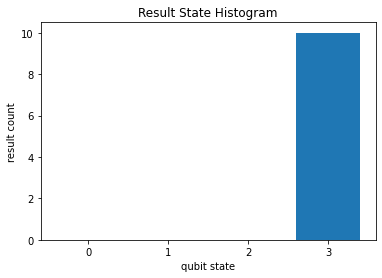

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())

In [ ]:
result.histogram(key="a,b")

Counter({3: 10})

###### *Superdense Coding (Bell State): 2 Qubits - CNOT Gate (CX) [and Controlled-U Gate]: Create Bell state (Superposition across Multiple Qubits)*

> CNOT, acting on a two-qubit term $\left|q_{1} q_{2}\right\rangle$, applies the $\mathbf{N O T}(\mathbf{X})$ gate to the second qubit only if the first qubit is in state $|1\rangle$. The first qubit controls the action on the second.

> 0 im Output wenn zwei Inputs gleich sind. 1 im Output wenn die Inputs unterschiedlich sind.

*Entanglement*

In [ ]:
cirq.unitary(cirq.CNOT)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

The [Controlled NOT gate](https://en.m.wikipedia.org/wiki/Controlled_NOT_gate) (also C-NOT or CNOT, controlled Pauli-X) is a quantum logic gate that is an essential component in the construction of a gate-based quantum computer. **It can be used to entangle and disentangle Bell states**. Any quantum circuit can be simulated to an arbitrary degree of accuracy using a combination of CNOT gates and single qubit rotations.

>$
\begin{array}{|c|c|c|c|}
\hline {\text { Before }} & {\text { Before }}& {\text { After }}& {\text { After }} \\
\hline \text { Control } & \text { Target } & \text { Control } & \text { Target } \\
\hline|0\rangle & |0\rangle & |0\rangle & |0\rangle \\
\hline|0\rangle & |1\rangle & |0\rangle & |1\rangle \\
\hline|1\rangle & |0\rangle & |1\rangle & |1\rangle \\
\hline|1\rangle & |1\rangle & |1\rangle & |0\rangle \\
\hline
\end{array}
$

A common application of the $\mathrm{C}_{\text {NOT }}$ gate is to maximally entangle two qubits into the $\left|\Phi^{+}\right\rangle$ Bell state; this forms part of the setup of the superdense coding, quantum teleportation, and entangled quantum cryptography algorithms.

CNOT or controlled Pauli-X.

* **Verschrankt zwei Qubits und invertiert das Ziel-Qubit**, wenn das Kontroll-Qubit 1 ist:

> $|00\rangle \rightarrow|00\rangle$

> $|01\rangle \rightarrow|01\rangle$

> $|10\rangle \rightarrow|11\rangle$

> $|11\rangle \rightarrow|10\rangle$

Matrix-Darstellung:

> $\left(\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right)$

The CNOT (or controlled Pauli- $X$ ) gate can be described as the gate that maps the basis states $|a, b\rangle \mapsto|a, a \oplus b\rangle$, where $\oplus$ is XOR.

**Controlled-U Gate**

More generally if $U$ is a gate that operates on single qubits with matrix representation

>$
U=\left[\begin{array}{ll}
u_{00} & u_{01} \\
u_{10} & u_{11}
\end{array}\right]
$

then the controlled-U gate is a gate that operates on two qubits in such a way that the first qubit serves as a control.

It maps the basis states as follows:

$|00\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**.
Sometimes this is shortened to just CX, CY and CZ.

**Code example: Create Bell state**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───H───M───
          │       │
b: ───────X───────M───


*More about creating Bell state from superposition & entanglement: [Demystifying Superdense Coding](https://medium.com/qiskit/demystifying-superdense-coding-41d46401910e)*

In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=1110010101010110111100101011011111100100110101101101110000110001010000101011100100111110000001011001, 1100000001000011000100101011011000110101101001100111111001101000001100010010100010100100001010100000


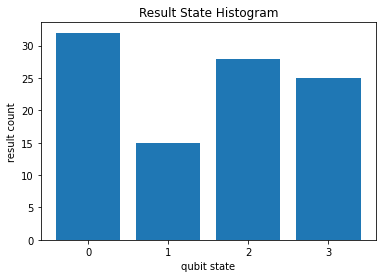

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({0: 32, 1: 15, 2: 28, 3: 25})

**Make Bell state operations reverse**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

*Operators are unitary*

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.CNOT(a,b),
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───@───H───M───
          │   │       │
b: ───────X───X───────M───


In [ ]:
# Run Simulations & Measurements
# Outcome should be same as step 1: 0, back to as if nothing happened
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [ ]:
result.histogram(key="a,b")

Counter({0: 100})

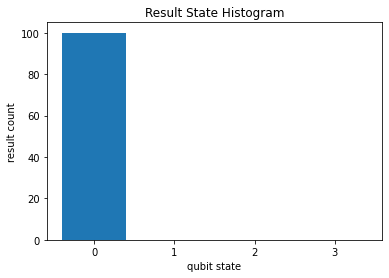

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

**Multiple Qubits: Product State vs Entangled State (Bell State)**

* As the name implies, entanglement is a property of quantum mechanical systems that only reveals itself when states begin to interact.

* When two qubits are brought together and we'd like to consider the new joint system that they form, we use a fancy new symbol: ⊗. This is called the tensor product, but really it just represents a combination of two or more quantum states.

**Product States**
* States which can be described as a tensor product of two independent superpositions are known as product states.

A joint state of two initialized qubits can be represented as

>$|0\rangle\otimes|0\rangle$

If we apply the Hadamard gate to the first qubit, it transforms but leaves the other qubit unaffected, since the Hadamard is a single qubit gate:

>$
\mathbf{H}|0\rangle \otimes|0\rangle=\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right) \otimes|0\rangle
$

**Exkurs**: wenn ein Gate bei einem Single Qubit mehr Probability als 0,5 hat, kann man das so schreiben (Achtung: Koeffizient ist Wurzel aus Probability),

> $\mathbf{H}|0\rangle\ = (0,9) * |0\rangle + (0,1) * |1\rangle$

* 0,71 ist für 50% Probability (man muss es squared nehmen!)

* 0,9 ist für 0,99 Probability

* 1 ist für 100% Probability für State 0, der andere Term hat dann 0 % und verschwindet. Es bleibt dann nur noch $|0\rangle$

The tensor product is distributive, which in this case means it acts much like multiplication:

>$
\mathbf{H}|0\rangle \otimes|0\rangle=\frac{1}{\sqrt{2}}|0\rangle \otimes|0\rangle+\frac{1}{\sqrt{2}}|1\rangle \otimes|0\rangle \text {. }
$

Using a series of single-qubit gates, we can transform two initialized qubits into two new arbitrary states:

>$
\begin{array}{l}
\text { Qubit 1: } \quad|0\rangle \rightarrow a_{1}|0\rangle+a_{2}|1\rangle \\
\text { Qubit 2: } \quad|0\rangle \rightarrow b_{1}|0\rangle+b_{2}|1\rangle .
\end{array}
$

The resulting 2 -qubit state is usually written as their product using a fancy new symbol:

>$|0\rangle
\otimes|0\rangle \rightarrow\left(a_{1}|0\rangle+a_{2}|1\rangle\right) \otimes\left(b_{1}|0\rangle+b_{2}|1\rangle\right)
$

Another way to express this would be:

> $a_{1} b_{1}|0\rangle \otimes|0\rangle+a_{1} b_{2}|0\rangle \otimes|1\rangle+a_{2} b_{1}|1\rangle \otimes|0\rangle+a_{2} b_{2}|1\rangle \otimes|1\rangle$

**Bell state (Entangled State)**

* To simplify notations, we sometimes omit the $\otimes$ sign and only **write $|00\rangle$ to denote that both the first qubit and the second qubit are in the $|0\rangle$ state**.

* There are four total 2 -qubit combinations, including $|01\rangle=|0\rangle \otimes|1\rangle$, and so on.

With this simplified notation, a general 2 -qubit joint state can be written as an arbitrary linear combination of four 2 -qubit computational states:

>$
a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle
$

This is quite a bit different than the joint state found by preparing both qubits into independent single-qubit superpositions:

>$
\left(a_{1}|0\rangle+a_{2}|1\rangle\right) \otimes\left(b_{1}|0\rangle+b_{2}|1\rangle\right)=a_{1} b_{1}|00\rangle+a_{1} b_{2}|01\rangle+a_{2} b_{1}|10\rangle+
$

* simple and well-known joint state called the Bell state:

> $\frac{1}{\sqrt{2}}|00\rangle+\frac{1}{\sqrt{2}}|11\rangle$

* you can NOT write the Bell state as a product of two single-qubit states

Entangled States
* The Bell state is the prototypical example of an entangled state.
* Two qubits which are entangled can never be separated into two independent states: their coefficients are a tangled-up mess:

> $|\psi\rangle_{\text {Bell }}=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_036.jpg)

* We can contrast this with n-qubit product states, where the state of every qubit is known and they have only 2n independent amplitudes. This is a vast difference!

* This means that most of the n-qubit space is populated by entangled states, ones that can't be written as a simple product of its components.

* We will see in a bit that with only two parameterized gates, we could transform an initialized qubit into any possible single qubit state on the surface of the Bloch sphere:

> $\mathcal{R}_{\phi} \mathcal{R}_{\theta}|0\rangle=a_{1}|0\rangle+a_{2}|1\rangle$

**How to get to an Entanglement Circuit?**

To start, we can prepare two qubits in the $|0\rangle$ state. At this point there's no connection between them, and we can write them in the product state $|\psi\rangle=$
$|0\rangle \otimes|0\rangle$ which is the same as $|00\rangle$.

Comparing $|\psi\rangle$ to the Bell state, we see that at some point along the way, we'll need to get into a superposition. Using the set of gates we currently have at our disposal $(\mathbf{X}, \mathbf{Z}, \mathbf{H})$, there doesn't appear to be a single gate that we can apply to take us from $|\psi\rangle$ to $\left|\psi_{\text {Bell }}\right\rangle .$ Naively, it seems that we have two tasks ahead of
us:

1. Getting $|\psi\rangle$ into a superposition.

2. Adjusting the individual kets so that we're in the Bell state.

At the moment we have the Hadamard, which can move one of our qubits into superposition. For argument's sake, let's apply it to the first qubit:
$$
\begin{aligned}
\mathbf{H}_{1}|\psi\rangle &=(\mathbf{H}|0\rangle) \otimes|0\rangle \\
&=\frac{|0\rangle+|1\rangle}{\sqrt{2}} \otimes|0\rangle \\
&=\frac{|00\rangle+|10\rangle}{\sqrt{2}} .
\end{aligned}
$$

Now we need to find gates that allow us to coordinate action on two qubits.

While single qubit gates like $\mathbf{X}$ and $\mathbf{H}$ can't get us all the way to the Bell state, we'd still like to keep our gate set as simple as possible. In this spirit, let's stick with the Hadamard gate to perform our superposition, and look for a multiqubit gate $\mathrm{M}$ that can get us the rest of the way:

> $
\frac{|00\rangle+|10\rangle}{\sqrt{2}} \stackrel{\mathrm{M}}{\longrightarrow} \frac{|00\rangle+|11\rangle}{\sqrt{2}}
$

**Die erste Spalte mit 0 und 1 (links jeweils) zeigt, dass dieses Qubit in einer Superposition ist mit 50% Probability von 0 und 1, während das zweite Qubit (jeweils rechts) 0 und 0 ist, weil es sich nich im initialen Zustand befindet, der immer 100% 0 ist!**

Following behaviors would make for a suitable multi-qubit gate M:

* Flip qubit 2 whenever qubit 1 and qubit 2 are opposite

* Flip qubit 2 if qubit 1 is in state ∣1⟩

* we need to keep the core principle of quantum mechanics — reversibility!

Consider the action of $\mathbf{M}$ on the two-qubit basis states: if a $|11\rangle$ term appears in the quantum state after we apply $\mathrm{M}$, we can't tell if it's because we started with a $|11\rangle$ term, or if it's because we started with a $|10\rangle$ term.

The preferred entangling gate, called CNOT (controlled NOT), gets us into the Bell state while respecting the reversibility condition:
$$
\begin{array}{l}
|00\rangle \stackrel{\text { CNOT }}{\longrightarrow}|00\rangle \\
|01\rangle \stackrel{\text { CNOT }}{\longrightarrow}|01\rangle \\
|10\rangle \stackrel{\text { CNOT }}{\longrightarrow}|11\rangle \\
|11\rangle \stackrel{\text { CNOT }}{\longrightarrow}|10\rangle .
\end{array}
$$

> CNOT, acting on a two-qubit term $\left|q_{1} q_{2}\right\rangle$, applies the $\mathbf{N O T}(\mathbf{X})$ gate to the second qubit only if the first qubit is in state $|1\rangle$. The first qubit controls the action on the second.

This enables us to prepare the entangled Bell state and is a subroutine

> $\frac{|10\rangle+|00\rangle}{\sqrt{2}} \stackrel{\text { CNOT }}{\longrightarrow} \frac{|11\rangle+|00\rangle}{\sqrt{2}}$

**For Quantum Cryptography**

* But Alice and Bob aren't stuck with the computational basis: **the Bell state is entangled no matter what basis we use to analyze it**. This is particularly easy to see by switching to the Hadamard basis.

* As we showed before, the Bell state has the same form in the computational basis as it does in the Hadamard basis:

> $\left|\psi_{\text {Bell }}\right\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}=\frac{|--\rangle+|++\rangle}{\sqrt{2}}$

* So, Alice and Bob are free to use either basis to coordinate their bits.

*If Alice measures her qubit using the Hadamard basis, what are the possibilities for Bob's measurement in the computational basis?*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_037.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_038.jpg)

**CNOT Gate and Entanglement**

Quantum states $|\psi\rangle$ aren't always one of the computational basis states.

In general, they can also be (ignoring normalization factors)

>$
|+\rangle=|0\rangle+|1\rangle
$

or

>$
|-\rangle=|0\rangle-|1\rangle \text {. }
$

*What does the CNOT gate do with these input states?*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_039.jpg)

###### *Superdense Coding (Bell State): 2 Qubits - H, CNOT & X-Gate: Superdense Coding for Quantum Communication*

Superdense Coding is a method to transmit two classical bits of information by sending only one qubit of information. This is accomplished by pre-sharing an entangled state between the sender and the receiver. This entangled state allows the receiver of the one qubit of information to decode the two classical bits that were originally encoded by the sender.

*Complete example from Cirq*

In [ ]:
def make_superdense_circuit():
    circuit = cirq.Circuit()
    q0, q1, q2, q3, q4 = cirq.LineQubit.range(5)

    # Randomly sets q0 and q1 to either 0 or 1
    circuit.append([cirq.H(q0), cirq.H(q1)])
    circuit.append(cirq.measure(q0, q1, key="input "))

    # Creates Bell State to be shared on q2 and q4
    circuit.append([cirq.H(q2), cirq.CNOT(q2, q4)])
    # Step 1 of encoding (controlled NOT gate on q1 / q2)
    circuit.append(cirq.CNOT(q1, q2))
    # Step 2 of encoding (controlled Z gate on q0 / q2)
    circuit.append(cirq.CZ(q0, q2))
    # Sends encoded information to receiver
    circuit.append(cirq.SWAP(q2, q3))
    # Step 1 of decoding (controlled NOT gate on q3 and q4)
    circuit.append(cirq.CNOT(q3, q4))
    # Step 2 of decoding (Hadamard gate on q3)
    circuit.append(cirq.H(q3))
    # Measurement by receiver to decode bits
    circuit.append(cirq.measure(q3, q4, key="output"))

    return circuit


def main():
    circuit = make_superdense_circuit()
    print("Circuit:")
    print(circuit)

    sim = cirq.Simulator()
    results = sim.run(circuit, repetitions=20)
    print("\nResults:")
    print(results)


if __name__ == '__main__':
    main()

NameError: ignored

*Step by Step Walkthrough*

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

https://medium.com/qiskit/demystifying-superdense-coding-41d46401910e

*Now adding Pauli X gate to alter outcome*

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.X(a), # Pauli X gate -> changes outcome from 00 to 01
     cirq.CNOT(a,b),
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───X───@───H───M───
          │       │       │
b: ───────X───────X───────M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111


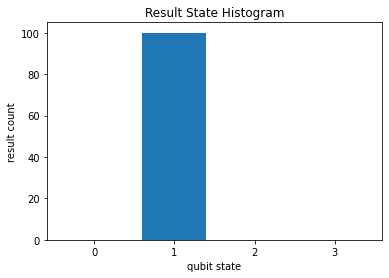

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

##### <font color="blue">*Quantum Fourier Transform*

Momentum Space and Position Space with Quantum Fourier Transform

https://youtu.be/W8QZ-yxebFA

> **Quantum Fourier Transform is the change from one basis (computational) to another (Fourier basis)**

* Quantum Fourier Transform is the inverse Discrete Fourier Transform)


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

**General formula**

* Remember: <font color="blue">$e^{2\pi i}$ = 1</font> (identity operation), and see why $e^{\pi i}$ = -1 in [this video](https://youtu.be/-AyE1Wpgo3Q)


* In QFT we change the <font color="blue">$\theta$ = phase in $e^{2\pi i \theta}$</font> = Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩

* The phase $\theta$ is expressed as: <font color="blue">$\theta$ = $\frac{x_n}{2^{k_n}}$</font> with:

  * <font color="blue">$x_n$ = 0 or 1</font> state

  * <font color="blue">$k_n$</font> number of Qubits

* This is expressed in a so-called "controlled-R quantum gate" that **applies a relative phase change to |1>**

* The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i \frac{x_n}{ 2^{k_n}}}\end{array}\right)$</font>

*Quantum Fourier Transform with 3 Qubits: Introduction*

**Computational Basis States:** <font color="blue">$\tilde{x_1}$ = 0 or 1</font>, <font color="blue">$\tilde{x_2}$ = 0 or 1</font>, <font color="blue">$\tilde{x_3}$ = 0 or 1</font>. Number of Qubits: <font color="blue">$k_1$ = 1, $k_2$ = 2, $k_3$ = 3</font>

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{k_1}}+\frac{x_{2}}{2^{k_2}}+\frac{x_{3}}{2^{k_3}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^1}+\frac{x_{2}}{2^2}+\frac{x_{3}}{2^3}\right)}|1\rangle\right)$  = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$

* If only $\tilde{x_1}$ is activated, then it is a 180° Z-rotation of $\pi$ radians = -1

* If only $\tilde{x_2}$ is activated, then it is a 90° S-rotation of $\frac{\pi}{2}$ radians = i

* If only $\tilde{x_3}$ is activated, then it is a 45° T-rotation of $\frac{\pi}{4}$ radians = between 1 and i

> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{k_1}}+\frac{x_3}{2^{k_2}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}+\frac{x_3}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2}+\frac{x_3}{4}\right)}|1\rangle\right)$

* If only $\tilde{x_2}$ is activated, then it is a 180° Z-rotation of $\pi$ radians = -1

* If only $\tilde{x_3}$ is activated, then it is a 90° S-rotation of $\frac{\pi}{2}$ radians = i

* If both $\tilde{x_2}$ and $\tilde{x_3}$ are activated, then it is a 180° + 90° = 170° rotation of $\pi + \frac{\pi}{2}$ radians = -i

> <font color="blue">$\tilde{x_3}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^{k_1}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_3}|1\rangle\right)$

* If $\tilde{x_3}$ is activated, then it is a 180° Z-rotation of $\pi$ radians = -1


**Circuit Construction**

*Compare the equations above with the circuit activations below (how a circuits computes the results). For example for the first qubit the operator / gate $S$ = 90° rotation is only activated if the second qubit $x_2$ is in state 1. Here it is activated because $x_2$ = 1:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0812.png)

*Here including the 8x8 matrix form for the complete operator:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0801.png)

*Quantum Fourier Transform with 1 Qubit*

**Computational Basis States:** <font color="blue">$\tilde{x_1}$ = 0 or 1</font>. Number of Qubits: <font color="blue">$k_1$ = 1</font>


*Linear transformation of a qubit in the computational basis 0 and 1 each separately to the Fourier basis:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0813.png)

**Computational Basis in $|0\rangle$**

> <font color="blue">For $x_1$ = 0 $\Rightarrow$</font> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{k_1}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$  $\Rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i} 0}$  = $\mathrm{e}^{0}$ = 1 (no rotation)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0810.png)

**Computational Basis in $|1\rangle$**

> <font color="blue">For $x_1$ = 1 $\Rightarrow$</font> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{k_1}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ $\Rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $e^{\pi i 1} =$ <font color="blue">$-1$</font> (180° Z-rotation)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0811.png)

*Quantum Fourier Transform with 1 Qubit is a Hadamard transform!*

**One qubit QFT matrix**: $\frac{1}{\sqrt{2}}\left(\begin{array}{ll}1 & 1 \\ 1 & \mathrm{e}^{\pi i}\end{array}\right)$, where $\mathrm{e}^{\pi \mathrm{i}}$ = -1. So it is: <font color="blue"> QFT für x=1 = $\frac{1}{\sqrt{2}}\left(\begin{array}{ll}1 & 1 \\ 1 & -1\end{array}\right)$

**Compare with Hadamard transform matrix:**

In quantum computing, the Hadamard gate is a one-qubit rotation, mapping the qubitbasis states $|0\rangle$ and $|1\rangle$ to two **superposition** states with **equal weight of the computational basis** states $|0\rangle$ and $|1\rangle$. Usually the phases are chosen so that

>$
H=\frac{|0\rangle+|1\rangle}{\sqrt{2}}\langle 0|+\frac{|0\rangle-|1\rangle}{\sqrt{2}}\langle 1|
$

in Dirac notation. This corresponds to the transformation matrix

> <font color="blue">$
H_{1}=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)
$

in the $|0\rangle,|1\rangle$ basis, also known as the computational basis. The states $\frac{|0\rangle+|1\rangle}{\sqrt{2}}$ and $\frac{|0\rangle-|1\rangle}{\sqrt{2}}$ are known as $|+\rangle$ and $|-\rangle$ respectively, and together constitute the polar basis in quantum computing.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_073.jpg)


**Why Hadamard transform is exactly a 1 qubit Quantum Fourier Transform:** (see result of + for 0 state and - for 1 state) - Matrix-Vector-Multiplication (Single Qubit)

> <font color="blue">$H |0\rangle$</font> $ = \frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right] =\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ 1\end{array}\right]$ <font color="blue">$ \,\,= |+\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

> <font color="blue">$H |1\rangle$</font>$ = \frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}0 \\ 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ -1\end{array}\right]$ <font color="blue">$ = |-\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

$|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ weil <font color="gray">wegen $|0\rangle=\left[\begin{array}{l}1 \\ 0\end{array}\right]$ und $|1\rangle=\left[\begin{array}{l}0 \\ 1\end{array}\right]$ daher:</font> $\frac{1}{\sqrt{2}}\left[\begin{array}{ll}1 + 0 \\ 0 + 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ 1\end{array}\right]$

$|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$ weil: $\frac{1}{\sqrt{2}}\left[\begin{array}{ll}1 - 0 \\ 0 - 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ -1\end{array}\right]$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_045.png)

2 im denominator verschwindet hier. 2^n für n=1 qubit. mit 2 oben und unten verschwinden beide.

*Quantum Fourier Transform with 3 Qubits for $|001\rangle$*

**Computational Basis in $|001\rangle$**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0804.png)

**Fourier Basis for $|001\rangle$**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0805.png)

**Computational States:** <font color="blue">$\tilde{x_1}$ = 0</font>, <font color="blue">$\tilde{x_2}$ = 0</font>, <font color="blue">$\tilde{x_3}$ = 1</font>. Number of Qubits: <font color="blue">$k_1$ = 1 qubit, $k_2$ = 2 qubits, $k_3$ = 3 qubits</font>

> <font color="blue">Qubit 1 = $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{k_1}}+\frac{x_{2}}{2^{k_2}}+\frac{x_{3}}{2^{k_3}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{0}{4}+\frac{1}{8}\right)}|1\rangle\right)$  = <font color="blue">$\frac{\pi i}{4}$</font> (45° T-rotation)

> <font color="blue">Qubit 2 = $\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{2}}{2^{k_1}}+\frac{x_{3}}{2^{k_2}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = <font color="blue">$\frac{\pi i}{2}$</font> (90° S-rotation)

> <font color="blue">Qubit 3 = $\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{3}}{2^{k_1}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i} \frac{1}{2}}|1\rangle\right)$ = $e^{\pi i 1} =$ <font color="blue">$-1$</font> (180° Z-rotation)

**Circuit Construction**

*Compare the equations above with the circuit activations below (how a circuits computes the results). For example for the first qubit the operator / gate $S$ = 90° rotation is only activated if the second qubit $x_2$ is in state 1. Here it is not activated because $x_2$ = 0:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0812.png)

*Quantum Fourier Transform with 3 Qubits for $|111\rangle$*

**Computational Basis in $|111\rangle$**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0802.png)

**Fourier Basis for $|111\rangle$**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0803.png)

**Computational States:** <font color="blue">$\tilde{x_1}$ = 1</font>, <font color="blue">$\tilde{x_2}$ = 1</font>, <font color="blue">$\tilde{x_3}$ = 1</font>. Number of Qubits: <font color="blue">$k_1$ = 1 qubit, $k_2$ = 2 qubits, $k_3$ = 3 qubits</font>

> <font color="blue">Qubit 1 = $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{k_1}}+\frac{x_{2}}{2^{k_2}}+\frac{x_{3}}{2^{k_3}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}+\frac{1}{8}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi i 0.875} = \mathrm{e}^{\pi i 1.75}$ (180° Z-rotation + 90° S-rotation + 45° T-rotation)

> <font color="blue">Qubit 2 = $\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{2}}{2^{k_1}}+\frac{x_{3}}{2^{k_2}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $e^{\pi i 1.5} =$ <font color="blue">$-i$</font> (180° Z-rotation + 90° S-rotation)

> <font color="blue">Qubit 3 = $\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{3}}{2^{k_1}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i} \frac{1}{2}}|1\rangle\right)$ = $e^{\pi i 1} =$ <font color="blue">$-1$</font> (180° Z-rotation)

**Circuit Construction**

*Compare the equations above with the circuit activations below (how a circuits computes the results). For example for the first qubit the operator / gate $S$ = 90° rotation is only activated if the second qubit $x_2$ is in state 1. Here it is activated because $x_2$ = 1:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0812.png)

*Cirq Code for Quantum Fourier Transform*

*Compare the code above with the circuit activations below (how a circuits computes the results):*

* $H$ gate = bring qubit in superposition.

  * *For $x=0$, no further rotation*

  * *For $x=1$, then appy additional *$Z$ gate = 180° rotation = $\pi$**

* *$S$ gate = 90° rotation = $\frac{\pi}{2}$*

* *$T$ gate = 45° rotation = $\frac{\pi}{4}$*

$C R_{j}=C Z^{1 / 2^{j-1}}$

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse)

* $S$ entspricht $\frac{\pi}{2}$, also wenn qubit 1 = 1, dann bei qubit 0 das $S$ transform anwenden (0,5)

  * S: The square root of Z gate, equivalent to cirq.Z ** 0.5

  * See: [Cirq Gates](https://quantumai.google/cirq/gates)

* $T$ entspricht $\frac{\pi}{4}$

In [ ]:
!pip install cirq -q
import cirq

def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)

    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:

    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)

    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Do the inverse QFT as subroutine in quantum phase estimation
    #        yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

# Use inverse QFT as subroutine in quantum phase estimation
# phase_estimator.append(make_qft_inverse(qubits[::-1]))

    # Iterating through until "while len(qreg) = 0", then processes stops

"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(17)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0815.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0812.png)

*Inverse Quantum Fourier Transform ('QFT Dagger' - Dagger is a complex conjugate operation!)*

Reminder of QFT:

* $QFT\,\,|x\rangle=|\tilde{x}\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i}{N} x y} |y\rangle$

**Remember: Dagger is a complex conjugate operation!**

QFT inverse (see -2 turning i in -i which is a complex conjugate operation):

* $QFT^{\dagger}|\tilde{x}\rangle=|x\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i}{N} x y} |y\rangle$


The operator is then (
We have already seen that the Hadamard gate is self-inverse, and the same is clearly true for the SWAP gate; the inverse of the rotations gate $R_k$ is given by):

> The matrix form of inverse QFT operator is: <font color="blue">${R^{\dagger}}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{-2 \pi i / 2^{k}}\end{array}\right)$</font> and compare with QFT operator:  <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_9.pdf

##### <font color="blue">*Shor's Algorithm*

<a target="_blank" href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/shor.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Shor’s algorithm for factoring, which is not NP-complete, has been run on real quantum computers. The largest number it has been used to factor (that I could find a reference to) is 56153: New largest number factored on a quantum device is 56,153. And that was on 4 qubits (https://phys.org/news/2014-11-largest-factored-quantum-device.html).

*(RSA) Encryption*

Video [Breaking RSA](https://youtu.be/-ShwJqAalOk)

Public key cryptography
* https is developed on top of this
* RSA: revest shavor edelmann, based on prime numbers, older more established algoithm
* Elliptic curve cryptography
* Modular arithmetic
* Feistel Cypher (block cypher): https://de.m.wikipedia.org/wiki/Feistelchiffre
* Diffie Hellmann key exchange
* It's an exponential problem on classical computers that quantum computers can solve in polynomial time

Extended Euclidean algorithm

$\begin{aligned} & (e, n)(d) \\ & n=p \cdot q \\ & \Phi(n)=(p-1) \cdot(q-1) \\ & e \cdot d \equiv 1 \bmod (\Phi(n))\end{aligned}$

Fermat‘s factorization algorithm: if p and q are close to each other, this gives you a solution extremely quickly

$\begin{aligned} & N=a^2-b^2=(a+b) \cdot(a-b) \\ & b^2=a^2-N \\ & a=[\sqrt{N}]\end{aligned}$

[Prime Numbers and RS Encryption Algorithm](https://youtu.be/JD72Ry60eP4)



(2019) How to factor 2048 bit RSA integers in 8 hours using 20 million noisy qubits

https://arxiv.org/abs/1905.09749

Yes, Craig Gidney has made significant contributions to the study of the discrete logarithm problem. In particular, he has developed quantum algorithms for solving the DLP that are significantly faster than classical algorithms.

In 2010, Gidney published a paper in which he showed that the DLP could be solved using a quantum algorithm that is exponentially faster than the best classical algorithm. This algorithm is based on the use of modular forms, which are a type of mathematical function that has certain properties that make them well-suited for quantum computation.

Gidney's work on the DLP has had a major impact on the field of cryptography. It has shown that the DLP is not as secure as previously thought, and it has led to the development of new cryptographic systems that are more resistant to quantum attacks.

In addition to his work on the DLP, Gidney has also made significant contributions to other areas of quantum computing, such as quantum error correction and quantum simulation. He is a leading expert in the field of quantum computing, and his work is helping to pave the way for the development of practical quantum computers.

Here are some of the specific contributions that Craig Gidney has made to the study of the discrete logarithm problem:

* In 2010, he showed that the DLP could be solved using a quantum algorithm that is exponentially faster than the best classical algorithm.
* In 2012, he developed a quantum algorithm for solving the DLP in the presence of noise.
* In 2019, he co-authored a paper that showed how to use the DLP to factor RSA integers.

Gidney's work on the DLP has had a major impact on the field of cryptography. It has shown that the DLP is not as secure as previously thought, and it has led to the development of new cryptographic systems that are more resistant to quantum attacks.

I hope this helps! Let me know if you have other questions.

https://quantumai.google/cirq/experiments/shor

Der Shor-Algorithmus lässt sich am besten für die Primfaktorzerlegung erklären. Damit Quantencomputer diese Aufgabe meistern können, muss man das Problem allerdings etwas umformulieren. Denn der Quantenalgorithmus stützt sich auf eine Anleitung zum Faktorisieren von Zahlen, die aus den 1970er Jahren stammt. Damals fand man heraus, dass nur vier Schritte nötig sind, um die Primfaktoren p und q einer Zahl N = p·q zu berechnen.

1. Wähle eine zufällige Zahl a < N.

2. Finde die Periodenlänge r von a Modulo N.

3. Stelle sicher, dass r eine gerade Zahl ist und dass (a^(r/2) + 1) nicht durch N teilbar ist.

4. Dann ist p der größte gemeinsame Teiler von (a^(r/2) − 1) und N. Der andere Primteiler q ist entsprechend der größte gemeinsame Teiler von (a^(r/2) + 1) und N.

https://www.spektrum.de/kolumne/shor-algorithmus-wie-quantencomputer-verschluesselungen-knacken/2133048


**Classical Calculation**

* <font color="blue">Factoring is equivalent to finding a nontrivial squareroot of 1 mod N.

* all we need to do is find this nontrivial squareroot of unity, and we can factor whatever number we need. As promised, we can do this with period finding, specifically by computing the order of a random integer

* The order of some integer x modulo N is the smallest integer r such that $x^r$ = 1 mod N

*Modular Arithmetic*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_088.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_089.jpg)

**<font color="blue">Step 1: Pick coprime of N**

*Drei mögliche Verfahren zur Berechnung des ggT :*

Erstes Verfahren: Euklidischer Algorithmus
* 15	:	13	  = 	1	  Rest  	2.	  Also ist ggT (15,13)= ggT (13,2)
* 13	:	2	  = 	6	  Rest  	1.	  Also ist ggT (13,2)= ggT (2,1)
* 2	:	1	  = 	2	  Rest  	0.	  Also ist ggT (2,1)= ggT (1,0)
* Ergebnis: Der ggT von 15 und 13 ist 1.

Zweites Verfahren: Vergleichen der Teilermengen .
* Die Teilermenge von 15 lautet: {1,3,5,15}.
* Die Teilermenge von 13 lautet: {1,13}.
* Die größte in beiden Teilermengen vorkommende Zahl ist 1. Also ist 1 der ggT von 15 und 13.

Dritte Möglichkeit: Vergleichen der Primfaktorzerlegung
* Die Primfaktorzerlegung von 15 lautet: 15= 3·5.
* Die Primfaktorzerlegung von 13 lautet: 13= 13.
* Die gemeinsamen Primfaktoren sind: 1.
* Also ist 1 der ggT.

*Modulo (kurz: mod) berechnet den Rest einer Division zweier Zahlen. In Mathematischen Formeln wird modulo mit mod abgekürzt, beispielsweise: 23 mod 8 = 7. Bei dieser Rechnung kommt 7 heraus, weil die 8 zweimal in die 23 passt und dann 7 übrig bleiben.*

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=5 * 3

# Pick coprime (!) number to N to factorize N into primes
a=13

# Code Example to understand periodicity in the context of factoring prime numbers:

import math
# Compute greated common divisor between a and N
math.gcd(a, N)

**<font color="blue">Step 2: Find the period of $a^r$ $\equiv$ 1 $(modN)$:**

* <font color="blue">the order of x is just the period of the function f(i) = $x^i$ mod N.

* <font color="blue">In quantum computing you use QFT in order to determine the period !!

In [ ]:
import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

<font color="red">**Beispiel: Choose any number $a$ and takes its multiple $r$ so many times, until the rest in modulo is 1, (except r=0)**</font>

> $13^0$ (mod 15) = 1 (mod 15) = 1

> $13^1$ (mod 15) = 13

> $13^2$ (mod 15) = 169 (mod 15) = 4

* <font color="blue">*Erlauterung: Nimm 15 * 11 = 165, bis zur 169 verbleibt ein Rest 4*

> $13^3$ (mod 15) = 2197 (mod 15) = 7

* <font color="blue">*Erlauterung: Nimm 15 * 146 = 2190, bis zur 2197 verbleibt ein Rest 7*

> $13^4$ (mod 15) = 28561 (mod 15) = 1 (<font color="blue"><u>hier started die Periode wieder, that's the r we are looking for!</u>)

> usw..

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

**<font color="blue">Step 3: Bestimme $x \equiv a^{\frac{r}{2}}(\operatorname{mod} N)$**. Mindestens einer der beiden Primfaktoren von N={p,q} is beinhalted in gcd(x+1, N) bzw. gcd(x-1, N)

*In this case with a=13, N=15 and r=4:*

* $x \equiv a^{\frac{r}{2}}(\operatorname{mod} N)$

* $x \equiv 13^{\frac{4}{2}}(\operatorname{mod} 15)$

* x = 169 (mod 15) = 4

  * gcd(x-1, N) = 3 = p

  * gcd(x+1, N) = 5 = q

Achtung: in einem anderen Beispiel: N=11*7 (Primzahlen), a=18, ergibt x=43.

* Davon x-1=42 und x+1=44.
* Das sind naturlich keine Primzahlen,
* Aber deren Faktoren sind: 44 = 2 * 2 * 11 und 42 = 2 * 3 * 7
* das heisst, x-1 und x+1 kann auch die Primzahlen indirekt enthalten!

In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

**Shor's Algorithm**

* When finding order using the period finding algorithm, it is important to use enough qubits. A sensible rule is that you need to use m qubits so that $2^m$ >> $N^2$, where N is the number we are trying to factor, because the order of a random number might be as large as N

* Example: Lets factor N=119. Suppose we pick the number 16 to start with. Wie viele Qubits m sollten wir mindestens nehmen? $N^2$ = $119^2$ =14.161 und $2^m$ muss deutlich grosser sein, also mindestens = $2^{14}$ = 16.384. Wir brauchen also mindestens 14 Qubits, um 119 zu faktorisieren.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_090.jpg)

* Because we know that the order of x will be even and $x^{s/2}$ will be a nontrivial square root with probability at least 1/2, we can be confident that we will be able to factor N in just a few runs of the algorithm. Because the time it takes to find the period grows as a polynomial in the number of bits, and the number of bits grows like 2logN(by the above requirement), we expect the time it takes to factor N to grow as a polynomial in logN.

* Here is the circuit for Shor’s Algorithm. It relies heavily on period finding, and so the circuit looks a lot like the circuit for period finding. The key difference is that we are finding the period of f(i) = xi, and the number of bits we need to input is very large.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_091.jpg)

**How does it work in the quantum circuit?**

That's the function in $U$: given an $x$, the $U$ will compute:

> $f_{a, N}(x) \equiv a^{x}(\bmod N)$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_092.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_093.png)

**<font color="blue">Shor's Algorithm: Step by Step**

**Beispiel: a=13 und N=15, was macht Shor's Algorithm genau im Circuit an der Stelle $U_{f_{(a,N)}}$ und $QFT^{\dagger}$?**

ps: a muss ein Coprime von N sein. Wenn es kein Coprime ist, muessen wir nicht durch Shor's Algorithm gehen, weil a dann einen Faktor mit N teilt :) Aber es ist very unlikely to find a coprime of a large number N.

**First let's divide it into steps. 1-5:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_095.png)

**Step 1**: Get Qubits in state 0 and apply Hadamard Superposition

We start with 4 Qubits all in zeros, mit den Registers x und w, und jedes 4 Mal Tensorproduct multipliziert, weil wir 4 Qubits haben:

> $|0\rangle_{x}^{\otimes 4}$ $|0\rangle_{w}^{\otimes 4}$

All Hamadard Gates are applied to top 4 Qubits (x register), and right part (w register) gets nothing applied to it:

> $[H^{\otimes 4}|0\rangle] \,\, |0\rangle^{\otimes^{4}}$

> = $\frac{1}{4}[|0\rangle+|1\rangle+|2\rangle+\cdots+|15\rangle]$ $|0\rangle$

* Reminder 1: Multiplikation mit $\frac{1}{4}$, weil 4 Qubits in Hadamard-Superposition

* Reminder 2: this is the 4 bit representation of the decimal number, so for example 15 in binary = 1111. Daher kann man auch die 4 angeben als Erinnerung der Bit representation:

> = $\frac{1}{4}[|0\rangle_4+|1\rangle_4+|2\rangle_4+\cdots+|15\rangle_4]$ $|0\rangle_4$


**Step 2**: Compute $U$ with $f_{a, N}(x) \equiv a^{x}(\bmod N)$ - Was passiert genau in der Box mit $U_{f_{(a,N)}}$?

**Given an $x$, the $U$ will compute: <font color="red">$f_{a, N}(x) \equiv a^{x}(\bmod N)$</font>**

Schauen wir nochmal im vorherigen Schritt und markieren eine Komponente:

> = $\frac{1}{4}[$ <font color="red">$|0\rangle_4$</font> $+|1\rangle_4+|2\rangle_4+\cdots+|15\rangle_4]$ $\,$ $|0\rangle_4$

<font color="red">$U_{f_{(a,N)}}$</font> macht dann folgendes:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\, \left|  0 \bigoplus 13^{0}(\bmod 15)\right\rangle_{4}$</font> + $|1\rangle_{4}\left|0 \bigoplus 13^{1}(\bmod 15)\right\rangle_{4}$ + $|2\rangle_{4}\left|0 \bigoplus 13^{2}(\bmod 15)\right\rangle_{4}$ + $|3\rangle_{4}\left|0 \bigoplus 13^{3}(\bmod 15)\right\rangle_{4}$ etc..]

Remember: $\bigoplus$ means "addition modular 2" bzw. "XOR". Anything XORs with 0, is thing itself: 0 $\bigoplus$ Z = Z. damit ergibt sich folgende Rechnung:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\, \left|   13^{0}(\bmod 15)\right\rangle_{4}$</font> + $|1\rangle_{4}\left| 13^{1}(\bmod 15)\right\rangle_{4}$ + $|2\rangle_{4}\left| 13^{2}(\bmod 15)\right\rangle_{4}$ + $|3\rangle_{4}\left| 13^{3}(\bmod 15)\right\rangle_{4}$ etc..]


Aus der Modulo-Rechnung ergeben sich die Restwerte:

* <font color="red">$13^{0}(\bmod 15)$ = 1</font>

* $13^{1}(\bmod 15)$ = 13

* $13^{2}(\bmod 15)$ = 4

* $13^{3}(\bmod 15)$ = 7

* $13^{4}(\bmod 15)$ = 1

* usw..

Since it's periodic, it will repeat, with the x and w register:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\,\left|1\right\rangle_{4}$</font> + $|1\rangle_{4}\left|13\right\rangle_{4}$ + $|2\rangle_{4}\left|4\right\rangle_{4}$ + $|3\rangle_{4}\left|7\right\rangle_{4}$ etc..]

Hier nochmal untereinander mit denselben Restwerten zur besseren Visualisierung:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_094.png)

**Step 3: Measurement of the w register / bottom 4 Qubits**

* the outputs of the w-register measurements are either 1, 13, 4 or 7 (die Restwerte) with equal probability

* let's say we measure 7, what happens to x? X becomes either 3, 7, 11 or 15 (the value in front of the qubit with 7!) with equal probability:

  * after $|\omega\rangle$ = $|7\rangle_4$ , $|x\rangle$ becomes:

  * <font color="blue">$|x\rangle$ $|\omega\rangle$ = $\frac{1}{2}\left[|3\rangle_{4}+|7\rangle_{4}+|11\rangle_{4}+ |15 \rangle_{4}\right]$ $\otimes |7\rangle_4$

  * Normalization has changed: before we had 16 combinations mit 1/4, here we have only 4 combinations with 1/2 (=one over square root of 4)

* **For the next step 4, the Restwert doesn't matter anymore, here: $\otimes |7\rangle_4$. We can ignore it. Because it step 4 we apply the measured $|x\rangle$ in the $QFT^{\dagger}$, and don't care about $|\omega\rangle$ anymore**. And $|x\rangle$ is in this case: $\frac{1}{2}\left[|3\rangle_{4}+|7\rangle_{4}+|11\rangle_{4}+ |15 \rangle_{4}\right]$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_095.png)

*Exkurs: Eine komplexe Zahl $z=a+b i$ und die zu ihr konjugiert komplexe Zahl $\bar{z}=a-b i$*:

![gg](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Komplexe_konjugation.svg/294px-Komplexe_konjugation.svg.png)

Ändert man das Vorzeichen des Imaginärteils $b$ einer komplexen Zahl

> $z=a+b \mathrm{i}$

so erhält man die zu $z$ konjugiert komplexe Zahl

> $\bar{z}=a-b \mathrm{i}$

(manchmal auch $z^{*}$ geschrieben).

Die Konjugation $\mathbb{C} \rightarrow \mathbb{C}, z \mapsto \bar{z}$ ist ein (involutorischer) Körperautomorphismus, da sie mit Addition und Multiplikation verträglich ist, d. h., für alle $y, z \in \mathbb{C}$ gilt

>$
\overline{y+z}=\bar{y}+\bar{z}, \quad \overline{y \cdot z}=\bar{y} \cdot \bar{z}
$

In der Polardarstellung hat die konjugiert komplexe Zahl $\bar{z}$ bei unverändertem Betrag gerade den negativen Winkel von $z$.

* **Man kann die Konjugation in der komplexen Zahlenebene also als die Spiegelung an der reellen Achse interpretieren**.

* <font color="blue">**Insbesondere werden unter der Konjugation genau die reellen Zahlen auf sich selbst abgebildet**.

Das Produkt aus einer komplexen Zahl $z=a+b$ i und ihrer komplex Konjugierten $\bar{z}$ ergibt das Quadrat ihres Betrages:

> $
z \cdot \bar{z}=(a+b i)(a-b i)=a^{2}+b^{2}=|z|^{2}
$

Die komplexen Zahlen bilden damit ein triviales Beispiel einer [C*-Algebra](https://de.m.wikipedia.org/wiki/C*-Algebra).

**Step 4**: Apply inverse $QFT^{\dagger}$ on the $|x\rangle$ register

* $QFT\,\,|x\rangle=|\tilde{x}\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i}{N} x y} |y\rangle$ (Reminder!)

* $QFT^{\dagger}|\tilde{x}\rangle=|x\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i}{N} x y} |y\rangle$ (see -2 turning i in -i which is a **complex conjugate operation**)

* We want to know what QFT dagger is doing to (it is $\frac{1}{\sqrt{16}}$ because we have 4 Qubits)

  * $QFT^{\dagger}|3\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 3 y}{16}}|y\rangle$

  * $QFT^{\dagger}|7\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 7 y}{16}}|y\rangle$

  * $QFT^{\dagger}|11\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 11 y}{16}}|y\rangle$

  * $QFT^{\dagger}|15\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 15 y}{16}}|y\rangle$

Alltogether:

  * $QFT^{\dagger}|x\rangle$ = $\frac{1}{{8}} \sum_{y=0}^{15}$ [ $e^{-i\frac{ 3 \pi}{8}y}$ + $e^{-i\frac{ 7 \pi}{8}y}$ + $e^{-i\frac{ 11 \pi}{8}y}$ + $e^{-i\frac{ 15 \pi}{8}y}$] $|y\rangle$

    * with: $e^{-i\frac{ 3 \pi}{8}y}$ = $\cos \left(\frac{3 \pi}{8} y\right)-i \sin \left(\frac{3 \pi}{8} y\right)$ (und aquivalent fur alle anderen drei)

    * siehe coding rechnung unten was genau passiert hier!

  * <font color="blue">$QFT^{\dagger}|x\rangle$ = $\frac{1}{{8}}$ [ $4|0\rangle_4$ + $4i|4\rangle_4$ $-4|8\rangle_4$ $-4i|12\rangle_4$ ]</font>

  * Remember we had a sum before: $\frac{1}{{8}} \sum_{y=0}^{15}$. And notice how all the other terms now vanished to zero, because you had equal contributions of plus and minus.

    * **This is exactly what it means when people tell you that quantum computers take advantage of interference!! = when a lot of the terms vanish, and the answer only converges to the terms that we care about.**

    * here is the calculation what happened, you see many zeros:

<font color="red">Hier Beispielrechnung fur y=1, um vanishing components zu verstehen</font>. Unten im Code die Ergebnisse, zum Beispiel fur y=1 als Ergebnis = 0, $QFT^{\dagger}|x\rangle$ fur y = 1:

  * $e^{-i\frac{ 3 \pi}{8}y}$ + $e^{-i\frac{ 7 \pi}{8}y}$ + $e^{-i\frac{ 11 \pi}{8}y}$ + $e^{-i\frac{ 15 \pi}{8}y}$ =

  * $e^{-i\frac{ 3 \pi}{8}1}$ + $e^{-i\frac{ 7 \pi}{8}1}$ + $e^{-i\frac{ 11 \pi}{8}1}$ + $e^{-i\frac{ 15 \pi}{8}1}$ =

    * $e^{-i\frac{ 3 \pi}{8}1}$ = <font color="green">0,382683432 - 0,923879533 i</font>

    * $e^{-i\frac{ 7 \pi}{8}1}$ = <font color="orange">-0,923879533 - 0,382683432 i</font>

    * $e^{-i\frac{ 11 \pi}{8}1}$ = <font color="green">-0,382683432 + 0,923879533 i</font>

    * $e^{-i\frac{ 15 \pi}{8}1}$ = <font color="orange">0,923879533 + 0,382683432 i</font>

  * Wie man sieht canceln sich die Terme aus (in gleicher Farbe), weshalb als Ergebnis fur y=1 Null entsteht.

In [ ]:
# Hier Beispiel fur y=1 und den ersten e-Term:
y = 1
pi = np.pi
coeff = np.exp(-1j*3*pi/8 * y)
if abs(coeff) < 1e-10: coeff= 0
print(y, coeff)

In [ ]:
# Hier die komplette Rechnung fur alle y und alle 4 e-Terme:
import numpy as np

pi = np.pi
for y in range (15) :
  coeff = np.exp(-1j*3*pi/8 * y) + \
          np.exp(-1j*7*pi/8 * y) + \
          np.exp(-1j*11*pi/8* y) + \
          np.exp(-1j*15*pi/8* y)
  if abs(coeff) < 1e-10: coeff= 0
  print(y, coeff)

**Step 5: Measure the |x> register**

* You get either 0 or 4 or 8 or 12 with equal probability

* Remaining steps are classical post-processing

* You can already see the periodicity in the result: the difference is always 4

* Analyse what happens for each outcome: **The measurement results peak near $j\frac{N}{r}$ for same integer j $\in Z$. And r is the period that we are looking for. N = $2^n$ Qubits!**

  * if we measure |4>$_4$: $j\frac{16}{r}$ = 4, true if j=1 and r=4

  * there are multiple values that would work, but this is the lowest one

* now check our protocoll for r=4:

  * Is r even? yes!

  * $x \equiv a^{r / 2}(\bmod N)$ = $13^{4 / 2}(\bmod 15)$ = 4

  * x+1 = 5 and x-1 = 3

* This looks good, now check:

  * $\operatorname{gcd}(x+1, N)=\operatorname{gcd}(5,15)=5$

  * $\operatorname{gcd}(x-1, N)=\operatorname{gcd}(3,15)=3$

What do you do if r = 8 ?

* |8>$_4$: $j\frac{16}{r}$ = 8, true if j=1 and r=2 AND j=2 and r=4

* if r=4 we are back in the case before

* if r=2 then $x \equiv a^{r / 2}(\bmod N)$ = $13^{2 / 2}(\bmod 15)$ = 2, which brings x+1 = 3 and x-1 = 1

  * $\operatorname{gcd}(x+1, N)=\operatorname{gcd}(3,15)=3$

  * $\operatorname{gcd}(x-1, N)=\operatorname{gcd}(1,15)=1$

* This leads you to a partial solution. Now you can back out the other solution, with checking 3 divides into 15

* If we get r=0, then we need to do the experiment again

Hier die Faktorisierungsergebnisse fur verschiedene QC-Ausgaben r. Mit r=0 geht es nicht, also kann man in 3 von 4 Faellen faktorisieren (und mit r=8 bekommt man eine partial solution, kann aber immer noch faktorisieren).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_097.png)

Aus dem 2001 Paper von IBM, Faktorisierung von 15 auf einem Quantum Computer:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_096.png)

**Appendix: What is the Gate structure in $U$?**

* $a^{x_1}$, $a^{x_2}$, $a^{x_n}$ tells you this is a controlled operation

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_098.png)

* look now how the exponent doesn't contain $x_1$, $x_2$, .. $x_n$ anymore

* this is done by implementing it by doing these controls

* this is exactly like quantum phase estimation

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_099.png)

**Der linke Term stammt aus QPE, der rechte Term ist der Teil $U$ aus Shor's Algorithms:**

> <font color="blue">$U^{2^{x}}=a^{2^{x}}(\bmod N)$</font>

continue: https://youtu.be/IFmkzWF-S2k?t=1181

##### <font color="blue">*Quantum Phase Estimation*

*Exkurs: Quantum Phase Kickback*

**CNOT Gate and Phase Kickback**

<font color="blue">*CNOT-Gate applied to the computational basis 0 and 1*

* https://qiskit.org/textbook/ch-gates/phase-kickback.html

* Main article about Phase Kickback: https://towardsdatascience.com/quantum-phase-kickback-bb83d976a448

The CNOT-gate is a two-qubit gate. Thus, it transforms qubit states whose state we represent by a four-dimensional vector.

>$
|\psi\rangle=\alpha|0\rangle|0\rangle+\beta|0\rangle|1\rangle+\gamma|1\rangle|0\rangle+\delta|1\rangle|1\rangle=\left[\begin{array}{c}
\alpha \\
\beta \\
\gamma \\
\delta
\end{array}\right]
$

Remember Vector-Vector-Multiplikation (Kronecker / tensor product):

> $\mathbf{uv}$ = $\left[\begin{array}{c}u_{1} \\ u_{2}\end{array}\right]$ $\otimes$ $\left[\begin{array}{c}v_{1} \\ v_{2} \end{array}\right]$ = $\left[\begin{array}{l}u_{1}\left[\begin{array}{l}v_{1} \\ v_{2}\end{array}\right] \\ u_{2}\left[\begin{array}{l}v_{1} \\ v_{2}\end{array}\right]\end{array}\right]$=  $\left[\begin{array}{c}u_{1} v_{1} \\ u_{1} v_{2}\\ u_{2} v_{1} \\ u_{2} v_{2}\end{array}\right]$

> $\left[\begin{array}{l}1 \\ 0\end{array}\right]=|0\rangle, \quad\left[\begin{array}{l}0 \\ 1\end{array}\right]=|1\rangle$.

We choose two qubits in state $|0\rangle$:

> $|0\rangle \otimes|0\rangle = \left[\begin{array}{l}1 \\ 0\end{array}\right] \otimes\left[\begin{array}{l}1 \\ 0\end{array}\right]=$</font> $\left[\begin{array}{l}1\left[\begin{array}{l}1 \\ 0\end{array}\right] \\ 0\left[\begin{array}{l}1 \\ 0\end{array}\right]\end{array}\right]=$ $\left [\begin{array}{l}11 \\ 10 \\ 01 \\ 00\end{array}\right]$ = <font color="gray">$\left [\begin{array}{l}3 \\ 2 \\ 1 \\ 0\end{array}\right]$</font> = <font color="blue">$\left [\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]$

Quits in two different states:

> $|0\rangle \otimes|1\rangle = \left[\begin{array}{l}1 \\ 0\end{array}\right] \otimes\left[\begin{array}{l}0 \\ 1\end{array}\right]=\left[\begin{array}{l}1\left[\begin{array}{l}0 \\ 1\end{array}\right] \\ 0\left[\begin{array}{l}0 \\ 1\end{array}\right]\end{array}\right]=\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]$

Accordingly, the CNOT-gate has a $4 \times 4$ transformation matrix.

>$
C N O T=\left[\begin{array}{llll}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}\right]
$

There is no effect if the control qubit (at the left-hand position in the Dirac notation) is in state |0⟩, as in states |00⟩ and |01⟩.

> CNOT $\cdot|00\rangle=\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot\left[\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]=\left[\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]=|00\rangle$

> CNOT $\cdot|01\rangle=\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]=\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]=|01\rangle$

<font color="blue">But if the control qubit is in state |1⟩, then the controlled (target) qubit switches from |0⟩ to |1⟩ and vice versa.</font>

> CNOT $\cdot|10\rangle=\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 1 \\ 0\end{array}\right]=\left[\begin{array}{l}0 \\ 0 \\ 0 \\ 1\end{array}\right]=|11\rangle$

> CNOT $\cdot|11\rangle=\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 0 \\ 1\end{array}\right]=\left[\begin{array}{l}0 \\ 0 \\ 1 \\ 0\end{array}\right]=|10\rangle$

When we describe the quantum states and operations in terms of mathematical formulae, we use the vectors |0⟩ and |1⟩ as a basis. |0⟩ and |1⟩ denote the standard or computational basis states. These states correspond to the possible measurements we might obtain when looking at the qubit. We measure a qubit in state |0⟩ as 0 with absolute certainty. And, we measure a qubit in state |1⟩ as 1, accordingly. While the basis {|0⟩,|1⟩} is convenient to work with mathematically, it is just a representation of the underlying physics.


<font color="blue">*CNOT-Gate applied to the superposition basis + and -*

The mathematical basis we chose leads to a specific representation of the CNOT-transformation. But this is not the only possible representation. In fact, there are infinitely many other possible choices. Our qubits are not limited to these two states. Qubits can be in a superposition of both states. For instance, there are the states that result from applying the Hadamard-gate on the basis states:

> $|+\rangle=\left[\begin{array}{c}\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{array}\right]$ and $|-\rangle=\left[\begin{array}{c}\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{array}\right]$

Remember: Apply Hadamard gate on a qubit that is in the |0> state:

> $\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ 1\end{array}\right]$

Now apply Hadamard gate on a qubit that is in the |1> state:

> $\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}0 \\ 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ -1\end{array}\right]$

Mathematically, the following matrix represents the application of Hadamard gates on each of the two qubits.

> $H \otimes H=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}H & H \\ H & -H\end{array}\right]=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right]$

So, if we apply this matrix on two qubits in state |00⟩, they end up in state |++⟩.

> $\begin{aligned} H \otimes H(|00\rangle) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right] \cdot\left[\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}1 \\ 1 \\ 1 \\ 1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle+|0\rangle|1\rangle+|1\rangle|0\rangle+|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ &=|++\rangle \end{aligned}$

The input state |01⟩ results in state |+−⟩.

> $\begin{aligned} H \otimes H(|01\rangle) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ -1 \\ 1 \\ -1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle+|1\rangle|0\rangle-|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ &=|+-\rangle \end{aligned}$

The input state |10⟩ results in state |−+⟩.

> $\begin{aligned} H \otimes H(|10\rangle) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 1 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ 1 \\ -1 \\ -1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle+|0\rangle|1\rangle-|1\rangle|0\rangle-|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\ &=|-+\rangle \end{aligned}$

Finally, if we apply this transformation on two qubits in state |11⟩, we put them into state |−−⟩.

> $\begin{aligned} H \otimes H(|11\rangle) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 0 \\ 1\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ -1 \\ -1 \\ 1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle-|1\rangle|0\rangle+|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\ &=|--\rangle \end{aligned}$

Now, let’s apply the CNOT-gate on qubits in superposition. We can calculate the overall transformation matrix by multiplying the matrices of the CNOT-gate and the H⊗H transformation. The CNOT-gate switches the second and fourth columns of the H⊗H-matrix.

> $\operatorname{CNOT}(H \otimes H)=\left[\begin{array}{cccc}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot \frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right]=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right]$

* And now, we apply this transformation to the four combinations of basis states.

<font color="blue">If the target qubit (at the right-hand side) is in state |1⟩, the state of the control qubit (at the left-hand side) flips from |+⟩ to |−⟩ and vice versa:

>

> $\begin{aligned} \operatorname{CNOT}(H \otimes H(|00\rangle)) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right] \cdot\left[\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}1 \\ 1 \\ 1 \\ 1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle+|0\rangle|1\rangle+|1\rangle|0\rangle+|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ &=|++\rangle \end{aligned}$

> $\begin{aligned} \operatorname{CNOT}(H \otimes H(|01\rangle)) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ -1 \\ -1 \\ 1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle-|1\rangle|0\rangle+|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\ &=|--\rangle \end{aligned}$

> $\begin{aligned} \operatorname{CNOT}(H \otimes H(|10\rangle)) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 1 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ 1 \\ -1 \\ -1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle+|0\rangle|1\rangle-|1\rangle|0\rangle-|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ &=|-+\rangle \end{aligned}$

> $\begin{aligned} \operatorname{CNOT}(H \otimes H(|11\rangle)) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 0 \\ 1\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ -1 \\ 1 \\ -1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle+|1\rangle|0\rangle-|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\ &=|+-\rangle \end{aligned}$

In short, we can say:

> $\operatorname{CNOT}(|++\rangle)=|++\rangle$

> $\operatorname{CNOT}(|+-\rangle)=|--\rangle$

> $\operatorname{CNOT}(|-+\rangle)=|-+\rangle$

> $\operatorname{CNOT}(|--\rangle)=|+-\rangle$

The two states |+⟩ and |−⟩ have the same measurement probabilities of |0⟩ and |1⟩. They result in either value with a probability of 0.5. **So, the CNOT-gate does not have any directly measurable implications**. <font color="blue">However, the control qubit switches its phase. It takes on the phase of the controlled (target) qubit.</font>

> For the phase of the target qubit is kicked up to the control qubit, we call this phenomenon phase kickback.

We learned the CNOT-gate is not a one-sided operation. It clearly has the potential to affect the state of the control qubit. Even though the phase is not directly measurable, there are ways to exploit differences in the phase between states. In fact, prominent algorithms, such as Grover’s search algorithm, exploit this effect.


<font color="red">**Phase Kickback: Control qubit changes:**
* from 0 to 1 or from 1 to 0 if target qubit was in state 1,
* from (+) to (-) or from (-) to (+) if the target was in (-)

**Quantum Phase Estimation**

* algorithm for determining the eigenvalues of a unitary operator

* the [quantum phase estimation algorithm](https://en.m.wikipedia.org/wiki/Quantum_phase_estimation_algorithm) (also referred to as quantum eigenvalue estimation algorithm), is a quantum algorithm to estimate the phase (or eigenvalue) of an eigenvector of a unitary operator.

* More precisely, given a unitary matrix $U$ and a quantum state $|\psi\rangle$ such that $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$, the algorithm estimates the value of $\theta$ with high probability within additive error $\varepsilon$, using $O(\log (1 / \varepsilon))$ qubits (without counting the ones used to encode the eigenvector state) and $O(1 / \varepsilon)$ controlled- $U$ operations.

* The algorithm was initially introduced by Alexei Kitaev in 1995.

* Phase estimation is frequently used as a subroutine in other quantum algorithms, such as Shor's algorithm and the quantum algorithm for linear systems of equations.

<font color="blue">*One Qubit Phase Estimation (with Hadamard Gate):*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_117.png)

<font color="blue">*Multi-Qubit Phase Estimation (with inverse Quantum Fourier Transform):*

![gg](https://upload.wikimedia.org/wikipedia/commons/a/a5/PhaseCircuit-crop.svg)

Remember in **Quantum Fourier Transform**:


> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$

* <font color="blue">$e^{2\pi i}$ = 1 = identity</font>

* In Quantum Fourier Transform we change the phase <font color="blue">$\theta$ in $e^{2\pi i}$</font> <font color="red">$^{\theta}$</font>

  * <font color="red">= Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩</font>

* Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

* A controlled-R quantum gate applies a relative phase change to |1>. The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**Now in Phase Estimation**:

> In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ mit dem Operator: $U^{2^n} = \phi$

Quantum phase estimation addresses the following problem:
* We have a $n$-qubit oracle function $U$, encoded in the form of a controlled- $U$ unitary.
* **$U$ has an eigenvalue $e^{2 \pi i \phi}$, associated with an eigenvector $|u\rangle$ which we can prepare.**
* <font color="red">**We wish to estimate the phase, $\phi$, of the eigenvalue to $t$ bits of precision.**

> <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$** $\quad$ (based on Eigenvalue equation)</font>

* Here $|\psi\rangle$ is an eigenvector / eigenstate and $e^{2 \pi i \theta}$ is the corresponding eigenvalue.

* <font color="red">For example: the eigenvalues of X are −1 and 1 and have the eigenvectors |−⟩ and |+⟩ respectively.*</font>

*Since $U$ is unitary, all of its eigenvalues have a norm of 1.*

Reminder: QFT

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_084.png)

>**See below: <font color="red">Remember that a unitary matrix has eigenvalues of the form $e^{i \theta_{\psi}}$ (ohne $2 \pi$ wie oben bei QFT) and that it has eigenvectors that form an orthonormal basis**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_083.png)

The problem: in both cases the probability is 0,5, just differs by the phase added: $=e^{\frac{i \pi}{2}}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_078.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_079.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_080.png)

**The probability of measuring 0 and 1 is each 0,5, but there is a small factor that makes them differ from 0,5, depending on the phase (angle):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_081.png)

> **In the different between the probability of measuring 0 or 1, you've encoded that phase! (In other words: you've taken that phase information and turned it into and amplitude that you can measure.**

* How to do this experimentally: you do a million shots of the experiment, collect statistics and check what the statistics say. How many times did I get zero? How many times did I get one? The hope is that the difference between the statistics of zero and one would allow us to back out theta

* Next level: now getting more precision with more qubits: (there is another circuit to prepare Psi yet, which is assumed to be given here)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_082.png)

writing out the calculation:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_085.png)

**Comparing QPE with QFT (QPE is the same as QFT with a different phase):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_086.png)

It's like applying a QFT of something (of a special phase $\frac{\theta_{\psi}}{2^{n}} 2 \pi$, the green box above!), and in order to get back to the original state you need to apply an inverse QFT at the end:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_087.png)

*Step 1: Set up the unitary and number of bits to use in phase estimation*

<font color="blue">*Let's take as an example the T-gate, and use Quantum Phase Estimation to estimate its phase.*

You will remember that the $T$-gate adds a phase of $e^{\frac{i \pi}{4}}$ to the state $|1\rangle$ :

$
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Since QPE will give us $\theta$ where: $
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

<font color="red">We expect to find theta: $
\theta=\frac{1}{8}
$

We first perform a Hadamard gate on the first qubit to get the state

  * Original state of both qubits: $|0\rangle \otimes|\psi\rangle$

  * Hadamard on first qubit: $|+\rangle \otimes|\psi\rangle$ =

  * <font color="red">Distribute superposition: $|0\rangle|\psi\rangle+|1\rangle|\psi\rangle$</font>

  * <font color="blue">this part above is the rule from tensor products: If the state of the first particle is a superposition of two states, the state of the two-particle system is also a superposition: $\left(v_{1}+v_{2}\right) \otimes w=v_{1} \otimes w+v_{2} \otimes w$
</font>

    * The Hadamard states ∣+⟩ and ∣−⟩ are considered superposition states because they are a combination of the two computational states:

    * State: $|\pm\rangle=\frac{1}{\sqrt{2}}|0\rangle \pm \frac{1}{\sqrt{2}}|1\rangle$ so for + it is: $|\+\rangle=\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$

  * we have intentionally omitted the normalization factor of 1/√2 for clarity

> $|+\rangle \otimes|\psi\rangle = \frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ 1\end{array}\right] \otimes\left[\begin{array}{l}\psi\end{array}\right]= \frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \, [\psi] \\ 1 \, [\psi]\end{array}\right]$

Remember: Apply Hadamard gate on a qubit that is in the |0> state:

> $|+\rangle$ = $\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ 1\end{array}\right]$ =  $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$

In [ ]:
# Value of θ which appears in the definition of the unitary U above.
# Try different values.
theta = 0.125

# Define the unitary U-Gate:
U = cirq.Z ** (2 * theta)

# Accuracy of the estimate for theta. Try different values.
n_bits = 3

Here details about unitary U-Gate:

$U$ = $Z^{2^{n-n}}$

Z = $e^{\pi}$

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse)


then:

> <font color="blue">$U$ = $e^{\pi * 2^{n-n}}$


*Step 2: Build the first part of the circuit for phase estimation with controlled U-gate (Phase Kickback)*

We then perform a controlled U operation, which we have written as $U^{2^0}$. Here applies the **Phase Kickback!**

  * $|0\rangle|\psi\rangle+|1\rangle$ <font color="red">$U$</font> $|\psi\rangle$ =

  * $|0\rangle|\psi\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle|\psi\rangle$ =

  * $|0\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle) \otimes|\psi\rangle$

* Here are 2 things very important:

    * The second qubit register containing |ψ⟩ hasn’t changed. We shouldn’t expect it to, **since |ψ⟩ is an eigenstate of U (Remember: <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$ based on the Eigenvalue equation**</font>). Thus, no matter how many times we apply U to this register, nothing happens to |ψ⟩**. But if we apply it more often it will 'amplify' the phase (Not in the sense of amplitude amplification) - we amplify it with adding more qubits and hence more $\phi$ to get more precision

    * what’s the point of applying U then? The effect was that **it wrote some information about the eigenvalue into the relative phase of the first qubit**. Namely, the entire effect was to
map: $|0\rangle+|1\rangle \mapsto|0\rangle+e^{2 \pi i 0. \phi_{1}}|1\rangle$

In [ ]:
# Get qubits for the phase estimation circuit.
qubits = cirq.LineQubit.range(n_bits)
u_bit = cirq.NamedQubit('u')

# Build the first part of the phase estimation circuit.
phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

# Set the input state of the eigenvalue register: Add gate to change initial state to |1>
phase_estimator.insert(0, cirq.X(u_bit))

# bit = cirq.LineQubit
for i, bit in enumerate(qubits):
    phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - i - 1)))
    # explanation: U-rot control aktiviert wenn entsprechendes qubit in state 1 (??)
    # dann aktiviere formel: U^2^(n-1) ...U^2^(n-2) ...U^2^(n-n)

print(phase_estimator)

> <font color="blue">$U$ = $Z^{2^{n-n}}$ = $e^{\pi * 2^{n-n}}$ fur das erste Gate: = $e^{\pi * (-0.128)}$ ????


*Why are we adding Pauli-X? The initial state for u_bit is the  state, but the phase for this state is trivial with the operator we chose. Inserting a Pauli  operator at the begining of the circuit changes this to the  state, which has the nontrivial  phase.*

*The controlled u gate*:

$|00\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**.
Sometimes this is shortened to just CX, CY and CZ.

<font color="blue">*Why should we use more than one control Qubit?*

**Remember from Eigenvalue problem: Ax = λx in our case with the unitary operator: Ux = λx**

> $Ux =$ <font color="red">$e^{2πi*0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} }$</font> $x$

> Beispiel: Wenn $0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} = 0$, dann ist $e^{2πi*0}$ = λ = 1, so dass Ux = 1x. Damit ist λ = 1 ist der Eigenwert von f.

* Since |λ| = 1, we can write it without loss of generality as λ = $e^{2πiφ}$, where <font color="red">$e^{2πi}$ = 1 (= identity, if you insert 2*π*i into exponent at random, you will not change the result. Sometimes it can be a useful identity [Source](https://www.physicsforums.com/threads/e-2-pi-i-where-from.430393/), from Euler identity)</font> and **0 ≤ φ ≤ 1 is called the phase. This is what we want to estimate!**

* We saw that in QFT, φ being between 0 and 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}$

> **The term “estimation” comes about not from the fact that quantum computation is probabilistic, but rather in the degree of precision that we are going to compute, or estimate, the phase to.**

* The phase φ is going to be between zero and one, so we can write it as a decimal in binary notation as follows: $φ = 0.φ_1 φ_2 ···φ_n$, where each φi is either zero or one

  * The expression $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n}$ is equivalent to $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n} \Longleftrightarrow \phi=\sum_{k=1}^{n} \phi_{k} 2^{-k}$. Some numbers as binary decimals:

    * <font color="blue">The number 0.5 in decimal is 0.1 in binary, since 0.1 ≡ (1) · $2^{−1}$ = 1/2 = 0.5. So: $0.5_{10} = 0.1_2$. Note that 0.1 is the same as 0.100000....</font>

    * <font color="blue">The number 0.75 in decimal is 0.11 in binary, since 0.11 ≡ (1)·$2^{−1}$ +1·$2^{−2}$ = 1/2+1/4 = 3/4 = 0.75. To get this we need 2 Qubits. So we get more precision with more qubits</font>

    * 0.111 = 0.875

    * 0.1111 = 0.9375 in decimal, because: $0 \cdot 2^{0}+1 \cdot 2^{-1}+1 \cdot 2^{-2}+1 \cdot 2^{-3}+1 \cdot 2^{-4}=0 \cdot 1+1 \cdot 0.5+1 \cdot 0.25+1 \cdot 0.125+1 \cdot 0.0625=0+0.5+0.25+0.125+0.0625=0.937510$

  * Check also what is the value of the infinitely repeating binary decimal 0.1111111...

  * If it needed to be proved, the above exercise proves that 0 ≤ 0.φ1φ2 · · · ≤ 1


*Operator $U^{2^n}$ in QPE*

* $U^{2^0}$: 1 (decimal) = 00001

* $U^{2^1}$: 2 (decimal) = 00010

* $U^{2^2}$: 4 (decimal) = 00100

* $U^{2^3}$: 8 (decimal) = 01000

* $U^{2^4}$: 16 (decimal) = 10000


**So for falls die Phase 0.111 ist, wuerde bei 3 Qubits QPE berechnen:**

* $e^{2 \pi i 0. \varphi_{1} \varphi_{2} \varphi_{3}}$</font> = $e^{2 \pi i 0.(U^{2^0} + U^{2^1} + U^{2^2})}$  = <font color="red">$e^{2 \pi i 0.001 + 010 + 100)}$</font>  = $e^{2 \pi i 0.111}$

  * $2^0$ = 1 in decimal = 001 in binary

  * $2^1$ = 2 in decimal = 010 in binary

  * $2^2$ = 4 in decimal = 100 in binary

* in this case the phase $\theta$ = 0.111


**Compare that with Quantum Fourier Transform:**

* In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$

* Let's say all $x_1, x_2$ and $x_3$ = 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{{1}}{2}+\frac{1}{4}+\frac{1}{8}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i}(0.5+0.25+0.125)}$ and in binary form: <font color="red">$\mathrm{e}^{2 \pi \mathrm{i}(0.100+0.010+0.001)}$</font>

* **We see that in QFT and QPE it's the same (both in red)!**

<font color="red">Jedes $U^{2^n}$ wird immer dann aktiviert, wenn im Control-Qubit oben eine 1 gemessen wird (siehe Bild hier unten):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_118.png)

*Step 3: Perform the inverse QFT on the estimation qubits and measure them*


How can we read out this information from the quantum state? Consider the effect of applying another Hadamard transformation on the first qubit (without another H we will always measure 50/50 % a 0 or 1), which will produce (ignoring the normalization factor of 1/2):

  * $H(|0\rangle+$ <font color="red">$e^{2 \pi i 0 \cdot \phi_{1}}$</font> $|1\rangle)=$ $(1+$<font color="red">$e^{2 \pi i 0. \phi_{1}}$</font>$)|0\rangle$ + $(1-$<font color="red">$e^{2 \pi i 0 . \phi_{1}}$</font>$)|1\rangle$

  * this shares the phase with the first Qubit and allows us to read it out

  * Now, $\phi_{1}$ can only be zero or one. In the case that $\phi_{1}=0, e^{2 \pi i 0 . \phi_{1}}=1$, hence the state is exactly $|0\rangle$: $(\frac{1}{2}\left(1+e^{2 \pi i 0 . 0}\right)|0\rangle+\frac{1}{2}\left(1-e^{2 \pi i 0 . 0}\right)|1\rangle$ = $\frac{1}{2}\left(1+1\right)|0\rangle+\frac{1}{2}\left(1-1\right)|1\rangle$ = $|0\rangle$

  * these values in front of $|0\rangle$ and $|1\rangle$ are probabilities (here 0 has probability of being measured = 1, but small differences her reveal the phase and hence the Eigenvalue in other cases. See here:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_081.png)

* **For 1 Qubit we can use a Hadamard Gate, and for more than 1 Qubit we use the inverse Fourier Transform**: on Quantum Phase Estimation $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ then the inverse Quantum Fourier transform:  <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font> so that: $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font>

  * inverse QFT for 1 Qubit is: $ \frac{1}{2^{\frac{1}{2}}} \sum_{x=0}^{2^{1}-1} e^{\frac{-2 \pi i k x}{2^{1}}}|x\rangle$ = $\frac{1}{\sqrt{2}} e^{-1 \pi i k x}$ fur $k$ = $\varphi$ = 0 and $x$ = 0. --> somehting is not right here yet!

Thus, we measure with certainty (i.e., not probabilistically) a state that tells us exactly what the phase,
and hence the eigenvalue, is.

In [ ]:
def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

# Do the inverse QFT
phase_estimator.append(make_qft_inverse(qubits[::-1]))

# Add measurements to the end of the circuit
phase_estimator.append(cirq.measure(*qubits, key='m'))
print(phase_estimator)

In [ ]:
# Syntax explanation for list(qubits)[::-1]: list[<start>:<stop>:<step>]
# So, when you do a[::-1], it starts from the end towards the first taking each element.
# So it reverses a. This is applicable for lists/tuples as well.
# Example: >>> a = '1234' >>> a[::-1] will get you: '4321'

*Step 4: Simulate the circuit and convert from measured bit values to estimated θ values*

In [ ]:
# Simulate the circuit.
sim = cirq.Simulator()
result = sim.run(phase_estimator, repetitions=10)

# Convert from output bitstrings to estimate θ values.
theta_estimates = np.sum(2 ** np.arange(n_bits) * result.measurements['m'], axis=1) / 2**n_bits
print(theta_estimates)

In [ ]:
"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(theta_estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of trials")
plt.ylabel(r"$\theta$");

In [ ]:
def phase_estimation(theta, n_bits, n_reps=10, prepare_eigenstate_gate=cirq.X):
    # Define qubit registers.
    qubits = cirq.LineQubit.range(n_bits)
    u_bit = cirq.NamedQubit('u')

    # Define the unitary U.
    U = cirq.Z ** (2 * theta)

    # Start with Hadamards on every qubit.
    phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

    # Do the controlled powers of the unitary U.
    for i, bit in enumerate(qubits):
        phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - 1 - i)))

    # Do the inverse QFT.
    phase_estimator.append(make_qft_inverse(qubits[::-1]))

    # Add measurements.
    phase_estimator.append(cirq.measure(*qubits, key='m'))

    # Gate to choose initial state for the u_bit. Placing X here chooses the |1> state.
    phase_estimator.insert(0, prepare_eigenstate_gate.on(u_bit))

    # Code to simulate measurements
    sim = cirq.Simulator()
    result = sim.run(phase_estimator, repetitions=n_reps)

    # Convert measurements into estimates of theta
    theta_estimates = np.sum(2**np.arange(n_bits)*result.measurements['m'], axis=1)/2**n_bits

    return theta_estimates

In [ ]:
"""Analyze convergence vs n_bits."""
# Set the value of theta. Try different values.
theta = 0.123456

max_nvals = 16
nvals = np.arange(1, max_nvals, step=1)

# Get the estimates at each value of n.
estimates = []
for n in nvals:
    estimate = phase_estimation(theta=theta, n_bits=n, n_reps=1)[0]
    estimates.append(estimate)

print(theta_estimates)
print(estimates)

"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(nvals, estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of bits")
plt.ylabel(r"$\theta$");

*Step 5: Compute the Eigenvalues from the theta value*

Eigenvalue: $e^{2 \pi i \theta}$ is the corresponding eigenvalue, so for $\theta$ = 0.125 $\rightarrow$ $e^{2 * \pi * i * 0.125}$ = <font color="blue">0.707106781 + 0.707106781 i (Eigenvalue of T-gate)</font>

* Verification: $
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$ $\rightarrow$ <font color="blue">$e^{\frac{i \pi}{4}}$ is the same as $e^{2 * \pi * i * 0.125}$ bzw. $e^{\frac{2 * \pi * i}{8}}$</font>

* $e^{2 \pi i 0. \varphi_{1} \varphi_{2} \varphi_{3}}$</font> = $e^{2 \pi i 0.(U^{2^0} + U^{2^1} + U^{2^2})}$  = <font color="red">$e^{2 \pi i 0.001 + 010 + 100)}$</font>  = $e^{2 \pi i 0.111}$

* ps: $e^{2 \pi i}$ =  1 (identity) - ohne theta, die phase

* From Eigenvalue euqation: $Ux =$ <font color="red">$e^{2πi*0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} }$</font> $x$. Beispiel: Wenn $0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} = 0$, dann ist $e^{2πi*0}$ = λ = 1, so dass Ux = 1x. Damit ist λ = 1 ist der Eigenwert von f.

* https://quantumcomputing.stackexchange.com/questions/9577/how-to-find-eigenvalues-and-eigenvector-for-a-quantum-gate


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_115.png)


##### <font color="blue">*Harrow-Hassidim-Lloyd Algorithm (HHL)*

<font color="blue">**Solving a system of linear equations with a quantum computer (HHL)**

* **Given a matrix $A \in \mathbb{C}^{N \times N}$ and a vector $\vec{b} \in \mathbb{C}^{N}$, find $\vec{x} \in \mathbb{C}^{N}$ satisfying $A \vec{x}=\vec{b}$**

* The spectrum of $A$ is given by: $A\left|v_{j}\right\rangle=\lambda_{j}\left|v_{j}\right\rangle, 1 \geq\left|\lambda_{j}\right| \geq 1 / \kappa$


**Objective: We want to solve a system of linear equations by finding $\vec{x}$**

* Familiar methods of solutions: Substitution method, Graphical method, Matrix method, Cramer's rule, Gaussian elimination

* The classical algorithm returns the full solution, while the HHL can only approximate functions of the solution vector.


> $A \vec{x} = \vec{b}$

Classically you would take the inverse of $A$ (via spectral decomposition / eigendecomposition):

> $\vec{x} = A^{-1} \vec{b}$

The first step towards solving a system of linear equations with a quantum computer is to encode the problem in the quantum language.

* By rescaling the system, we can assume $\vec{b}$ and $\vec{x}$ to be normalised and map them to the respective quantum states $|b\rangle$ and $|x\rangle$.

* Usually the mapping used is such that $i^{\text {th }}$ component of $\vec{b}$ (resp. $\vec{x}$ ) corresponds to the amplitude of the $i^{\text {th }}$ basis state of the quantum state $|b\rangle$ (resp. $|x\rangle$ ).

From now on, we will focus on the rescaled problem

><font color="blue">$A|x\rangle=|b\rangle
$</font> $\quad$ (System of linear equations in a quantum state)

And we want to find this:

><font color="blue">$|x\rangle=A^{-1}|b\rangle$</font> $\quad$ (the solution is: $|x\rangle = \sum_{j=0}^{N-1} \lambda_{j}^{-1} b_{j}\left|u_{j}\right\rangle$)

We need to find the inverse matrix $A^{-1}$. We can get the matrix inverse via eigendecomposition. Since $A$ is Hermitian (normal!), it has a spectral decomposition:

>$
A=\sum_{j=0}^{N-1} \lambda_{j}\left|u_{j}\right\rangle\left\langle u_{j}\right|, \quad \lambda_{j} \in \mathbb{R}
$

where $\left|u_{j}\right\rangle$ is the $j^{t h}$ eigenvector of $A$ with respective eigenvalue $\lambda_{j}$. Then,

>$
A^{-1}=\sum_{j=0}^{N-1} \lambda_{j}^{-1}\left|u_{j}\right\rangle\left\langle u_{j}\right|
$

and the right hand side of the system can be written in the eigenbasis of $A$ as

>$
|b\rangle=\sum_{j=0}^{N-1} b_{j}\left|u_{j}\right\rangle, \quad b_{j} \in \mathbb{C}
$

It is useful to keep in mind that the goal of the HHL is to exit the algorithm with the readout register in the state

>$
|x\rangle=A^{-1}|b\rangle=\sum_{j=0}^{N-1} \lambda_{j}^{-1} b_{j}\left|u_{j}\right\rangle
$

Note that here we already have an implicit normalisation constant since we are talking about a quantum state.

**HHL-Algorithm**

*Main Subroutines in HHL: Hamiltonian simulation, Phase estimation (newer: linear combination of unitaries) and (Variable-time) amplitude amplification*

1. Prepare the initial state $|b\rangle$. Note that $|b\rangle=\sum_{j} c_{j}\left|v_{j}\right\rangle$.

2. Use the so-called phase estimation algorithm to perform the map
$|b\rangle \rightarrow \sum_{j} c_{j}\left|v_{j}\right\rangle\left|\tilde{\lambda}_{j}\right\rangle$

* $|\tilde{\lambda}_{j}\rangle$ -> This register contains the eigenvalue estimates.

3. Apply a one-qubit conditional rotation to perform the map
$|0\rangle \rightarrow \frac{1}{\kappa \tilde{\lambda}_{j}}|0\rangle+\sqrt{1-\frac{1}{\kappa^{2} \tilde{\lambda}_{j}^{2}}}|1\rangle$

4. Undo step 2 - apply the inverse of phase estimation
$\sum_{j} \frac{c_{j}}{\kappa \tilde{\lambda}_{j}}\left|v_{j}\right\rangle|0\rangle+|\mathrm{bad}\rangle|1\rangle \approx \frac{1}{\kappa A}|b\rangle|0\rangle+|\mathrm{bad}\rangle|1\rangle$

5. Use amplitude amplification to get rid of the „bad“ part of the state with |1>


In [ ]:
# pylint: disable=wrong-or-nonexistent-copyright-notice
# https://github.com/quantumlib/Cirq/blob/main/examples/hhl.py

"""Demonstrates the algorithm for solving linear systems by Harrow, Hassidim, Lloyd (HHL).

The HHL algorithm solves a system of linear equations, specifically equations of the form Ax = b,
where A is a Hermitian matrix, b is a known vector, and x is the unknown vector. To solve on a
quantum system, b must be rescaled to have magnitude 1, and the equation becomes:

|x> = A**-1 |b> / || A**-1 |b> ||

The algorithm uses 3 sets of qubits: a single ancilla qubit, a register (to store eigenvalues of
A), and memory qubits (to store |b> and |x>). The following are performed in order:
1) Quantum phase estimation to extract eigenvalues of A
2) Controlled rotations of ancilla qubit
3) Uncomputation with inverse quantum phase estimation

For details about the algorithm, please refer to papers in the REFERENCE section below. The
following description uses variables defined in the HHL paper.

This example is an implementation of the HHL algorithm for arbitrary 2x2 Hermitian matrices. The
output of the algorithm are the expectation values of Pauli observables of |x>. Note that the
accuracy of the result depends on the following factors:
* Register size
* Choice of parameters C and t

The result is perfect if
* Each eigenvalue of the matrix is in the form

  2π/t * k/N,

  where 0≤k<N, and N=2^n, where n is the register size. In other words, k is a value that can be
  represented exactly by the register.
* C ≤ 2π/t * 1/N, the smallest eigenvalue that can be stored in the circuit.

The result is good if the register size is large enough such that for every pair of eigenvalues,
the ratio can be approximated by a pair of possible register values. Let s be the scaling factor
from possible register values to eigenvalues. One way to set t is

t = 2π/(sN)

For arbitrary matrices, because properties of their eigenvalues are typically unknown, parameters C
and t are fine-tuned based on their condition number.


=== REFERENCE ===
Harrow, Aram W. et al. Quantum algorithm for solving linear systems of
equations (the HHL paper)
https://arxiv.org/abs/0811.3171

Coles, Eidenbenz et al. Quantum Algorithm Implementations for Beginners
https://arxiv.org/abs/1804.03719

=== CIRCUIT ===
Example of circuit with 2 register qubits.

(0, 0): ─────────────────────────Ry(θ₄)─Ry(θ₁)─Ry(θ₂)─Ry(θ₃)──────────────M──
                     ┌──────┐    │      │      │      │ ┌───┐
(1, 0): ─H─@─────────│      │──X─@──────@────X─@──────@─│   │─────────@─H────
           │         │QFT^-1│    │      │      │      │ │QFT│         │
(2, 0): ─H─┼─────@───│      │──X─@────X─@────X─@────X─@─│   │─@───────┼─H────
           │     │   └──────┘                           └───┘ │       │
(3, 0): ───e^iAt─e^2iAt───────────────────────────────────────e^-2iAt─e^-iAt─

Note: QFT in the above diagram omits swaps, which are included implicitly by
reversing qubit order for phase kickbacks.
"""

import math
import numpy as np
import sympy
import cirq


class PhaseEstimation(cirq.Gate):
    """A gate for Quantum Phase Estimation.

    The last qubit stores the eigenvector; all other qubits store the estimated phase,
    in big-endian.

    Args:
        num_qubits: The number of qubits of the unitary.
        unitary: The unitary gate whose phases will be estimated.
    """

    def __init__(self, num_qubits, unitary):
        self._num_qubits = num_qubits
        self.U = unitary

    def num_qubits(self):
        return self._num_qubits

    def _decompose_(self, qubits):
        qubits = list(qubits)
        yield cirq.H.on_each(*qubits[:-1])
        yield PhaseKickback(self.num_qubits(), self.U)(*qubits)
        yield cirq.qft(*qubits[:-1], without_reverse=True) ** -1


class HamiltonianSimulation(cirq.EigenGate):
    """A gate that represents e^iAt.

    This EigenGate + np.linalg.eigh() implementation is used here purely for demonstrative
    purposes. If a large matrix is used, the circuit should implement actual Hamiltonian
    simulation, by using the linear operators framework in Cirq, for example.
    """

    def __init__(self, A, t, exponent=1.0):
        cirq.EigenGate.__init__(self, exponent=exponent)
        self.A = A
        self.t = t
        ws, vs = np.linalg.eigh(A)
        self.eigen_components = []
        for w, v in zip(ws, vs.T):
            theta = w * t / math.pi
            P = np.outer(v, np.conj(v))
            self.eigen_components.append((theta, P))

    def _num_qubits_(self) -> int:
        return 1

    def _with_exponent(self, exponent):
        return HamiltonianSimulation(self.A, self.t, exponent)

    def _eigen_components(self):
        return self.eigen_components


class PhaseKickback(cirq.Gate):
    """A gate for the phase kickback stage of Quantum Phase Estimation.

    It consists of a series of controlled e^iAt gates with the memory qubit as the target and
    each register qubit as the control, raised to the power of 2 based on the qubit index.
    unitary is the unitary gate whose phases will be estimated.
    """

    def __init__(self, num_qubits, unitary):
        super(PhaseKickback, self)
        self._num_qubits = num_qubits
        self.U = unitary

    def num_qubits(self):
        return self._num_qubits

    def _decompose_(self, qubits):
        qubits = list(qubits)
        memory = qubits.pop()
        for i, qubit in enumerate(qubits):
            yield cirq.ControlledGate(self.U ** (2**i))(qubit, memory)


class EigenRotation(cirq.Gate):
    """Perform a rotation on an ancilla equivalent to division by eigenvalues of a matrix.

    EigenRotation performs the set of rotation on the ancilla qubit equivalent to division on the
    memory register by each eigenvalue of the matrix. The last qubit is the ancilla qubit; all
    remaining qubits are the register, assumed to be big-endian.

    It consists of a controlled ancilla qubit rotation for each possible value that can be
    represented by the register. Each rotation is a Ry gate where the angle is calculated from
    the eigenvalue corresponding to the register value, up to a normalization factor C.
    """

    def __init__(self, num_qubits, C, t):
        super(EigenRotation, self)
        self._num_qubits = num_qubits
        self.C = C
        self.t = t
        self.N = 2 ** (num_qubits - 1)

    def num_qubits(self):
        return self._num_qubits

    def _decompose_(self, qubits):
        for k in range(self.N):
            kGate = self._ancilla_rotation(k)

            # xor's 1 bits correspond to X gate positions.
            xor = k ^ (k - 1)

            for q in qubits[-2::-1]:
                # Place X gates
                if xor % 2 == 1:
                    yield cirq.X(q)
                xor >>= 1

                # Build controlled ancilla rotation
                kGate = cirq.ControlledGate(kGate)

            yield kGate(*qubits)

    def _ancilla_rotation(self, k):
        if k == 0:
            k = self.N
        theta = 2 * math.asin(self.C * self.N * self.t / (2 * math.pi * k))
        return cirq.ry(theta)


def hhl_circuit(A, C, t, register_size, *input_prep_gates):
    """Constructs the HHL circuit.

    Args:
        A: The input Hermitian matrix.
        C: Algorithm parameter, see above.
        t: Algorithm parameter, see above.
        register_size: The size of the eigenvalue register.
        *input_prep_gates: A list of gates to be applied to |0> to generate the desired input
            state |b>.

    Returns:
        The HHL circuit. The ancilla measurement has key 'a' and the memory measurement is in key
        'm'.  There are two parameters in the circuit, `exponent` and `phase_exponent` corresponding
        to a possible rotation  applied before the measurement on the memory with a
        `cirq.PhasedXPowGate`.
    """

    ancilla = cirq.LineQubit(0)
    # to store eigenvalues of the matrix
    register = [cirq.LineQubit(i + 1) for i in range(register_size)]
    # to store input and output vectors
    memory = cirq.LineQubit(register_size + 1)

    c = cirq.Circuit()
    hs = HamiltonianSimulation(A, t)
    pe = PhaseEstimation(register_size + 1, hs)
    c.append([gate(memory) for gate in input_prep_gates])
    c.append(
        [
            pe(*(register + [memory])),
            EigenRotation(register_size + 1, C, t)(*(register + [ancilla])),
            pe(*(register + [memory])) ** -1,
            cirq.measure(ancilla, key='a'),
        ]
    )

    c.append(
        [
            cirq.PhasedXPowGate(
                exponent=sympy.Symbol('exponent'), phase_exponent=sympy.Symbol('phase_exponent')
            )(memory),
            cirq.measure(memory, key='m'),
        ]
    )

    return c


def simulate(circuit):
    simulator = cirq.Simulator()

    # Cases for measuring X, Y, and Z (respectively) on the memory qubit.
    params = [
        {'exponent': 0.5, 'phase_exponent': -0.5},
        {'exponent': 0.5, 'phase_exponent': 0},
        {'exponent': 0, 'phase_exponent': 0},
    ]

    results = simulator.run_sweep(circuit, params, repetitions=5000)

    for label, result in zip(('X', 'Y', 'Z'), list(results)):
        # Only select cases where the ancilla is 1.
        # TODO: optimize using amplitude amplification algorithm.
        # Github issue: https://github.com/quantumlib/Cirq/issues/2216
        expectation = 1 - 2 * np.mean(result.measurements['m'][result.measurements['a'] == 1])
        print(f'{label} = {expectation}')


def main():
    """The main program loop.

    Simulates HHL with matrix input, and outputs Pauli observables of the resulting qubit state |x>.
    Expected observables are calculated from the expected solution |x>.
    """

    # Eigendecomposition:
    #   (4.537, [-0.971555, -0.0578339+0.229643j])
    #   (0.349, [-0.236813, 0.237270-0.942137j])
    # |b> = (0.64510-0.47848j, 0.35490-0.47848j)
    # |x> = (-0.0662724-0.214548j, 0.784392-0.578192j)
    A = np.array(
        [
            [4.30213466 - 6.01593490e-08j, 0.23531802 + 9.34386156e-01j],
            [0.23531882 - 9.34388383e-01j, 0.58386534 + 6.01593489e-08j],
        ]
    )
    t = 0.358166 * math.pi
    register_size = 4
    input_prep_gates = [cirq.rx(1.276359), cirq.rz(1.276359)]
    expected = (0.144130, 0.413217, -0.899154)

    # Set C to be the smallest eigenvalue that can be represented by the
    # circuit.
    C = 2 * math.pi / (2**register_size * t)

    # Simulate circuit.
    print("Expected observable outputs:")
    print("X =", expected[0])
    print("Y =", expected[1])
    print("Z =", expected[2])
    print("Actual: ")
    simulate(hhl_circuit(A, C, t, register_size, *input_prep_gates))


if __name__ == '__main__':
    main()

Expected observable outputs:
X = 0.14413
Y = 0.413217
Z = -0.899154
Actual: 
X = 0.17136329017517138
Y = 0.4664561957379637
Z = -0.9179331306990881


**Applications of HHL**

* Systems of linear equations arise naturally in many real-life applications in a wide range of areas, such as in the solution of Partial Differential Equations, the calibration of financial models, fluid simulation or numerical field calculation.

* Used in many quantum machine learning algorithms as a building block


* The quantum algorithm for linear systems of equations has been applied to a support vector machine, which is an optimized linear or non-linear binary classifier (https://arxiv.org/abs/1307.0471v2)

* for Least-squares fitting (https://arxiv.org/abs/1204.5242)

* for finite-element-methods (https://arxiv.org/abs/1512.05903) (but only for higher problems which include solutions with higher-order derivatives and large spatial dimensions. For example, problems in many-body dynamics require the solution of equations containing derivatives on orders scaling with the number of bodies, and some problems in computational finance, such as Black-Scholes models, require large spatial dimensions)

**Promise**:

* Solving 10,000 linear equation: a classical computer needs in best case 10,000 steps. HHL just 13. The [quantum algorithm for linear systems of equations](https://en.m.wikipedia.org/wiki/Quantum_algorithm_for_linear_systems_of_equations) designed by Aram Harrow, Avinatan Hassidim, and Seth Lloyd: Provided the linear system is sparse and has a low condition number $\kappa_{1}$ and that the user is interested in the result of a scalar measurement on the solution vector, instead of the values of the solution vector itself, then the algorithm has a runtime of $O\left(\log (N) \kappa^{2}\right)$, where $N$ is the number of variables in the linear system. This offers an exponential speedup over the fastest classical algorithm, which runs in $O(N \kappa)$ (or $O(N \sqrt{\kappa})$ for positive semidefinite matrices).

* Unlike the classical solutions to the Deutsch-Jozsa and search problems, most of our classical methods for matrix manipulation do work in polynomial time. However, as data analysis becomes more and more powerful (and more and more demanding on today’s computers), the size of these matrices can make even polynomial time too long.

**Disadvantages:**

* solution vector is not yielded (rather it prepares a quantum state that is proportional to the solution): Actually reading out the solution vector would take O(N)time, so we can only maintain the logarithmic runtime by sampling the solution vector like ⟨x|M|x⟩, where M is a quantum-mechanical operator. Therefore, **HHL is useful mainly in applications where only samples from the solution vector are needed**.

* Entries of matrix have to be sparse: Additionally, although HHL is exponentially faster than Conjugate Gradient in N, it is polynomially slower in s and 𝜅, so HHL is restricted to only those matrices that are sparse and have low condition numbers.

* Must satisfy robust invertibility (means that entries of matrix must all approx. of same size)

* Preparation of input vector is complicated


##### <font color="blue">*Grover Search*

https://web.archive.org/web/20171221161408/http://twistedoakstudios.com/blog/Post2644_grovers-quantum-search-algorithm

https://www.lesswrong.com/posts/5vZD32EynD9n94dhr/configurations-and-amplitude

> **[Grover’s algorithm](https://en.m.wikipedia.org/wiki/Grover's_algorithm) teaches us how we can search for an item in an unsorted list without needing to look at each item one by one but by looking at them all at once.**

It accomplishes that using two techniques:

  * First, it uses a quantum oracle to mark the searched state.

  * Second, it uses a diffuser that amplifies the amplitude of the marked state to increase its measurement probability.

Grover's Algorithm : Suche in grossen Datenbanken (Squared speedup: get result in the square root of time that on classical computers)

* Auf einem klassischen Computer ist der prinzipiell schnellstmögliche Suchalgorithmus in einer unsortierten Datenbank die [lineare Suche](https://de.m.wikipedia.org/wiki/Lineare_Suche), die ${\mathcal {O}}\left(N\right)$ Rechenschritte erfordert (Der Suchaufwand wächst linear mit der Anzahl der Elemente in der Liste.)

* Die effizientere [Binäre Suche](https://de.m.wikipedia.org/wiki/Binäre_Suche) kann nur bei geordneten Listen benutzt werden. Die Binäre Suche ist deutlich schneller als die lineare Suche, welche allerdings den Vorteil hat, auch in unsortierten Feldern zu funktionieren. In Spezialfällen kann die [Interpolationssuche](https://de.m.wikipedia.org/wiki/Interpolationssuche) schneller sein als die binäre Suche.

* Makes use of Amplitude Amplification, Quantum Walk & Quantum Counting

> Grover's Algorithm uses a phase shift to increase the amplitude of the favorable state and to decrease the amplitudes of all other states (=Phase Flip of Desired Outcome + Probability Amplitudes Inversion about the Mean to Amplify)

Grover’s algorithm solves oracles that **add a negative phase to the solution states**. I.e. for any state |x⟩ in the computational basis:

> $U_{\omega}|x\rangle=\left\{\begin{aligned}|x\rangle & \text { if } x \neq \omega \\-|x\rangle & \text { if } x=\omega \end{aligned}\right.$

We create a function $f$ that takes a proposed solution $x$, and returns

* $f(x)=0$ if $x$ is not a solution ( $x \neq \omega)$

* $f(x)=1$ for a valid solution $(x=\omega)$.

The oracle can then be described as:

> $U_{\omega}|x\rangle=(-1)^{f(x)}|x\rangle$

* you can see this is an Eigenvalue equation

The oracle's matrix will be a diagonal matrix of the form:

> $U_{\omega}=\left[\begin{array}{cccc}(-1)^{f(0)} & 0 & \cdots & 0 \\ 0 & (-1)^{f(1)} & \cdots & 0 \\ \vdots & 0 & \ddots & \vdots \\ 0 & 0 & \cdots & (-1)^{f\left(2^{n}-1\right)}\end{array}\right]$

*Source: https://qiskit.org/textbook/ch-algorithms/grover.html*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_105.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_106.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_107.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_108.jpg)

*Step 1: Hadamard-Operator for Superposition + Assign a Phase -1 to the desired outcome*

Start with a balanced superposition, and assign a phase of -1 to the chosen ket, 111). Assigning -1 means applying a Pauli-Z-operator in the superposition to this one !!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_102.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_101.jpg)

**<font color="blue">More about Amplitude Amplification**

* [Amplitude amplification](https://en.m.wikipedia.org/wiki/Amplitude_amplification) is a technique in quantum computing which **generalizes the idea behind the Grover's search algorithm**, and gives rise to a family of quantum algorithms.

* In a quantum computer, amplitude amplification can be used to **obtain a quadratic speedup over several classical algorithms**.

1. If there are $G$ good entries in the database in total, then we can find them by initializing a quantum register $|\psi\rangle$ with $n$ qubits where $2^{n}=N$ into a uniform superposition of all the database elements $N$ such that

>$| \psi \rangle=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}|k\rangle
$

2. and running the above algorithm. In this case the overlap of the initial state with the good subspace is equal to the square root of the frequency of the good entries in the database, $\sin (\theta)=|P| \psi\rangle \mid=\sqrt{G / N}$. If $\sin (\theta) \ll 1$,

3. we can
approximate the number of required iterations as

>$
n=\left\lfloor\frac{\pi}{4 \theta}\right\rfloor \approx\left\lfloor\frac{\pi}{4 \sin (\theta)}\right\rfloor=\left\lfloor\frac{\pi}{4} \sqrt{\frac{N}{G}}\right\rfloor=O(\sqrt{N})
$

Measuring the state will now give one of the good entries with high probability.

Since each application of $S_{P}$ requires a single oracle query (assuming that the oracle is implemented as a quantum gate), we can find a good entry with just $O(\sqrt{N})$ oracle queries, thus obtaining a quadratic speedup over the best possible classical algorithm. (The classical method for searching the database would be to perform the query for every $e \in\{0,1, \ldots, N-1\}$ until a solution is found, thus costing $O(N)$ queries.) Moreover, we can find all $G$ solutions using $O(\sqrt{G N})$ queries.

* Now, let’s say four qubits are enough and Mr. Grover is known as |0010⟩. The oracle uses the specific characteristic of this state to identifying it. That is the state has a |1⟩ at the third position and |0⟩ otherwise.

* Since the quantum oracle takes all qubits as input, it can easily apply a transformation of this exact state. It doesn’t matter whether we use four qubits or 33. The oracle identifies Mr. Grover in a single turn.

* The transformation the oracle applies to the searched state is an inversion of the amplitude.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_109.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_110.png)

* In the representation above representation (the dark one) of the amplitudes, we can clearly see a difference between the searched state and all the other states. We could prematurely declare the search is over.

* The only difference is in the sign of the amplitude. For the measurement probability results from the amplitude’ absolute square, the sign does not matter at all.

* The amplitude originates from the concept that every quantum entity may be described not only as a particle but also as a wave. The main characteristic of a wave is that it goes up and down as it moves. The amplitude is the distance between the center and the crest of the wave.

* If we invert the amplitude of a wave at all positions, the result is the same wave shifted by half of its wavelength.

* These two waves differ only in their relative position. This is the phase of the wave. For the outside world, the phase of a wave is not observable. Observed individually, the two waves appear identical. So, the problem is we can’t tell the difference between these two waves.

> As a consequence, the system does not appear any different from the outside. Even though the oracle marked the searched state and it, therefore, differs from the other states, all states still have the same measurement probability.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_111.png)


*Step 2: Invert all probability amplitudes about the mean + Measure*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_103.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_103.jpg)

* We need to turn the difference into something measurable. We need to increase the measurement probability of the marked state. This is the task of the diffuser. The diffuser applies an inversion about the mean amplitude.

* Let’s have a look at the average amplitude.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_112.png)

* With four qubits, we have 16 different states. Each state has an amplitude of 1/sqrt(16)=1/4. In fact, each but one state — the searched state has this amplitude. The searched state has an amplitude of −1/4. Thus, the average is (15∗1/4−1/4)/16=0.21875.

* The average is a little less than the amplitude of all states we did not mark. If we invert these amplitudes by this mean, they end up a little lower than the average at 0.1875.

* For the amplitude of the marked state is negative, it is quite far away from the average. The inversion about the mean has a greater effect. It flips the amplitude from −0.25 by 2∗(0.25+0.21875) to 0.6875 (bzw: =0,21875-(-0,25-0,21875)).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_113.png)

* The inversion about the mean works well if we search for a single or a few negative amplitudes among many positive amplitudes. Then, this operation increases the negative amplitudes we know are the correct ones. And this operation decreases the positive amplitudes, we know are wrong.

> This operation increases the negative amplitude by a large amount while decreasing the positive amplitudes by a small amount.

* But the more states we have, the lower the overall effect will be. In our example, we calculated the new amplitude of the searched state as 0.6875. The corresponding measurement probability is 0.6875^2=0.47265625. Accordingly, we measure this system only about every other time in the state we are looking for. Otherwise, we measure it in any other case.

* Of course, we could now measure the system many times and see our searched state as the most probable one. But running the algorithm so many times would give away any advantage we gained from not searching all the states.

> **Instead, we repeat the algorithm. We use the same oracle to negate the amplitude of the searched state. Then we invert all the amplitudes around the mean, again**.

However, we must not repeat this process too many times. There is an optimal number of times of repeating this process to get the greatest chance of measuring the correct answer.

* The probability of obtaining the correct result grows until we reach about π/4*sqrt(N) with N is the number of states of the quantum system. Beyond this number, the probability of measuring the correct result decreases again.

* In our example with four qubits and N=16 states, the optimum number of iterations is 3.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_104.jpg)

https://towardsdatascience.com/towards-understanding-grovers-search-algorithm-2cdc4e885660

*Grover Search: Simple Examples (Z-Gate and I-Gate as amplifiers. with H as Diffuser)*

**Example 1: Z Gate to switch from 0 to 1**

* Let’s say the state |1⟩ depicts the favorable state we want to find. Then, the oracle consists of the Z-gate that switches the amplitude when the corresponding qubit is in state |1⟩.

* As a result, we see the amplitude changed for state |1⟩. The qubit is now in state |−⟩. Its two states |0⟩ and |1⟩ are in two different phases, now.

* In other words, we flipped the amplitude of state |1⟩ from positive to negative.

* Both states still have a measurement probability of 0.5. It is the task of the diffuser to magnify the amplitude to favor the searched state.

* **The diffuser in a single-qubit circuit is quite simple. It is another H-gate**. This circuit results in state |1⟩ with absolute certainty.

We apply an important sequence on the qubit, the HZH-circuit. This circuit is known as an identity to the NOT-gate (X-gate) that turns state |0⟩ into |1⟩ and vice versa.

The following equation proves this identity.

> $H Z H=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right]\left[\begin{array}{cc}1 & 0 \\ 0 & -1\end{array}\right] \frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right]=\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=X$

Then, why would we use the HZH-sequence? If it is similar to the NOT-gate, why don’t we use that instead?

<font color="red">Simply put, the HZH-sequence is more flexible. It is the simplest form of Grover’s search algorithm.</font> It starts with all states being equal (the first H-gate). It applies an oracle (Z-gate).

And, <font color="blue">**it uses a diffuser that amplifies the amplitude of the selected state |1⟩ (the second H-gate)**.

> While we could rewrite these two circuits more succinctly, the circuit identities of HZH=X and HIH=I let us use the general structure of Grover’s algorithm. Simply by changing the oracle, we can mark and amplify different states. We don’t need to come up with a new algorithm for each possible state we want to select out of a list. But we only need to find an appropriate oracle. This ability comes in handy the more states our quantum system has.

> The search for one of two possible states does not even deserve to be called a search. But the general structure of Grover’s algorithm is not different from this very simple example. **It uses a phase shift to increase the amplitude of the favorable state and to decrease the amplitudes of all other states**.



**Quantum Counting**

> **In quantum counting, we simply use the quantum phase estimation algorithm to find an eigenvalue of a Grover search iteration.**

* how many solutions exist?

* does there any solution exist?


The percentage number of solutions in our search space affects the difference between $|s\rangle$ and $\left|s^{\prime}\right\rangle$. For example, if there are not many solutions, $|s\rangle$ will be very close to $\left|s^{\prime}\right\rangle$ and $\theta$ will be very small. It turns out that the eigenvalues of the Grover iterator are $e^{\pm i \theta}$, and **we can extract this using quantum phase estimation (QPE) to estimate the number of solutions $(M)$**.

**First we want to get $\theta$ from measured_int. (phase estimation)**

* You will remember that $\mathrm{QPE}$ gives us a measured value $=2^{n} \phi$ from the eigenvalue $e^{2 \pi i \phi}$,

* so to get $\theta$ we need to do:

> $
\theta=\text { value } \times \frac{2 \pi}{2^{t}}
$

**Second, we calculate the inner product of $|s\rangle$ and $\left|s^{\prime}\right\rangle:$**

> $
\left\langle s^{\prime} \mid s\right\rangle=\cos \frac{\theta}{2}
$

* And that $|s\rangle$ (a uniform superposition of computational basis states) can be written in terms of $|\omega\rangle$ and $\left|s^{\prime}\right\rangle$ as:

> $
|s\rangle=\sqrt{\frac{M}{N}}|\omega\rangle+\sqrt{\frac{N-M}{N}}\left|s^{\prime}\right\rangle
$

* The inner product of $|s\rangle$ and $\left|s^{\prime}\right\rangle$ is:

> $
\left\langle s^{\prime} \mid s\right\rangle=\sqrt{\frac{N-M}{N}}=\cos \frac{\theta}{2}$

* From this, we can use some trigonometry and algebra to show:

> $
N \sin ^{2} \frac{\theta}{2}=M
$

**Third, calculate number of solutions**

* From the Grover's algorithm chapter, you will remember that a common way to create a diffusion operator, $U_{s}$, is actually to implement $-U_{s}$.

* This implementation is used in the Grover iteration provided in this chapter. In a normal Grover search, this phase is global and can be ignored, but now we are controlling our Grover iterations, this phase does have an effect.

* The result is that we have effectively searched for the states that are not solutions, and our quantum counting algorithm will tell us how mâny states are not solutions. To fix this, we simply calculate

> $N-M$

The ability to perform quantum counting efficiently is needed in order to use Grover's search algorithm (because running Grover's search algorithm requires knowing how many solutions exist). Moreover, this algorithm solves the quantum existence problem (namely, deciding whether any solution exists) as a special case.

##### <font color="blue">*Quantum Walks*

Quantum walks in finance: https://youtu.be/mRIjRbIQyE4?si=AI9NhARYgBT9ZmC9

Quantum walks in hierarchical graphs: https://youtu.be/b53G80uQ3t0?si=Nsqov_FaD2t9EbN0

https://arxiv.org/abs/2401.14932: Super-exponential quantum advantage for finding the center of a sphere



Doubling Efficiency of Hamiltonian Simulation via Generalized Quantum Signal Processing https://arxiv.org/abs/2401.10321

Improve quantum walk operator for hamiltonian simulation

##### <font color="blue">*Quantum-inspired Algorithms*

https://phys-org.cdn.ampproject.org/c/s/phys.org/news/2024-02-classical-surpass-quantum-counterparts.amp

##### <font color="blue">*Quantum Topological Data Analysis*

Complexity-Theoretic Limitations on Quantum Algorithms for Topological Data Analysis

https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.4.040349

Video: [QIP2023 | Quantifying Quantum Advantage in Topological Data Analysis (Vedran Dunjko)](https://youtu.be/T8ygjc-Lpn0?si=4W1n6iEveTXSbEsD)

https://www.tandfonline.com/doi/full/10.1080/23746149.2023.2202331

**Essential Steps in the qTDA Paper**

* **Connect Laplacian with TDA**:
  * harmonic part of the spectrum (eigenvalues, multiples of zero-th eigenvalue) of the persistent Laplacian fully captures the homological persistence and can thus be used to compute the persistent Betti numbers of filtrations of simplicial complexes. (harmonic part of a spectrum is the set of frequency components whose frequencies are whole number multiples of the fundamental frequency)
  * The eigenvalues of the combinatorial Laplacian can be used to measure the topological features of the data. For example, the smallest non-zero eigenvalue of the Laplacian is related to the number of connected components in the data. The second smallest non-zero eigenvalue is related to the number of holes in the data.
  * Specifically the **dimension of the kernel of the combinatorial Laplacian for k simplices is the kth Betti number**. (*The kernel is a function that measures the similarity between two data points). In other words, the number of data points that are in the kernel of the Laplacian is equal to the number of holes in the data set.
  
* The kernel of the combinatorial Laplacian specifically captures connectedness.: The kernel (or null space) of the Laplacian captures the number of connected components in the graph. The combinatorial Laplacian is defined for a graph \( G \) with vertex set \( V \) and edge set \( E \) as \( L = D - A \), where \( D \) is the degree matrix and \( A \) is the adjacency matrix. **The number of zero eigenvalues of the combinatorial Laplacian equals the number of connected components of the graph**. The eigenvectors associated with the zero eigenvalues (which form the kernel of the Laplacian) provide **harmonic functions on the graph**.

* Aber: combinatorial laplacian vs persistent laplacian: Persistent homology provides information at multiple scales, while the kernel of the combinatorial Laplacian is typically focused on the connected components of a fixed graph.)

* The persistent Laplacian is a graph signal processing tool that can be used to **analyze the harmonic part of a spectrum** (=*harmonic part of a spectrum is the set of frequency components whose frequencies are whole number multiples of the fundamental frequency. These frequencies are known as harmonics. harmonic part of the spectrum is then the set of eigenvalues that remain after all the small eigenvalues have been removed*). The persistent Laplacian is calculated by **taking the Laplacian of a graph, and then iteratively removing the smallest eigenvalues of the Laplacian**.
  * The harmonic part of the spectrum is then the set of eigenvalues that remain after all the small eigenvalues have been removed
  * this is why we were using the **Chebyshev polynomial to optimally filter the zero eigenvalues** (spectral projector that distinguishes the zero eigenvalue from the remaining nonzero eigenvalues of the Dirac operator)
  * ps: spectral projector is a projection operator that projects onto the eigenspace of a self-adjoint operator corresponding to a particular eigenvalue because if you project onto the eigenspace of a matrix corresponding to a particular eigenvalue, you can develop efficient algorithms for solving systems of linear equations, or if you project onto the eigenspace of the Laplacian corresponding to a particular eigenvalue, you can study the behavior of solutions to the differential equation in the long-time limit.

**Kernel and Spectral Gap**

* there is a connection between kernel and spectral gap. The spectral gap is a measure of how well-separated the eigenvalues of a matrix are. A large spectral gap means that the eigenvalues are well-separated, which means that the matrix is more stable and easier to invert.

* The kernel of a matrix is the set of all vectors that are orthogonal to all the eigenvectors of the matrix with eigenvalue 0. In other words, it is the set of all vectors that do not change under the action of the matrix.

* The spectral gap of a matrix is related to the kernel of the matrix in the following way: **the larger the spectral gap, the smaller the dimension of the kernel**. This is because if the spectral gap is large, then the eigenvalues of the matrix are well-separated, which means that there are fewer vectors that are orthogonal to all the eigenvectors with eigenvalue 0.

First Eigenvalue in TDA:
* „In ordinary TDA applications one is typically concerned with the computation of the exact count of zero eigenvalues of combinatorial Laplacians“
* = number of connected compontents (you cannot break it up any smaller).
* „deciding if a combinatorial Laplacian has a trivial or non-trivial kernel (i.e., Betti number zero or non-zero)“

Cheeger’s inequality demonstrates that the magnitudes of the small non-zero eigenvalues of the graph Laplacian characterises the connectedness of the graph [20], and similar results hold for combinatorial Laplacians.

Higher Eigenvalues and why filter out first Eigenvalue:
* Compute spectral gap, large gap = dense graph connectivity
* Filtrations in Persistent Homology: In TDA, one often constructs filtrations, which are sequences of growing simplicial complexes. Monitoring how the first non-zero eigenvalue changes throughout a filtration can give insights into how the topological features of the data evolve across scales.
* Robustness and Sensitivity: The magnitude of the first non-zero eigenvalue can indicate the robustness or sensitivity of the data's topological features. Smaller values might suggest features that are more sensitive to noise or perturbations.
* Dimensionality Reduction: Techniques like Laplacian eigenmaps use the first few eigenvalues and their associated eigenvectors for dimensionality reduction. The first non-zero eigenvalue plays a critical role in capturing the most significant variance or structure in the data in such methods.
* Clustering and Segmentation: The first non-zero eigenvalue and its corresponding eigenvector can be useful in clustering or segmenting data. Methods like spectral clustering leverage this property.


[Hodge theory](https://de.m.wikipedia.org/wiki/Hodge-Zerlegung): combinatorial laplacian (linear operator) which is a generalization of graph laplacian
* The key idea in Hodge theory is that the cohomology groups of a smooth manifold **can be decomposed into a direct sum of spaces of harmonic forms.**
* A harmonic form is a differential form that satisfies the Laplace equation. The Laplace equation is a partial differential equation that arises naturally from the study of differential forms.
* This theorem has many important consequences, such as the Hodge theorem, which states that the integral of a harmonic form over a closed manifold is zero.

*Homology vs Hohomolgy*

Homology and cohomology are two closely related concepts in mathematics that are used to study the topology of a space. They are both defined using chain complexes, but they differ in the way that the chain complexes are constructed.

In homology, the chain complex is constructed using simplices, which are geometric objects that can be thought of as building blocks for a space. The cochain complex is constructed using cochains, which are functions on the simplices.

**The homology groups of a space are the groups of equivalence classes of cycles in the chain complex**. A cycle is a collection of simplices that can be assembled to form a closed loop. The cohomology groups of a space are the groups of equivalence classes of cocycles in the cochain complex. A cocycle is a function on the simplices that satisfies certain conditions.

The main difference between homology and cohomology is that homology groups are contravariant functors, while cohomology groups are covariant functors. This means that if you take the opposite of a space, the homology groups of the opposite space are the same as the cohomology groups of the original space.

Intuitively, homology can be thought of as a way of counting the number of holes in a space, while cohomology can be thought of as a way of measuring the amount of "stuff" in a space.

Here is a table that summarizes the key differences between homology and cohomology:

| Feature | Homology | Cohomology |
|---|---|---|
| Construction | Simplicial chain complex | Cochain complex |
| Equivalence classes | Cycles | Cocycles |
| Functor type | Contravariant | Covariant |
| Interpretation | Holes in a space | Stuff in a space |

I hope this helps! Let me know if you have any other questions.

*Quantifying Quantum Advantage in Topological Data Analysis*

https://arxiv.org/abs/2209.13581

QIP2023 | Quantifying Quantum Advantage in Topological Data Analysis (Vedran Dunjko)
https://youtu.be/T8ygjc-Lpn0

What means in the context of quantum computing: „Block encoding & qubitization instead of time evolution. Use filtering of the zero eigenvalue rather than phase estimation.“

To understand this, let's first break down some key concepts in quantum computing:

1. **Block Encoding**: In quantum computing, block encoding is a method of representing a matrix in a larger, unitary matrix so that the original matrix becomes a sub-block of this larger matrix. This technique is used to allow us to perform certain operations more easily.

2. **Qubitization**: Qubitization is a quantum algorithm technique, which uses the block-encoding of a matrix to perform a quantum walk on it. The method uses significantly fewer resources than other quantum algorithms for similar problems.

3. **Time Evolution**: Time evolution in quantum computing typically refers to how a quantum state changes over time according to the Schrödinger equation. It is often used to simulate physical systems in quantum simulations.

4. **Phase Estimation**: Quantum Phase Estimation (QPE) is a fundamental algorithm in quantum computing which estimates the phase (or eigenvalue) of an eigenvector of a unitary operator. It's a key component in many quantum algorithms, such as Shor's algorithm and quantum simulation algorithms.

5. **Filtering the Zero Eigenvalue**: This refers to the process of isolating or eliminating states with zero eigenvalues. It can be a way of refining results or simplifying calculations in quantum algorithms.

Now, to the context you provided: "Block encoding & qubitization instead of time evolution. Use filtering of the zero eigenvalue rather than phase estimation."

This essentially suggests a strategy for tackling a quantum computing task. Instead of using the time evolution operator (a more traditional approach to quantum simulations), this is advocating the use of block encoding and qubitization. These methods can provide a more resource-efficient approach for certain types of quantum computations.

Similarly, "using filtering of the zero eigenvalue rather than phase estimation" suggests a preferential way of isolating the states you're interested in. While phase estimation is a powerful tool, it can be resource-intensive. Filtering the zero eigenvalue might be a more efficient approach in certain contexts, particularly when zero eigenvalues represent "unwanted" states that might complicate or slow the computation.

**Exkurs: how can you use the Chebyshev polynomial to optimally filter the zero eigenvalues?**

The Chebyshev polynomials are a family of orthogonal polynomials that can be used to filter the zero eigenvalues of a matrix. The Chebyshev polynomials are defined by the following recursion:

$$T_0(x) = 1$$
$$T_1(x) = x$$
$$T_n(x) = 2xT_{n-1}(x) - T_{n-2}(x)$$

for all positive integers $n$.

The Chebyshev polynomials have the property that they are orthogonal to the constant function on the interval $[-1,1]$. This means that for any two Chebyshev polynomials $T_n(x)$ and $T_m(x)$, the following inner product is zero:

$$\int_{-1}^1 T_n(x) T_m(x) \, dx = 0$$

where $n \neq m$.

This property can be used to filter the zero eigenvalues of a matrix $A$. The idea is to multiply $A$ by a Chebyshev polynomial $T_n(x)$, where $n$ is large enough so that the Chebyshev polynomial is non-zero at all eigenvalues of $A$ except for the zero eigenvalues. The resulting matrix will have all of its eigenvalues except for the zero eigenvalues scaled by $T_n(x)$. The zero eigenvalues will be filtered out because they will be multiplied by 0.

The optimal value of $n$ for filtering the zero eigenvalues depends on the matrix $A$. A good choice for $n$ is the smallest integer such that $T_n(x)$ is non-zero for all eigenvalues of $A$ except for the zero eigenvalues.

**The Chebyshev polynomial filter is a powerful tool for filtering the zero eigenvalues of a matrix**. It is simple to implement and it is very effective. The Chebyshev polynomial filter has been used in a variety of applications, including image processing, machine learning, and numerical analysis.

<font color="blue">***Kernel of Combinatorial Laplacians and Betti numbers***

> The kernel of the combinatorial Laplacian is isomorphic to the first homology group of the simplicial complex. This means that the dimension of the kernel of the Laplacian is equal to the number of connected components of the simplicial complex.

**Persistent homology and the kernel of a combinatorial Laplacian** both arise in the study of topological and geometric properties of data, but they address different aspects and are based on somewhat different concepts.

*Kernel of a Combinatorial Laplacian:*

1. **Purpose**: The combinatorial Laplacian (or graph Laplacian) is a matrix associated with a graph that gives insights into the properties and structure of the graph. The kernel (or null space) of the Laplacian captures the number of connected components in the graph.

2. **Construction**: The combinatorial Laplacian is defined for a graph \( G \) with vertex set \( V \) and edge set \( E \) as \( L = D - A \), where \( D \) is the degree matrix and \( A \) is the adjacency matrix.

3. **Output**: The number of zero eigenvalues of the combinatorial Laplacian equals the number of connected components of the graph. The eigenvectors associated with the zero eigenvalues (which form the kernel of the Laplacian) provide harmonic functions on the graph.

*Commonalities:*

1. **Topology**: Both are tools used to study topological or geometric properties of spaces (or data). While persistent homology studies a wide range of topological features across scales, <font color="blue">the kernel of the combinatorial Laplacian specifically captures connectedness.</font>

2. **Graph-based**: Both can be discussed in the context of graphs or networks. Simplicial complexes in persistent homology can be viewed as higher-dimensional generalizations of graphs.

*Differences:*

1. **Scale**: Persistent homology provides information at multiple scales, while the kernel of the combinatorial Laplacian is typically focused on the connected components of a fixed graph.

2. **Features**: While both can capture the number of connected components, persistent homology can also capture other features like loops and voids.

3. **Mathematical machinery**: Persistent homology involves techniques from algebraic topology and often requires more sophisticated computational tools. The combinatorial Laplacian involves spectral graph theory and linear algebra.

4. **Applications**: While both are used in data analysis, persistent homology has found a broader range of applications in studying the shape of data, while the Laplacian and its kernel are often used in graph theory, network analysis, and spectral clustering.

In summary, while both persistent homology and the kernel of the combinatorial Laplacian deal with topological features of spaces or data, they focus on different aspects and are based on somewhat different mathematical concepts.

* The persistent Laplacian (persistent homology) is a generalization of the combinatorial Laplacian that can be used to compute persistent Betti numbers. Persistent Betti numbers are a way to track the birth and death of topological features in a simplicial complex as a function of a parameter. The persistent Laplacian is closely related to the kernel of the combinatorial Laplacian, and it can be used to compute persistent Betti numbers in a more efficient way.

* persistent Laplacian, an extension of the standard combinatorial Laplacian to the setting of pairs: https://epubs.siam.org/doi/10.1137/21M1435471



Computing Betti Numbers via Combinatorial Laplacians

https://dl.acm.org/doi/pdf/10.1145/237814.237985

omputing homology at present seems hard; currently algorithms require computing the [Smith normal form](https://en.m.wikipedia.org/wiki/Smith_normal_form) of the matrix. The latter can be done in polynomial time
[KB79]), but the current polynomial required is still quite large.

Normal form: https://en.m.wikipedia.org/wiki/Canonical_form

**why is the kernel also the Betti number in topological data analysis?**

* The kernel in topological data analysis is not the same as the Betti number. **The kernel is a function that measures the similarity between two data points**. The Betti number is a topological invariant that measures the number of holes in a data set.

> However, there is a connection between the kernel and the Betti number. **The dimension of the kernel of the combinatorial Laplacian for k simplices is the kth Betti number. In other words, the number of data points that are in the kernel of the Laplacian is equal to the number of holes in the data set.**

* This connection between the kernel and the Betti number can be used to develop topological data analysis methods that are based on kernel methods. Kernel methods are a type of machine learning method that uses kernels to measure the similarity between data points. By using the kernel of the Laplacian, we can develop kernel methods that are sensitive to topological features in data.

* For example, we can use the kernel of the Laplacian to develop a kernel-based clustering algorithm that can cluster data points based on their topological features. We can also use the kernel of the Laplacian to develop a kernel-based classification algorithm that can classify data points based on their topological features.

* The connection between the kernel and the Betti number is a powerful tool for topological data analysis. It allows us to use kernel methods to develop machine learning algorithms that are sensitive to topological features in data. This can be helpful for a variety of tasks, such as clustering, classification, and anomaly detection.

**what is the kernel of the combinatorial Laplacian?**

* The kernel of the combinatorial Laplacian is the set of all vectors in the vector space that are orthogonal to all the eigenvectors of the Laplacian with eigenvalue 0. In other words, it is the set of all vectors that do not change under the action of the Laplacian.

* The kernel of the combinatorial Laplacian is important in topological data analysis because it is isomorphic to the homology groups of the underlying simplicial complex. This means that the kernel can be used to determine the Betti numbers of the simplicial complex, which are topological invariants that measure the number of connected components, holes, and voids in the complex.

* For example, the kernel of the combinatorial Laplacian of a circle is one-dimensional, which corresponds to the fact that the circle has one Betti number, namely $\beta_1=1$. This is because the only vector in the kernel of the Laplacian is the constant vector, which corresponds to the fact that the circle is a connected topological space.

* In general, the dimension of the kernel of the combinatorial Laplacian is equal to the sum of the Betti numbers of the simplicial complex. **This means that the kernel can be used to count the number of connected components, holes, and voids in a simplicial complex.**

* **The kernel of the combinatorial Laplacian can also be used to define a graph kernel, which is a similarity measure between graphs.** The graph kernel is based on the idea that two graphs are similar if their kernels are similar. This kernel has been shown to be effective for a variety of tasks in machine learning, such as graph classification and clustering.


##### <font color="blue">*Quantum Support Vector Machine*

https://medium.com/@patrick.huembeli/introduction-into-quantum-support-vector-machines-727f3ccfa2b4

https://pennylane.ai/qml/demos/tutorial_kernels_module/

https://pennylane.ai/qml/demos/tutorial_kernel_based_training/

##### <font color="blue">*Quantum PCA*

https://www.nature.com/articles/nphys3029: Quantum principal component analysis



Let $\xi$ be a precision parameter. Let there be efficient quantum access to the top $k$ right singular vectors $\bar{V}^{(k)} \in \mathbb{R}^{m \times k}$ of a matrix $A=U \Sigma V^T \in \mathbb{R}^{n \times m}$, such that $\left\|V^{(k)}-\vec{V}^{(k)}\right\| \leq \frac{\xi}{\sqrt{2}}$. Given efficient quantum access to a row $a_i$ of $A$, the quantum state $\left|\bar{y}_i\right\rangle=\frac{1}{\left\|\bar{y}_i\right\|} \sum_i^k \bar{y}_k|i\rangle$, proportional to its projection onto the PCA space, can be created in time $\tilde{O}\left(\frac{\left\|a_i\right\|}{\left\|\tilde{y}_i\right\|}\right)$ with probability at least $1-1 / \operatorname{poly}(m)$ and precision $\|\left|y_i\right\rangle-\left|\bar{y}_i\right\rangle \| \leq \frac{\left\|a_i\right\|}{\left\|\bar{y}_i\right\|} \xi$. An estimate of $\left\|\bar{y}_i\right\|$, to relative error $\eta$, can be computed in $\widetilde{O}(1 / \eta)$.

Quantum principal component analysis only achieves an exponential speedup because of its state preparation assumptions

https://arxiv.org/abs/1811.00414

https://quantumalgorithms.org/dimensionality-reduction-1.html

##### <font color="blue">*Quantum Neural Network*

ddd

##### <font color="blue">*QAOA*

https://youtu.be/UP-Zuke7IUg?si=mdlJKh-eb6sq0OOx


https://youtu.be/RqGpnRh7rCM?si=IA5CPfisTgsDUCNj

Video: [QAOA explained](https://youtu.be/tuGcPup8DjY?si=tdOyGsgvqozGIARY)

Video: [QAOA for combinatorial optimization](https://youtu.be/AOKM9BkweVU?si=PrLHcdZ1wDAjYTnY)

Video: [QAOA Peter Shor 2018]()https://youtu.be/HHIWUi3GmdM?si=c1hLXgeLCEkme_6R)

https://aws.amazon.com/de/blogs/quantum-computing/citi-and-classiq-advance-quantum-solutions-for-portfolio-optimization/

> From a computational point of view, the portfolio **optimization problem is NP-hard for minimization over binary or integer domains with additional constraints**. In simpler words, **the runtime to solve this problem grows exponentially as we increase the number of assets** (the size of ω). Therefore, finding ways of improving the runtime and the quality of the results is important when the number of assets is large.

* QAOA is a hybrid algorithm, which means it combines both classical and quantum computation. The algorithm searches through all potential solutions using a mixer layer (which shuffles between alternative solutions) and a cost layer (which favors good ones). The circuit parameters are fine-tuned classically in an iterative manner, converging toward their optimal values with each run of QAOA.



https://quantumai.google/cirq/experiments/qaoa/example_problems

**Quantum Computers for Combinatorial Optimization**

https://arxiv.org/abs/2210.14936: A super-polynomial quantum-classical separation for density modelling

* An in-principle super-polynomial quantum advantage for approximating combinatorial optimization problems via computational learning theory

* It is unclear to what extent quantum algorithms can outperform classical algorithms for problems of combinatorial optimization. In this work, by resorting to computational learning theory and cryptographic notions, we give a fully constructive proof that hashtag#quantumcomputers feature a super-polynomial advantage over classical computers in approximating combinatorial hashtag#optimization problems. Specifically, by building on seminal work by Kearns and Valiant, we provide special instances that are hard for classical computers to approximate up to polynomial factors. Simultaneously, we give a quantum algorithm that can efficiently approximate the optimal solution within a polynomial factor. The quantum advantage in this work is ultimately borrowed from Shor’s quantum algorithm for factoring. We introduce an explicit and comprehensive end-to-end construction for the advantage bearing instances. For such instances, quantum computers have, in principle, the power to approximate combinatorial optimization solutions beyond the reach of classical efficient algorithms.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1702.jpg)

**Categorization of Optimization Problem with different orders of their objective function**
* Einführung: [Optimization_problem](https://en.m.wikipedia.org/wiki/Optimization_problem)
* **First order**: [Linear optimization](https://en.m.wikipedia.org/wiki/Linear_programming): Many practical problems in [operations research](https://en.m.wikipedia.org/wiki/Operations_research) can be expressed as linear programming problems. See [Simplex_algorithm](https://en.m.wikipedia.org/wiki/Simplex_algorithm)
* **Second Order**: [Quadratic optimization (Quadratic programming)](https://en.m.wikipedia.org/wiki/Quadratic_programming): finance (for portfolio optimization), machine learning (for support vector machines), and operations research. Example: In the Markowitz model, the objective function to be minimized is the portfolio variance, which is a quadratic function of the decision variables (asset weights in the portfolio), given the covariance matrix of the returns of the assets.
* **Higher Order**: Polynomial optimization problems or non-linear optimization problems (optimize design of a machine part, where the objective function includes terms related to the volume of material used which might be cubic if we're considering three-dimensional parts. Often require more advanced techniques, such as [interior-point methods](https://de.m.wikipedia.org/wiki/Innere-Punkte-Verfahren), branch-and-bound techniques, or heuristic methods.

*Optimization Algorithms*

Quantum Approximate Optimization Algorithm (QAOA)

https://en.wikipedia.org/wiki/Quantum_optimization_algorithms

Farhi, Edward; Goldstone, Jeffrey; Gutmann, Sam (2014). "A Quantum Approximate Optimization Algorithm"

 arXiv:1411.4028: https://arxiv.org/abs/1411.4028

**QAOA** (Ryan)

https://arxiv.org/pdf/2011.04149.pdf

https://arxiv.org/pdf/2004.04197.pdf

https://journals.aps.org/prx/abstract/10.1103/PhysRevX.6.031015

https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.1.020312

10^53

Research team has done a lot of optimisation

Killer app - almost all business have logistics, scheduling, load balancing, portfolio optimisation - holy grail application, because it’s broad

Team has some attention on this topic, 2013 had most focus, at that time annealing /adbatic QC at that time

In real world: problem only on a couple of hundred bits, dicciutl to find good solution classically, formlery NP hard,determistic algorithm, formerly exponentially scaling, - classicl herutsics algorithm (simulated annealing) very good, have exponential runtime, contrast: algorithims that run exactly: but run in practice too long, in practice more heuristics,

Just hundreds of bits: classical easy. Thousands bits to have truly challenging instances. Optimisation variable surely binary. But normally: real variable or multiple instances, need to map to binary qubits is difficult.

The other things why so difficult: how dense , cost function being expressed as sum of products of bits, sum of pairwise products bits, like quadratic optimisation problem - quantum annealing: can just solve quadratic optimisation problem. There or four body (bits) problems, can be mapped to qudrtica function with 2 in qubits, but this causes overhead that increase asymptocatily like n to n^2 bits.

Connectivity of graph - some optimisation have direst neuhbors on grid - turns out to be csolved easily classical. If local nature of connections. So you need problems, where the graph is not sparse and non local. If you use annealing: map problem hmailtoian to hardware graph, causes tons of overhead and qubits to get that plane. If you have digital approach like for qAOA or fault tolerant, increases number of swap gates (but not bits).

contrast: quantum chemistry simulation: true quantum nature not easy to solve on 16 or 18 bits, solution is single bit string (expressing). Optimisation: finding the solution is easy, but you can’t express it easily n^80, you can’t write down the quantum wave function. You need 10^100 more bits than you would for other applications in simulation, like quantum chemist than on optimisation.

Annealer some advantages for long range couples, sparse d of graph is increasing: but not practicalto engineer, our devices have this property. Requires number of wires  between wqubits increases with more qubits, which is impracticable.

For error corrected otpimuzation : e don’t have the computers, but what we can prove? The problems are non oracular -

You have to go to astronomical sizes to have advantages in error corrected with quadratic speedups

Introduce energy landscape to cquamtum computer - diagonal hamitlionaina under the cost function, in all forms of quantum optimisation. Every cost function has to have order n term in it (edges), you need high connectivity

Many hard problems are not even graphs, n^3 don’t need any edges, but n^1,5 you can’t have a sparse graphs. N needs to be order of thousands, number of bits, number of edges n^1,5 = 160.000, each of those edges needs at least x seizes. 300.000 edges (with rotations?), QC has 0.995 fidelity: 300.000 gates with that, raise that to power of 300.000 -> going against zero. 10^-220. 5 times n edges, we have 5000 edges, 2 seizes er edge=. 10..000 gates. I get 10^-22 fidelity. Number of circuit repetition required before seeing one error is over that, 5^25, repeated QC so many times, not going to happen.

NISQ: is not scalable to 2000 qubits, not simulation, not optimisation, you have to have error correction. 50 -150 bits would be classically intractable, 0.995^300 = 0.2 fidelity, that sounds reasonable. Or 0.995^3000, we used a hundred bits, plus edges 2 seizes per edge, 2000 gates as result with 0.995 dfeiltiy, 4* 10^-5 = 22.000 samples in 2 seconds, something with hundred bit is ok, with thousands of bits is incredible.

Runtime of exact classuical alrogrhtm with heuristics algorithms compare - wrong!!

Maybe future for optimisation, but better approach apply QAOA to new problem is not going change speedup, you really need a close match between structure of algorithm and problem.

Optimisation



https://arxiv.org/pdf/2011.04149.pdf

https://arxiv.org/pdf/2004.04197.pdf

https://journals.aps.org/prx/abstract/10.1103/PhysRevX.6.031015

https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.1.020312

10^53

Research team has done a lot of optimisation

Killer app - almost all business have logistics, scheduling, load balancing, portfolio optimisation - holy grail application, because it’s broad

Team has some attention on this topic, 2013 had most focus, at that time annealing /adbatic QC at that time

In real world: problem only on a couple of hundred bits, dicciutl to find good solution classically, formlery NP hard,determistic algorithm, formerly exponentially scaling, - clasislcayl herutsics algorithm (simulated annealing) very good, have exponential runtime, contrast: glorothims that run exactly: but run in practice too long, in practice more heuristics,

Just hundreds of bits: classical easy. Thousands bits to have truly challenging instances. Optimisation variable surely binary, more: real variable or multiple instances, need to map to binary qubits is difficult.

The other things why so difficult: how dense , cost function being expressed as sum of products of bits, sum of pairwise products bits, like quadratic optimisation problem - quantum annealing: can just solve quadratic optimisation problem. There or four body (bits) problems, can be mapped to qudrtica function with 2 in qubits, but causes overhead increased asymptocatily like n to n^2 bits. Connectivity of graph - some optimisation have direst neuhbors on grid - turns out to be csolved easily classical. If local nature of connections. So you need problems, where the graph is not sparse and non local. If you use annealing: map problem hmailtoian to hardware graph, causes tons of overhead and qubits to get that plane. If you have digital approach like for qAOA or fault tolerant, increases number of swap gates (but not bits).

contrast: quantum chemistry simulation: true quantum nature not easy to solve on 16 or 18 bits, solution is single bit string (expressing). Optimisation: finding the solution is easy, but you can’t express it easily n^80, you can’t write down the quantum wave function. You need 10^100 more bits than you would for other applications in simulation, like quantum chemist than on optimisation.

Annealer some advantages for long range couples, sparse d of graph is increasing: but not practical engineer, our devices have this property. Required number of wires between qubits increases with more qubits, which is impracticable.

For error corrected otpimuzation : e don’t have the computers, but what we can prove? The problems are non oracular -


You have to go to astronomical sizes to have advantages in error corrected with quadratic speedups

Introduce energy landscape to cquamtum computer - diagonal hamitlionaina under the cost function, in all forms of quantum optimisation. Every cost function has to have order n term in it (edges), you need high connectivity

Many hard problems are not even graphs, n^3 don’t need any edges, but n^1,5 you can’t have a sparse graphs. N needs to be order of thousands, number of bits, number of edges n^1,5 = 160.000, each of those edges needs at least x seizes. 300.000 edges (with rotations?), QC has 0.995 fidelity: 300.000 gates with that, raise that to power of 300.000 -> going against zero. 10^-220. 5 times n edges, we have 5000 edges, 2 seizes er edge=. 10..000 gates. I get 10^-22 fidelity. Number of circuit repetition required before seeing one error is over that, 5^25, repeated QC so many times, not going to happen.

NISQ: is not scalable to 2000 qubits, not simulation, not optimisation, you have to have error correction. 50 -150 bits would be classically intractable, 0.995^300 = 0.2 fidelity, that sounds reasonable. Or 0.995^3000, we used a hundred bits, plus edges 2 seizes per edge, 2000 gates as result with 0.995 dfeiltiy, 4* 10^-5 = 22.000 samples in 2 seconds, something with hundred bit is ok, with thousands of bits is incredible.

Runtime of exact classuical alrogrhtm with heuristics algorithms compare - wrong!!

Maybe future for optimisation, but better approach apply QAOA to new problem is not going change speedup, you really need a close match between structure of algorithm and problem.







**Imaginary time evolution**


https://physics.stackexchange.com/questions/557225/why-do-we-use-the-imaginary-time-evolution-in-simulations-of-some-quantum-system

Imaginary time is a concept derived from quantum mechanics and statistical mechanics. It introduces the idea of replacing "real time" with "imaginary time" by a Wick rotation in the complex plane. That is, the time variable 't' is replaced with an imaginary number 'it', where 'i' is the imaginary unit.

Imaginary time evolution plays a significant role in several areas of physics, including quantum field theory, statistical mechanics, and quantum computing.

1. **Quantum Field Theory and Statistical Mechanics**: In these fields, the use of imaginary time is often a mathematical trick that simplifies calculations. By transforming to imaginary time, the calculations of quantum mechanics often become calculations in statistical mechanics. This is utilized in the technique called "path integral formulation," where the evolution of a system in imaginary time makes the system go to its lowest energy state or the ground state.

2. **Quantum Computing**: In quantum computing, the idea of imaginary time evolution can be used to design quantum algorithms for tasks such as finding the ground state of a system. This is used in the Quantum Approximate Optimization Algorithm (QAOA) and the Quantum Imaginary Time Evolution (QITE) algorithm.

Remember that "imaginary time" is not about time in the sense that we experience it. Instead, it's a mathematical construct that physicists use to solve certain types of problems.

Imaginary time is an unphysical, yet powerful, mathematical concept. It has been utilised in numerous physical domains, including quantum mechanics, statistical mechanics and cosmology. Often referred to as performing a ‘Wick rotation’

https://www.nature.com/articles/s41534-019-0187-2

##### <font color="blue">*Quantum Boltzmann Machine*

https://medium.com/@roysuman088/advancing-machine-learning-with-quantum-boltzmann-machines-a-new-paradigm-dcf5d3aa7e74

https://arxiv.org/abs/2304.08631: Training Quantum Boltzmann Machines with the β-Variational Quantum Eigensolver

https://arxiv.org/abs/1601.02036: Quantum Boltzmann Machine

Short video: https://www.youtube.com/watch?v=52Ylq3aDU8o

##### <font color="blue">*Annealer and Adiabatic Algorithms*

###### *QUBO*

https://medium.com/mdr-inc/quadratic-unconstrained-binary-optimization-qubo-on-dwave-chimera-graph-part-1-a7eb05e3f155

###### *Quantum Speedup in Combinatorial Optimization*

**Quantum Speedup in Combinatorial Optimization: the status**

A pivotal challenge in quantum information science's ever-evolving realm is designing quantum algorithms that outpace their classical counterparts. A recent experimental observation showcased a superlinear quantum speedup in solving the Maximum Independent Set problem on specific graph instances. This has spurred the development of a comprehensive theoretical framework to compare the performance of quantum adiabatic algorithms and classical Markov chain Monte Carlo algorithms.

The Quantum-Classic Conundrum

Combinatorial optimization problems, foundational to modern computer science, encompass NP-hard problems that remain elusive to efficient solutions through known algorithms. While classical combinatorial optimization algorithms focus on minimizing a cost function over bit strings, Quantum adiabatic algorithms (QAAs) serve as their quantum analogs, preparing low-energy states of a classical cost Hamiltonian through adiabatic evolution. However, the relative efficacy of QAA and classical counterparts like simulated annealing (SA) remains a topic of debate and exploration.

From Theory to Application

The recent experimental results, particularly the superlinear speedup observed using a programmable Rydberg atom array, have ignited a renewed interest in this domain. This study presents a theoretical framework that zeroes in on problem instances characterized by flat energy landscapes. Here, the quantum algorithm's performance hinges on the (de)localization of the low-energy eigenstates of the adiabatic Hamiltonian. When these eigenstates are delocalized and the quantum evolution is optimized, the QAA can achieve a significant speedup over classical algorithms like SA.

Toward a Quantum Future

Building on this foundation, the researchers introduce a modified QAA that showcases a quadratic speedup over SA on specific problem instances. This algorithm employs local Hamiltonians without a sign problem, making them more amenable to quantum Monte Carlo simulations. The study concludes by applying these insights to interpret experimental observations, identifying instances where quantum algorithms either outperform or underperform classical ones due to the localization properties of the low-energy eigenstates.

In Summary

This work offers a deep dive into the intricate dance between quantum and classical algorithms in the context of combinatorial optimization. Shedding light on the conditions under which quantum algorithms can achieve a speedup paves the way for further advancements in the quantum computing landscape.

Link to the publication:

https://arxiv.org/pdf/2306.13123.pdf


* Quantum annealing is a quantum computing algorithm that can be used to solve a variety of problems, including NP-hard problems.
* However, the efficiency of quantum annealing is limited by the **exponential closing of the spectral gap with increasing system size.**
* The spectral gap is a measure of the connectivity of a quantum system. **A large spectral gap means that the system is well-connected, while a small spectral gap means that the system is poorly connected**. The exponential closing of the spectral gap means that the spectral gap decreases exponentially with increasing system size.
* This means that quantum annealing becomes exponentially slow for solving NP-hard problems as the system size increases. This is because **the quantum system becomes more and more poorly connected as the system size increases, and it takes longer and longer for the system to reach its ground state**.
* There are a number of ways to address the problem of exponential closing of the spectral gap. One approach is to use a technique called adiabatic quantum computation. Adiabatic quantum computation is a variation of quantum annealing that uses a slower annealing schedule. This can help to prevent the spectral gap from closing too quickly.
* Another approach to addressing the problem of exponential closing of the spectral gap is to use a technique called quantum error correction. Quantum error correction is a technique that can be used to protect quantum systems from noise. This can help to prevent the quantum system from becoming too poorly connected as the system size increases.
* The problem of exponential closing of the spectral gap is a major challenge for quantum annealing. However, there are a number of promising approaches to addressing this problem. As quantum annealing technology continues to develop, it is possible that quantum annealing will become a viable solution for solving NP-hard problems.


###### *Kerr ising model*

Kerr and ising gate: non linear gates

* The Kerr gate is a gate that introduces nonlinearity into a quantum system. The Kerr gate can be used to implement a variety of quantum operations, such as quantum logic gates and quantum simulations.

* The quartic gate is a gate that introduces even higher-order nonlinearity into a quantum system. The quartic gate can be used to implement a variety of quantum operations, such as quantum error correction and quantum machine learning.

* The cubic gate is a gate that introduces cubic nonlinearity into a quantum system. The cubic gate can be used to implement a variety of quantum operations, such as quantum cryptography and quantum teleportation.

**what is the Kerr ising model?**


The Kerr Ising model (KIM) is a quantum many-body model that combines the features of the Ising model and the Kerr nonlinearity. The Ising model is a classical model of interacting spins, while the Kerr nonlinearity is a quantum effect that describes the interaction of light with matter.

The KIM is described by the following Hamiltonian:

> $H = -\sum_{i,j} J_{ij} \sigma^z_i \sigma^z_j - \sum_i \frac{\alpha}{2} \sigma^x_i^2$

where $\sigma^z_i$ and $\sigma^x_i$ are Pauli matrices that represent the spin of the $i$th qubit, $J_{ij}$ is the Ising coupling strength between the $i$th and $j$th qubits, and $\alpha$ is the Kerr nonlinearity coefficient.

The KIM has been studied in a variety of contexts, including quantum annealing, quantum simulation, and quantum information processing. It has been shown that the KIM can be used to solve certain NP-complete problems, and it can also be used to simulate the dynamics of other quantum many-body systems.

Here are some of the key features of the Kerr Ising model:

* It is a quantum many-body model that combines the features of the Ising model and the Kerr nonlinearity.
* It has been shown to be useful for quantum annealing, quantum simulation, and quantum information processing.
* It has been studied in a variety of contexts, including theoretical studies and experimental implementations.

The Kerr Ising model is a promising platform for a variety of quantum applications. As our understanding of the model continues to grow, we can expect to see even more exciting applications in the future.

https://iopscience.iop.org/article/10.1088/1367-2630/ab7255

###### *adiabatic quantum computing and quantum annealing*

**what is the difference between adiabatic quantum computing and quantum annealing?**

Adiabatic quantum computing (AQC) and quantum annealing (QA) are both approaches to quantum computing that use a time-dependent Hamiltonian to solve problems. However, there are some key differences between the two approaches.

In AQC, the Hamiltonian is slowly varied from an initial Hamiltonian that is easy to prepare to a final Hamiltonian that encodes the solution to the problem. The system is then allowed to evolve adiabatically, meaning that it remains in its ground state throughout the evolution. This ensures that the system will end up in the ground state of the final Hamiltonian, which is the solution to the problem.

In QA, the Hamiltonian is also slowly varied from an initial Hamiltonian to a final Hamiltonian. However, the final Hamiltonian does not necessarily encode the solution to the problem. Instead, the goal of QA is to find the ground state of the final Hamiltonian, which is a global minimum of the energy landscape. This can be useful for solving optimization problems, where the goal is to find the minimum value of a function.

Another difference between AQC and QA is that AQC is a universal model of quantum computation, while QA is not. This means that AQC can be used to solve any problem that can be solved by a classical computer, while QA is only able to solve optimization problems.

In practice, QA is often used to solve problems that are difficult for classical computers to solve. This is because the adiabatic evolution can help the system to tunnel through energy barriers that would be insurmountable for a classical computer. However, there is still some debate about whether QA is truly a quantum-mechanical phenomenon, or whether it can be explained by classical physics.

Here is a table that summarizes the key differences between AQC and QA:

| Feature | Adiabatic Quantum Computing | Quantum Annealing |
|---|---|---|
| Hamiltonian | Varied slowly from an easy-to-prepare initial Hamiltonian to a final Hamiltonian that encodes the solution to the problem. | Varied slowly from an easy-to-prepare initial Hamiltonian to a final Hamiltonian that is a global minimum of the energy landscape. |
| Universality | Yes | No |
| Applications | Any problem that can be solved by a classical computer | Optimization problems |
| Quantum-mechanical phenomenon | Yes | Possibly |


A Quantum Adiabatic Evolution Algorithm Applied to Random Instances of an NP-Complete Problem

https://arxiv.org/abs/quant-ph/0104129

###### *Exponential Closing of Spectral Gap*

https://arxiv.org/abs/math-ph/0507008: Spectral Gap and Exponential Decay of Correlations

https://arxiv.org/abs/2212.13649 : Why Adiabatic Quantum Annealing is unlikely to yield speed-up

**Connectivity and Solution Finding in Quantum Annealing**

Quantum annealing is a quantum computing technique used to find the minimum value of a given objective function over a defined set of possible solutions. It draws inspiration from classical annealing, a process in which a system is gradually cooled to find its lowest energy state. The hope in quantum annealing is to leverage quantum properties, such as superposition and tunneling, to more efficiently explore the solution space and find the ground state, which represents the minimum of the objective function.

Connectivity plays an essential role in this process. Let's understand this with a few key points:

1. **Local Minima and Global Minima**: In complex optimization problems, there are often many local minima. Finding the global minimum (or a sufficiently good approximation of it) is the main challenge. High connectivity means that the system can more easily explore the solution space, jumping from one potential solution to another and avoiding getting trapped in local minima.

2. **Quantum Tunneling**: One of the primary advantages of quantum annealing over classical annealing is quantum tunneling. Tunneling allows the system to "pass through" barriers between states, meaning that the system can more easily escape local minima and move towards the global minimum. If the quantum system's connectivity is low, the benefit from quantum tunneling can be diminished.

3. **Effective Exploration of Solution Space**: In a highly connected system, any given qubit (quantum bit) is more likely to interact with many other qubits. <font color="blue">This allows for a richer exploration of the solution space. With fewer connections, the qubits are limited in their interactions, making the exploration less effective.</font>

4. **Scaling Issues**: <font color="blue">as the system size increases, maintaining high connectivity becomes more challenging. The difficulty in keeping high connectivity in larger systems is one reason why quantum annealing's efficiency decreases for more complex NP-hard problems</font>. The sparser the connectivity, the less able the system is to effectively leverage quantum effects.

5. **Error Correction and Noise**: Highly connected quantum systems can be more susceptible to certain types of errors or noise. So, while high connectivity can aid in the exploration of solution space, it can also introduce challenges in terms of maintaining the coherence and reliability of the quantum information.

In summary, high connectivity in quantum annealing is crucial for effectively exploring the solution space, leveraging quantum effects like tunneling, and ensuring the system doesn't get trapped in local minima. As system sizes increase, maintaining this connectivity becomes more challenging, which contributes to the reduced efficiency of quantum annealing for large NP-hard problems.

> *Does spectral gap stand in quantum annealing for difference between global and local optimum, or graph connectivity?* For graph connectivity it would be bad to have a small spectral gap, meanhwile for optimum it would be potentially good.

*Spectral gap stands for graph connectivity. if that is low, then there are fewer connections in the graph, and that results that it's harder to find the global optimum*

*Around the same time, it was argued that QA is exponentially slow for solving NP-hard problems due to exponential closing of the spectral gap with increasing system size*
https://arxiv.org/pdf/2212.13649.pdf

[20]  Jorg, T., Krzakala, F., Kurchan, J. & Maggs, A. Simple glass models and their quantum annealing. Physical review letters 101, 147204 (2008).
[21]  Altshuler, B., Krovi, H. & Roland, J. Adiabatic quantum optimization fails for random in- stances of np-complete problems. arXiv preprint arXiv:0908.2782 (2009).

*exponential closing of the quantum gap with increasing problem size* https://www.nature.com/articles/s41467-018-05239-9

*The efficiency of Adiabatic Quantum Annealing is limited by the scaling with system size of the minimum gap that appears between the ground and first excited state in the annealing energy spectrum. In general the algorithm is unable to find the solution to an optimisation problem in polynomial time due to the presence of avoided level crossings at which the gap size closes exponentially with system size.* https://arxiv.org/pdf/2203.06779.pdf
  * A particular problem which has been highlighted is the potential for so called perturbative crossings to form between the low energy eigenstates of the problem Hamiltonian towards the end of the anneal [11, 12]. The corresponding energy gap has been found to be exponentially small with the Hamming distance between the eigenstates, which can generally be expected to grow with the system size [11].

**In quantum annealing, an exponential spectral gap generally presents a challenge** = energy difference between ground state and first excited state is very small. This small gap can make it harder for the quantum annealer to distinguish between the two states, especially when there's noise in the system. "However, efficiency of quantum annealing is limited by the exponential closing of the spectral gap with increasing system size." Problems:
  * In order to stay close to ground state throughout annealing process, evolution parameter \( s \) or \( t \) needs to change very slowly. This can lead to very long quenching times, making annealing process computationally inefficient.
  * Thermal Excitations: thermal fluctuations can easily push system out of ground state because energy difference is small. This makes finding the correct solution (the ground state) less likely.
  * Small spectral gap implies sensitivity to external noise. Small gap can cause system to be easily perturbed away from desired evolution.
  * Techniques and strategies, like optimized annealing schedules or error-correction methods, may be needed to cope with these challenges.
* An exponential spectral gap might mean that the first excited state is close to ground state in terms of energy, the implications for solution quality can vary. Depending on the problem, this could mean you have a nearly optimal solution, or it could mean you're still far from the best possible configuration.
  1. **Nature of the Problem**: The importance of the energy difference can vary depending on the nature of the problem you're trying to solve. In some optimization problems, even a small energy difference might correspond to a significant difference in solution quality. In others, the difference might be negligible in practical terms.
  2. **Many-body Systems**: Quantum annealing is often applied to complex many-body systems. In these systems, the difference in energy between the ground state and the first excited state might correspond to a complex reconfiguration of many particles or spins. So, the "distance" between these states in terms of system configuration might be significant even if their energy difference is small.
  3. **Landscapes with Many Local Minima**: In complex optimization problems, there can be many local minima (sub-optimal solutions that are better than their immediate neighbors). The presence of an exponential spectral gap might indicate that the system is easily getting trapped in one of these local minima. While the first excited state might be close in energy to the ground state, there might be other states with much higher energies that are also close in terms of the system's configuration.
  4. **Goal of Quantum Annealing**: The primary goal of quantum annealing is to find the global minimum (or a very close approximation to it). So, while the first excited state might offer a "good" solution, the aim is typically to find the "best" solution, especially in problems where small differences can have amplified outcomes.



[Scott Aaronson - Dismantling quantum hype](https://youtu.be/qs0D9sdbKPU)

https://medium.com/@quantum_wa/quantum-annealing-cdb129e96601

https://en.m.wikipedia.org/wiki/Annealing_(materials_science)

**Spectral Gap (and and Combinatorial (Graph) Laplacians)**

* Spectral gap = **measure of connectivity of a quantum system** and **difference between second smallest and smallest eigenvalues** of normalized Laplacian matrix of graph (smallest eigenvalue is always zero for connected graphs)

* Eigenvalues: $\lambda_0 \leq \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_{n-1}$, $n$ is number of nodes (vertices) in graph. Spectral gap: $ \lambda_1$ = smallest non-zero eigenvalue.

* Graph with large spectral gap $\lambda_1 >> 0$ is well-connected. Graph with a small spectral gap is poorly connected.
  * It is related to the graph's **Cheeger constant**: The Cheeger constant is a measure of the graph's connectivity that is closely related to the spectral gap.
  * It is related to the **graph's mixing time**: The mixing time is the time it takes for a random walk on the graph to converge to its **stationary distribution**. A graph with a **large spectral gap has a short mixing time**, while a graph with a small spectral gap has a long mixing time (relevant in quantum annealing). Similar: **Markov Chains**: In the study of Markov chains, the spectral gap is related to the rate of convergence to the stationary distribution. A larger spectral gap typically means faster convergence.
  * Cluster analysis: The spectral gap can be used to find clusters in graphs.
  * Graph partitioning: The spectral gap can be used to partition graphs into two pieces with similar properties.
  * Random walks: The spectral gap can be used to analyze the behavior of random walks on graphs.
  * Diffusion processes: The spectral gap can be used to analyze the behavior of diffusion processes on graphs.
* In TDA the smallest non-zero eigenvalue of combinatorial Laplacian is related to number of connected components in the data. The second smallest non-zero eigenvalue is related to the number of holes in the data.
  * In gene expression data analysis, the combinatorial Laplacian can be used to identify clusters of genes that are co-expressed. This can be helpful for finding genes that are involved in the same biological process.
  * In protein interaction data analysis, the combinatorial Laplacian can be used to identify protein complexes. This can be helpful for understanding how proteins interact with each other to carry out biological functions.
  * In image data analysis, the combinatorial Laplacian can be used to identify objects in images. This can be helpful for image segmentation and classification.

**Exponential Spectral Gap**

* Exponential spectral gap: spectral gap decreases exponentially with respect to some parameter of system.
As system size grows, **difference between ground state energy (lowest eigenvalue) and first excited state (next smallest eigenvalue) might decrease exponentially**. This can have important implications for the system's behavior, especially in the context of quantum phase transitions or the computational hardness of approximating certain states.

* **The exact interpretation and importance of an exponential spectral gap can vary depending on the context**. In some cases, having such a gap is favorable for certain properties or behaviors, while in other contexts, it might pose challenges or signal specific types of behavior.

* In spectral graph theory, an exponential spectral gap is a property of a graph that ensures that the mixing time of a random walk on the graph is exponentially small in the number of vertices. This means that the random walk will converge to its stationary distribution very quickly. Exponential spectral gaps are important for a number of applications, including:
  * A graph has an exponential spectral gap if the second smallest eigenvalue of its normalized Laplacian matrix is exponentially small in the number of vertices. This means that the graph is very well-connected, and that the random walk will quickly spread throughout the graph.
  * Distributed algorithms: Exponential spectral gaps can be used to design distributed algorithms that are efficient and scalable.
  * Communication networks: Exponential spectral gaps can be used to design communication networks that are reliable and efficient.
  * Machine learning: Exponential spectral gaps can be used to design machine learning algorithms that are robust to noise and outliers.
  * Here are some examples of graphs with exponential spectral gaps:
    * Expander graphs: Expander graphs are graphs that have good connectivity properties. They are often used in the design of distributed algorithms and communication networks.
    * Ramanujan graphs: Ramanujan graphs are a special type of expander graph that has an exponential spectral gap. They are often used in the design of cryptography protocols.
    * Random graphs: Random graphs with a large number of vertices have an exponential spectral gap with high probability. This means that they can be used to design efficient and scalable algorithms for a variety of problems.

**Kernel and Spectral Gap**

* there is a connection between kernel and spectral gap. The spectral gap is a measure of how well-separated the eigenvalues of a matrix are. A large spectral gap means that the eigenvalues are well-separated, which means that the matrix is more stable and easier to invert.

* The kernel of a matrix is the set of all vectors that are orthogonal to all the eigenvectors of the matrix with eigenvalue 0. In other words, it is the set of all vectors that do not change under the action of the matrix.

* The spectral gap of a matrix is related to the kernel of the matrix in the following way: the larger the spectral gap, the smaller the dimension of the kernel. This is because if the spectral gap is large, then the eigenvalues of the matrix are well-separated, which means that there are fewer vectors that are orthogonal to all the eigenvectors with eigenvalue 0.

* This connection between kernel and spectral gap has implications for machine learning. Kernel methods are a type of machine learning algorithm that use kernels to compute the similarity between two data points. The spectral gap of the kernel matrix is related to the generalization performance of kernel methods. In general, kernel methods with a larger spectral gap have better generalization performance.

* In addition, the kernel of a matrix can be used to define a graph kernel. Graph kernels are a type of similarity measure between graphs. The graph kernel is based on the idea that two graphs are similar if their kernels are similar. The spectral gap of the kernel matrix is related to the quality of the graph kernel. In general, graph kernels with a larger spectral gap have better quality.

* Overall, the kernel and spectral gap are two important concepts in machine learning. They are related to each other in a number of ways, and they both have implications for the performance of machine learning algorithms.

**More on Spectral theory**

https://en.m.wikipedia.org/wiki/Laplacian_matrix

https://en.m.wikipedia.org/wiki/Discrete_Laplace_operator

https://en.m.wikipedia.org/wiki/Spectral_graph_theory

https://en.m.wikipedia.org/wiki/Spectral_shape_analysis

https://en.m.wikipedia.org/wiki/Spectral_clustering

https://en.m.wikipedia.org/wiki/Laplace_operator

##### <font color="blue">*Dequantization and Quantum-Inspired Algorithms*

Paper: [Ewin Tang: Quantum Machine Learning Without Any Quantum](https://inspirehep.net/literature/2716091)

###### *Dequantization*

A quantum-inspired classical algorithm for recommendation systems - Ewin Tang

https://arxiv.org/abs/1807.04271

Ewan Tang is known for finding a classical algorithm that solves the problem of recommendation systems as efficiently as the best-known quantum algorithm. The quantum version of the problem was solved using an algorithm called Quantum Singular Value Transformation (QSVD). The classical version, however, had no known efficient algorithm, until Tang's work.

Ewan Tang's dequantization approach takes advantage of the structure of the QSVD algorithm. He noted that the QSVD operates on sparse, low-rank matrices, and developed a classical algorithm that could handle this structure efficiently.

Here's a simplified overview of Tang's algorithm:

1. **Input Data Conversion**: Transform the input data into a sparse, low-rank format. In the context of recommendation systems, this might mean constructing a matrix where the rows correspond to users, the columns correspond to products, and each entry reflects the user's preference for the product.

2. **Sampling Procedure**: Use a randomized sampling procedure to select a small number of "landmark" columns (products). The selection probability for each column is proportional to its contribution to the total preference scores.

3. **Low-Rank Approximation**: Construct a low-rank approximation of the original preference matrix based on the sampled columns.

4. **Estimation**: Use the low-rank approximation to estimate the user's preferences for all other products.

This is a simplified version of the process. The actual algorithm involves a lot of linear algebra, randomization, and complexity analysis. If you're interested in the full technical details, you can look up Ewan Tang's paper "A quantum-inspired classical algorithm for recommendation systems".

To summarize, the dequantization process involved taking a quantum algorithm and identifying the aspects of the quantum algorithm that could be implemented classically, thereby creating a classical version of the algorithm with similar efficiency.

**Quantum-inspired Algorithms**

* quantum computers still exhibit an exponential speedup over all known classical algorithms for **sparse, full-rank matrix problems**, including the quantum Fourier transform, eigenvector and eigenvalue analysis, linear systems, and others https://arxiv.org/abs/1905.10415
* Quantum algorithms for linear algebra are a flagship application of quantum computing, partic- ularly due to their relevance in machine learning. These algorithms typically [scale polylogarithmically](https://en.wikipedia.org/wiki/Polylogarithmic_function) with dimension, which, at the time they were reported, implied an asymptotic exponential speedup compared to state-of-the-art classical methods. For this reason, significant interest has been generated in the dequantization approach that led to breakthrough quantum- inspired classical algorithms for linear algebra problems with sublinear complexity https://arxiv.org/abs/1905.10415

* https://crypto.stackexchange.com/questions/48638/whats-the-difference-between-polylogarithmic-and-logarithmic

* For example, matrix chain ordering can be solved in polylogarithmic time on a Parallel Random Access Machine.

**Dequantization a quantum algorithm**
* Not all problems are amenable to quantum speed-up. Quantum algorithms are specifically efficient for problems where a superposition of solutions can be created and manipulated. Linear algebra problems, especially in high dimensions, may not easily lend themselves to such superposition-based speed-ups.
* **Output limitations**: Even if a quantum computer can perform a computation faster, it might not be able to provide the result in a way that's useful or can be checked in a reasonable time by a classical computer. This limitation is a crucial aspect in quantum linear algebra problems. For example, **you can load a vector into a quantum state exponentially faster, but you cannot read out all the entries in less than exponential time due to the 'no-cloning' theorem of quantum mechanics.** (limits ability to fully read out the state of a quantum system: each measurement only gives you a tiny piece of the picture, and you would have to repeat the process an exponential number of times to see the full state.)
* Tang’s algorithm builds on a classical data structure called a "tree of singular vectors," which is used to approximate the product of the preference matrix with a vector that represents a new user's preferences. This approximation is good enough to recommend items in a way that's nearly as good as the quantum algorithm.
* The approach relies on a form of algorithm called "randomized sampling algorithms" and works by creating a probability distribution that closely matches the one that would have been created by a quantum computer. By cleverly sampling from this distribution, Tang's algorithm can estimate the answers to the recommendation problem almost as accurately as the quantum version.
* Tang's algorithm relies heavily on the specifics of the recommendation system problem: the user-product preference matrix is "low rank." Therefore, it doesn't mean that all quantum algorithms can be dequantized in the same way.
* https://arxiv.org/abs/1905.10415 with https://www.math.cmu.edu/~af1p/Texfiles/SVD.pdf
* There are two ways to compute the average of many values. A first method is to add all of them together and divide the result by the total number of values. An alternative approach is to select a few values at random, then compute their average using the first method. Of course, in the second case we get only an approximation of the true average, but in many cases that is good enough and can be done in significantly less time.
* **This is the strategy of quantum-inspired algorithms: the coefficients of the solution vector are inner products between vectors, which can be expressed as the average of a collection of numbers that depend on the entries of the vectors**. Instead of directly computing this average (which takes linear time) we select a few of the values at random and compute their average instead.
* The question is, how many values do we need to sample to get a good approximation? It turns out that **the number of samples grows with the precision of the approximation, the rank, and the condition number of the input matrix.**
* In practice, this estimation method is only faster than a direct calculation of the coefficients if (i) precision, rank, and condition number are small, and (ii) the input matrix has a colossal dimension.
* In practice, it pays off to be slightly more sophisticated: we keep each number with likelihood proportional to its value, such that large numbers are kept with high probability and small numbers with low probability. This is the basis of a technique called [rejection sampling](https://en.m.wikipedia.org/wiki/Rejection_sampling), **which is employed in quantum-inspired algorithms to sample from the solution vectors**. Once the approximate singular value decomposition has been obtained and the coefficients have been estimated, it is possible to query any entry of the solution vector in sublinear time.
* https://medium.com/xanaduai/everything-you-always-wanted-to-know-about-quantum-inspired-algorithms-38ee1a0e30ef
* https://cstheory.stackexchange.com/questions/42338/list-of-quantum-inspired-algorithms
* https://github.com/XanaduAI/quantum-inspired-algorithms

###### *Tensor Networks*

https://iopscience.iop.org/article/10.1088/2058-9565/aaea94

https://pennylane.ai/qml/demos/tutorial_tn_circuits#huggins

**Tensor networks applied in quantum-inspired algorithms?** Solving Optimization Problems: Tensor networks can also be used to solve optimization problems. By mapping the problem onto a tensor network, we can use techniques like the Density Matrix Renormalization Group (DMRG) to find the optimal solution. This is particularly useful for problems where the number of variables is large, as is often the case in optimization problems.

**are Tensor Networks a form of quantum-inspired algorithm or not?**

Tensor networks are a mathematical tool widely used in many-body quantum physics and quantum information theory. They provide a way to efficiently represent and manipulate high-dimensional tensors (or high-dimensional arrays of numbers), which frequently occur in these fields.

Quantum many-body systems, which involve multiple interacting quantum particles, give rise to high-dimensional tensors. When these interactions are local, it turns out that the resulting state of the system can be represented more efficiently with a tensor network, allowing for computational tractability.

However, tensor networks are not inherently quantum-inspired algorithms. They are more of a framework or a technique for representing complex multi-dimensional data structures, which can be used in the development of algorithms for quantum and classical computations.

Where the quantum inspiration comes in is their application: tensor networks are extensively used to study quantum systems. For instance, they are used in algorithms for simulating quantum systems, understanding quantum entanglement, quantum error correction, and so on. They have also found applications beyond quantum physics, such as machine learning and artificial intelligence.

In summary, tensor networks themselves are not quantum-inspired algorithms, but they are a critical tool in the development and application of algorithms (including quantum-inspired ones) used in quantum physics and quantum computing.

* tensor networks are mathematical constructs that are used to represent and manipulate quantum states, particularly those with many parts or "qubits".

* In the context of quantum computing, each number in the tensor can represent an amplitude of a quantum state.

* A tensor network is a particular way of organizing and manipulating these tensors. In a tensor network, each tensor is represented as a node, and the indices of the tensor are represented as edges connecting the nodes. By organizing the tensors in this way, **certain computations can be performed more efficiently, particularly those involving high-dimensional tensors**.

* The real power of tensor networks comes from their ability to efficiently represent and manipulate certain types of quantum states, particularly those that exhibit some form of entanglement. **In many physical systems, and particularly in systems that are near their ground state, the quantum state of the system can be well approximated by a tensor network with a relatively simple structure**.

* This makes **tensor networks a very useful tool for simulating such systems on a classical computer**.

* For instance, the class of states that can be efficiently represented by a tensor network includes many states that arise in condensed matter physics and quantum chemistry, as well as some states that are used in quantum error correction and quantum computing.

* One common type of tensor network is the [Matrix Product State](https://en.m.wikipedia.org/wiki/Matrix_product_state) (MPS), which is used in the [Density Matrix Renormalization Group](https://en.m.wikipedia.org/wiki/Density_matrix_renormalization_group) (DMRG) method, a powerful method for simulating one-dimensional quantum systems.

  * The density matrix renormalization group (DMRG) is a numerical variational technique devised to obtain the [low-energy physics](https://en.m.wikipedia.org/wiki/Macroscopic_scale) of quantum many-body systems with high accuracy. As a variational method, DMRG is an efficient algorithm that attempts to find the lowest-energy matrix product state wavefunction of a Hamiltonian.

( Other types of tensor networks include the Projected Entangled Pair State (PEPS), the Multi-scale Entanglement Renormalization Ansatz (MERA), and others.

##### <font color="blue">*Variational Quantum Eigensolver*

Video: [Molecular Simulation with VQE](https://youtu.be/fJUzXbr5MTo?si=1JMrO5SZ0LRPjtYK)

Pennylane: [A brief overview of VQE](https://pennylane.ai/qml/demos/tutorial_vqe/)

Pennylane: [Accelerating VQEs with quantum natural gradient](https://pennylane.ai/qml/demos/tutorial_vqe_qng/)

Science: [The Variational Quantum Eigensolver: A review of methods and best practices](https://www.sciencedirect.com/science/article/pii/S0370157322003118)

In [ ]:
!pip install pennylane
import pennylane as qml

In [ ]:
!pip install cirq -q
import cirq

In [ ]:
import matplotlib.pyplot as plt
from jax import numpy as np
import jax
jax.config.update("jax_platform_name", "cpu")
jax.config.update('jax_enable_x64', True)

symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614])

In [ ]:
H, qubits = qml.qchem.molecular_hamiltonian(symbols, coordinates)
print("Number of qubits = ", qubits)
print("The Hamiltonian is ", H)

Number of qubits =  4
The Hamiltonian is    (-0.2427450126094144) [Z2]
+ (-0.2427450126094144) [Z3]
+ (-0.042072551947439224) [I0]
+ (0.1777135822909176) [Z0]
+ (0.1777135822909176) [Z1]
+ (0.12293330449299361) [Z0 Z2]
+ (0.12293330449299361) [Z1 Z3]
+ (0.16768338855601356) [Z0 Z3]
+ (0.16768338855601356) [Z1 Z2]
+ (0.17059759276836803) [Z0 Z1]
+ (0.1762766139418181) [Z2 Z3]
+ (-0.044750084063019925) [Y0 Y1 X2 X3]
+ (-0.044750084063019925) [X0 X1 Y2 Y3]
+ (0.044750084063019925) [Y0 X1 X2 Y3]
+ (0.044750084063019925) [X0 Y1 Y2 X3]


In [ ]:
dev = qml.device("lightning.qubit", wires=qubits)

In [ ]:
electrons = 2
hf = qml.qchem.hf_state(electrons, qubits)
print(hf)

[1 1 0 0]


In [ ]:
@qml.qnode(dev)
def circuit(param, wires):
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(param, wires=[0, 1, 2, 3])
    return qml.expval(H)

In [ ]:
def cost_fn(param):
    return circuit(param, wires=range(qubits))

The library [optax](https://optax.readthedocs.io/en/latest/) offers different optimizers. Here we use a basic gradient-descent optimizer.

In [ ]:
import optax

max_iterations = 100
conv_tol = 1e-06

opt = optax.sgd(learning_rate=0.4)

In [ ]:
theta = np.array(0.)

# store the values of the cost function
energy = [cost_fn(theta)]

# store the values of the circuit parameter
angle = [theta]

opt_state = opt.init(theta)

for n in range(max_iterations):

    gradient = jax.grad(cost_fn)(theta)
    updates, opt_state = opt.update(gradient, opt_state)
    theta = optax.apply_updates(theta, updates)

    angle.append(theta)
    energy.append(cost_fn(theta))

    conv = np.abs(energy[-1] - energy[-2])

    if n % 2 == 0:
        print(f"Step = {n},  Energy = {energy[-1]:.8f} Ha")

    if conv <= conv_tol:
        break

print("\n" f"Final value of the ground-state energy = {energy[-1]:.8f} Ha")
print("\n" f"Optimal value of the circuit parameter = {angle[-1]:.4f}")

/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'jax', 'autograd'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


Step = 0,  Energy = -1.12799983 Ha
Step = 2,  Energy = -1.13466246 Ha
Step = 4,  Energy = -1.13590595 Ha
Step = 6,  Energy = -1.13613667 Ha
Step = 8,  Energy = -1.13617944 Ha
Step = 10,  Energy = -1.13618736 Ha
Step = 12,  Energy = -1.13618883 Ha

Final value of the ground-state energy = -1.13618883 Ha

Optimal value of the circuit parameter = 0.2089


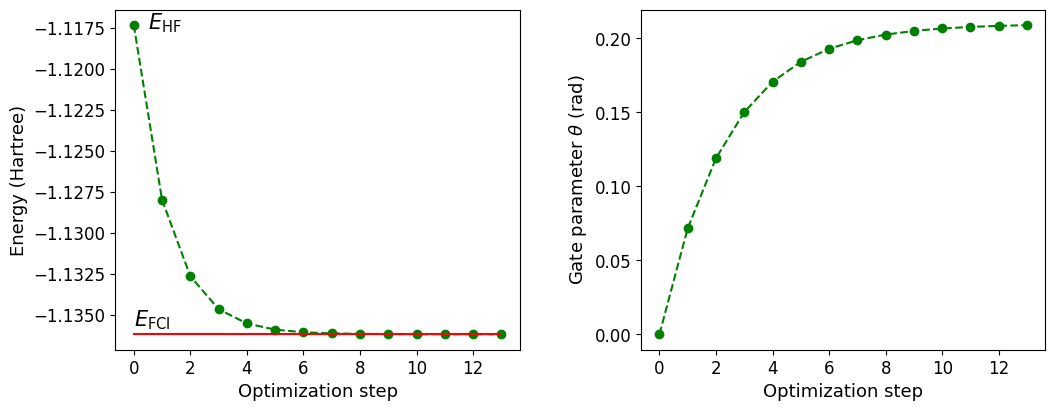

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)

# Full configuration interaction (FCI) energy computed classically
E_fci = -1.136189454088

# Add energy plot on column 1
ax1 = fig.add_subplot(121)
ax1.plot(range(n + 2), energy, "go", ls="dashed")
ax1.plot(range(n + 2), np.full(n + 2, E_fci), color="red")
ax1.set_xlabel("Optimization step", fontsize=13)
ax1.set_ylabel("Energy (Hartree)", fontsize=13)
ax1.text(0.5, -1.1176, r"$E_\mathrm{HF}$", fontsize=15)
ax1.text(0, -1.1357, r"$E_\mathrm{FCI}$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add angle plot on column 2
ax2 = fig.add_subplot(122)
ax2.plot(range(n + 2), angle, "go", ls="dashed")
ax2.set_xlabel("Optimization step", fontsize=13)
ax2.set_ylabel("Gate parameter $\\theta$ (rad)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(wspace=0.3, bottom=0.2)
plt.show()

#### <font color="blue">**Challenges**

##### <font color="blue">*Quantum Error Correction*

video: [Calibrating large quantum processors](https://www.youtube.com/watch?v=fk2HH9M4FqA&list=WL&index=8&t=224s)

video: [Estimating overheads for quantum fault-tolerance in the honeycomb code](https://youtu.be/ND9OoqJ0NMw?si=y2jnMCryfqdOc4wn)

video: [Pulse sequence design for crosstalk mitigation](https://youtu.be/suO1_7rZAW0?si=XSNiKQX8t23yZOe6)

honeycomb: [Craig gidney: [Talk] Software and the Honeycomb Code](https://youtu.be/O3NaTGmY0Rw?si=3fp6f9ApE8Gu5sF2)

honeycomb: [A short history of the honeycomb code](https://youtu.be/frnym8S5qM4?si=wrnIJ6A6_a188Xug)

video: [QIP 2022 | Floquet Codes (Matthew Hastings)](https://www.youtube.com/watch?v=JTvByDNy8zE&list=WL&index=6&t=68s)

video: [QIP2023 | Floquet codes without parent subsystem codes (Margarita Davydova)](https://www.youtube.com/watch?v=nq021Pw7orc&list=WL&index=7&t=40s)

https://quantumpoet.com/superconducting-quantum-computing/

https://www.quantamagazine.org/how-quantum-computers-will-correct-their-errors-20211116/

https://www.quantamagazine.org/new-codes-could-make-quantum-computing-10-times-more-efficient-20230825/

https://www.quantamagazine.org/physicists-create-elusive-particles-that-remember-their-pasts-20230509/

*difference between "code space", "code word" and "stabilizer code"?*

https://quantumcomputing.stackexchange.com/questions/1822/what-is-the-difference-between-code-space-code-word-and-stabilizer-code

**Classical Error Correction Codes**

https://www.quantamagazine.org/the-basic-algebra-behind-secret-codes-and-space-communication-20230123/

**Error Correction Zoo**

https://errorcorrectionzoo.org/c/honeycomb

https://errorcorrectionzoo.org/list/ag

https://errorcorrectionzoo.org/list/homological

https://arxiv.org/abs/quant-ph/0110143

https://arxiv.org/abs/1603.02286

Sometimes transversal means specifically "the logical operation has constant depth, regardless of code distance". For example, the transversal S gate in the folded surface code uses physical gates that aren't the S gate. It uses two qubit gates across the folded halves.

https://quantumcomputing.stackexchange.com/questions/24269/what-is-formally-a-transversal-operator

**How does quantum error correction work?**

Quantum error correction is a set of techniques for protecting quantum information from errors due to decoherence and other quantum noise. Here's a high-level summary:

1. **Encoding**: The first step in quantum error correction is to encode the quantum information. Rather than storing a quantum bit of information (a "qubit") in a single physical qubit, we store it in multiple physical qubits. This is done in such a way that, even if some of the physical qubits are corrupted by noise, the original quantum information can still be recovered. This encoding is done using a quantum error-correcting code. There are many different types of quantum error-correcting codes, each with its strengths and weaknesses.

2. **Syndrome measurement**: Once the quantum information has been encoded, the next step is to periodically check for errors. This is done by performing a syndrome measurement, which is a special kind of quantum measurement that can detect whether an error has occurred, and if so, what kind of error it was. Importantly, this measurement does not disturb the encoded quantum information.

3. **Error correction**: If the syndrome measurement indicates that an error has occurred, the next step is to perform an error correction. This involves applying a series of quantum gates to the physical qubits to correct the error, based on the result of the syndrome measurement.

4. **Repeat**: Because quantum systems are always subject to noise, this process of syndrome measurement and error correction needs to be repeated periodically to keep the errors in check.

Challenges:

* It's worth noting that the whole process of quantum error correction requires a significant overhead in terms of additional physical qubits and quantum operations. This is a major challenge in the development of large-scale, fault-tolerant quantum computers.

* It's also worth noting that, although quantum error correction can protect against many types of errors, it cannot protect against all possible errors. In particular, **it's assumed that the errors are relatively rare and do not all occur at once, and that they are independent and identically distributed across the physical qubits**. **If these assumptions are violated, then quantum error correction may not be able to correct the errors**. This is another major challenge in the field of quantum error correction.

Video: [Introduction to Toric Code](https://youtu.be/ZRqgAbBGg40) very good
Video: [The superconducting transmon qubit](https://youtu.be/dKTNBN99xLw)
Video: [The transmon qubit](https://youtu.be/cb_f9KpYipk)
Video: [Making quantum error correction practical](https://youtu.be/YPFpll1NFQc)
Video: [Steven Girvin](https://youtu.be/nhUKHf-GN_Y)
Video: [Quantum Industry Talks](https://youtu.be/eyICn3KCUPI)
Video: [Qiskit QEC](https://youtu.be/ZY8PddknCos), [Qiskit](https://youtu.be/SHr3uSv9Bts), [qiskit](https://youtu.be/96a0G4G5ZH8)

***Concepts:*** *Ancilla qubits, surface code, distance code, X (bit flip) and Z (phase flip) error, threshold theory, required fault-tolerance, logical vs physical qubit*

*Tasks: Error detection, error mitigation, error correction, error suppression*

Video [Progress Towards Quantum Error Correction with the Surface Code | Qiskit Seminar Series](https://www.youtube.com/watch?v=si5a9RJP01A)

Use more than one qubit to represent a state, use neighboring qubit check (so you don't measure the exact state which would collapse the quantum state). You can decode with it and see that the error was on the last qubit. Then you can correct the physical qubit to get back the correct logical qubit state:

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1278.png)

[An Introduction to Quantum Error Correction and Fault-Tolerant Quantum Computation](https://arxiv.org/pdf/0904.2557.pdf)

For what do you need abelian groups in quantum computing?

In quantum computing, Abelian groups are used to describe the symmetry of a quantum system. Symmetry is a fundamental concept in quantum mechanics, and it refers to the idea that a physical system will remain unchanged under certain transformations. For example, the symmetry of a quantum system may be described by a group of rotations, translations, or reflections. Abelian groups are used to describe the symmetry of a quantum system because they have the useful property of being commutative, meaning that the order in which the transformations are applied does not affect the outcome. This property makes it possible to use Abelian groups to describe the symmetries of a quantum system in a way that is mathematically tractable and easy to work with.

**Classical Error detection and correction**

* https://en.m.wikipedia.org/wiki/Error_detection_and_correction

* https://en.m.wikipedia.org/wiki/Repetition_code

**Faut-Tolerant QC (Quantum Error Correction)**

* Bit flip (from 0 to 1) or dephasing (from superposition to exact state)

* Challenge: we need to keep that states correct without looking at them (because then WE dephase them)

* We need a method to **build relatively noiseless qubits (logical qubits)out of many noisy ones (physical qubits)**. This is quantum error correction.

* Solution: one way (repetition encoding), sit our qubits on a line. We then go along and ask every pair of next-door-neighbours whether they agree or disagree with each other. This tells us nothing about whether they are 0 or 1. But repetition encoding, which protects against bit flip errors so well, actually makes dephasing more likely!

* https://en.m.wikipedia.org/wiki/Quantum_error_correction


* Examples of QEC: **repetition code** (simplest QEC) and **surface code** (and color codes?)

* techniques: syndrome measurements, decoding, logical operations

* https://www.quantamagazine.org/how-space-and-time-could-be-a-quantum-error-correcting-code-20190103/


* [An introduction to Fault-tolerant Quantum Computing](https://arxiv.org/abs/1508.03695)

http://decodoku.blogspot.com/2016/02/5-story-so-far_57.html

* [INTRODUCTION TO
QUANTUM ERROR
CORRECTION](https://cpb-us-w2.wpmucdn.com/voices.uchicago.edu/dist/0/2327/files/2019/11/QECIntro.pdf)

**Exkurs: Error Mitigation**

* quantum error correction is long term goal, meanwhile we try to mitigate it

* Error mitigation techniques: statistical corrections (on histogram for example)

	* https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html

	* https://arxiv.org/abs/2005.10189

**DiVincenzo's criteria**

Video: [Introduction to Toric Code](https://youtu.be/ZRqgAbBGg40) (very good!)

Video: [Gottesman 1](https://youtu.be/ltJ1jXQeDl8) and [Gottesman 2](https://youtu.be/cUqys29d0YA)

[DiVincenzo's criteria](https://en.m.wikipedia.org/wiki/DiVincenzo%27s_criteria) are conditions necessary for constructing a quantum computer, conditions proposed in 2000 by the theoretical physicist David P. DiVincenzo.

**1. A scalable physical system with well-characterized qubits.**

**2. The ability to initialize the state of the qubits to a simple fiducial state, such as 000...).**

**3. Long relevant decoherence times, much longer than the gate operation time.**

**4. A "universal" set of quantum gates** (that approximate any unitary operation - a unitary transformation preserves the inner product, which is a property of the Hilbert space)

**5. A qubit-specific measurement capability** (ability to measure individual qubits)

* Trapped Ion and superconducting qubits do really well on all five criteria

6. *The ability to interconvert stationary and flying qubits.*

7. *The ability to faithfully transmit flying qubits between specified locations.*

* The DiVincenzo criteria consist of seven conditions an experimental setup must satisfy to successfully implement quantum algorithms such as Grover's search algorithm or Shor factorization.

* The first five conditions regard quantum computation itself. Two additional conditions regard implementing quantum communication, such as that used in quantum key distribution. One can demonstrate that DiVincenzo's criteria are satisfied by a classical computer.

* Comparing the ability of classical and quantum regimes to satisfy the criteria highlights both the complications that arise in dealing with quantum systems and the source of the quantum speed up.

*Universal quantum computing and quantum annealer: not all criteria match the quantum annealers*

**Definition of Quantum Computing**

[Quantum computing](https://en.m.wikipedia.org/wiki/Quantum_computing) is a type of computation whose operations can harness the phenomena of quantum mechanics, such as superposition, interference, and entanglement to perform computation. Devices that perform quantum computations are known as quantum computers.

*Harnessing effects of quantum mechanics: by this definition also quantum annealers are quyantum computers.*

**Stabilizer Code and Parity Check Measurement**

**Exkurs: Stabilizer Code**

*Exkurs: Stabilizer Code & Ancilla qubits*

* A [stabilizer](https://en.m.wikipedia.org/wiki/Stabilizer_code) quantum error-correcting code appends [ancilla qubits](https://en.m.wikipedia.org/wiki/Ancilla_bit) to qubits that we want to protect.

**A stabilizer quantum error-correcting code appends ancilla qubits to qubits that we want to protect**. A unitary encoding circuit rotates the global state into a subspace of a larger Hilbert space. This highly entangled, encoded state corrects for local noisy errors.

https://en.m.wikipedia.org/wiki/Stabilizer_code

In quantum computing, **a stabilizer code is a type of error-correcting cod**e that is used to protect quantum information from the effects of noise and decoherence. These codes are based on the concept of stabilizer operators, which are a special type of operator that can be used to detect and correct errors in a quantum system. The basic idea behind stabilizer codes is to encode the quantum information using a set of stabilizer operators, such that any errors that occur in the system can be detected and corrected by measuring the values of these operators. GPT


Many quantum error correction schemes can be classified as stabilizer codes, where a single bit of **quantum information is encoded in the joint state of many physical qubits**, which we refer to as data qubits. Interspersed among the data qubits are **measure qubits**, which periodically measure the parity of chosen combinations of data qubits. https://arxiv.org/pdf/2102.06132.pdf


https://www.youtube.com/watch?v=Rs2NMe4Lsbw&t=456s

https://leftasexercise.com/2019/01/28/basics-of-quantum-error-correction/

https://leftasexercise.com/2019/02/04/q-fault-tolerant-quantum-computing/

https://leftasexercise.com/2019/03/25/qec-an-introduction-to-toric-codes/

https://leftasexercise.com/2019/04/08/quantum-error-correction-the-surface-code/

https://leftasexercise.com/2019/02/11/quantum-error-correction-with-stabilizer-codes/

https://leftasexercise.com/2018/09/10/quantum-computing-an-overview/

Stabilizer code with parity check circuits (for Z and X errors)

**Parity measurement**: is it even (correct) or odd (error)? You will have a square with one dimension for X error and another dimension for Z error measurement. You have an **ancilla qubit** to make the measurements with C-Z-gate and C-X gate (but you first put it into an equal superposition).

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1283.png)

You put both X and Z together and get a 2D lattice of surface code with a determined code distance. We have now data qubits, X ancilla qubits and Z ancilla qubits.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1284.png)

**Exkurs: Repetition Codes**

* look at majority of bits

* https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html

* repetition code: redundancy (repetition) is a way to make sure the message gets delivered (i.e. with majority voting, for d repetition: $P=\sum_{n=0}^{[ a / 2]}\left(\begin{array}{l}d \\ n\end{array}\right) p^{n}(1-p)^{d-n} \sim\left(\frac{p}{(1-p)}\right)^{[ d / 2]}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_100.png)

**ZX-calculus**

https://arxiv.org/abs/1307.7025

The ZX-calculus is complete for stabilizer quantum mechanics

ZX Calculus: Hopf rule

Reasoning with connectivity using diagrammatic reasoning

ZX Calculus: Hadamard rule

Evaluating quantum circuits using diagrammatic reasoning.

https://en.wikipedia.org/wiki/ZX-calculus

https://en.wikipedia.org/wiki/Penrose_graphical_notation

https://en.wikipedia.org/wiki/Tensor_network_theory?wprov=sfti1

https://en.wikipedia.org/wiki/Unified_field_theory



https://en.wikipedia.org/wiki/Matrix_product_state?wprov=sfti1


https://en.wikipedia.org/wiki/Density_matrix_renormalization_group?wprov=sfti1

https://en.wikipedia.org/wiki/Categorical_quantum_mechanics?wprov=sfti1

And finally I'll learn about fault-tolerance cause now it's in a language that I can understand, cause I co-invented it with Ross Duncan!

https://lnkd.in/dX2YDzfF

But the “newly introduced ZX-instruments” want to be the bastard spiders of the dodo-book. They go back a long time, even before ZX calculus itself, and published here:

https://lnkd.in/e4VvrGHA

Quantum In Pictures also has that stuff, and so does this paper:

https://lnkd.in/eSwFWkHZ

**Fidelity (Error Probability)**

Physical and Logical Qubits

https://en.m.wikipedia.org/wiki/Physical_and_logical_qubits

**Fidelity**: For Shor's algorithm with estimated 10^9 physical gates required, the error should be less than 10^-9, ideally 10^-10. We are still several orders of magnitude away from that accuracy / faut-tolerance.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1279.png)

Many applications call for error rates in the 10−15 regime [2–9], but state-of-the-art quantum platforms typically have physical error rates near 10−3
https://arxiv.org/pdf/2102.06132.pdf

To run quantum algorithms perfectly we need error probability of 1 in a billion or 1 in a trillion - but we are at 1 in a thousand

Video: [Suppressing quantum errors by scaling a surface code logical qubit](https://www.youtube.com/watch?v=dVkLNwSTBU0)

**Exkurs: Fidelity of quantum states**

* https://en.m.wikipedia.org/wiki/Fidelity_of_quantum_states

* Noise transforms pure states into mixed states.

  * There are also simpler ones: Fidelity between two pure states

  * And there are also more complex ones: Fidelity between two mixed states

* fidelity is generally defined as the quantity:

> ${\displaystyle F(\rho ,\sigma )=\left(\operatorname {tr} {\sqrt {{\sqrt {\rho }}\sigma {\sqrt {\rho }}}}\right)^{2}}$

* most useless state is fidelity 0,5. because fidelity = 0 means orthogonal, and =1 means exactly the same.

* Video: [Fidelity](https://www.youtube.com/watch?v=GWi_HIVz2B4)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1275.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1276.png)

There are two types of errors that you want to detect: **Bit-flip** (represented with Pauli X gate) and **Phase-flip** (represented with Pauli-Z gate). But 1D string physical qubits cannot protect from bit and phase flip at the same time. You need a 2D string.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1281.png)

**Nota bene: Qubits können auch ganz verloren gehen**

* Inzwischen können Quantencomputer mit einer gewissen Anzahl von Rechenfehlern, wie zum Beispiel Bitflip- oder Phasenflip-Fehlern, umgehen. Zusätzlich zu diesen Fehlern können jedoch auch Qubits ganz aus dem Quantenregister verloren gehen.

* Je nach Art des Quantencomputers kann dies auf den tatsächlichen Verlust von Teilchen wie Atomen oder Ionen zurückzuführen sein, oder darauf, dass Quantenteilchen beispielsweise in unerwünschte Energiezustände übergehen, welche nicht mehr als Qubit erkannt werden. Wenn ein Qubit verloren geht, wird die Information in den verbleibenden Qubits unlesbar und ungeschützt. Für das Ergebnis der Berechnung kann dieser Prozess zu einem potentiell verheerenden Fehler werden.

https://www.cosmos-indirekt.de/News/Neue_Methode_schützt_Quantencomputer_vor_Ausfällen.html

Resolving catastrophic error bursts from cosmic rays in large arrays of superconducting qubits.

https://arxiv.org/abs/2104.05219

https://physicsworld.com/a/cosmic-ray-threat-to-quantum-computing-greater-than-previously-thought/

**Error Syndrome Measurement**

**|1> measured in instead of a |0> : The permutations of outputted |1〉’s is called the “error syndrome”.**

Syndrome: what qubit the error is on

Error syndrome measurement:

https://www.quora.com/Error-Correcting-Codes-What-is-a-syndrome:

* The syndrome measurement provides information about the error that has happened, but not about the information that is stored in the logical qubit—as otherwise the measurement would destroy any quantum superposition of this logical qubit with other qubits in the quantum computer, which would prevent it from being used to convey quantum information. (https://en.m.wikipedia.org/wiki/Quantum_error_correction)

* It is the result of multiplying a parity check matrix times a vector. By convention, codewords of a code have syndrome zero, so that by linearity of the code, the syndrome of a word is the syndrome of the "error" vector. Typically from the syndrome you would either try to determine whether there was an error (is the syndrome nonzero?) and recover the error from it, so that in turn you can recover the data from the received word.

syndrome. = error?

here slide 4: https://people.engr.tamu.edu/andreas-klappenecker/689/stabilizer.pdf

**Code Distance and Surface Code**

https://en.m.wikipedia.org/wiki/Five-qubit_error_correcting_code

Quantum **Threshold theory** ensure that there is a limit that helps to get error under control even with larger numbers of physical qubits. The **code distance** is then a result of the max error rate and represents the number of physical qubits for one state:

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1280.png)

**Exkurs: Quantum Threshold Theorem**

* Challenge: quantum computer will not be able to perform gate operations perfectly, some small constant error is inevitable

* [quantum threshold theorem](https://en.m.wikipedia.org/wiki/Quantum_threshold_theorem) (or quantum fault-tolerance theorem) states that a quantum computer
  * **with a physical error rate below a certain threshold** can,
  * **through application of quantum error correction schemes**,
  * suppress the logical error rate to arbitrarily low levels.

* This shows that quantum computers can be made fault-tolerant, as an analogue to von Neumann's threshold theorem for classical computation

* The formal statement of the threshold theorem depends on the types of error correction codes and error model being considered.

* for any particular error model (such as having each gate fail with independent probability p), use **error correcting codes** to build better gates out of existing gates.

  * Though these "better gates" are larger, and so are more prone to errors within them, their error-correction properties mean that they have a lower chance of failing than the original gate (provided p is a small-enough constant).

  * Then, one can use these better gates to recursively create even better gates, until one has gates with the desired failure probability, which can be used for the desired quantum circuit.

* Current estimates put the threshold for the [surface code](https://en.m.wikipedia.org/wiki/Toric_code) (here: Toric code) on the order of 1%, though estimates range widely and are difficult to calculate due to the exponential difficulty of simulating large quantum systems.

* At a 0.1% probability of a [depolarizing](https://en.m.wikipedia.org/wiki/Depolarization) error, the surface code would require approximately 1,000-10,000 physical qubits per logical data qubit, though more pathological error types could change this figure drastically.




**Exkurs: Distance Code / Code Distance**

* https://physics.stackexchange.com/questions/29397/what-is-the-code-distance-in-quantum-information-theory


* Over all 25 cycles of error correction, the distance-5 code realises lower logi- cal error probabilities pL than the average of the subset distance-3 codes - [Paper](https://arxiv.org/pdf/2207.06431.pdf)

* the distance is the shortest path in a certain "space of errors" which maps between two orthogonal quantum states that are in the code.

* The natural space of errors is that of single qubit errors of the form 𝜎𝑋, 𝜎𝑌 or 𝜎𝑧, in the case where the Hilbert space is that of 𝑛 qubits.

* So you can think of distance as the shortest path to get from one state to another by operations on single qubits, applied one at a time sequentially.

* [Source](https://physics.stackexchange.com/questions/29397/what-is-the-code-distance-in-quantum-information-theory)

*Surface Code*

No, code distance and surface code are not the same in quantum error correction.

* **Code distance** is a measure of the ability of a quantum error-correcting code to correct errors. A code with a higher code distance can correct more errors than a code with a lower code distance.
* **Surface code** is a specific type of quantum error-correcting code that has a high code distance. Surface codes are often used in quantum computers because they are relatively easy to implement and can correct a large number of errors.

In other words, code distance is a property of all quantum error-correcting codes, while surface code is a specific type of quantum error-correcting code that has a high code distance.

Here is an analogy to help you understand the difference between code distance and surface code:

* Code distance is like the number of lanes on a highway. A highway with more lanes can handle more traffic than a highway with fewer lanes.
* Surface code is like a specific type of highway that is designed to handle a lot of traffic. Surface highways have more lanes than other types of highways, so they can handle more traffic.

I hope this helps! Let me know if you have any other questions.

**2D Surface code** protects from X error and Z error (X and Z - that's why 2 D). Errors typically arise only locally. The gate structure needs to fit the physical geometry of the quantum processor. Error per gate should be 0,5%, but overall threshold depends on case.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1282.png)

**Exkurs: Stabilizer Code $\rightarrow$ Surface Code $\rightarrow$ Toric Code**

* https://quantumcomputing.stackexchange.com/questions/2106/what-is-the-surface-code-in-the-context-of-quantum-error-correction

* **Surface codes**: family of quantum error correcting codes defined on a 2D lattice of qubits.

* Each code has [stabilizers](https://en.m.wikipedia.org/wiki/Stabilizer_code) that are defined equivalently in the bulk, but differ from one another in their boundary conditions.

* The members of the surface code family are sometimes also described by more specific names:

  * The [toric code](https://en.m.wikipedia.org/wiki/Toric_code) is a surface code with periodic boundary conditions,

  * the planar code is one defined on a plane, etc.

* How many qubits are in a surface code? - While the surface code requires four-qubit measurements to encode a single logical qubit, we introduce families of quantum error correcting codes that use only three-qubit measurements. [Paper](https://www.ucl.ac.uk/quantum/news/2021/aug/subsystem-codes-outperform-surface-code)

* [Surface codes: Towards practical large-scale quantum computation](https://arxiv.org/abs/1208.0928)

* [Topological quantum memory (paper)](https://arxiv.org/abs/quant-ph/0110143)

* [Surface codes: Towards practical large-scale quantum computation (paper)](https://arxiv.org/abs/1208.0928)

* [My blog series introducing surface codes](http://decodoku.blogspot.com/2016/02/5-story-so-far_57.html)

* The surface codes can also be generalized to qudits. For more on that, [see here (Fault-tolerant quantum computation by anyons)](https://arxiv.org/abs/quant-ph/9707021)

**Exkurs: Toric Code**

* For the toric code we don’t put our qubits in a line, we put them in a grid pattern.

* Video: [INTRODUCTION TO TOPOLOGICAL ORDER, DEMONSTRATION VIA THE TORIC CODE](https://www.youtube.com/watch?v=Rs2NMe4Lsbw&t=456s)

* https://leftasexercise.com/2019/03/25/qec-an-introduction-to-toric-codes/

* http://decodoku.blogspot.com/2016/03/6-toric-code.html

* http://decodoku.blogspot.com/2016/03/6-toric-code-part-2.html

* http://decodoku.blogspot.com/2016/03/8-toric-code-part-3.html

* http://decodoku.blogspot.com/2016/04/9-toric-code-part-4.html

* http://decodoku.blogspot.com/2016/04/10-toric-code-part-5.html

**Exkurs: Color Code**

* [Fault-tolerant quantum computing with color codes](https://arxiv.org/abs/1108.5738)

* https://physics.stackexchange.com/questions/169176/quantum-error-correction-surface-code-vs-color-code

The color code and surface code are very similar. They are stabilizer codes composed of qubits arranged in two dimensions, requiring only geometrically local stabilizer measurements.

From the theory point of view, the codes are very similar. In fact, with collaborators we have proven that the color code is equivalent to a surface code (paper) up to a geometrically local unitary (one which only makes nearby qubits interact). One can think by analogy of the surface code* as a napkin with two rough and two smooth sides and the color code as folding this napkin along its diagonal. Because in the folded napkin, there are new things that are now close, it is possible to do more logical gates "transversally". This is good because it keeps errors from propagating and is relatively easy. However, the color code needs more qubits to interact in each stabilizer so ends up leading to a lower noise threshold. So one can say that although very similar, each code has its advantages and disadvantages.

At this point, only very small versions of either of these codes are being demonstrated. The Rainer Blatt group demonstrated the smallest possible color-code which also uses 7 qubits (this instance is also referred to as the Steane code). However, the underlying geometry in which the qubits are laid out in the Blatt setup is a linear chain of ions, so I would say that this is not the natural setting to extend to larger and larger system sizes.

**The superconducting qubit people (Martinis, IBM, DiCarlo, ...) on the other hand, are concentrating more on surface codes**. While in principle, their architecture should allow them to go full fledge 2D, for now, they are having the classical logic come in from the sides, which is something that needs to change.

*There is actually an ambiguity as to what to call surface codes, but I will refer to the quantum double of Z2 with rough and smooth boundaries defined by Bravyi and Kitaev (paper).

*Distance 2 Qubit Surface Code (Gate Circuit)*

Let's go down from a seven qubit surface code to a simpler two qubit surface code. Smallest meaningful is a 2x2 lattice. But it's just an error detection code, because it's too small to do error correction.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1286.png)

**Green line is a flux line**. We put a magnetic flux through the script loop of each qubit to put a a specific frequency where we want it to be. **Pink line is a charge line** that is used for single qubit gates. All the rest (red, blue, purple box) are part of the readout. It's very important to have a good readout - we need to measure the ancilla qubits during the operation to see if there wasn't an error. You see that sort of resonator over each Qubit (die dinger die aussehen wir alte Heizungskoerper) - this is very standard, there is a harmonic oscillator.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1287.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1288.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1289.png)

*7 Qubit Surface Code (Gate Circuit)*

Build a 7 qubit gate circuit. You can't correct the error, but you can detect it. At the end we verify by measuring the actual state of each qubit.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1290.png)


We can run multiple measurements in (20) microseconds for Z and X operator:

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1291.png)

**D = 3 Surface Code Stabilizer Gate Sequence**

* Red: data qubits
* Blue: X-type ancilla qubit
* Green Z-type ancilla qubit

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1300.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1301.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1302.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1303.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1304.png)


![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1305.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1306.png)


![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1307.png)


![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1308.png)



*Future of Quantum Error Correction*

**Future of quantum error correction**
* we still have problems like leakage etc
  * When they ask about thresholds, they are also derived from ideal models. Things like circular ZZ coupling can make it much harder.
  * If you add leakage to your CZ gates, you could take a surface code that would sort of there was zero leakage below the physical error rate. But if you add leakage to that 0.1 percent degrees (the red line), which is a second. When you do the decoding (the green line), suddenly you are not below the threshold anymore
* Also, if we want distance n=17 (mentioned in the beginning) you have an insane amount of data coming out of the device:
  * we need ($n^2 -1$) physical qubits for error correction. So if one readout is 1 bit, we need 288 bits per microsecond ($\mu$s) per qubit).
  * This amounts to 288 Gbits per s for 1000 logical qubits

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1292.png)

**Anyons, Transmon and Fluxonium**

**Anyon (Quasi Particles)**

* https://de.m.wikipedia.org/wiki/Anyon

* PBS Video on Quasiparticles: https://youtu.be/le_ORQZzkmE

**Transmon and Fluxonium Qubit**

* Better hardware to protect against noise orders of magnitude better (to get down to 10^-5 instead of 10^-9
* they can show cherence times above 1 millisecond, they had single qubit errors of 0.9999 (only 4x) with Fluxonium


![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1293.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1299.png)

*Source: https://theorie.physik.uni-konstanz.de/burkard/sites/default/files/images/Seminar_3_TrFl.pdf*


Video: [Google Keynote: Superconducting qubits for quantum computation: transmon vs fluxonium](https://www.youtube.com/watch?v=qsizrKrUZDg)

**Anyons, Qubit Braiding and Topological Quantum Computing**

https://dom-kufel.github.io/blog/2023-05-13-toric_code-intro/#loop-excitations-and-error-correction

https://www.quantamagazine.org/physicists-create-elusive-particles-that-remember-their-pasts-20230509/

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1568.png)



https://arthurpesah.me/blog/2023-05-13-surface-code/

https://dom-kufel.github.io/blog/2023-05-13-toric_code-intro/

https://arthurpesah.me/blog/2023-01-31-stabilizer-formalism-1/

https://arthurpesah.me/blog/2022-01-25-intro-qec-1/

https://blog.google/technology/research/an-important-step-towards-improved-quantum-computers/

https://phys.org/news/2023-05-google-quantum-ai-braids-non-abelian.html

https://www.spektrum.de/news/nichtabelsche-anyonen-auf-quantenprozessor-simuliert/2138241



 I am also frustrated by us and the media representing these anyon simulations as a "step towards fault-tolerance". Certainly topological codes are inspired by the physics of anyons and there are direct analogies between how those codes work and are realized and these simulations. I also have no doubt that certain aspects of these simulations have some degree of error robustness. But my understanding is that once you get serious about turning such simulations into a form of fault-tolerance appropriate for our devices and then try to optimize its realization you end up with the surface code. So while thinking about the physics of error-correction from this perspective might be useful and there are myriad mathematical similarities between what is going on in these simulations and topological codes, I think it is misleading/wrong to claim that performing these simulations is taking us any closer to fault-tolerance (whether the surface code or a different form of it). People keep telling me that I am misunderstanding this (and maybe I am!) but I have not been convinced of that yet.

my objection, which might be different from Cody's, is that the title of this blog post suggests that this experiment is getting us closer to realizing universal fault-tolerant quantum computers. In particular, when we say it is a step closer to improved quantum computers, it makes it sound like this approach is somehow a step on our roadmap for realizing fault-tolerant quantum computers, or that it is going to make our ultimate goal easier or something like that. That is reading between the lines a little bit, but it is how it sounds to me. Is that actually true? Or is this in the category of "nice demonstration, but not something we're going to follow up on, and thus not a step towards us improving quantum computers other than in the very broad sense that it helps test hardware capabilities like most physics team experiments do"? My understanding is that nothing about this experiment is likely to change anything about how we are planning to realize fault-tolerance. Maybe that is incorrect, or it is correct and I am just reading too much into the implications of statements like the title. It would be nice to understand this better.

The main sense in which the non-abelian anyons are useful for fault tolerance is that they are isomorphic to twists in the surface code, and you can use twists to store logical qubits. But we already knew about twists independent of this work e.g. from https://arxiv.org/abs/1609.04673 so I don't know what it adds on the fault tolerance side.

I did give a presentation to the authors of our abelian paper on how to do it fault tolerantly (they were technically "using" a surface code, but they were preparing it entirely unitarily which is not fault tolerant; you have to use measurements for everything). They weren't so interested I think, because the measurement version is harder and maybe also because they didn't consider it "really doing it" in the same way. I actually did run some quick shots of my versions of the circuits on the device back when pink was in M2 shape, and it worked, in that I got non-zero signal (the error rate was close to max but not max). I wasn't doing adept or etc or etc; if an experimentalist did it it would have been better. Also I now have much better versions of the circuit, which are described in https://arxiv.org/abs/2302.07395 .

My point was that if you interpret TQC as broadly ("you have things that act like anyons") then this is demonstrating something interesting (multiparticle entangled EC state, FT gates on that state).  But I also agree with Ryan in that I think the blog post does not convey this well.

Fair enough, I'm just trying to put forth a perspective on why it is fine to say this is an interesting experiment in topological quantum computation.  And if you want some idea of how it might lead to noise protection, yes  https://arxiv.org/abs/quant-ph/9912040 which was expanded upon in https://arxiv.org/abs/0907.3988

And indeed our own team's work investigating how simulations of many body systems are related does or does not give protection of topologically protected information is in this direction.

I think I agree with everything you've said Dave. But I don't think any of that really justifies the framing of the blog post title, which to me suggests that this is moving us closer to building a fault-tolerant quantum computer as opposed to exploring the error robustness of anyon simulation.

Yes, anyons and transmons are related in quantum computing. Anyons are theoretical particles that have unique properties that make them well-suited for quantum computing. Transmons are physical implementations of qubits that can be used to build quantum computers.

One of the key properties of anyons is that they can be braided together to perform quantum operations. This is because the braiding of anyons is a topological operation, meaning that it is not affected by the environment. This makes anyons very resistant to noise, which is a major challenge in quantum computing.

Transmons, on the other hand, are physical particles that can be used to build qubits. Qubits are the basic unit of information in quantum computing. Transmons are made of superconducting circuits and can be manipulated using microwaves.

Transmons are not as topologically protected as anyons, but they are much easier to implement in a practical quantum computer. This is because transmons can be manufactured using existing semiconductor technology.

So, anyons and transmons are both promising candidates for quantum computing. Anyons are more topologically protected, but transmons are easier to implement. It is still not clear which approach will ultimately be more successful, but both anyons and transmons are active areas of research.

Here is a table that summarizes the key differences between anyons and transmons:

| Property | Anyons | Transmons |
|---|---|---|
| Topological protection | Yes | No |
| Ease of implementation | No | Yes |
| Current research status | Active | Active |

I hope this helps! Let me know if you have any other questions.

https://en.m.wikipedia.org/wiki/Jellium

https://de.m.wikipedia.org/wiki/Cooper-Paar

https://en.m.wikipedia.org/wiki/Bose–Einstein_condensate

https://opg.optica.org/oe/fulltext.cfm?uri=oe-2-8-299&id=63264

https://de.m.wikipedia.org/wiki/Phonon


Part of this correlation is the formation of pairs of electrons called Cooper pairs. According to Josephson, under certain circumstances these Cooper pairs move from one superconductor to the other across the thin insulating layer. Such motion of pairs of electrons constitutes the Josephson current, and the process by which the pairs cross the insulating layer is called Josephson tunneling.

https://www.britannica.com/science/Josephson-effect


Meissner effect

Meissner effect, the expulsion of a magnetic field from the interior of a material that is in the process of becoming a superconductor, that is, losing its resistance to the flow of electrical currents when cooled below a certain temperature, called the transition temperature, usually close to absolute zero. The Meissner effect, a property of all superconductors, was discovered by the German physicists W. Meissner and R. Ochsenfeld in 1933.

https://slideplayer.com/slide/5010186/

Squid

*Josephson Junction*

**Superconducting integrated circuits**

- Conductance is not constant but varies with how much current is flowing, making it an unharmonic oscillator
- Potential of the conductor is a cosine
- Low energy excitations are pairs of electrons slashing back and forth between the two antenna pads
- From ground state to first excited state: 5 gigahertz
- From first excited state to second excited state transition: 4.9 Ghz (due to flattened curve of cosine)

More details: https://www.youtube.com/watch?v=uD69GCYF9Zg&t=2023s


Übergangsdipolmoment (Transition dipole moment)

https://de.m.wikipedia.org/wiki/Übergangsdipolmoment

**ZZ: Residual ZZ coupling, circular ZZ coupling, ZZ crosstalk**

*  Noise is a significant obstacle to quantum computing, and 𝑍 𝑍 cross- talk is one of the most destructive types of noise affecting supercon- ducting qubits. Previous approaches to suppressing 𝑍𝑍 crosstalk have mainly relied on specific chip design that can complicate chip fabrication and aggravate decoherence. To some extent, special chip design can be avoided by relying on pulse optimization to sup- press 𝑍𝑍 crosstalk. However, existing approaches are non-scalable, as their required time and memory grow exponentially with the number of qubits involved. https://arxiv.org/pdf/2202.07628.pdf

* In superconductors a destructive type of noise known as 𝑍𝑍 crosstalk. This refers to an always-on 𝜎𝑧 ⊗ 𝜎𝑧 inter- action between qubits connected by couplings, which originates from the interaction between the computational and non-computational energy levels of qubits.

* different types of crosstalks:

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1295.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1296.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1297.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1298.png)


*Source: https://www.youtube.com/watch?v=si5a9RJP01A&t=3645s*

* second graph: top red is perfect readout, and black light is for max 10% readout
* We need very good readout and very small ZZ error

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1294.png)

##### <font color="blue">*Barren Plateaus*

sss

##### <font color="blue">*Symmetries*

sss

##### <font color="blue">*Encoding*

**Fourier is all you need**: positional and number encoding using periodic signals

I just realized during a conversation with Vanio Markov the similarity between the sinusoidal position encoding in the transformer architecture and what we’ve been calling “value encoding” in quantum computing. This concept was the main idea in encoding a (polynomial) function in a quantum state (inspired by phase estimation), used for optimization purposes (and contributed to Qiskit): https://lnkd.in/ea7QU77

The “Attention is all you neeed” paper (https://lnkd.in/gP-y4xUE ) explains the positional encoding, but other references, like the one below, may be more accessible.

https://sair.synerise.com/fourier-feature-encoding/

This is a video showing frequency/value encoding for various frequencies: https://github.com/QuState/cqc_code/blob/master/videos/three_qubit_frequency_encoding.mp4 . The interactive tool also shows both the complex sinusoid (geometric sequence)  for a frequency and its  Fourier transform.

Data Encoding (Embedding)

**Quantum computers are Kernel methods** of a very specific kind: https://www.youtube.com/watch?v=pe1d0RyCNxY&t=2655s

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1406.png)

https://arxiv.org/abs/2001.03622 - Quantum embeddings for machine learning


**Data Encoding is the most important!**

https://youtu.be/pe1d0RyCNxY?t=3008

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1407.png)

The Helstrom measurement is the measurement that has the minimum error probability when trying to distinguish between two states.05.09.2018

https://en.m.wikipedia.org/wiki/Quantum_state_discrimination

After we embedded / encoded our data, and if we encode it in a way that it separates one data type from another in the hilbert space, we already know which measurement is the best one to do. We know quite a bit about the measurements to distinguish data. **Maybe after encoding the data, we are already done**. We could even train the encoding!

![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1410.png)


https://arxiv.org/abs/2001.03622 - Quantum embeddings for machine learning



> **The easiest way for a parameter to enter a circuit is through a rotation of a single qubit, in proportion to the value of a single datapoint, so a single scalar value:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_190.png)

> **You can also use a sequence of rotations to embedd data (reuploding).** And maybe there is free parameters in between as well. Can make a more complex function available than if you upload only once in a single rotation.

> **Learnable embeddings**: The other idea is to actually have a trainable embedding layer. Not to worry about training the unitary of the circuit, but worry about training the embedding and then use standard quantum information metrics to classify the data.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_191.png)

**Basis (State) Encoding**

* We gave data points x12 and x2

* We first need to represent data in binary form, like 00 and 10

* Then we encode it into a QC in a way, such that we have basis states that represents them like |00> and |10>

* with all other basis states having probability zero - represented in the amplitude vector

* So we encode data in quantum state that is aligned with basis states

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_856.png)

**Amplitude Encoding**

* we want to encode our classical information into an amplitude vector

* you have a classical data vector with 4 entries (features) x1

* now construct a circuit, so that we have an amplitude vector that corresponds to the values in the classical data vector:

	* we have 2 qubits initialized in the ground state

	* then we apply some operations U (x1) on these qubits

	* and then we get a quantum state that corresponds to an amplitude vector that exactly represents our classical data points

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_857.png)

**Angle Encoding**

* we have 2 dimension data that we can write in a two dimensional vector

* then I take the number of qubits equal to the number of features (rows / entries in a classical vector)

* then I apply rotations to each of these qubits that are equal to the value of the features

	* for example I rotate the first qubit about some axis Z. The rotation value / rotation angle is equal to the first classical feature value

	* the I take my second qubit and rotate it, for example again by the Z axis, and the angle of the rotation is equal to the second feature value of my data point

* for higher dimensional data, for example a third dimension classical vector, then I simply add more qubits to my system to encode this information

* For example:  [z feature map (Qiskit)](https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZFeatureMap.html#qiskit.circuit.library.ZFeatureMap):
	* apply Hadamard operator first to each of the qubits, and then encode data values in rotations
	* and then repeat this as many times as you want (stacking operations sequentially like in the image) to encode data multpiple times in a row

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_858.png)

**Higher Order Encoding**

* there is no theoretical reason why doing this or if it's better or not

* the idea comes from the paper [Supervised learning with quantum enhanced feature spaces](https://arxiv.org/abs/1804.11326)

* Basic idea: let's do an encoding that is hard to reproduce classically and simulate, and then maybe we get some quantum advantage in doing this

* we have some two dimensional data with a vector with 2 entries

	* choose number of qubits = number of feature values

	* then apply an hadarmard on each qubit

	* and then do rotations about some axis Z, and the first angle is the first feature value, and the same with the second qubit

	* and then we apply some entanglement gates between these qubits

	* then we do another rotation (for example again Z axis), but this rotation angle depends on some function of the product of the feature values R(x^1 * x^2)

	* this is where the name comes from: we encode in a higher order product space

	* and this whole block of this encoding can be repeated, which is called the depth of the feature maps

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_860.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_861.png)

**Other Encodings**

* Hamiltonian evolution ansatz encoding

* Displacement Encoding

* IQP Encoding (Instantaneous quantum polynomial)

* Squeezing Encoding

* QAOA Encoding

##### <font color="blue">*Quantum Chaos*

revelant for black holes and other things

Absolutely! There's a fascinating connection between quantum chaos and black holes. Here's why:

**Black Holes as Chaotic Systems**

* **Scrambling:** Black holes are believed to be the fastest "scramblers" of information in the universe. Anything falling into a black hole essentially has its information rapidly encoded and spread across the black hole's event horizon. This scrambling is seen as analogous to chaos in classical systems.
* **Entropy & Thermodynamics:** Black holes possess entropy, a thermodynamic property often associated with disorder and chaos. The connection between a black hole's entropy and its microscopic characteristics remains a key mystery.

**Quantum Chaos & Black Holes**

* **Information Paradox:**  Black holes challenge a fundamental law of quantum mechanics – information can't be destroyed. Quantum chaos may help resolve this paradox. It offers possible mechanisms on how information could be 'hidden' within seemingly random features on the event horizon and potentially retrieved through subtle effects associated with Hawking radiation.
* **Holographic Duality:** Some theoretical models, like the AdS/CFT correspondence, suggest a deep connection between the physics of black holes in specific spacetimes and certain quantum field theories without gravity. These theories may use notions from quantum chaos to establish this link.
* **Understanding the Early Universe:** The extremely hot and dense state of the early universe might have had properties related to quantum chaos.  

**Current Research**

* **Out-of-Time-Order-Correlators (OTOCs):**  OTOCs are tools used to measure how quickly information scrambles or spreads in a system. They're applied to study quantum chaos and are showing promise in understanding black hole dynamics.
* **Spectral Statistics:** Researchers examine the statistics of energy levels in systems related to black holes, looking for signatures of quantum chaos with features like 'level repulsion'.

**In Summary**

The complex nature of black holes makes them a testing ground for ideas connected to quantum chaos. The research aims to use the chaotic nature of black holes to potentially resolve fundamental issues in physics like the information paradox, and even gain insights into how physics worked during the earliest moments of our universe.

**Let me know if you want more details on any of these connections!**


video: [Quantum learning for quantum chaos](https://www.youtube.com/watch?v=d1iZ-ov5QOI&list=WL&index=9&t=163s)

Here's a breakdown of quantum chaos, including the key ideas and why it matters:

**What is Quantum Chaos?**

Quantum chaos is a field of physics that explores the connections between quantum mechanics (the physics of the very small, like atoms and particles) and classical chaos (the behavior of systems that are highly sensitive to starting conditions).

**Key Concepts:**

* **Classical Chaos:** Systems like the weather or a double pendulum are "chaotic" because tiny changes in the initial conditions can lead to wildly different outcomes over time. This is the famous "butterfly effect".
* **Quantum Mechanics:** In the quantum world, things like energy and position aren't precisely defined. Instead, they exist in fuzzy probabilities and wave-like behavior.
* **The Correspondence Principle:**  In general, quantum mechanics should align with classical mechanics in the limit of large systems. Quantum chaos asks: if classical systems can be chaotic, can their quantum counterparts exhibit similar behavior?

**How Does Quantum Chaos Manifest?**

It turns out that while true chaos can't fully exist in quantum systems, there are interesting ways the "fingerprint" of chaos can show up:

* **Energy Levels:** In chaotic classical systems, the energy levels tend to be more irregular and bunched up. Similar patterns can be found in the energy levels of certain quantum systems.
* **Wavefunctions:** Instead of chaotic trajectories like in classical systems, we look at quantum wavefunctions (which describe the probability of finding a particle somewhere). Wavefunctions of chaotic quantum systems tend to be highly irregular and spread out.
* **Level Repulsion:**  In chaotic quantum systems, energy levels tend to "repel" each other, in contrast to more predictable, evenly spaced levels seen in regular quantum systems.

**Why Does Quantum Chaos Matter?**

Quantum chaos research has applications in:

* **Understanding Complex Systems:** Studying the ways chaos emerges in the quantum world helps us understand the behavior of complex systems like atoms with many electrons, or the properties of certain materials.
* **Quantum Computing:** The properties of quantum chaos could have implications for designing more robust quantum computers.
* **Fundamental Physics:** Quantum chaos helps us explore the boundaries between quantum and classical physics, potentially leading to new insights about the fundamental nature of reality.

**Let me know if you want a deeper dive into any of these aspects, or if you'd like some examples!**


Here's how quantum chaos impacts the world of quantum computing:

**The Challenge of Decoherence**

* Quantum computers rely on fragile quantum states for computation. These states are easily disrupted by outside interactions (think of them as very delicate superpositions). This loss of quantum information is called "decoherence".
* Decoherence leads to errors in computation and is one of the major obstacles to making large-scale, reliable quantum computers.

**How Chaos Plays a Role**

* **Sensitivity to Errors:** Systems exhibiting quantum chaos can be incredibly sensitive to even tiny errors or perturbations. This means they could be much more prone to decoherence.
* **Scrambling of Information:** A central feature of quantum chaos is the rapid "scrambling" of quantum information. This makes the recovery of information and correction of errors significantly harder.

**Implications for Quantum Computing**

* **Limits of Fault Tolerance:**  Quantum chaos may pose limits on how effective traditional error correction techniques can be in quantum computers.
* **Designing Robust Gates:** Understanding quantum chaos could aid in designing quantum gates (the building blocks of quantum computations) and algorithms that are less susceptible to chaotic effects and decoherence.
* **Hardware Design:** The implications of quantum chaos could even influence the physical design of quantum computer hardware to try and minimize its impact.

**Ongoing Research**

* **Quantifying Chaos:** Researchers are developing rigorous ways to measure and quantify quantum chaos in actual quantum computing systems. This will help us to understand its impact better.
* **Chaos as a Tool (Possibly):** Some scientists are exploring whether aspects of quantum chaos can be harnessed for new kinds of quantum algorithms. Although speculative, this is a fascinating new field.

**Summary**

Quantum chaos poses a significant challenge for building large-scale quantum computers by making them inherently more susceptible to errors and information loss. Research focused on understanding and potentially mitigating quantum chaos is critical for the advancement of quantum computing.

**Let me know if you'd like to explore any of these aspects further!**


#### <font color="blue">**Applications**

##### <font color="blue">*Hidden Subgroup Problem*

**Hidden subgroup problem**

The dihedral hidden subgroup problem https://arxiv.org/abs/2106.09907

https://en.m.wikipedia.org/wiki/Hidden_subgroup_problem

[Examples of HSP over non-Abelian groups](https://www.youtube.com/watch?v=D-pfWjGqENg)

* We describe the HSP over symmetric and dihedral groups and their interesting applications.

* example 2 graphs A and B: it's not sufficient if they have same number of edges and vertices

* it's also important to know if they have the same connectivity (ismorphic): edge 5 and 10 in graph A are connected as well as edge 5 and 10 in graph B

* compelixity of graph ismorphism is NP: if you have the solution, it's easy to check if it's true.

* Graph automorpphism: you relabel the graph and it looks the same (non trivial besides identity map)


[Hidden Subgroup Problem](https://en.m.wikipedia.org/wiki/Hidden_subgroup_problem) (HSP) generalizes many problems on which quantum computers offer a potential exponential speed-up over classical computers and derives its significance from two important and related questions. First, the study of the problem sheds some light on what it is that quantum computers are really good at. Second, the ability to solve HSP for non-Abelian groups in polynomial time would enable us to extend the set of problems on which quantum computers offer substantial performance advantage. In this introductory talk, I will recap essential concepts from group theory before defining the Hidden Subgroup Problem and describing the quantum algorithm that solves it quickly. I will end by showing how to express a number of well-known problems, such as Simon's problem, discrete logarithm and graph isomorphism, as instances of HSP.


The Hidden Subgroup Problem (HSP) is a computational problem in the field of quantum computing and cryptography. It is a generalization of the well-known problem called the Discrete Logarithm Problem (DLP) and the Integer Factorization Problem (IFP), which are both important in modern cryptography.

In the Hidden Subgroup Problem, the input is a group G and a function f: G -> X, where G is a finite group and X is a finite set. The goal is to find a subgroup H of G such that f(x) is constant for all elements x in the same coset of H. In simpler terms, the problem involves finding a hidden structure within a group based on the information provided by the function.

The Hidden Subgroup Problem has important implications in cryptography because certain mathematical problems, such as factoring large numbers, can be reduced to it. If an efficient quantum algorithm were developed to solve the Hidden Subgroup Problem, it would have significant consequences for public-key cryptosystems like RSA and elliptic curve cryptography, which rely on the difficulty of factoring large numbers or solving the DLP.

Efforts have been made to find efficient quantum algorithms for solving the Hidden Subgroup Problem, particularly using quantum Fourier transform-based algorithms like Shor's algorithm. However, no general efficient quantum algorithm has been discovered yet for arbitrary groups, although there are some specific cases where efficient algorithms have been developed.

The study of the Hidden Subgroup Problem and its related algorithms is an active area of research in quantum computing and cryptography, with the aim of better understanding the limits and possibilities of quantum computing's impact on cryptographic systems.

What is the challenge in the hidden subgroup problem?

The main challenge in the Hidden Subgroup Problem (HSP) is to efficiently find the hidden subgroup within a given group based on the information provided by a function. The difficulty lies in identifying the underlying structure or pattern that the function reveals about the subgroup.

One of the key aspects that makes the HSP challenging is that the function only provides partial information about the subgroup. The function maps elements of the group to a set of values, but it does not directly reveal the subgroup itself. Instead, the function is designed in such a way that it distinguishes elements of different cosets of the hidden subgroup while keeping elements within the same coset indistinguishable. This limited information makes it difficult to directly extract the subgroup.

Another challenge is that the HSP encompasses a wide range of group structures. While some specific cases of the problem have been efficiently solved using quantum algorithms, finding a general solution that works for arbitrary groups remains an open question. The difficulty varies depending on the properties and structure of the group involved.

Additionally, the HSP is of particular interest in the field of quantum computing because it has the potential to break certain cryptographic protocols. Efficiently solving the HSP for specific groups could lead to the development of quantum algorithms that can break widely used encryption schemes based on problems like factoring large numbers or solving the Discrete Logarithm Problem.

Despite efforts to develop quantum algorithms for the HSP, no general solution has been found yet. The challenge lies in understanding the underlying mathematical structures, devising efficient algorithms, and leveraging the power of quantum computation to solve the problem in a scalable and practical manner.

Do you have a concrete example for a hidden subgroup?


Certainly! One of the well-known examples of the Hidden Subgroup Problem involves the symmetric group, denoted as S<sub>n</sub>. The symmetric group consists of all possible permutations of n elements. In this case, the hidden subgroup problem involves finding the hidden subgroup based on the information provided by a function.

Let's consider an example with n = 3, where the elements of the symmetric group S<sub>3</sub> are permutations of three objects, let's say {1, 2, 3}. The hidden subgroup problem would involve finding a hidden subgroup within S<sub>3</sub> based on the function f: S<sub>3</sub> -> X, where X is some set.

In this scenario, the function f could be defined as follows:
f(1, 2, 3) = 'A'
f(1, 3, 2) = 'A'
f(2, 1, 3) = 'B'
f(2, 3, 1) = 'B'
f(3, 1, 2) = 'C'
f(3, 2, 1) = 'C'

Here, the function assigns labels 'A', 'B', and 'C' to certain permutations in S<sub>3</sub>. The goal of the Hidden Subgroup Problem would be to determine the hidden subgroup, which, in this case, corresponds to the permutations that are labeled with the same letter.

In this particular example, the hidden subgroup consists of the identity permutation (1, 2, 3), the permutation (2, 1, 3), and the permutation (3, 2, 1). The function f labels these permutations with the letter 'A'. So, the hidden subgroup in this case is { (1, 2, 3), (2, 1, 3), (3, 2, 1) }.

The challenge is to find the hidden subgroup based on the given function, which may involve clever algorithms and techniques to deduce the structure of the subgroup from the function's output.

What would be a potential algorithm in this case?

In the specific case of the Hidden Subgroup Problem (HSP) for the symmetric group S<sub>3</sub> with the given function f: S<sub>3</sub> -> X, there is a known efficient algorithm called the Coset Sampling Algorithm. This algorithm allows us to find the hidden subgroup by exploiting the structure of the symmetric group.

The Coset Sampling Algorithm for S<sub>3</sub> proceeds as follows:

1. Start with an initial candidate subgroup H = {identity permutation}.
2. For each element g in S<sub>3</sub> - H:
   a. Compute the coset gH.
   b. Apply the function f to each element in the coset gH and record the results.
3. Analyze the recorded results to determine if there is a consistent pattern.
   a. If the results show that all elements in a coset map to the same value, update H to include the elements of that coset.
   b. If the results do not exhibit a consistent pattern, return to step 2 with the next element in S<sub>3</sub> - H.
4. Repeat steps 2 and 3 until no new cosets are added to H.
5. The final H obtained is the hidden subgroup.

In the case of S<sub>3</sub>, the Coset Sampling Algorithm will correctly identify the hidden subgroup { (1, 2, 3), (2, 1, 3), (3, 2, 1) } based on the given function f.

It's important to note that the Coset Sampling Algorithm is specific to the symmetric group S<sub>3</sub> and may not generalize to other groups. The Hidden Subgroup Problem for other groups often requires different algorithms and techniques tailored to the specific group's structure.

Can you write this as a python function?

Certainly! Here's an example of a Python function that implements the Coset Sampling Algorithm for the Hidden Subgroup Problem in the case of the symmetric group S<sub>3</sub>:

In this example, the hidden_subgroup_algorithm_S3 function implements the Coset Sampling Algorithm for S<sub>3</sub>. The f parameter represents the given function that maps permutations to certain values. The algorithm iterates through the elements of S<sub>3</sub> and updates the candidate subgroup H based on the function's output until no new cosets are added to H. Finally, the function returns the discovered hidden subgroup.

You can run this code to find the hidden subgroup in the provided example function example_function. Feel free to modify the function example_function or provide your own function f to experiment with different scenarios.

**Quantum Speedup in Combinatorial Optimization: the status**

A pivotal challenge in quantum information science's ever-evolving realm is designing quantum algorithms that outpace their classical counterparts. A recent experimental observation showcased a superlinear quantum speedup in solving the Maximum Independent Set problem on specific graph instances. This has spurred the development of a comprehensive theoretical framework to compare the performance of quantum adiabatic algorithms and classical Markov chain Monte Carlo algorithms.

The Quantum-Classic Conundrum

Combinatorial optimization problems, foundational to modern computer science, encompass NP-hard problems that remain elusive to efficient solutions through known algorithms. While classical combinatorial optimization algorithms focus on minimizing a cost function over bit strings, Quantum adiabatic algorithms (QAAs) serve as their quantum analogs, preparing low-energy states of a classical cost Hamiltonian through adiabatic evolution. However, the relative efficacy of QAA and classical counterparts like simulated annealing (SA) remains a topic of debate and exploration.

From Theory to Application

The recent experimental results, particularly the superlinear speedup observed using a programmable Rydberg atom array, have ignited a renewed interest in this domain. This study presents a theoretical framework that zeroes in on problem instances characterized by flat energy landscapes. Here, the quantum algorithm's performance hinges on the (de)localization of the low-energy eigenstates of the adiabatic Hamiltonian. When these eigenstates are delocalized and the quantum evolution is optimized, the QAA can achieve a significant speedup over classical algorithms like SA.

Toward a Quantum Future

Building on this foundation, the researchers introduce a modified QAA that showcases a quadratic speedup over SA on specific problem instances. This algorithm employs local Hamiltonians without a sign problem, making them more amenable to quantum Monte Carlo simulations. The study concludes by applying these insights to interpret experimental observations, identifying instances where quantum algorithms either outperform or underperform classical ones due to the localization properties of the low-energy eigenstates.

In Summary

This work offers a deep dive into the intricate dance between quantum and classical algorithms in the context of combinatorial optimization. Shedding light on the conditions under which quantum algorithms can achieve a speedup paves the way for further advancements in the quantum computing landscape.

Link to the publication:

https://arxiv.org/pdf/2306.13123.pdf


**Categorization of Optimization Problem with different orders of their objective function**
* Einführung: [Optimization_problem](https://en.m.wikipedia.org/wiki/Optimization_problem)
* **First order**: [Linear optimization](https://en.m.wikipedia.org/wiki/Linear_programming): Many practical problems in [operations research](https://en.m.wikipedia.org/wiki/Operations_research) can be expressed as linear programming problems. See [Simplex_algorithm](https://en.m.wikipedia.org/wiki/Simplex_algorithm)
* **Second Order**: [Quadratic optimization (Quadratic programming)](https://en.m.wikipedia.org/wiki/Quadratic_programming): finance (for portfolio optimization), machine learning (for support vector machines), and operations research. Example: In the Markowitz model, the objective function to be minimized is the portfolio variance, which is a quadratic function of the decision variables (asset weights in the portfolio), given the covariance matrix of the returns of the assets.
* **Higher Order**: Polynomial optimization problems or non-linear optimization problems (optimize design of a machine part, where the objective function includes terms related to the volume of material used which might be cubic if we're considering three-dimensional parts. Often require more advanced techniques, such as [interior-point methods](https://de.m.wikipedia.org/wiki/Innere-Punkte-Verfahren), branch-and-bound techniques, or heuristic methods.

* Quantum annealing is a quantum computing algorithm that can be used to solve a variety of problems, including NP-hard problems.
* However, the efficiency of quantum annealing is limited by the **exponential closing of the spectral gap with increasing system size.**
* The spectral gap is a measure of the connectivity of a quantum system. **A large spectral gap means that the system is well-connected, while a small spectral gap means that the system is poorly connected**. The exponential closing of the spectral gap means that the spectral gap decreases exponentially with increasing system size.
* This means that quantum annealing becomes exponentially slow for solving NP-hard problems as the system size increases. This is because **the quantum system becomes more and more poorly connected as the system size increases, and it takes longer and longer for the system to reach its ground state**.
* There are a number of ways to address the problem of exponential closing of the spectral gap. One approach is to use a technique called adiabatic quantum computation. Adiabatic quantum computation is a variation of quantum annealing that uses a slower annealing schedule. This can help to prevent the spectral gap from closing too quickly.
* Another approach to addressing the problem of exponential closing of the spectral gap is to use a technique called quantum error correction. Quantum error correction is a technique that can be used to protect quantum systems from noise. This can help to prevent the quantum system from becoming too poorly connected as the system size increases.
* The problem of exponential closing of the spectral gap is a major challenge for quantum annealing. However, there are a number of promising approaches to addressing this problem. As quantum annealing technology continues to develop, it is possible that quantum annealing will become a viable solution for solving NP-hard problems.


**Connectivity and Solution Finding in Quantum Annealing**

Quantum annealing is a quantum computing technique used to find the minimum value of a given objective function over a defined set of possible solutions. It draws inspiration from classical annealing, a process in which a system is gradually cooled to find its lowest energy state. The hope in quantum annealing is to leverage quantum properties, such as superposition and tunneling, to more efficiently explore the solution space and find the ground state, which represents the minimum of the objective function.

Connectivity plays an essential role in this process. Let's understand this with a few key points:

1. **Local Minima and Global Minima**: In complex optimization problems, there are often many local minima. Finding the global minimum (or a sufficiently good approximation of it) is the main challenge. High connectivity means that the system can more easily explore the solution space, jumping from one potential solution to another and avoiding getting trapped in local minima.

2. **Quantum Tunneling**: One of the primary advantages of quantum annealing over classical annealing is quantum tunneling. Tunneling allows the system to "pass through" barriers between states, meaning that the system can more easily escape local minima and move towards the global minimum. If the quantum system's connectivity is low, the benefit from quantum tunneling can be diminished.

3. **Effective Exploration of Solution Space**: In a highly connected system, any given qubit (quantum bit) is more likely to interact with many other qubits. <font color="blue">This allows for a richer exploration of the solution space. With fewer connections, the qubits are limited in their interactions, making the exploration less effective.</font>

4. **Scaling Issues**: <font color="blue">as the system size increases, maintaining high connectivity becomes more challenging. The difficulty in keeping high connectivity in larger systems is one reason why quantum annealing's efficiency decreases for more complex NP-hard problems</font>. The sparser the connectivity, the less able the system is to effectively leverage quantum effects.

5. **Error Correction and Noise**: Highly connected quantum systems can be more susceptible to certain types of errors or noise. So, while high connectivity can aid in the exploration of solution space, it can also introduce challenges in terms of maintaining the coherence and reliability of the quantum information.

In summary, high connectivity in quantum annealing is crucial for effectively exploring the solution space, leveraging quantum effects like tunneling, and ensuring the system doesn't get trapped in local minima. As system sizes increase, maintaining this connectivity becomes more challenging, which contributes to the reduced efficiency of quantum annealing for large NP-hard problems.

> *Does spectral gap stand in quantum annealing for difference between global and local optimum, or graph connectivity?* For graph connectivity it would be bad to have a small spectral gap, meanhwile for optimum it would be potentially good.

*Spectral gap stands for graph connectivity. if that is low, then there are fewer connections in the graph, and that results that it's harder to find the global optimum*

*Around the same time, it was argued that QA is exponentially slow for solving NP-hard problems due to exponential closing of the spectral gap with increasing system size*
https://arxiv.org/pdf/2212.13649.pdf

[20]  Jorg, T., Krzakala, F., Kurchan, J. & Maggs, A. Simple glass models and their quantum annealing. Physical review letters 101, 147204 (2008).
[21]  Altshuler, B., Krovi, H. & Roland, J. Adiabatic quantum optimization fails for random in- stances of np-complete problems. arXiv preprint arXiv:0908.2782 (2009).

*exponential closing of the quantum gap with increasing problem size* https://www.nature.com/articles/s41467-018-05239-9

*The efficiency of Adiabatic Quantum Annealing is limited by the scaling with system size of the minimum gap that appears between the ground and first excited state in the annealing energy spectrum. In general the algorithm is unable to find the solution to an optimisation problem in polynomial time due to the presence of avoided level crossings at which the gap size closes exponentially with system size.* https://arxiv.org/pdf/2203.06779.pdf
  * A particular problem which has been highlighted is the potential for so called perturbative crossings to form between the low energy eigenstates of the problem Hamiltonian towards the end of the anneal [11, 12]. The corresponding energy gap has been found to be exponentially small with the Hamming distance between the eigenstates, which can generally be expected to grow with the system size [11].

**In quantum annealing, an exponential spectral gap generally presents a challenge** = energy difference between ground state and first excited state is very small. This small gap can make it harder for the quantum annealer to distinguish between the two states, especially when there's noise in the system. "However, efficiency of quantum annealing is limited by the exponential closing of the spectral gap with increasing system size." Problems:
  * In order to stay close to ground state throughout annealing process, evolution parameter \( s \) or \( t \) needs to change very slowly. This can lead to very long quenching times, making annealing process computationally inefficient.
  * Thermal Excitations: thermal fluctuations can easily push system out of ground state because energy difference is small. This makes finding the correct solution (the ground state) less likely.
  * Small spectral gap implies sensitivity to external noise. Small gap can cause system to be easily perturbed away from desired evolution.
  * Techniques and strategies, like optimized annealing schedules or error-correction methods, may be needed to cope with these challenges.
* An exponential spectral gap might mean that the first excited state is close to ground state in terms of energy, the implications for solution quality can vary. Depending on the problem, this could mean you have a nearly optimal solution, or it could mean you're still far from the best possible configuration.
  1. **Nature of the Problem**: The importance of the energy difference can vary depending on the nature of the problem you're trying to solve. In some optimization problems, even a small energy difference might correspond to a significant difference in solution quality. In others, the difference might be negligible in practical terms.
  2. **Many-body Systems**: Quantum annealing is often applied to complex many-body systems. In these systems, the difference in energy between the ground state and the first excited state might correspond to a complex reconfiguration of many particles or spins. So, the "distance" between these states in terms of system configuration might be significant even if their energy difference is small.
  3. **Landscapes with Many Local Minima**: In complex optimization problems, there can be many local minima (sub-optimal solutions that are better than their immediate neighbors). The presence of an exponential spectral gap might indicate that the system is easily getting trapped in one of these local minima. While the first excited state might be close in energy to the ground state, there might be other states with much higher energies that are also close in terms of the system's configuration.
  4. **Goal of Quantum Annealing**: The primary goal of quantum annealing is to find the global minimum (or a very close approximation to it). So, while the first excited state might offer a "good" solution, the aim is typically to find the "best" solution, especially in problems where small differences can have amplified outcomes.



[Scott Aaronson - Dismantling quantum hype](https://youtu.be/qs0D9sdbKPU)

https://medium.com/@quantum_wa/quantum-annealing-cdb129e96601

https://en.m.wikipedia.org/wiki/Annealing_(materials_science)

Kerr and ising gate: non linear gates

* The Kerr gate is a gate that introduces nonlinearity into a quantum system. The Kerr gate can be used to implement a variety of quantum operations, such as quantum logic gates and quantum simulations.

* The quartic gate is a gate that introduces even higher-order nonlinearity into a quantum system. The quartic gate can be used to implement a variety of quantum operations, such as quantum error correction and quantum machine learning.

* The cubic gate is a gate that introduces cubic nonlinearity into a quantum system. The cubic gate can be used to implement a variety of quantum operations, such as quantum cryptography and quantum teleportation.

**what is the Kerr ising model?**


The Kerr Ising model (KIM) is a quantum many-body model that combines the features of the Ising model and the Kerr nonlinearity. The Ising model is a classical model of interacting spins, while the Kerr nonlinearity is a quantum effect that describes the interaction of light with matter.

The KIM is described by the following Hamiltonian:

> $H = -\sum_{i,j} J_{ij} \sigma^z_i \sigma^z_j - \sum_i \frac{\alpha}{2} \sigma^x_i^2$

where $\sigma^z_i$ and $\sigma^x_i$ are Pauli matrices that represent the spin of the $i$th qubit, $J_{ij}$ is the Ising coupling strength between the $i$th and $j$th qubits, and $\alpha$ is the Kerr nonlinearity coefficient.

The KIM has been studied in a variety of contexts, including quantum annealing, quantum simulation, and quantum information processing. It has been shown that the KIM can be used to solve certain NP-complete problems, and it can also be used to simulate the dynamics of other quantum many-body systems.

Here are some of the key features of the Kerr Ising model:

* It is a quantum many-body model that combines the features of the Ising model and the Kerr nonlinearity.
* It has been shown to be useful for quantum annealing, quantum simulation, and quantum information processing.
* It has been studied in a variety of contexts, including theoretical studies and experimental implementations.

The Kerr Ising model is a promising platform for a variety of quantum applications. As our understanding of the model continues to grow, we can expect to see even more exciting applications in the future.

https://iopscience.iop.org/article/10.1088/1367-2630/ab7255

**what is the difference between adiabatic quantum computing and quantum annealing?**

Adiabatic quantum computing (AQC) and quantum annealing (QA) are both approaches to quantum computing that use a time-dependent Hamiltonian to solve problems. However, there are some key differences between the two approaches.

In AQC, the Hamiltonian is slowly varied from an initial Hamiltonian that is easy to prepare to a final Hamiltonian that encodes the solution to the problem. The system is then allowed to evolve adiabatically, meaning that it remains in its ground state throughout the evolution. This ensures that the system will end up in the ground state of the final Hamiltonian, which is the solution to the problem.

In QA, the Hamiltonian is also slowly varied from an initial Hamiltonian to a final Hamiltonian. However, the final Hamiltonian does not necessarily encode the solution to the problem. Instead, the goal of QA is to find the ground state of the final Hamiltonian, which is a global minimum of the energy landscape. This can be useful for solving optimization problems, where the goal is to find the minimum value of a function.

Another difference between AQC and QA is that AQC is a universal model of quantum computation, while QA is not. This means that AQC can be used to solve any problem that can be solved by a classical computer, while QA is only able to solve optimization problems.

In practice, QA is often used to solve problems that are difficult for classical computers to solve. This is because the adiabatic evolution can help the system to tunnel through energy barriers that would be insurmountable for a classical computer. However, there is still some debate about whether QA is truly a quantum-mechanical phenomenon, or whether it can be explained by classical physics.

Here is a table that summarizes the key differences between AQC and QA:

| Feature | Adiabatic Quantum Computing | Quantum Annealing |
|---|---|---|
| Hamiltonian | Varied slowly from an easy-to-prepare initial Hamiltonian to a final Hamiltonian that encodes the solution to the problem. | Varied slowly from an easy-to-prepare initial Hamiltonian to a final Hamiltonian that is a global minimum of the energy landscape. |
| Universality | Yes | No |
| Applications | Any problem that can be solved by a classical computer | Optimization problems |
| Quantum-mechanical phenomenon | Yes | Possibly |


**Imaginary time evolution**


https://physics.stackexchange.com/questions/557225/why-do-we-use-the-imaginary-time-evolution-in-simulations-of-some-quantum-system

Imaginary time is a concept derived from quantum mechanics and statistical mechanics. It introduces the idea of replacing "real time" with "imaginary time" by a Wick rotation in the complex plane. That is, the time variable 't' is replaced with an imaginary number 'it', where 'i' is the imaginary unit.

Imaginary time evolution plays a significant role in several areas of physics, including quantum field theory, statistical mechanics, and quantum computing.

1. **Quantum Field Theory and Statistical Mechanics**: In these fields, the use of imaginary time is often a mathematical trick that simplifies calculations. By transforming to imaginary time, the calculations of quantum mechanics often become calculations in statistical mechanics. This is utilized in the technique called "path integral formulation," where the evolution of a system in imaginary time makes the system go to its lowest energy state or the ground state.

2. **Quantum Computing**: In quantum computing, the idea of imaginary time evolution can be used to design quantum algorithms for tasks such as finding the ground state of a system. This is used in the Quantum Approximate Optimization Algorithm (QAOA) and the Quantum Imaginary Time Evolution (QITE) algorithm.

Remember that "imaginary time" is not about time in the sense that we experience it. Instead, it's a mathematical construct that physicists use to solve certain types of problems.

Imaginary time is an unphysical, yet powerful, mathematical concept. It has been utilised in numerous physical domains, including quantum mechanics, statistical mechanics and cosmology. Often referred to as performing a ‘Wick rotation’

https://www.nature.com/articles/s41534-019-0187-2

A Quantum Adiabatic Evolution Algorithm Applied to Random Instances of an NP-Complete Problem

https://arxiv.org/abs/quant-ph/0104129

##### <font color="blue">*Random Circuit Sampling*

[New Algorithm Closes Quantum Supremacy Window](https://www.quantamagazine.org/new-algorithm-closes-quantum-supremacy-window-20230109/)

*Random circuit sampling, a popular technique for showing the power of quantum computers, doesn’t scale up if errors go unchecked.*

If you imagine continually increasing the number of qubits as complexity theorists do, and you also want to account for errors, you need to decide whether you’re also going to keep adding more layers of gates — increasing the circuit depth, as researchers say. Suppose you keep the circuit depth constant at, say, a relatively shallow three layers, as you increase the number of qubits. You won’t get much entanglement, and the output will still be amenable to classical simulation. On the other hand, if you increase the circuit depth to keep up with the growing number of qubits, the cumulative effects of gate errors will wash out the entanglement, and the output will again become easy to simulate classically.

80 qubits: fidelyt decreases

https://www.nature.com/articles/s41586%20019%201666%205

* Original experiment from Aaronson: boson sampling. Google: random circuit sampling (RCS). In both it is exponentially hard to compute the output distribution (also for quantum -> limits of quantum computing). But a quantum computer can sample efficiently from this distribution
* Challenge: you can‘t go to 80 qubits or so, because then it is impossible for a classical computer to verify. Google used 53 qubits, because then you can at least verify (with 10,000 years on classical computer, doing extrapolation). But this opens the door to spoof the results classically (-> what did aaronson mean by that?)
* Google did two things badly:
    * They didn‘t properly estimate the 10.000 years on a supercomputer (breaking down and then extrapolate)
    * google didn‘t use the best classical algorithm to compare with: later people used tensor networks to speed up the classical calculation and now it‘s down to 1 few seconds.
* But this raises a question of what means supremacy: in terms of electrticity usage, quantum is still exponentially better than classical in this example: kilowatt vs megawatt or so
* In terms of clockspeed though, classical is equally fast for this expoeriement, because classical computing is highly parallelizable (many operations in parallel)


spoofing: technical term, do something fraudently, how do i know that they ran the computation and got a result?
easy to sample random bits from porter thomas distribution.

page 3: https://www.cs.cmu.edu/~odonnell/quantum18/lecture25.pdf

for RCS we dont have an euqivalent way of verfying this? KL divergence between what it should look like

spoofing: clasical ciruti doesnt smiluate, but does anything up to simulaotyon. it can fool a verifyer.

##### <font color="blue">*Quantum Finance*

Quantum option pricing via the Karhunen-Loève expansion

https://arxiv.org/abs/2402.10132

Quantum computing for finance: Overview and prospects: https://www.sciencedirect.com/science/article/pii/S2405428318300571

Quantum computing for finance: https://arxiv.org/abs/2307.11230

##### <font color="blue">*Quantum Chemistry*

Top 20 molecules for quantum computing: https://pennylane.ai/blog/2024/01/top-20-molecules-for-quantum-computing/

Video: [Jennifer Cano: topological quantum chemistry](https://youtu.be/-aSTTyes5jI?si=st1Hq6T-9NNoKRUg)

Video: [Aurora Clarke: topology in quantum chemistry applications](https://youtu.be/qSJeynJbmqU?si=EDc99iTdVxG9CY0w)

Video: [Hunting for real-world applications of quantum algorithms for chemistry](https://www.youtube.com/watch?v=XOLHX6GfRpQ&list=WL&index=6&t=153s)